In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa
import os
import math
import shutil
import pandas as pd

In [2]:
BASE_PATH = '/kaggle/input/asvpoof-2019-dataset/LA/LA'

In [3]:
train_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt',
                       sep=" ", header=None)

In [4]:
train_df.head(5)

,0,1,2,3,4
0,LA_0079,LA_T_1138215,-,-,bonafide
1,LA_0079,LA_T_1271820,-,-,bonafide
2,LA_0079,LA_T_1272637,-,-,bonafide
3,LA_0079,LA_T_1276960,-,-,bonafide
4,LA_0079,LA_T_1341447,-,-,bonafide


In [5]:
train_df.columns =['speaker_id','filename','system_id','null','class_name']
train_df.drop(columns=['null'],inplace=True)
train_df.head(5)

,speaker_id,filename,system_id,class_name
0,LA_0079,LA_T_1138215,-,bonafide
1,LA_0079,LA_T_1271820,-,bonafide
2,LA_0079,LA_T_1272637,-,bonafide
3,LA_0079,LA_T_1276960,-,bonafide
4,LA_0079,LA_T_1341447,-,bonafide


In [6]:
train_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_train/flac/'+train_df.filename+'.flac'
train_df['target'] = (train_df.class_name=='spoof').astype('int32')
print('len Train', len(train_df))
train_df.head(5)

len Train 25380


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0079,LA_T_1138215,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
1,LA_0079,LA_T_1271820,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
2,LA_0079,LA_T_1272637,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
3,LA_0079,LA_T_1276960,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
4,LA_0079,LA_T_1341447,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0


In [7]:
import os
import shutil


output_folder_0 = './0'  
output_folder_1 = './1'  

if not os.path.exists(output_folder_0):
    os.makedirs(output_folder_0)

if not os.path.exists(output_folder_1):
    os.makedirs(output_folder_1)


for index, row in train_df.iterrows():
    source_filepath = row['filepath']
    target_folder = f'./{row["target"]}'
    target_filepath = os.path.join(target_folder, os.path.basename(source_filepath))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    shutil.copy(source_filepath, target_filepath)


print(f'Thư mục 0 {len(os.listdir(output_folder_0))} tệp.')
print(f'Thư mục 1 {len(os.listdir(output_folder_1))} tệp.')


Thư mục 0 2580 tệp.
Thư mục 1 22800 tệp.


In [8]:
folder_path = './0' 

files = os.listdir(folder_path)

total_files = len(files)

print(f"Có {total_files} trong thư mục.")


Có 2580 trong thư mục.


In [9]:
import os


folder_path = './1'  

files = os.listdir(folder_path)

total_files = len(files)

print(f"Có {total_files} trong thư mục.")


Có 22800 trong thư mục.


In [10]:
import random

folder_path = './0'  

files = os.listdir(folder_path)

total_files = len(files)

num_files_to_delete = 1580

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
        print(f"{file_name} tập tin đã bị xóa")
    except Exception as e:
        print(f"{e}")

remaining_files = os.listdir(folder_path)
print(f"Còn lại {len(remaining_files)} tập tin trong thư mục.")

LA_T_7217038.flac tập tin đã bị xóa
LA_T_9675042.flac tập tin đã bị xóa
LA_T_4434089.flac tập tin đã bị xóa
LA_T_4712212.flac tập tin đã bị xóa
LA_T_3983390.flac tập tin đã bị xóa
LA_T_6130907.flac tập tin đã bị xóa
LA_T_8257553.flac tập tin đã bị xóa
LA_T_9433144.flac tập tin đã bị xóa
LA_T_7214355.flac tập tin đã bị xóa
LA_T_6472478.flac tập tin đã bị xóa
LA_T_7457149.flac tập tin đã bị xóa
LA_T_5799348.flac tập tin đã bị xóa
LA_T_3865653.flac tập tin đã bị xóa
LA_T_3849179.flac tập tin đã bị xóa
LA_T_6903114.flac tập tin đã bị xóa
LA_T_5079307.flac tập tin đã bị xóa
LA_T_6864430.flac tập tin đã bị xóa
LA_T_9713701.flac tập tin đã bị xóa
LA_T_6434702.flac tập tin đã bị xóa
LA_T_5050748.flac tập tin đã bị xóa
LA_T_4948515.flac tập tin đã bị xóa
LA_T_9497800.flac tập tin đã bị xóa
LA_T_4090060.flac tập tin đã bị xóa
LA_T_7814112.flac tập tin đã bị xóa
LA_T_7944618.flac tập tin đã bị xóa
LA_T_8140876.flac tập tin đã bị xóa
LA_T_1840394.flac tập tin đã bị xóa
LA_T_2892203.flac tập tin đã

In [11]:
import os
import shutil

source_folders = ['0', '1']

# Hedef klasörün adı
target_folder = 'audio'

if not os.path.exists(target_folder):
    os.makedirs(target_folder)

for source_folder in source_folders:
    source_folder_path = os.path.join('.', source_folder)
    target_folder_path = os.path.join(target_folder, source_folder)

    # Kaynak klasörü var mı diye kontrol et
    if os.path.exists(source_folder_path):
        # Hedef klasörü oluştur
        if not os.path.exists(target_folder_path):
            os.makedirs(target_folder_path)

        # Kaynak klasöründeki dosyaları hedef klasöre taşı
        for file_name in os.listdir(source_folder_path):
            source_file_path = os.path.join(source_folder_path, file_name)
            target_file_path = os.path.join(target_folder_path, file_name)

            try:
                shutil.move(source_file_path, target_file_path)
                print(f"{file_name} dosyası {source_folder} klasöründen {target_folder}/{source_folder} klasörüne taşındı.")
            except Exception as e:
                print(f"Hata taşınırken: {e}")
    else:
        print(f"{source_folder} klasörü bulunamadı.")

print(f"İşlem tamamlandı. '{target_folder}' klasöründe şu dosyalar var:")
print(os.listdir(target_folder))


LA_T_4827397.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_4397800.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_8394081.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_7223887.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_4197596.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_1186717.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_2746439.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_1276415.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_9324386.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_8935555.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_4966921.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_3582106.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_8543938.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_7697827.flac dosyası 0 klasöründen audio/0 klasörüne taşındı.
LA_T_6635999.flac dosyası 0 klasöründen audio/0 klasörüne taşı

In [12]:
DATASET_PATH = "/kaggle/working/audio"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [13]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):

    
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        
        if dirpath is not dataset_path:

            
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

           
            for f in filenames:

                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                
                for d in range(num_segments):

                    
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # mfcc çıkar
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    #  MFCCs leri json olarak kaydet
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)




In [14]:
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: 0


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


/kaggle/working/audio/0/LA_T_8394081.flac, segment:1
/kaggle/working/audio/0/LA_T_1276415.flac, segment:1
/kaggle/working/audio/0/LA_T_9324386.flac, segment:1
/kaggle/working/audio/0/LA_T_8543938.flac, segment:1
/kaggle/working/audio/0/LA_T_7697827.flac, segment:1
/kaggle/working/audio/0/LA_T_6635999.flac, segment:1
/kaggle/working/audio/0/LA_T_6635999.flac, segment:2
/kaggle/working/audio/0/LA_T_1269847.flac, segment:1
/kaggle/working/audio/0/LA_T_6271185.flac, segment:1
/kaggle/working/audio/0/LA_T_9711174.flac, segment:1
/kaggle/working/audio/0/LA_T_3077492.flac, segment:1
/kaggle/working/audio/0/LA_T_7302010.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1550
  warnings.warn(


/kaggle/working/audio/0/LA_T_8781605.flac, segment:1
/kaggle/working/audio/0/LA_T_6253524.flac, segment:1
/kaggle/working/audio/0/LA_T_5891808.flac, segment:1
/kaggle/working/audio/0/LA_T_3725307.flac, segment:1
/kaggle/working/audio/0/LA_T_8780063.flac, segment:1
/kaggle/working/audio/0/LA_T_8482694.flac, segment:1
/kaggle/working/audio/0/LA_T_5535201.flac, segment:1
/kaggle/working/audio/0/LA_T_1219386.flac, segment:1
/kaggle/working/audio/0/LA_T_1213624.flac, segment:1
/kaggle/working/audio/0/LA_T_8236638.flac, segment:1
/kaggle/working/audio/0/LA_T_6066800.flac, segment:1
/kaggle/working/audio/0/LA_T_5260333.flac, segment:1
/kaggle/working/audio/0/LA_T_9048990.flac, segment:1
/kaggle/working/audio/0/LA_T_5304944.flac, segment:1
/kaggle/working/audio/0/LA_T_9919874.flac, segment:1
/kaggle/working/audio/0/LA_T_1559861.flac, segment:1
/kaggle/working/audio/0/LA_T_1821843.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=556
  warnings.warn(


/kaggle/working/audio/0/LA_T_3963452.flac, segment:1
/kaggle/working/audio/0/LA_T_6426400.flac, segment:1
/kaggle/working/audio/0/LA_T_7847845.flac, segment:1
/kaggle/working/audio/0/LA_T_3913974.flac, segment:1
/kaggle/working/audio/0/LA_T_6102672.flac, segment:1
/kaggle/working/audio/0/LA_T_5067784.flac, segment:1
/kaggle/working/audio/0/LA_T_2829414.flac, segment:1
/kaggle/working/audio/0/LA_T_9944200.flac, segment:1
/kaggle/working/audio/0/LA_T_9071029.flac, segment:1
/kaggle/working/audio/0/LA_T_9071029.flac, segment:2
/kaggle/working/audio/0/LA_T_2033687.flac, segment:1
/kaggle/working/audio/0/LA_T_5954195.flac, segment:1
/kaggle/working/audio/0/LA_T_9773629.flac, segment:1
/kaggle/working/audio/0/LA_T_3388956.flac, segment:1
/kaggle/working/audio/0/LA_T_4586518.flac, segment:1
/kaggle/working/audio/0/LA_T_4825064.flac, segment:1
/kaggle/working/audio/0/LA_T_7278711.flac, segment:1
/kaggle/working/audio/0/LA_T_6620806.flac, segment:1
/kaggle/working/audio/0/LA_T_6807168.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1494
  warnings.warn(


/kaggle/working/audio/0/LA_T_7165182.flac, segment:1
/kaggle/working/audio/0/LA_T_4513430.flac, segment:1
/kaggle/working/audio/0/LA_T_8887502.flac, segment:1
/kaggle/working/audio/0/LA_T_9474664.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=618
  warnings.warn(


/kaggle/working/audio/0/LA_T_6887491.flac, segment:1
/kaggle/working/audio/0/LA_T_5404480.flac, segment:1
/kaggle/working/audio/0/LA_T_1341430.flac, segment:1
/kaggle/working/audio/0/LA_T_5621967.flac, segment:1
/kaggle/working/audio/0/LA_T_5876876.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=538
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1450
  warnings.warn(


/kaggle/working/audio/0/LA_T_9896961.flac, segment:1
/kaggle/working/audio/0/LA_T_5765844.flac, segment:1
/kaggle/working/audio/0/LA_T_3486820.flac, segment:1
/kaggle/working/audio/0/LA_T_5051764.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=526
  warnings.warn(


/kaggle/working/audio/0/LA_T_8615006.flac, segment:1
/kaggle/working/audio/0/LA_T_1257508.flac, segment:1
/kaggle/working/audio/0/LA_T_3964315.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1485
  warnings.warn(


/kaggle/working/audio/0/LA_T_6995687.flac, segment:1
/kaggle/working/audio/0/LA_T_3452222.flac, segment:1
/kaggle/working/audio/0/LA_T_5649093.flac, segment:1
/kaggle/working/audio/0/LA_T_2354787.flac, segment:1
/kaggle/working/audio/0/LA_T_2992916.flac, segment:1
/kaggle/working/audio/0/LA_T_6082136.flac, segment:1
/kaggle/working/audio/0/LA_T_4928920.flac, segment:1
/kaggle/working/audio/0/LA_T_4740750.flac, segment:1
/kaggle/working/audio/0/LA_T_8129486.flac, segment:1
/kaggle/working/audio/0/LA_T_6602884.flac, segment:1
/kaggle/working/audio/0/LA_T_7645518.flac, segment:1
/kaggle/working/audio/0/LA_T_1075302.flac, segment:1
/kaggle/working/audio/0/LA_T_7533042.flac, segment:1
/kaggle/working/audio/0/LA_T_1555189.flac, segment:1
/kaggle/working/audio/0/LA_T_4615273.flac, segment:1
/kaggle/working/audio/0/LA_T_3491111.flac, segment:1
/kaggle/working/audio/0/LA_T_3968554.flac, segment:1
/kaggle/working/audio/0/LA_T_1979527.flac, segment:1
/kaggle/working/audio/0/LA_T_2267510.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=604
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1515
  warnings.warn(


/kaggle/working/audio/0/LA_T_2857315.flac, segment:1
/kaggle/working/audio/0/LA_T_1495856.flac, segment:1
/kaggle/working/audio/0/LA_T_7570086.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=607
  warnings.warn(


/kaggle/working/audio/0/LA_T_4938812.flac, segment:1
/kaggle/working/audio/0/LA_T_4938812.flac, segment:2
/kaggle/working/audio/0/LA_T_6949400.flac, segment:1
/kaggle/working/audio/0/LA_T_5179598.flac, segment:1
/kaggle/working/audio/0/LA_T_3887046.flac, segment:1
/kaggle/working/audio/0/LA_T_8922157.flac, segment:1
/kaggle/working/audio/0/LA_T_3586569.flac, segment:1
/kaggle/working/audio/0/LA_T_1897758.flac, segment:1
/kaggle/working/audio/0/LA_T_1447757.flac, segment:1
/kaggle/working/audio/0/LA_T_8462585.flac, segment:1
/kaggle/working/audio/0/LA_T_6724576.flac, segment:1
/kaggle/working/audio/0/LA_T_4100536.flac, segment:1
/kaggle/working/audio/0/LA_T_3649480.flac, segment:1
/kaggle/working/audio/0/LA_T_2852133.flac, segment:1
/kaggle/working/audio/0/LA_T_7478918.flac, segment:1
/kaggle/working/audio/0/LA_T_4807785.flac, segment:1
/kaggle/working/audio/0/LA_T_2893924.flac, segment:1
/kaggle/working/audio/0/LA_T_1654106.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1505
  warnings.warn(


/kaggle/working/audio/0/LA_T_6227496.flac, segment:1
/kaggle/working/audio/0/LA_T_6684559.flac, segment:1
/kaggle/working/audio/0/LA_T_1807180.flac, segment:1
/kaggle/working/audio/0/LA_T_3525725.flac, segment:1
/kaggle/working/audio/0/LA_T_9333003.flac, segment:1
/kaggle/working/audio/0/LA_T_5806851.flac, segment:1
/kaggle/working/audio/0/LA_T_8549038.flac, segment:1
/kaggle/working/audio/0/LA_T_3116625.flac, segment:1
/kaggle/working/audio/0/LA_T_9502120.flac, segment:1
/kaggle/working/audio/0/LA_T_8605065.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=521
  warnings.warn(


/kaggle/working/audio/0/LA_T_3938480.flac, segment:1
/kaggle/working/audio/0/LA_T_9110555.flac, segment:1
/kaggle/working/audio/0/LA_T_5565624.flac, segment:1
/kaggle/working/audio/0/LA_T_3163159.flac, segment:1
/kaggle/working/audio/0/LA_T_1158098.flac, segment:1
/kaggle/working/audio/0/LA_T_9411327.flac, segment:1
/kaggle/working/audio/0/LA_T_2065195.flac, segment:1
/kaggle/working/audio/0/LA_T_2101210.flac, segment:1
/kaggle/working/audio/0/LA_T_8707487.flac, segment:1
/kaggle/working/audio/0/LA_T_3108269.flac, segment:1
/kaggle/working/audio/0/LA_T_7000444.flac, segment:1
/kaggle/working/audio/0/LA_T_3237001.flac, segment:1
/kaggle/working/audio/0/LA_T_6222543.flac, segment:1
/kaggle/working/audio/0/LA_T_7589094.flac, segment:1
/kaggle/working/audio/0/LA_T_3957794.flac, segment:1
/kaggle/working/audio/0/LA_T_3449995.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=583
  warnings.warn(


/kaggle/working/audio/0/LA_T_1856855.flac, segment:1
/kaggle/working/audio/0/LA_T_7850247.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=541
  warnings.warn(


/kaggle/working/audio/0/LA_T_2284275.flac, segment:1
/kaggle/working/audio/0/LA_T_8636985.flac, segment:1
/kaggle/working/audio/0/LA_T_6287491.flac, segment:1
/kaggle/working/audio/0/LA_T_6082276.flac, segment:1
/kaggle/working/audio/0/LA_T_4819902.flac, segment:1
/kaggle/working/audio/0/LA_T_4155454.flac, segment:1
/kaggle/working/audio/0/LA_T_4868237.flac, segment:1
/kaggle/working/audio/0/LA_T_1793666.flac, segment:1
/kaggle/working/audio/0/LA_T_1031233.flac, segment:1
/kaggle/working/audio/0/LA_T_5795707.flac, segment:1
/kaggle/working/audio/0/LA_T_1509895.flac, segment:1
/kaggle/working/audio/0/LA_T_2239255.flac, segment:1
/kaggle/working/audio/0/LA_T_4297429.flac, segment:1
/kaggle/working/audio/0/LA_T_4255653.flac, segment:1
/kaggle/working/audio/0/LA_T_5065822.flac, segment:1
/kaggle/working/audio/0/LA_T_9857249.flac, segment:1
/kaggle/working/audio/0/LA_T_4360430.flac, segment:1
/kaggle/working/audio/0/LA_T_5896323.flac, segment:1
/kaggle/working/audio/0/LA_T_7121055.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1522
  warnings.warn(


/kaggle/working/audio/0/LA_T_3226056.flac, segment:1
/kaggle/working/audio/0/LA_T_2175978.flac, segment:1
/kaggle/working/audio/0/LA_T_2406356.flac, segment:1
/kaggle/working/audio/0/LA_T_8214944.flac, segment:1
/kaggle/working/audio/0/LA_T_8337767.flac, segment:1
/kaggle/working/audio/0/LA_T_2622954.flac, segment:1
/kaggle/working/audio/0/LA_T_2616885.flac, segment:1
/kaggle/working/audio/0/LA_T_3041149.flac, segment:1
/kaggle/working/audio/0/LA_T_1347550.flac, segment:1
/kaggle/working/audio/0/LA_T_3104100.flac, segment:1
/kaggle/working/audio/0/LA_T_1535496.flac, segment:1
/kaggle/working/audio/0/LA_T_4664739.flac, segment:1
/kaggle/working/audio/0/LA_T_2474244.flac, segment:1
/kaggle/working/audio/0/LA_T_6795804.flac, segment:1
/kaggle/working/audio/0/LA_T_9358107.flac, segment:1
/kaggle/working/audio/0/LA_T_8947818.flac, segment:1
/kaggle/working/audio/0/LA_T_9581881.flac, segment:1
/kaggle/working/audio/0/LA_T_9581881.flac, segment:2
/kaggle/working/audio/0/LA_T_4848180.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=178
  warnings.warn(


/kaggle/working/audio/0/LA_T_2113561.flac, segment:1
/kaggle/working/audio/0/LA_T_1731260.flac, segment:1
/kaggle/working/audio/0/LA_T_1459453.flac, segment:1
/kaggle/working/audio/0/LA_T_7123800.flac, segment:1
/kaggle/working/audio/0/LA_T_7022615.flac, segment:1
/kaggle/working/audio/0/LA_T_3141223.flac, segment:1
/kaggle/working/audio/0/LA_T_4130056.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=582
  warnings.warn(


/kaggle/working/audio/0/LA_T_5796504.flac, segment:1
/kaggle/working/audio/0/LA_T_5533183.flac, segment:1
/kaggle/working/audio/0/LA_T_4485359.flac, segment:1
/kaggle/working/audio/0/LA_T_3376738.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1570
  warnings.warn(


/kaggle/working/audio/0/LA_T_8595870.flac, segment:1
/kaggle/working/audio/0/LA_T_2747022.flac, segment:1
/kaggle/working/audio/0/LA_T_1667973.flac, segment:1
/kaggle/working/audio/0/LA_T_4565832.flac, segment:1
/kaggle/working/audio/0/LA_T_5625330.flac, segment:1
/kaggle/working/audio/0/LA_T_7508892.flac, segment:1
/kaggle/working/audio/0/LA_T_2280500.flac, segment:1
/kaggle/working/audio/0/LA_T_2280500.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=286
  warnings.warn(


/kaggle/working/audio/0/LA_T_1483721.flac, segment:1
/kaggle/working/audio/0/LA_T_7910229.flac, segment:1
/kaggle/working/audio/0/LA_T_3416785.flac, segment:1
/kaggle/working/audio/0/LA_T_1738816.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=524
  warnings.warn(


/kaggle/working/audio/0/LA_T_8502808.flac, segment:1
/kaggle/working/audio/0/LA_T_3133284.flac, segment:1
/kaggle/working/audio/0/LA_T_6688612.flac, segment:1
/kaggle/working/audio/0/LA_T_3219776.flac, segment:1
/kaggle/working/audio/0/LA_T_3219776.flac, segment:2
/kaggle/working/audio/0/LA_T_6212732.flac, segment:1
/kaggle/working/audio/0/LA_T_4711197.flac, segment:1
/kaggle/working/audio/0/LA_T_5462809.flac, segment:1
/kaggle/working/audio/0/LA_T_4543133.flac, segment:1
/kaggle/working/audio/0/LA_T_3611811.flac, segment:1
/kaggle/working/audio/0/LA_T_3422948.flac, segment:1
/kaggle/working/audio/0/LA_T_4575102.flac, segment:1
/kaggle/working/audio/0/LA_T_3724264.flac, segment:1
/kaggle/working/audio/0/LA_T_6239874.flac, segment:1
/kaggle/working/audio/0/LA_T_6789290.flac, segment:1
/kaggle/working/audio/0/LA_T_9595433.flac, segment:1
/kaggle/working/audio/0/LA_T_9749112.flac, segment:1
/kaggle/working/audio/0/LA_T_9488159.flac, segment:1
/kaggle/working/audio/0/LA_T_5831523.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1465
  warnings.warn(


/kaggle/working/audio/0/LA_T_5900964.flac, segment:1
/kaggle/working/audio/0/LA_T_6710807.flac, segment:1
/kaggle/working/audio/0/LA_T_6710807.flac, segment:2
/kaggle/working/audio/0/LA_T_9038804.flac, segment:1
/kaggle/working/audio/0/LA_T_6722790.flac, segment:1
/kaggle/working/audio/0/LA_T_2220901.flac, segment:1
/kaggle/working/audio/0/LA_T_3331468.flac, segment:1
/kaggle/working/audio/0/LA_T_1931571.flac, segment:1
/kaggle/working/audio/0/LA_T_1473061.flac, segment:1
/kaggle/working/audio/0/LA_T_5786461.flac, segment:1
/kaggle/working/audio/0/LA_T_9529868.flac, segment:1
/kaggle/working/audio/0/LA_T_5326968.flac, segment:1
/kaggle/working/audio/0/LA_T_5680519.flac, segment:1
/kaggle/working/audio/0/LA_T_6784918.flac, segment:1
/kaggle/working/audio/0/LA_T_4651598.flac, segment:1
/kaggle/working/audio/0/LA_T_2618051.flac, segment:1
/kaggle/working/audio/0/LA_T_5504447.flac, segment:1
/kaggle/working/audio/0/LA_T_5959553.flac, segment:1
/kaggle/working/audio/0/LA_T_7325847.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=637
  warnings.warn(


/kaggle/working/audio/0/LA_T_6651095.flac, segment:1
/kaggle/working/audio/0/LA_T_1563365.flac, segment:1
/kaggle/working/audio/0/LA_T_9330790.flac, segment:1
/kaggle/working/audio/0/LA_T_4801937.flac, segment:1
/kaggle/working/audio/0/LA_T_6999716.flac, segment:1
/kaggle/working/audio/0/LA_T_1725860.flac, segment:1
/kaggle/working/audio/0/LA_T_2513767.flac, segment:1
/kaggle/working/audio/0/LA_T_1013597.flac, segment:1
/kaggle/working/audio/0/LA_T_1141342.flac, segment:1
/kaggle/working/audio/0/LA_T_2502033.flac, segment:1
/kaggle/working/audio/0/LA_T_1814008.flac, segment:1
/kaggle/working/audio/0/LA_T_8124095.flac, segment:1
/kaggle/working/audio/0/LA_T_5161420.flac, segment:1
/kaggle/working/audio/0/LA_T_8273340.flac, segment:1
/kaggle/working/audio/0/LA_T_8490726.flac, segment:1
/kaggle/working/audio/0/LA_T_4853062.flac, segment:1
/kaggle/working/audio/0/LA_T_8333554.flac, segment:1
/kaggle/working/audio/0/LA_T_6559792.flac, segment:1
/kaggle/working/audio/0/LA_T_1646676.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=523
  warnings.warn(


/kaggle/working/audio/0/LA_T_9174733.flac, segment:1
/kaggle/working/audio/0/LA_T_7122854.flac, segment:1
/kaggle/working/audio/0/LA_T_1787294.flac, segment:1
/kaggle/working/audio/0/LA_T_5619335.flac, segment:1
/kaggle/working/audio/0/LA_T_3643851.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1408
  warnings.warn(


/kaggle/working/audio/0/LA_T_8543558.flac, segment:1
/kaggle/working/audio/0/LA_T_6413549.flac, segment:1
/kaggle/working/audio/0/LA_T_1639691.flac, segment:1
/kaggle/working/audio/0/LA_T_2783139.flac, segment:1
/kaggle/working/audio/0/LA_T_1209325.flac, segment:1
/kaggle/working/audio/0/LA_T_9203438.flac, segment:1
/kaggle/working/audio/0/LA_T_2079451.flac, segment:1
/kaggle/working/audio/0/LA_T_5837486.flac, segment:1
/kaggle/working/audio/0/LA_T_8059641.flac, segment:1
/kaggle/working/audio/0/LA_T_7419838.flac, segment:1
/kaggle/working/audio/0/LA_T_6292792.flac, segment:1
/kaggle/working/audio/0/LA_T_5123366.flac, segment:1
/kaggle/working/audio/0/LA_T_8833328.flac, segment:1
/kaggle/working/audio/0/LA_T_1394641.flac, segment:1
/kaggle/working/audio/0/LA_T_9803057.flac, segment:1
/kaggle/working/audio/0/LA_T_4086457.flac, segment:1
/kaggle/working/audio/0/LA_T_2560383.flac, segment:1
/kaggle/working/audio/0/LA_T_6533322.flac, segment:1
/kaggle/working/audio/0/LA_T_9469286.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=435
  warnings.warn(


/kaggle/working/audio/0/LA_T_1970201.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1406
  warnings.warn(


/kaggle/working/audio/0/LA_T_7866363.flac, segment:1
/kaggle/working/audio/0/LA_T_1882969.flac, segment:1
/kaggle/working/audio/0/LA_T_1735385.flac, segment:1
/kaggle/working/audio/0/LA_T_8593946.flac, segment:1
/kaggle/working/audio/0/LA_T_4348949.flac, segment:1
/kaggle/working/audio/0/LA_T_1455233.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1347
  warnings.warn(


/kaggle/working/audio/0/LA_T_9324055.flac, segment:1
/kaggle/working/audio/0/LA_T_2707835.flac, segment:1
/kaggle/working/audio/0/LA_T_2579152.flac, segment:1
/kaggle/working/audio/0/LA_T_6117487.flac, segment:1
/kaggle/working/audio/0/LA_T_7839297.flac, segment:1
/kaggle/working/audio/0/LA_T_5973899.flac, segment:1
/kaggle/working/audio/0/LA_T_1475339.flac, segment:1
/kaggle/working/audio/0/LA_T_1305270.flac, segment:1
/kaggle/working/audio/0/LA_T_2347217.flac, segment:1
/kaggle/working/audio/0/LA_T_7144134.flac, segment:1
/kaggle/working/audio/0/LA_T_2030494.flac, segment:1
/kaggle/working/audio/0/LA_T_4707993.flac, segment:1
/kaggle/working/audio/0/LA_T_2669204.flac, segment:1
/kaggle/working/audio/0/LA_T_3265392.flac, segment:1
/kaggle/working/audio/0/LA_T_8705208.flac, segment:1
/kaggle/working/audio/0/LA_T_6432468.flac, segment:1
/kaggle/working/audio/0/LA_T_6740492.flac, segment:1
/kaggle/working/audio/0/LA_T_6740492.flac, segment:2
/kaggle/working/audio/0/LA_T_1859956.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1616
  warnings.warn(


/kaggle/working/audio/0/LA_T_8695539.flac, segment:1
/kaggle/working/audio/0/LA_T_6813958.flac, segment:1
/kaggle/working/audio/0/LA_T_5867902.flac, segment:1
/kaggle/working/audio/0/LA_T_1786825.flac, segment:1
/kaggle/working/audio/0/LA_T_3967178.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1419
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=552
  warnings.warn(


/kaggle/working/audio/0/LA_T_4118798.flac, segment:1
/kaggle/working/audio/0/LA_T_9711208.flac, segment:1
/kaggle/working/audio/0/LA_T_5540761.flac, segment:1
/kaggle/working/audio/0/LA_T_6554775.flac, segment:1
/kaggle/working/audio/0/LA_T_6298658.flac, segment:1
/kaggle/working/audio/0/LA_T_2498754.flac, segment:1
/kaggle/working/audio/0/LA_T_2032733.flac, segment:1
/kaggle/working/audio/0/LA_T_8438885.flac, segment:1
/kaggle/working/audio/0/LA_T_7965624.flac, segment:1
/kaggle/working/audio/0/LA_T_7951343.flac, segment:1
/kaggle/working/audio/0/LA_T_8211262.flac, segment:1
/kaggle/working/audio/0/LA_T_4810261.flac, segment:1
/kaggle/working/audio/0/LA_T_4980341.flac, segment:1
/kaggle/working/audio/0/LA_T_3470152.flac, segment:1
/kaggle/working/audio/0/LA_T_6849040.flac, segment:1
/kaggle/working/audio/0/LA_T_6744421.flac, segment:1
/kaggle/working/audio/0/LA_T_8983353.flac, segment:1
/kaggle/working/audio/0/LA_T_3394389.flac, segment:1
/kaggle/working/audio/0/LA_T_6994918.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=571
  warnings.warn(


/kaggle/working/audio/0/LA_T_8480400.flac, segment:1
/kaggle/working/audio/0/LA_T_5111490.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1467
  warnings.warn(


/kaggle/working/audio/0/LA_T_9519970.flac, segment:1
/kaggle/working/audio/0/LA_T_6240107.flac, segment:1
/kaggle/working/audio/0/LA_T_7146737.flac, segment:1
/kaggle/working/audio/0/LA_T_8038233.flac, segment:1
/kaggle/working/audio/0/LA_T_2216602.flac, segment:1
/kaggle/working/audio/0/LA_T_6368265.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1591
  warnings.warn(


/kaggle/working/audio/0/LA_T_8690927.flac, segment:1
/kaggle/working/audio/0/LA_T_4068159.flac, segment:1
/kaggle/working/audio/0/LA_T_5633732.flac, segment:1
/kaggle/working/audio/0/LA_T_7521161.flac, segment:1
/kaggle/working/audio/0/LA_T_7521161.flac, segment:2
/kaggle/working/audio/0/LA_T_7521161.flac, segment:3
/kaggle/working/audio/0/LA_T_7696598.flac, segment:1
/kaggle/working/audio/0/LA_T_4857746.flac, segment:1
/kaggle/working/audio/0/LA_T_6582371.flac, segment:1
/kaggle/working/audio/0/LA_T_1378563.flac, segment:1
/kaggle/working/audio/0/LA_T_3744808.flac, segment:1
/kaggle/working/audio/0/LA_T_1675536.flac, segment:1
/kaggle/working/audio/0/LA_T_1675536.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1139
  warnings.warn(


/kaggle/working/audio/0/LA_T_4853464.flac, segment:1
/kaggle/working/audio/0/LA_T_7052804.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=441
  warnings.warn(


/kaggle/working/audio/0/LA_T_7145903.flac, segment:1
/kaggle/working/audio/0/LA_T_3976536.flac, segment:1
/kaggle/working/audio/0/LA_T_7133372.flac, segment:1
/kaggle/working/audio/0/LA_T_9514965.flac, segment:1
/kaggle/working/audio/0/LA_T_3769139.flac, segment:1
/kaggle/working/audio/0/LA_T_4198628.flac, segment:1
/kaggle/working/audio/0/LA_T_2775248.flac, segment:1
/kaggle/working/audio/0/LA_T_8007489.flac, segment:1
/kaggle/working/audio/0/LA_T_2774050.flac, segment:1
/kaggle/working/audio/0/LA_T_9976341.flac, segment:1
/kaggle/working/audio/0/LA_T_3959393.flac, segment:1
/kaggle/working/audio/0/LA_T_9010570.flac, segment:1
/kaggle/working/audio/0/LA_T_6540438.flac, segment:1
/kaggle/working/audio/0/LA_T_9182456.flac, segment:1
/kaggle/working/audio/0/LA_T_9182456.flac, segment:2
/kaggle/working/audio/0/LA_T_4293504.flac, segment:1
/kaggle/working/audio/0/LA_T_9275052.flac, segment:1
/kaggle/working/audio/0/LA_T_1530054.flac, segment:1
/kaggle/working/audio/0/LA_T_6926903.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1489
  warnings.warn(


/kaggle/working/audio/0/LA_T_6858608.flac, segment:1
/kaggle/working/audio/0/LA_T_3508642.flac, segment:1
/kaggle/working/audio/0/LA_T_1590800.flac, segment:1
/kaggle/working/audio/0/LA_T_4817040.flac, segment:1
/kaggle/working/audio/0/LA_T_3831604.flac, segment:1
/kaggle/working/audio/0/LA_T_8864733.flac, segment:1
/kaggle/working/audio/0/LA_T_1307755.flac, segment:1
/kaggle/working/audio/0/LA_T_5383824.flac, segment:1
/kaggle/working/audio/0/LA_T_8344139.flac, segment:1
/kaggle/working/audio/0/LA_T_4657357.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=566
  warnings.warn(


/kaggle/working/audio/0/LA_T_4436477.flac, segment:1
/kaggle/working/audio/0/LA_T_7087021.flac, segment:1
/kaggle/working/audio/0/LA_T_7089329.flac, segment:1
/kaggle/working/audio/0/LA_T_5360887.flac, segment:1
/kaggle/working/audio/0/LA_T_3314192.flac, segment:1
/kaggle/working/audio/0/LA_T_6460762.flac, segment:1
/kaggle/working/audio/0/LA_T_1034923.flac, segment:1
/kaggle/working/audio/0/LA_T_9087690.flac, segment:1
/kaggle/working/audio/0/LA_T_2100932.flac, segment:1
/kaggle/working/audio/0/LA_T_3171621.flac, segment:1
/kaggle/working/audio/0/LA_T_3544504.flac, segment:1
/kaggle/working/audio/0/LA_T_5167256.flac, segment:1
/kaggle/working/audio/0/LA_T_9693011.flac, segment:1
/kaggle/working/audio/0/LA_T_7310629.flac, segment:1
/kaggle/working/audio/0/LA_T_8405652.flac, segment:1
/kaggle/working/audio/0/LA_T_9923341.flac, segment:1
/kaggle/working/audio/0/LA_T_1078988.flac, segment:1
/kaggle/working/audio/0/LA_T_9252879.flac, segment:1
/kaggle/working/audio/0/LA_T_5866152.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1501
  warnings.warn(


/kaggle/working/audio/0/LA_T_6597785.flac, segment:1
/kaggle/working/audio/0/LA_T_6630920.flac, segment:1
/kaggle/working/audio/0/LA_T_3399413.flac, segment:1
/kaggle/working/audio/0/LA_T_3399413.flac, segment:2
/kaggle/working/audio/0/LA_T_6591503.flac, segment:1
/kaggle/working/audio/0/LA_T_8111589.flac, segment:1
/kaggle/working/audio/0/LA_T_9508827.flac, segment:1
/kaggle/working/audio/0/LA_T_7976744.flac, segment:1
/kaggle/working/audio/0/LA_T_8189651.flac, segment:1
/kaggle/working/audio/0/LA_T_5918833.flac, segment:1
/kaggle/working/audio/0/LA_T_3758429.flac, segment:1
/kaggle/working/audio/0/LA_T_1845257.flac, segment:1
/kaggle/working/audio/0/LA_T_9363134.flac, segment:1
/kaggle/working/audio/0/LA_T_3168689.flac, segment:1
/kaggle/working/audio/0/LA_T_9539101.flac, segment:1
/kaggle/working/audio/0/LA_T_6396128.flac, segment:1
/kaggle/working/audio/0/LA_T_3782527.flac, segment:1
/kaggle/working/audio/0/LA_T_1678844.flac, segment:1
/kaggle/working/audio/0/LA_T_4112194.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=501
  warnings.warn(


/kaggle/working/audio/0/LA_T_6658542.flac, segment:1
/kaggle/working/audio/0/LA_T_8566553.flac, segment:1
/kaggle/working/audio/0/LA_T_1487560.flac, segment:1
/kaggle/working/audio/0/LA_T_8289751.flac, segment:1
/kaggle/working/audio/0/LA_T_9194689.flac, segment:1
/kaggle/working/audio/0/LA_T_1684951.flac, segment:1
/kaggle/working/audio/0/LA_T_8147741.flac, segment:1
/kaggle/working/audio/0/LA_T_8657027.flac, segment:1
/kaggle/working/audio/0/LA_T_8435948.flac, segment:1
/kaggle/working/audio/0/LA_T_3707104.flac, segment:1
/kaggle/working/audio/0/LA_T_5550327.flac, segment:1
/kaggle/working/audio/0/LA_T_4772321.flac, segment:1
/kaggle/working/audio/0/LA_T_8084852.flac, segment:1
/kaggle/working/audio/0/LA_T_7254652.flac, segment:1
/kaggle/working/audio/0/LA_T_1963829.flac, segment:1
/kaggle/working/audio/0/LA_T_1963829.flac, segment:2
/kaggle/working/audio/0/LA_T_5824253.flac, segment:1
/kaggle/working/audio/0/LA_T_3154528.flac, segment:1
/kaggle/working/audio/0/LA_T_7248140.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=509
  warnings.warn(


/kaggle/working/audio/0/LA_T_3800372.flac, segment:1
/kaggle/working/audio/0/LA_T_1424545.flac, segment:1
/kaggle/working/audio/0/LA_T_1939177.flac, segment:1
/kaggle/working/audio/0/LA_T_1797843.flac, segment:1
/kaggle/working/audio/0/LA_T_7579441.flac, segment:1
/kaggle/working/audio/0/LA_T_4784182.flac, segment:1
/kaggle/working/audio/0/LA_T_5576506.flac, segment:1
/kaggle/working/audio/0/LA_T_2305882.flac, segment:1
/kaggle/working/audio/0/LA_T_2297014.flac, segment:1
/kaggle/working/audio/0/LA_T_8097695.flac, segment:1
/kaggle/working/audio/0/LA_T_4253209.flac, segment:1
/kaggle/working/audio/0/LA_T_9242200.flac, segment:1
/kaggle/working/audio/0/LA_T_2978319.flac, segment:1
/kaggle/working/audio/0/LA_T_1325059.flac, segment:1
/kaggle/working/audio/0/LA_T_6345113.flac, segment:1
/kaggle/working/audio/0/LA_T_9504498.flac, segment:1
/kaggle/working/audio/0/LA_T_4898635.flac, segment:1
/kaggle/working/audio/0/LA_T_1532340.flac, segment:1
/kaggle/working/audio/0/LA_T_2848593.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1394
  warnings.warn(


/kaggle/working/audio/0/LA_T_7746928.flac, segment:1
/kaggle/working/audio/0/LA_T_1717556.flac, segment:1
/kaggle/working/audio/0/LA_T_7778575.flac, segment:1
/kaggle/working/audio/0/LA_T_4234865.flac, segment:1
/kaggle/working/audio/0/LA_T_8162915.flac, segment:1
/kaggle/working/audio/0/LA_T_6457872.flac, segment:1
/kaggle/working/audio/0/LA_T_7797285.flac, segment:1
/kaggle/working/audio/0/LA_T_3686008.flac, segment:1
/kaggle/working/audio/0/LA_T_5776532.flac, segment:1
/kaggle/working/audio/0/LA_T_1302075.flac, segment:1
/kaggle/working/audio/0/LA_T_3884115.flac, segment:1
/kaggle/working/audio/0/LA_T_6771766.flac, segment:1
/kaggle/working/audio/0/LA_T_6771766.flac, segment:2
/kaggle/working/audio/0/LA_T_7953369.flac, segment:1
/kaggle/working/audio/0/LA_T_2888246.flac, segment:1
/kaggle/working/audio/0/LA_T_8276365.flac, segment:1
/kaggle/working/audio/0/LA_T_4053835.flac, segment:1
/kaggle/working/audio/0/LA_T_8196808.flac, segment:1
/kaggle/working/audio/0/LA_T_5207966.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=956
  warnings.warn(


/kaggle/working/audio/1/LA_T_1808001.flac, segment:1
/kaggle/working/audio/1/LA_T_1887813.flac, segment:1
/kaggle/working/audio/1/LA_T_6326786.flac, segment:1
/kaggle/working/audio/1/LA_T_3678226.flac, segment:1
/kaggle/working/audio/1/LA_T_3397150.flac, segment:1
/kaggle/working/audio/1/LA_T_7939681.flac, segment:1
/kaggle/working/audio/1/LA_T_2474830.flac, segment:1
/kaggle/working/audio/1/LA_T_5303008.flac, segment:1
/kaggle/working/audio/1/LA_T_3846582.flac, segment:1
/kaggle/working/audio/1/LA_T_3886135.flac, segment:1
/kaggle/working/audio/1/LA_T_4653992.flac, segment:1
/kaggle/working/audio/1/LA_T_5886212.flac, segment:1
/kaggle/working/audio/1/LA_T_8996035.flac, segment:1
/kaggle/working/audio/1/LA_T_8996035.flac, segment:2
/kaggle/working/audio/1/LA_T_8197938.flac, segment:1
/kaggle/working/audio/1/LA_T_2116746.flac, segment:1
/kaggle/working/audio/1/LA_T_7475466.flac, segment:1
/kaggle/working/audio/1/LA_T_7475466.flac, segment:2
/kaggle/working/audio/1/LA_T_5082025.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1683
  warnings.warn(


/kaggle/working/audio/1/LA_T_8524366.flac, segment:1
/kaggle/working/audio/1/LA_T_9832104.flac, segment:1
/kaggle/working/audio/1/LA_T_3491379.flac, segment:1
/kaggle/working/audio/1/LA_T_8363077.flac, segment:1
/kaggle/working/audio/1/LA_T_2506193.flac, segment:1
/kaggle/working/audio/1/LA_T_9279014.flac, segment:1
/kaggle/working/audio/1/LA_T_5847895.flac, segment:1
/kaggle/working/audio/1/LA_T_3958843.flac, segment:1
/kaggle/working/audio/1/LA_T_2457111.flac, segment:1
/kaggle/working/audio/1/LA_T_6071829.flac, segment:1
/kaggle/working/audio/1/LA_T_6071829.flac, segment:2
/kaggle/working/audio/1/LA_T_8834650.flac, segment:1
/kaggle/working/audio/1/LA_T_9550569.flac, segment:1
/kaggle/working/audio/1/LA_T_4717070.flac, segment:1
/kaggle/working/audio/1/LA_T_7894955.flac, segment:1
/kaggle/working/audio/1/LA_T_3455354.flac, segment:1
/kaggle/working/audio/1/LA_T_5201997.flac, segment:1
/kaggle/working/audio/1/LA_T_4081742.flac, segment:1
/kaggle/working/audio/1/LA_T_1734230.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1971
  warnings.warn(


/kaggle/working/audio/1/LA_T_7648487.flac, segment:1
/kaggle/working/audio/1/LA_T_5152732.flac, segment:1
/kaggle/working/audio/1/LA_T_7185097.flac, segment:1
/kaggle/working/audio/1/LA_T_4772659.flac, segment:1
/kaggle/working/audio/1/LA_T_7035996.flac, segment:1
/kaggle/working/audio/1/LA_T_7035996.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2039
  warnings.warn(


/kaggle/working/audio/1/LA_T_1775467.flac, segment:1
/kaggle/working/audio/1/LA_T_8057574.flac, segment:1
/kaggle/working/audio/1/LA_T_6125467.flac, segment:1
/kaggle/working/audio/1/LA_T_3200757.flac, segment:1
/kaggle/working/audio/1/LA_T_1502313.flac, segment:1
/kaggle/working/audio/1/LA_T_6842849.flac, segment:1
/kaggle/working/audio/1/LA_T_2857392.flac, segment:1
/kaggle/working/audio/1/LA_T_2127859.flac, segment:1
/kaggle/working/audio/1/LA_T_9992424.flac, segment:1
/kaggle/working/audio/1/LA_T_5695895.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=156
  warnings.warn(


/kaggle/working/audio/1/LA_T_6473633.flac, segment:1
/kaggle/working/audio/1/LA_T_1181809.flac, segment:1
/kaggle/working/audio/1/LA_T_4572739.flac, segment:1
/kaggle/working/audio/1/LA_T_2989549.flac, segment:1
/kaggle/working/audio/1/LA_T_2989549.flac, segment:2
/kaggle/working/audio/1/LA_T_2447290.flac, segment:1
/kaggle/working/audio/1/LA_T_6873245.flac, segment:1
/kaggle/working/audio/1/LA_T_1088332.flac, segment:1
/kaggle/working/audio/1/LA_T_7804199.flac, segment:1
/kaggle/working/audio/1/LA_T_2718042.flac, segment:1
/kaggle/working/audio/1/LA_T_2822598.flac, segment:1
/kaggle/working/audio/1/LA_T_2822598.flac, segment:2
/kaggle/working/audio/1/LA_T_6935437.flac, segment:1
/kaggle/working/audio/1/LA_T_4916450.flac, segment:1
/kaggle/working/audio/1/LA_T_7800858.flac, segment:1
/kaggle/working/audio/1/LA_T_3339131.flac, segment:1
/kaggle/working/audio/1/LA_T_2449496.flac, segment:1
/kaggle/working/audio/1/LA_T_2449496.flac, segment:2
/kaggle/working/audio/1/LA_T_7921818.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=993
  warnings.warn(


/kaggle/working/audio/1/LA_T_9150434.flac, segment:1
/kaggle/working/audio/1/LA_T_6880499.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=242
  warnings.warn(


/kaggle/working/audio/1/LA_T_1050944.flac, segment:1
/kaggle/working/audio/1/LA_T_8045106.flac, segment:1
/kaggle/working/audio/1/LA_T_4240970.flac, segment:1
/kaggle/working/audio/1/LA_T_9954385.flac, segment:1
/kaggle/working/audio/1/LA_T_9950826.flac, segment:1
/kaggle/working/audio/1/LA_T_1601111.flac, segment:1
/kaggle/working/audio/1/LA_T_9371639.flac, segment:1
/kaggle/working/audio/1/LA_T_3784983.flac, segment:1
/kaggle/working/audio/1/LA_T_9488971.flac, segment:1
/kaggle/working/audio/1/LA_T_6350760.flac, segment:1
/kaggle/working/audio/1/LA_T_4400477.flac, segment:1
/kaggle/working/audio/1/LA_T_6863959.flac, segment:1
/kaggle/working/audio/1/LA_T_5189107.flac, segment:1
/kaggle/working/audio/1/LA_T_8503056.flac, segment:1
/kaggle/working/audio/1/LA_T_8503056.flac, segment:2
/kaggle/working/audio/1/LA_T_1394942.flac, segment:1
/kaggle/working/audio/1/LA_T_5863014.flac, segment:1
/kaggle/working/audio/1/LA_T_4971538.flac, segment:1
/kaggle/working/audio/1/LA_T_2065463.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1355
  warnings.warn(


/kaggle/working/audio/1/LA_T_8881044.flac, segment:1
/kaggle/working/audio/1/LA_T_8413557.flac, segment:1
/kaggle/working/audio/1/LA_T_3077720.flac, segment:1
/kaggle/working/audio/1/LA_T_2394061.flac, segment:1
/kaggle/working/audio/1/LA_T_1990953.flac, segment:1
/kaggle/working/audio/1/LA_T_6045907.flac, segment:1
/kaggle/working/audio/1/LA_T_5817739.flac, segment:1
/kaggle/working/audio/1/LA_T_2762553.flac, segment:1
/kaggle/working/audio/1/LA_T_4895817.flac, segment:1
/kaggle/working/audio/1/LA_T_3118857.flac, segment:1
/kaggle/working/audio/1/LA_T_5550679.flac, segment:1
/kaggle/working/audio/1/LA_T_7170257.flac, segment:1
/kaggle/working/audio/1/LA_T_5588242.flac, segment:1
/kaggle/working/audio/1/LA_T_9745102.flac, segment:1
/kaggle/working/audio/1/LA_T_1838871.flac, segment:1
/kaggle/working/audio/1/LA_T_6239847.flac, segment:1
/kaggle/working/audio/1/LA_T_3205063.flac, segment:1
/kaggle/working/audio/1/LA_T_2167896.flac, segment:1
/kaggle/working/audio/1/LA_T_6668856.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=555
  warnings.warn(


/kaggle/working/audio/1/LA_T_2518633.flac, segment:1
/kaggle/working/audio/1/LA_T_3771447.flac, segment:1
/kaggle/working/audio/1/LA_T_7624349.flac, segment:1
/kaggle/working/audio/1/LA_T_7624349.flac, segment:2
/kaggle/working/audio/1/LA_T_7624349.flac, segment:3


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1395
  warnings.warn(


/kaggle/working/audio/1/LA_T_7332190.flac, segment:1
/kaggle/working/audio/1/LA_T_6914856.flac, segment:1
/kaggle/working/audio/1/LA_T_3708394.flac, segment:1
/kaggle/working/audio/1/LA_T_9150735.flac, segment:1
/kaggle/working/audio/1/LA_T_8052314.flac, segment:1
/kaggle/working/audio/1/LA_T_7132176.flac, segment:1
/kaggle/working/audio/1/LA_T_7588050.flac, segment:1
/kaggle/working/audio/1/LA_T_8526488.flac, segment:1
/kaggle/working/audio/1/LA_T_4422678.flac, segment:1
/kaggle/working/audio/1/LA_T_2116561.flac, segment:1
/kaggle/working/audio/1/LA_T_4106983.flac, segment:1
/kaggle/working/audio/1/LA_T_1007408.flac, segment:1
/kaggle/working/audio/1/LA_T_7238609.flac, segment:1
/kaggle/working/audio/1/LA_T_8205780.flac, segment:1
/kaggle/working/audio/1/LA_T_1572233.flac, segment:1
/kaggle/working/audio/1/LA_T_4318931.flac, segment:1
/kaggle/working/audio/1/LA_T_8345589.flac, segment:1
/kaggle/working/audio/1/LA_T_7415606.flac, segment:1
/kaggle/working/audio/1/LA_T_2290490.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1944
  warnings.warn(


/kaggle/working/audio/1/LA_T_4305370.flac, segment:1
/kaggle/working/audio/1/LA_T_8678518.flac, segment:1
/kaggle/working/audio/1/LA_T_5347702.flac, segment:1
/kaggle/working/audio/1/LA_T_9915774.flac, segment:1
/kaggle/working/audio/1/LA_T_7543228.flac, segment:1
/kaggle/working/audio/1/LA_T_7236714.flac, segment:1
/kaggle/working/audio/1/LA_T_8324874.flac, segment:1
/kaggle/working/audio/1/LA_T_4341507.flac, segment:1
/kaggle/working/audio/1/LA_T_4069817.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1715
  warnings.warn(


/kaggle/working/audio/1/LA_T_8293304.flac, segment:1
/kaggle/working/audio/1/LA_T_2738475.flac, segment:1
/kaggle/working/audio/1/LA_T_4057656.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1697
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=28
  warnings.warn(


/kaggle/working/audio/1/LA_T_6598193.flac, segment:1
/kaggle/working/audio/1/LA_T_7839558.flac, segment:1
/kaggle/working/audio/1/LA_T_8498415.flac, segment:1
/kaggle/working/audio/1/LA_T_8498415.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1986
  warnings.warn(


/kaggle/working/audio/1/LA_T_6752603.flac, segment:1
/kaggle/working/audio/1/LA_T_3515423.flac, segment:1
/kaggle/working/audio/1/LA_T_8491412.flac, segment:1
/kaggle/working/audio/1/LA_T_3605214.flac, segment:1
/kaggle/working/audio/1/LA_T_1919494.flac, segment:1
/kaggle/working/audio/1/LA_T_1648328.flac, segment:1
/kaggle/working/audio/1/LA_T_1916417.flac, segment:1
/kaggle/working/audio/1/LA_T_1916417.flac, segment:2
/kaggle/working/audio/1/LA_T_1563689.flac, segment:1
/kaggle/working/audio/1/LA_T_7197429.flac, segment:1
/kaggle/working/audio/1/LA_T_3971838.flac, segment:1
/kaggle/working/audio/1/LA_T_3971838.flac, segment:2
/kaggle/working/audio/1/LA_T_3696041.flac, segment:1
/kaggle/working/audio/1/LA_T_4956182.flac, segment:1
/kaggle/working/audio/1/LA_T_6101409.flac, segment:1
/kaggle/working/audio/1/LA_T_9916745.flac, segment:1
/kaggle/working/audio/1/LA_T_6978922.flac, segment:1
/kaggle/working/audio/1/LA_T_5051057.flac, segment:1
/kaggle/working/audio/1/LA_T_2803898.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=672
  warnings.warn(


/kaggle/working/audio/1/LA_T_6842441.flac, segment:1
/kaggle/working/audio/1/LA_T_3387638.flac, segment:1
/kaggle/working/audio/1/LA_T_7037441.flac, segment:1
/kaggle/working/audio/1/LA_T_2491080.flac, segment:1
/kaggle/working/audio/1/LA_T_2491080.flac, segment:2
/kaggle/working/audio/1/LA_T_7417453.flac, segment:1
/kaggle/working/audio/1/LA_T_6532888.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=612
  warnings.warn(


/kaggle/working/audio/1/LA_T_6714886.flac, segment:1
/kaggle/working/audio/1/LA_T_2834141.flac, segment:1
/kaggle/working/audio/1/LA_T_9606481.flac, segment:1
/kaggle/working/audio/1/LA_T_9606481.flac, segment:2
/kaggle/working/audio/1/LA_T_5410850.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=368
  warnings.warn(


/kaggle/working/audio/1/LA_T_5372283.flac, segment:1
/kaggle/working/audio/1/LA_T_8769562.flac, segment:1
/kaggle/working/audio/1/LA_T_8614786.flac, segment:1
/kaggle/working/audio/1/LA_T_6632420.flac, segment:1
/kaggle/working/audio/1/LA_T_6632420.flac, segment:2
/kaggle/working/audio/1/LA_T_6632420.flac, segment:3
/kaggle/working/audio/1/LA_T_2032706.flac, segment:1
/kaggle/working/audio/1/LA_T_4237601.flac, segment:1
/kaggle/working/audio/1/LA_T_5881877.flac, segment:1
/kaggle/working/audio/1/LA_T_9958866.flac, segment:1
/kaggle/working/audio/1/LA_T_6728808.flac, segment:1
/kaggle/working/audio/1/LA_T_6834033.flac, segment:1
/kaggle/working/audio/1/LA_T_9658491.flac, segment:1
/kaggle/working/audio/1/LA_T_2448822.flac, segment:1
/kaggle/working/audio/1/LA_T_4401603.flac, segment:1
/kaggle/working/audio/1/LA_T_1630611.flac, segment:1
/kaggle/working/audio/1/LA_T_1468472.flac, segment:1
/kaggle/working/audio/1/LA_T_1961646.flac, segment:1
/kaggle/working/audio/1/LA_T_6811195.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=100
  warnings.warn(


/kaggle/working/audio/1/LA_T_6253271.flac, segment:1
/kaggle/working/audio/1/LA_T_2699618.flac, segment:1
/kaggle/working/audio/1/LA_T_4858918.flac, segment:1
/kaggle/working/audio/1/LA_T_3726082.flac, segment:1
/kaggle/working/audio/1/LA_T_3726082.flac, segment:2
/kaggle/working/audio/1/LA_T_8053963.flac, segment:1
/kaggle/working/audio/1/LA_T_6830301.flac, segment:1
/kaggle/working/audio/1/LA_T_4899602.flac, segment:1
/kaggle/working/audio/1/LA_T_9209658.flac, segment:1
/kaggle/working/audio/1/LA_T_8479186.flac, segment:1
/kaggle/working/audio/1/LA_T_3050782.flac, segment:1
/kaggle/working/audio/1/LA_T_2880914.flac, segment:1
/kaggle/working/audio/1/LA_T_9342202.flac, segment:1
/kaggle/working/audio/1/LA_T_9342202.flac, segment:2
/kaggle/working/audio/1/LA_T_2479196.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=240
  warnings.warn(


/kaggle/working/audio/1/LA_T_1584006.flac, segment:1
/kaggle/working/audio/1/LA_T_5690124.flac, segment:1
/kaggle/working/audio/1/LA_T_3292834.flac, segment:1
/kaggle/working/audio/1/LA_T_1024889.flac, segment:1
/kaggle/working/audio/1/LA_T_1024889.flac, segment:2
/kaggle/working/audio/1/LA_T_3725606.flac, segment:1
/kaggle/working/audio/1/LA_T_7196010.flac, segment:1
/kaggle/working/audio/1/LA_T_3844654.flac, segment:1
/kaggle/working/audio/1/LA_T_3844654.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1275
  warnings.warn(


/kaggle/working/audio/1/LA_T_4766453.flac, segment:1
/kaggle/working/audio/1/LA_T_1700665.flac, segment:1
/kaggle/working/audio/1/LA_T_1700665.flac, segment:2
/kaggle/working/audio/1/LA_T_9318376.flac, segment:1
/kaggle/working/audio/1/LA_T_2425472.flac, segment:1
/kaggle/working/audio/1/LA_T_9583158.flac, segment:1
/kaggle/working/audio/1/LA_T_9583158.flac, segment:2
/kaggle/working/audio/1/LA_T_7417770.flac, segment:1
/kaggle/working/audio/1/LA_T_6429525.flac, segment:1
/kaggle/working/audio/1/LA_T_3936271.flac, segment:1
/kaggle/working/audio/1/LA_T_2198970.flac, segment:1
/kaggle/working/audio/1/LA_T_2556384.flac, segment:1
/kaggle/working/audio/1/LA_T_7598354.flac, segment:1
/kaggle/working/audio/1/LA_T_6008820.flac, segment:1
/kaggle/working/audio/1/LA_T_4355362.flac, segment:1
/kaggle/working/audio/1/LA_T_1402013.flac, segment:1
/kaggle/working/audio/1/LA_T_2454840.flac, segment:1
/kaggle/working/audio/1/LA_T_2484823.flac, segment:1
/kaggle/working/audio/1/LA_T_9124610.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=984
  warnings.warn(


/kaggle/working/audio/1/LA_T_4219234.flac, segment:1
/kaggle/working/audio/1/LA_T_9093034.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=705
  warnings.warn(


/kaggle/working/audio/1/LA_T_9274402.flac, segment:1
/kaggle/working/audio/1/LA_T_2843946.flac, segment:1
/kaggle/working/audio/1/LA_T_7751230.flac, segment:1
/kaggle/working/audio/1/LA_T_7467565.flac, segment:1
/kaggle/working/audio/1/LA_T_8494719.flac, segment:1
/kaggle/working/audio/1/LA_T_1920830.flac, segment:1
/kaggle/working/audio/1/LA_T_1920830.flac, segment:2
/kaggle/working/audio/1/LA_T_6738926.flac, segment:1
/kaggle/working/audio/1/LA_T_2720509.flac, segment:1
/kaggle/working/audio/1/LA_T_2720509.flac, segment:2
/kaggle/working/audio/1/LA_T_7545613.flac, segment:1
/kaggle/working/audio/1/LA_T_7967281.flac, segment:1
/kaggle/working/audio/1/LA_T_8263656.flac, segment:1
/kaggle/working/audio/1/LA_T_8306299.flac, segment:1
/kaggle/working/audio/1/LA_T_4681207.flac, segment:1
/kaggle/working/audio/1/LA_T_8596135.flac, segment:1
/kaggle/working/audio/1/LA_T_3852802.flac, segment:1
/kaggle/working/audio/1/LA_T_2352992.flac, segment:1
/kaggle/working/audio/1/LA_T_3860942.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=440
  warnings.warn(


/kaggle/working/audio/1/LA_T_8735972.flac, segment:1
/kaggle/working/audio/1/LA_T_9555753.flac, segment:1
/kaggle/working/audio/1/LA_T_9555753.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1245
  warnings.warn(


/kaggle/working/audio/1/LA_T_4571454.flac, segment:1
/kaggle/working/audio/1/LA_T_9254951.flac, segment:1
/kaggle/working/audio/1/LA_T_1258223.flac, segment:1
/kaggle/working/audio/1/LA_T_7363961.flac, segment:1
/kaggle/working/audio/1/LA_T_4410198.flac, segment:1
/kaggle/working/audio/1/LA_T_9787521.flac, segment:1
/kaggle/working/audio/1/LA_T_2496282.flac, segment:1
/kaggle/working/audio/1/LA_T_2749986.flac, segment:1
/kaggle/working/audio/1/LA_T_3617119.flac, segment:1
/kaggle/working/audio/1/LA_T_6713305.flac, segment:1
/kaggle/working/audio/1/LA_T_5145803.flac, segment:1
/kaggle/working/audio/1/LA_T_9585699.flac, segment:1
/kaggle/working/audio/1/LA_T_9924291.flac, segment:1
/kaggle/working/audio/1/LA_T_6097349.flac, segment:1
/kaggle/working/audio/1/LA_T_2030012.flac, segment:1
/kaggle/working/audio/1/LA_T_2030012.flac, segment:2
/kaggle/working/audio/1/LA_T_9728368.flac, segment:1
/kaggle/working/audio/1/LA_T_2782131.flac, segment:1
/kaggle/working/audio/1/LA_T_2917719.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=174
  warnings.warn(


/kaggle/working/audio/1/LA_T_1965460.flac, segment:1
/kaggle/working/audio/1/LA_T_6476462.flac, segment:1
/kaggle/working/audio/1/LA_T_9897005.flac, segment:1
/kaggle/working/audio/1/LA_T_9897005.flac, segment:2
/kaggle/working/audio/1/LA_T_9897005.flac, segment:3
/kaggle/working/audio/1/LA_T_7068223.flac, segment:1
/kaggle/working/audio/1/LA_T_2568297.flac, segment:1
/kaggle/working/audio/1/LA_T_1261189.flac, segment:1
/kaggle/working/audio/1/LA_T_6944839.flac, segment:1
/kaggle/working/audio/1/LA_T_7872164.flac, segment:1
/kaggle/working/audio/1/LA_T_6028481.flac, segment:1
/kaggle/working/audio/1/LA_T_8523890.flac, segment:1
/kaggle/working/audio/1/LA_T_6278738.flac, segment:1
/kaggle/working/audio/1/LA_T_5811730.flac, segment:1
/kaggle/working/audio/1/LA_T_5811730.flac, segment:2
/kaggle/working/audio/1/LA_T_6427329.flac, segment:1
/kaggle/working/audio/1/LA_T_1729538.flac, segment:1
/kaggle/working/audio/1/LA_T_1049794.flac, segment:1
/kaggle/working/audio/1/LA_T_6196714.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=670
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1307
  warnings.warn(


/kaggle/working/audio/1/LA_T_8419685.flac, segment:1
/kaggle/working/audio/1/LA_T_2733635.flac, segment:1
/kaggle/working/audio/1/LA_T_5426174.flac, segment:1
/kaggle/working/audio/1/LA_T_5426174.flac, segment:2
/kaggle/working/audio/1/LA_T_8419038.flac, segment:1
/kaggle/working/audio/1/LA_T_8419038.flac, segment:2
/kaggle/working/audio/1/LA_T_5970580.flac, segment:1
/kaggle/working/audio/1/LA_T_9238749.flac, segment:1
/kaggle/working/audio/1/LA_T_2451743.flac, segment:1
/kaggle/working/audio/1/LA_T_2451743.flac, segment:2
/kaggle/working/audio/1/LA_T_6875290.flac, segment:1
/kaggle/working/audio/1/LA_T_6599053.flac, segment:1
/kaggle/working/audio/1/LA_T_8253830.flac, segment:1
/kaggle/working/audio/1/LA_T_8253830.flac, segment:2
/kaggle/working/audio/1/LA_T_3383353.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1071
  warnings.warn(


/kaggle/working/audio/1/LA_T_9804942.flac, segment:1
/kaggle/working/audio/1/LA_T_6878620.flac, segment:1
/kaggle/working/audio/1/LA_T_4291421.flac, segment:1
/kaggle/working/audio/1/LA_T_1406306.flac, segment:1
/kaggle/working/audio/1/LA_T_1406306.flac, segment:2
/kaggle/working/audio/1/LA_T_4472370.flac, segment:1
/kaggle/working/audio/1/LA_T_9625111.flac, segment:1
/kaggle/working/audio/1/LA_T_6833119.flac, segment:1
/kaggle/working/audio/1/LA_T_6833119.flac, segment:2
/kaggle/working/audio/1/LA_T_7191215.flac, segment:1
/kaggle/working/audio/1/LA_T_8905301.flac, segment:1
/kaggle/working/audio/1/LA_T_8508253.flac, segment:1
/kaggle/working/audio/1/LA_T_6726993.flac, segment:1
/kaggle/working/audio/1/LA_T_5787551.flac, segment:1
/kaggle/working/audio/1/LA_T_4793110.flac, segment:1
/kaggle/working/audio/1/LA_T_4655803.flac, segment:1
/kaggle/working/audio/1/LA_T_9849039.flac, segment:1
/kaggle/working/audio/1/LA_T_1167935.flac, segment:1
/kaggle/working/audio/1/LA_T_9556767.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1555
  warnings.warn(


/kaggle/working/audio/1/LA_T_5563319.flac, segment:1
/kaggle/working/audio/1/LA_T_6147283.flac, segment:1
/kaggle/working/audio/1/LA_T_6524704.flac, segment:1
/kaggle/working/audio/1/LA_T_4925830.flac, segment:1
/kaggle/working/audio/1/LA_T_8261966.flac, segment:1
/kaggle/working/audio/1/LA_T_2347803.flac, segment:1
/kaggle/working/audio/1/LA_T_6687257.flac, segment:1
/kaggle/working/audio/1/LA_T_9536794.flac, segment:1
/kaggle/working/audio/1/LA_T_1129020.flac, segment:1
/kaggle/working/audio/1/LA_T_1129020.flac, segment:2
/kaggle/working/audio/1/LA_T_1129020.flac, segment:3
/kaggle/working/audio/1/LA_T_4753999.flac, segment:1
/kaggle/working/audio/1/LA_T_1681732.flac, segment:1
/kaggle/working/audio/1/LA_T_9502535.flac, segment:1
/kaggle/working/audio/1/LA_T_3136381.flac, segment:1
/kaggle/working/audio/1/LA_T_2383876.flac, segment:1
/kaggle/working/audio/1/LA_T_3307036.flac, segment:1
/kaggle/working/audio/1/LA_T_7174944.flac, segment:1
/kaggle/working/audio/1/LA_T_8220930.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1366
  warnings.warn(


/kaggle/working/audio/1/LA_T_1202428.flac, segment:1
/kaggle/working/audio/1/LA_T_5896901.flac, segment:1
/kaggle/working/audio/1/LA_T_4221600.flac, segment:1
/kaggle/working/audio/1/LA_T_1304682.flac, segment:1
/kaggle/working/audio/1/LA_T_9932949.flac, segment:1
/kaggle/working/audio/1/LA_T_9598603.flac, segment:1
/kaggle/working/audio/1/LA_T_6877935.flac, segment:1
/kaggle/working/audio/1/LA_T_8887296.flac, segment:1
/kaggle/working/audio/1/LA_T_6519634.flac, segment:1
/kaggle/working/audio/1/LA_T_2872807.flac, segment:1
/kaggle/working/audio/1/LA_T_8899003.flac, segment:1
/kaggle/working/audio/1/LA_T_8339347.flac, segment:1
/kaggle/working/audio/1/LA_T_7648697.flac, segment:1
/kaggle/working/audio/1/LA_T_4808026.flac, segment:1
/kaggle/working/audio/1/LA_T_8501736.flac, segment:1
/kaggle/working/audio/1/LA_T_3803418.flac, segment:1
/kaggle/working/audio/1/LA_T_3803418.flac, segment:2
/kaggle/working/audio/1/LA_T_2313160.flac, segment:1
/kaggle/working/audio/1/LA_T_3398232.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=830
  warnings.warn(


/kaggle/working/audio/1/LA_T_7148061.flac, segment:1
/kaggle/working/audio/1/LA_T_6703383.flac, segment:1
/kaggle/working/audio/1/LA_T_8618161.flac, segment:1
/kaggle/working/audio/1/LA_T_6896633.flac, segment:1
/kaggle/working/audio/1/LA_T_6896633.flac, segment:2
/kaggle/working/audio/1/LA_T_2282510.flac, segment:1
/kaggle/working/audio/1/LA_T_9635791.flac, segment:1
/kaggle/working/audio/1/LA_T_2320617.flac, segment:1
/kaggle/working/audio/1/LA_T_3789335.flac, segment:1
/kaggle/working/audio/1/LA_T_3789335.flac, segment:2
/kaggle/working/audio/1/LA_T_4921359.flac, segment:1
/kaggle/working/audio/1/LA_T_6753011.flac, segment:1
/kaggle/working/audio/1/LA_T_6924456.flac, segment:1
/kaggle/working/audio/1/LA_T_1840504.flac, segment:1
/kaggle/working/audio/1/LA_T_5884232.flac, segment:1
/kaggle/working/audio/1/LA_T_1166468.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=789
  warnings.warn(


/kaggle/working/audio/1/LA_T_6597160.flac, segment:1
/kaggle/working/audio/1/LA_T_1748756.flac, segment:1
/kaggle/working/audio/1/LA_T_4637452.flac, segment:1
/kaggle/working/audio/1/LA_T_1088154.flac, segment:1
/kaggle/working/audio/1/LA_T_2187509.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1423
  warnings.warn(


/kaggle/working/audio/1/LA_T_1644271.flac, segment:1
/kaggle/working/audio/1/LA_T_1644271.flac, segment:2
/kaggle/working/audio/1/LA_T_5191455.flac, segment:1
/kaggle/working/audio/1/LA_T_7451839.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=816
  warnings.warn(


/kaggle/working/audio/1/LA_T_8150137.flac, segment:1
/kaggle/working/audio/1/LA_T_6193374.flac, segment:1
/kaggle/working/audio/1/LA_T_6193374.flac, segment:2
/kaggle/working/audio/1/LA_T_6954602.flac, segment:1
/kaggle/working/audio/1/LA_T_9638086.flac, segment:1
/kaggle/working/audio/1/LA_T_9638086.flac, segment:2
/kaggle/working/audio/1/LA_T_2571530.flac, segment:1
/kaggle/working/audio/1/LA_T_1178793.flac, segment:1
/kaggle/working/audio/1/LA_T_4054600.flac, segment:1
/kaggle/working/audio/1/LA_T_8482319.flac, segment:1
/kaggle/working/audio/1/LA_T_8482319.flac, segment:2
/kaggle/working/audio/1/LA_T_7808497.flac, segment:1
/kaggle/working/audio/1/LA_T_4182850.flac, segment:1
/kaggle/working/audio/1/LA_T_7857446.flac, segment:1
/kaggle/working/audio/1/LA_T_7212952.flac, segment:1
/kaggle/working/audio/1/LA_T_5588206.flac, segment:1
/kaggle/working/audio/1/LA_T_9119303.flac, segment:1
/kaggle/working/audio/1/LA_T_3066353.flac, segment:1
/kaggle/working/audio/1/LA_T_7809766.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1042
  warnings.warn(


/kaggle/working/audio/1/LA_T_1755508.flac, segment:1
/kaggle/working/audio/1/LA_T_6978668.flac, segment:1
/kaggle/working/audio/1/LA_T_3359966.flac, segment:1
/kaggle/working/audio/1/LA_T_7955868.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1397
  warnings.warn(


/kaggle/working/audio/1/LA_T_2823083.flac, segment:1
/kaggle/working/audio/1/LA_T_2823083.flac, segment:2
/kaggle/working/audio/1/LA_T_5288476.flac, segment:1
/kaggle/working/audio/1/LA_T_7345126.flac, segment:1
/kaggle/working/audio/1/LA_T_7345126.flac, segment:2
/kaggle/working/audio/1/LA_T_3231730.flac, segment:1
/kaggle/working/audio/1/LA_T_5505552.flac, segment:1
/kaggle/working/audio/1/LA_T_3437245.flac, segment:1
/kaggle/working/audio/1/LA_T_5419607.flac, segment:1
/kaggle/working/audio/1/LA_T_8996464.flac, segment:1
/kaggle/working/audio/1/LA_T_8591645.flac, segment:1
/kaggle/working/audio/1/LA_T_7377587.flac, segment:1
/kaggle/working/audio/1/LA_T_5132501.flac, segment:1
/kaggle/working/audio/1/LA_T_5302786.flac, segment:1
/kaggle/working/audio/1/LA_T_7465398.flac, segment:1
/kaggle/working/audio/1/LA_T_2047627.flac, segment:1
/kaggle/working/audio/1/LA_T_4272667.flac, segment:1
/kaggle/working/audio/1/LA_T_3219112.flac, segment:1
/kaggle/working/audio/1/LA_T_3934470.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1279
  warnings.warn(


/kaggle/working/audio/1/LA_T_2201552.flac, segment:1
/kaggle/working/audio/1/LA_T_7155181.flac, segment:1
/kaggle/working/audio/1/LA_T_8558776.flac, segment:1
/kaggle/working/audio/1/LA_T_9964492.flac, segment:1
/kaggle/working/audio/1/LA_T_3394890.flac, segment:1
/kaggle/working/audio/1/LA_T_6200021.flac, segment:1
/kaggle/working/audio/1/LA_T_7128798.flac, segment:1
/kaggle/working/audio/1/LA_T_1264779.flac, segment:1
/kaggle/working/audio/1/LA_T_5118126.flac, segment:1
/kaggle/working/audio/1/LA_T_4239980.flac, segment:1
/kaggle/working/audio/1/LA_T_9650389.flac, segment:1
/kaggle/working/audio/1/LA_T_7064802.flac, segment:1
/kaggle/working/audio/1/LA_T_1920421.flac, segment:1
/kaggle/working/audio/1/LA_T_7112633.flac, segment:1
/kaggle/working/audio/1/LA_T_6091344.flac, segment:1
/kaggle/working/audio/1/LA_T_2305611.flac, segment:1
/kaggle/working/audio/1/LA_T_1042175.flac, segment:1
/kaggle/working/audio/1/LA_T_1042175.flac, segment:2
/kaggle/working/audio/1/LA_T_9391380.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=588
  warnings.warn(


/kaggle/working/audio/1/LA_T_4364091.flac, segment:1
/kaggle/working/audio/1/LA_T_8260359.flac, segment:1
/kaggle/working/audio/1/LA_T_5649214.flac, segment:1
/kaggle/working/audio/1/LA_T_7675303.flac, segment:1
/kaggle/working/audio/1/LA_T_5755111.flac, segment:1
/kaggle/working/audio/1/LA_T_5755111.flac, segment:2
/kaggle/working/audio/1/LA_T_1228221.flac, segment:1
/kaggle/working/audio/1/LA_T_1457116.flac, segment:1
/kaggle/working/audio/1/LA_T_3685327.flac, segment:1
/kaggle/working/audio/1/LA_T_3224980.flac, segment:1
/kaggle/working/audio/1/LA_T_3224980.flac, segment:2
/kaggle/working/audio/1/LA_T_4506029.flac, segment:1
/kaggle/working/audio/1/LA_T_4506029.flac, segment:2
/kaggle/working/audio/1/LA_T_5390637.flac, segment:1
/kaggle/working/audio/1/LA_T_4725126.flac, segment:1
/kaggle/working/audio/1/LA_T_6817324.flac, segment:1
/kaggle/working/audio/1/LA_T_7605927.flac, segment:1
/kaggle/working/audio/1/LA_T_7605927.flac, segment:2
/kaggle/working/audio/1/LA_T_7605927.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=488
  warnings.warn(


/kaggle/working/audio/1/LA_T_1689222.flac, segment:1
/kaggle/working/audio/1/LA_T_1531506.flac, segment:1
/kaggle/working/audio/1/LA_T_9651282.flac, segment:1
/kaggle/working/audio/1/LA_T_9651282.flac, segment:2
/kaggle/working/audio/1/LA_T_4844966.flac, segment:1
/kaggle/working/audio/1/LA_T_6018558.flac, segment:1
/kaggle/working/audio/1/LA_T_7106653.flac, segment:1
/kaggle/working/audio/1/LA_T_1484090.flac, segment:1
/kaggle/working/audio/1/LA_T_2666410.flac, segment:1
/kaggle/working/audio/1/LA_T_3367472.flac, segment:1
/kaggle/working/audio/1/LA_T_8116581.flac, segment:1
/kaggle/working/audio/1/LA_T_3157039.flac, segment:1
/kaggle/working/audio/1/LA_T_6091721.flac, segment:1
/kaggle/working/audio/1/LA_T_3626541.flac, segment:1
/kaggle/working/audio/1/LA_T_3017055.flac, segment:1
/kaggle/working/audio/1/LA_T_4260731.flac, segment:1
/kaggle/working/audio/1/LA_T_4733744.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1693
  warnings.warn(


/kaggle/working/audio/1/LA_T_6985062.flac, segment:1
/kaggle/working/audio/1/LA_T_2298867.flac, segment:1
/kaggle/working/audio/1/LA_T_5571723.flac, segment:1
/kaggle/working/audio/1/LA_T_6535416.flac, segment:1
/kaggle/working/audio/1/LA_T_6535416.flac, segment:2
/kaggle/working/audio/1/LA_T_9285199.flac, segment:1
/kaggle/working/audio/1/LA_T_3486132.flac, segment:1
/kaggle/working/audio/1/LA_T_5877468.flac, segment:1
/kaggle/working/audio/1/LA_T_5688055.flac, segment:1
/kaggle/working/audio/1/LA_T_9632470.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1493
  warnings.warn(


/kaggle/working/audio/1/LA_T_2535882.flac, segment:1
/kaggle/working/audio/1/LA_T_1153987.flac, segment:1
/kaggle/working/audio/1/LA_T_2411935.flac, segment:1
/kaggle/working/audio/1/LA_T_5019800.flac, segment:1
/kaggle/working/audio/1/LA_T_8693368.flac, segment:1
/kaggle/working/audio/1/LA_T_7602171.flac, segment:1
/kaggle/working/audio/1/LA_T_4054567.flac, segment:1
/kaggle/working/audio/1/LA_T_4847789.flac, segment:1
/kaggle/working/audio/1/LA_T_4785031.flac, segment:1
/kaggle/working/audio/1/LA_T_5044269.flac, segment:1
/kaggle/working/audio/1/LA_T_5172706.flac, segment:1
/kaggle/working/audio/1/LA_T_1994843.flac, segment:1
/kaggle/working/audio/1/LA_T_3425474.flac, segment:1
/kaggle/working/audio/1/LA_T_1687775.flac, segment:1
/kaggle/working/audio/1/LA_T_6409447.flac, segment:1
/kaggle/working/audio/1/LA_T_9987731.flac, segment:1
/kaggle/working/audio/1/LA_T_5034051.flac, segment:1
/kaggle/working/audio/1/LA_T_4051400.flac, segment:1
/kaggle/working/audio/1/LA_T_8458796.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=491
  warnings.warn(


/kaggle/working/audio/1/LA_T_9639353.flac, segment:1
/kaggle/working/audio/1/LA_T_9639353.flac, segment:2
/kaggle/working/audio/1/LA_T_9639353.flac, segment:3
/kaggle/working/audio/1/LA_T_6165313.flac, segment:1
/kaggle/working/audio/1/LA_T_7382630.flac, segment:1
/kaggle/working/audio/1/LA_T_1499248.flac, segment:1
/kaggle/working/audio/1/LA_T_4485097.flac, segment:1
/kaggle/working/audio/1/LA_T_4798067.flac, segment:1
/kaggle/working/audio/1/LA_T_2995069.flac, segment:1
/kaggle/working/audio/1/LA_T_6353865.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1533
  warnings.warn(


/kaggle/working/audio/1/LA_T_1632206.flac, segment:1
/kaggle/working/audio/1/LA_T_2262927.flac, segment:1
/kaggle/working/audio/1/LA_T_6929667.flac, segment:1
/kaggle/working/audio/1/LA_T_8696044.flac, segment:1
/kaggle/working/audio/1/LA_T_2392818.flac, segment:1
/kaggle/working/audio/1/LA_T_6471949.flac, segment:1
/kaggle/working/audio/1/LA_T_2602789.flac, segment:1
/kaggle/working/audio/1/LA_T_2491208.flac, segment:1
/kaggle/working/audio/1/LA_T_7539159.flac, segment:1
/kaggle/working/audio/1/LA_T_1721515.flac, segment:1
/kaggle/working/audio/1/LA_T_6762145.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=32
  warnings.warn(


/kaggle/working/audio/1/LA_T_8034829.flac, segment:1
/kaggle/working/audio/1/LA_T_1320614.flac, segment:1
/kaggle/working/audio/1/LA_T_5246654.flac, segment:1
/kaggle/working/audio/1/LA_T_3863368.flac, segment:1
/kaggle/working/audio/1/LA_T_7894894.flac, segment:1
/kaggle/working/audio/1/LA_T_1289777.flac, segment:1
/kaggle/working/audio/1/LA_T_9837480.flac, segment:1
/kaggle/working/audio/1/LA_T_7620912.flac, segment:1
/kaggle/working/audio/1/LA_T_3020737.flac, segment:1
/kaggle/working/audio/1/LA_T_3244623.flac, segment:1
/kaggle/working/audio/1/LA_T_8750695.flac, segment:1
/kaggle/working/audio/1/LA_T_7540897.flac, segment:1
/kaggle/working/audio/1/LA_T_9165530.flac, segment:1
/kaggle/working/audio/1/LA_T_4105546.flac, segment:1
/kaggle/working/audio/1/LA_T_2607453.flac, segment:1
/kaggle/working/audio/1/LA_T_9471671.flac, segment:1
/kaggle/working/audio/1/LA_T_9382732.flac, segment:1
/kaggle/working/audio/1/LA_T_6125972.flac, segment:1
/kaggle/working/audio/1/LA_T_1886890.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2029
  warnings.warn(


/kaggle/working/audio/1/LA_T_2823667.flac, segment:1
/kaggle/working/audio/1/LA_T_8826874.flac, segment:1
/kaggle/working/audio/1/LA_T_5859529.flac, segment:1
/kaggle/working/audio/1/LA_T_6099596.flac, segment:1
/kaggle/working/audio/1/LA_T_4303697.flac, segment:1
/kaggle/working/audio/1/LA_T_9235848.flac, segment:1
/kaggle/working/audio/1/LA_T_2833414.flac, segment:1
/kaggle/working/audio/1/LA_T_6907974.flac, segment:1
/kaggle/working/audio/1/LA_T_6907974.flac, segment:2
/kaggle/working/audio/1/LA_T_3913607.flac, segment:1
/kaggle/working/audio/1/LA_T_9584374.flac, segment:1
/kaggle/working/audio/1/LA_T_5198922.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=232
  warnings.warn(


/kaggle/working/audio/1/LA_T_7249024.flac, segment:1
/kaggle/working/audio/1/LA_T_7808106.flac, segment:1
/kaggle/working/audio/1/LA_T_1729083.flac, segment:1
/kaggle/working/audio/1/LA_T_1729083.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1708
  warnings.warn(


/kaggle/working/audio/1/LA_T_4583819.flac, segment:1
/kaggle/working/audio/1/LA_T_8025624.flac, segment:1
/kaggle/working/audio/1/LA_T_1559828.flac, segment:1
/kaggle/working/audio/1/LA_T_1559828.flac, segment:2
/kaggle/working/audio/1/LA_T_3132165.flac, segment:1
/kaggle/working/audio/1/LA_T_6479691.flac, segment:1
/kaggle/working/audio/1/LA_T_5632381.flac, segment:1
/kaggle/working/audio/1/LA_T_8943351.flac, segment:1
/kaggle/working/audio/1/LA_T_3938469.flac, segment:1
/kaggle/working/audio/1/LA_T_1825051.flac, segment:1
/kaggle/working/audio/1/LA_T_2379666.flac, segment:1
/kaggle/working/audio/1/LA_T_5792030.flac, segment:1
/kaggle/working/audio/1/LA_T_7959839.flac, segment:1
/kaggle/working/audio/1/LA_T_2405998.flac, segment:1
/kaggle/working/audio/1/LA_T_8139518.flac, segment:1
/kaggle/working/audio/1/LA_T_9238717.flac, segment:1
/kaggle/working/audio/1/LA_T_9541230.flac, segment:1
/kaggle/working/audio/1/LA_T_9541230.flac, segment:2
/kaggle/working/audio/1/LA_T_3567534.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1049
  warnings.warn(


/kaggle/working/audio/1/LA_T_6297430.flac, segment:1
/kaggle/working/audio/1/LA_T_1090723.flac, segment:1
/kaggle/working/audio/1/LA_T_6653245.flac, segment:1
/kaggle/working/audio/1/LA_T_9202802.flac, segment:1
/kaggle/working/audio/1/LA_T_9202802.flac, segment:2
/kaggle/working/audio/1/LA_T_7675969.flac, segment:1
/kaggle/working/audio/1/LA_T_3275237.flac, segment:1
/kaggle/working/audio/1/LA_T_6973702.flac, segment:1
/kaggle/working/audio/1/LA_T_4182747.flac, segment:1
/kaggle/working/audio/1/LA_T_1727672.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1698
  warnings.warn(


/kaggle/working/audio/1/LA_T_1886277.flac, segment:1
/kaggle/working/audio/1/LA_T_3229457.flac, segment:1
/kaggle/working/audio/1/LA_T_3786722.flac, segment:1
/kaggle/working/audio/1/LA_T_6650691.flac, segment:1
/kaggle/working/audio/1/LA_T_7730327.flac, segment:1
/kaggle/working/audio/1/LA_T_6094680.flac, segment:1
/kaggle/working/audio/1/LA_T_9722032.flac, segment:1
/kaggle/working/audio/1/LA_T_1595270.flac, segment:1
/kaggle/working/audio/1/LA_T_8056910.flac, segment:1
/kaggle/working/audio/1/LA_T_9852322.flac, segment:1
/kaggle/working/audio/1/LA_T_9918063.flac, segment:1
/kaggle/working/audio/1/LA_T_7205435.flac, segment:1
/kaggle/working/audio/1/LA_T_7467667.flac, segment:1
/kaggle/working/audio/1/LA_T_2240305.flac, segment:1
/kaggle/working/audio/1/LA_T_1925243.flac, segment:1
/kaggle/working/audio/1/LA_T_1925243.flac, segment:2
/kaggle/working/audio/1/LA_T_7693132.flac, segment:1
/kaggle/working/audio/1/LA_T_2210883.flac, segment:1
/kaggle/working/audio/1/LA_T_1045333.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1707
  warnings.warn(


/kaggle/working/audio/1/LA_T_7702298.flac, segment:1
/kaggle/working/audio/1/LA_T_4427701.flac, segment:1
/kaggle/working/audio/1/LA_T_7582694.flac, segment:1
/kaggle/working/audio/1/LA_T_5625647.flac, segment:1
/kaggle/working/audio/1/LA_T_7926638.flac, segment:1
/kaggle/working/audio/1/LA_T_6085814.flac, segment:1
/kaggle/working/audio/1/LA_T_3402305.flac, segment:1
/kaggle/working/audio/1/LA_T_2313312.flac, segment:1
/kaggle/working/audio/1/LA_T_4532319.flac, segment:1
/kaggle/working/audio/1/LA_T_1806367.flac, segment:1
/kaggle/working/audio/1/LA_T_7833380.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1642
  warnings.warn(


/kaggle/working/audio/1/LA_T_6598380.flac, segment:1
/kaggle/working/audio/1/LA_T_8530395.flac, segment:1
/kaggle/working/audio/1/LA_T_5861516.flac, segment:1
/kaggle/working/audio/1/LA_T_9048977.flac, segment:1
/kaggle/working/audio/1/LA_T_8484558.flac, segment:1
/kaggle/working/audio/1/LA_T_8174443.flac, segment:1
/kaggle/working/audio/1/LA_T_9008805.flac, segment:1
/kaggle/working/audio/1/LA_T_9008805.flac, segment:2
/kaggle/working/audio/1/LA_T_3128713.flac, segment:1
/kaggle/working/audio/1/LA_T_1237972.flac, segment:1
/kaggle/working/audio/1/LA_T_2864878.flac, segment:1
/kaggle/working/audio/1/LA_T_4350700.flac, segment:1
/kaggle/working/audio/1/LA_T_4400717.flac, segment:1
/kaggle/working/audio/1/LA_T_7497681.flac, segment:1
/kaggle/working/audio/1/LA_T_7406342.flac, segment:1
/kaggle/working/audio/1/LA_T_2471347.flac, segment:1
/kaggle/working/audio/1/LA_T_6809157.flac, segment:1
/kaggle/working/audio/1/LA_T_2457740.flac, segment:1
/kaggle/working/audio/1/LA_T_2628217.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1889
  warnings.warn(


/kaggle/working/audio/1/LA_T_6273906.flac, segment:1
/kaggle/working/audio/1/LA_T_5352420.flac, segment:1
/kaggle/working/audio/1/LA_T_4761800.flac, segment:1
/kaggle/working/audio/1/LA_T_8051825.flac, segment:1
/kaggle/working/audio/1/LA_T_3679552.flac, segment:1
/kaggle/working/audio/1/LA_T_1312448.flac, segment:1
/kaggle/working/audio/1/LA_T_5252157.flac, segment:1
/kaggle/working/audio/1/LA_T_3699578.flac, segment:1
/kaggle/working/audio/1/LA_T_3699578.flac, segment:2
/kaggle/working/audio/1/LA_T_3996239.flac, segment:1
/kaggle/working/audio/1/LA_T_1366556.flac, segment:1
/kaggle/working/audio/1/LA_T_7081724.flac, segment:1
/kaggle/working/audio/1/LA_T_3580969.flac, segment:1
/kaggle/working/audio/1/LA_T_6893999.flac, segment:1
/kaggle/working/audio/1/LA_T_6201185.flac, segment:1
/kaggle/working/audio/1/LA_T_7964420.flac, segment:1
/kaggle/working/audio/1/LA_T_6432347.flac, segment:1
/kaggle/working/audio/1/LA_T_1825168.flac, segment:1
/kaggle/working/audio/1/LA_T_2498266.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=71
  warnings.warn(


/kaggle/working/audio/1/LA_T_6416761.flac, segment:1
/kaggle/working/audio/1/LA_T_8903644.flac, segment:1
/kaggle/working/audio/1/LA_T_8903644.flac, segment:2
/kaggle/working/audio/1/LA_T_8903644.flac, segment:3
/kaggle/working/audio/1/LA_T_8903644.flac, segment:4
/kaggle/working/audio/1/LA_T_7066353.flac, segment:1
/kaggle/working/audio/1/LA_T_7713397.flac, segment:1
/kaggle/working/audio/1/LA_T_6306545.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1197
  warnings.warn(


/kaggle/working/audio/1/LA_T_6141120.flac, segment:1
/kaggle/working/audio/1/LA_T_7667153.flac, segment:1
/kaggle/working/audio/1/LA_T_7667153.flac, segment:2
/kaggle/working/audio/1/LA_T_1779190.flac, segment:1
/kaggle/working/audio/1/LA_T_8511332.flac, segment:1
/kaggle/working/audio/1/LA_T_9654389.flac, segment:1
/kaggle/working/audio/1/LA_T_8200688.flac, segment:1
/kaggle/working/audio/1/LA_T_5909758.flac, segment:1
/kaggle/working/audio/1/LA_T_3130781.flac, segment:1
/kaggle/working/audio/1/LA_T_8209500.flac, segment:1
/kaggle/working/audio/1/LA_T_5216830.flac, segment:1
/kaggle/working/audio/1/LA_T_4848515.flac, segment:1
/kaggle/working/audio/1/LA_T_1263573.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1100
  warnings.warn(


/kaggle/working/audio/1/LA_T_9836155.flac, segment:1
/kaggle/working/audio/1/LA_T_6356349.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=357
  warnings.warn(


/kaggle/working/audio/1/LA_T_5527033.flac, segment:1
/kaggle/working/audio/1/LA_T_5215767.flac, segment:1
/kaggle/working/audio/1/LA_T_5215767.flac, segment:2
/kaggle/working/audio/1/LA_T_2178296.flac, segment:1
/kaggle/working/audio/1/LA_T_9921181.flac, segment:1
/kaggle/working/audio/1/LA_T_3366696.flac, segment:1
/kaggle/working/audio/1/LA_T_7856858.flac, segment:1
/kaggle/working/audio/1/LA_T_4431889.flac, segment:1
/kaggle/working/audio/1/LA_T_9058311.flac, segment:1
/kaggle/working/audio/1/LA_T_8784078.flac, segment:1
/kaggle/working/audio/1/LA_T_6526535.flac, segment:1
/kaggle/working/audio/1/LA_T_7918859.flac, segment:1
/kaggle/working/audio/1/LA_T_4896735.flac, segment:1
/kaggle/working/audio/1/LA_T_4917584.flac, segment:1
/kaggle/working/audio/1/LA_T_7915312.flac, segment:1
/kaggle/working/audio/1/LA_T_3454900.flac, segment:1
/kaggle/working/audio/1/LA_T_3454900.flac, segment:2
/kaggle/working/audio/1/LA_T_3380311.flac, segment:1
/kaggle/working/audio/1/LA_T_8142073.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(


/kaggle/working/audio/1/LA_T_7904016.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1325
  warnings.warn(


/kaggle/working/audio/1/LA_T_8858210.flac, segment:1
/kaggle/working/audio/1/LA_T_4894282.flac, segment:1
/kaggle/working/audio/1/LA_T_4894282.flac, segment:2
/kaggle/working/audio/1/LA_T_3584737.flac, segment:1
/kaggle/working/audio/1/LA_T_3584737.flac, segment:2
/kaggle/working/audio/1/LA_T_2095563.flac, segment:1
/kaggle/working/audio/1/LA_T_3320331.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1905
  warnings.warn(


/kaggle/working/audio/1/LA_T_1532364.flac, segment:1
/kaggle/working/audio/1/LA_T_8512201.flac, segment:1
/kaggle/working/audio/1/LA_T_9683213.flac, segment:1
/kaggle/working/audio/1/LA_T_5223263.flac, segment:1
/kaggle/working/audio/1/LA_T_7318906.flac, segment:1
/kaggle/working/audio/1/LA_T_8148434.flac, segment:1
/kaggle/working/audio/1/LA_T_4920131.flac, segment:1
/kaggle/working/audio/1/LA_T_6735068.flac, segment:1
/kaggle/working/audio/1/LA_T_7180206.flac, segment:1
/kaggle/working/audio/1/LA_T_5455914.flac, segment:1
/kaggle/working/audio/1/LA_T_5707577.flac, segment:1
/kaggle/working/audio/1/LA_T_6187951.flac, segment:1
/kaggle/working/audio/1/LA_T_6187951.flac, segment:2
/kaggle/working/audio/1/LA_T_5628076.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1817
  warnings.warn(


/kaggle/working/audio/1/LA_T_8060421.flac, segment:1
/kaggle/working/audio/1/LA_T_7625103.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=505
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=317
  warnings.warn(


/kaggle/working/audio/1/LA_T_8866823.flac, segment:1
/kaggle/working/audio/1/LA_T_1659801.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=960
  warnings.warn(


/kaggle/working/audio/1/LA_T_8178523.flac, segment:1
/kaggle/working/audio/1/LA_T_2132583.flac, segment:1
/kaggle/working/audio/1/LA_T_8804300.flac, segment:1
/kaggle/working/audio/1/LA_T_1480610.flac, segment:1
/kaggle/working/audio/1/LA_T_3843593.flac, segment:1
/kaggle/working/audio/1/LA_T_2736460.flac, segment:1
/kaggle/working/audio/1/LA_T_4677193.flac, segment:1
/kaggle/working/audio/1/LA_T_6091816.flac, segment:1
/kaggle/working/audio/1/LA_T_4857307.flac, segment:1
/kaggle/working/audio/1/LA_T_7659929.flac, segment:1
/kaggle/working/audio/1/LA_T_7659929.flac, segment:2
/kaggle/working/audio/1/LA_T_9389314.flac, segment:1
/kaggle/working/audio/1/LA_T_8150953.flac, segment:1
/kaggle/working/audio/1/LA_T_5103355.flac, segment:1
/kaggle/working/audio/1/LA_T_9921290.flac, segment:1
/kaggle/working/audio/1/LA_T_1161788.flac, segment:1
/kaggle/working/audio/1/LA_T_5233935.flac, segment:1
/kaggle/working/audio/1/LA_T_5886782.flac, segment:1
/kaggle/working/audio/1/LA_T_9390163.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=254
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1760
  warnings.warn(


/kaggle/working/audio/1/LA_T_7771568.flac, segment:1
/kaggle/working/audio/1/LA_T_7771568.flac, segment:2
/kaggle/working/audio/1/LA_T_6877135.flac, segment:1
/kaggle/working/audio/1/LA_T_9573848.flac, segment:1
/kaggle/working/audio/1/LA_T_9573848.flac, segment:2
/kaggle/working/audio/1/LA_T_9670322.flac, segment:1
/kaggle/working/audio/1/LA_T_1982465.flac, segment:1
/kaggle/working/audio/1/LA_T_8574954.flac, segment:1
/kaggle/working/audio/1/LA_T_2087608.flac, segment:1
/kaggle/working/audio/1/LA_T_2087608.flac, segment:2
/kaggle/working/audio/1/LA_T_2202113.flac, segment:1
/kaggle/working/audio/1/LA_T_2486208.flac, segment:1
/kaggle/working/audio/1/LA_T_7199670.flac, segment:1
/kaggle/working/audio/1/LA_T_9291366.flac, segment:1
/kaggle/working/audio/1/LA_T_6279905.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=625
  warnings.warn(


/kaggle/working/audio/1/LA_T_9830298.flac, segment:1
/kaggle/working/audio/1/LA_T_8275268.flac, segment:1
/kaggle/working/audio/1/LA_T_2995049.flac, segment:1
/kaggle/working/audio/1/LA_T_6605475.flac, segment:1
/kaggle/working/audio/1/LA_T_1758638.flac, segment:1
/kaggle/working/audio/1/LA_T_6971489.flac, segment:1
/kaggle/working/audio/1/LA_T_5725698.flac, segment:1
/kaggle/working/audio/1/LA_T_1820653.flac, segment:1
/kaggle/working/audio/1/LA_T_4290013.flac, segment:1
/kaggle/working/audio/1/LA_T_7921892.flac, segment:1
/kaggle/working/audio/1/LA_T_7921892.flac, segment:2
/kaggle/working/audio/1/LA_T_9101920.flac, segment:1
/kaggle/working/audio/1/LA_T_7610004.flac, segment:1
/kaggle/working/audio/1/LA_T_4306139.flac, segment:1
/kaggle/working/audio/1/LA_T_4665414.flac, segment:1
/kaggle/working/audio/1/LA_T_8843571.flac, segment:1
/kaggle/working/audio/1/LA_T_8349337.flac, segment:1
/kaggle/working/audio/1/LA_T_5171118.flac, segment:1
/kaggle/working/audio/1/LA_T_7901931.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1414
  warnings.warn(


/kaggle/working/audio/1/LA_T_9631297.flac, segment:1
/kaggle/working/audio/1/LA_T_9631297.flac, segment:2
/kaggle/working/audio/1/LA_T_2359335.flac, segment:1
/kaggle/working/audio/1/LA_T_9864611.flac, segment:1
/kaggle/working/audio/1/LA_T_5642639.flac, segment:1
/kaggle/working/audio/1/LA_T_8664714.flac, segment:1
/kaggle/working/audio/1/LA_T_1025067.flac, segment:1
/kaggle/working/audio/1/LA_T_1025067.flac, segment:2
/kaggle/working/audio/1/LA_T_2449771.flac, segment:1
/kaggle/working/audio/1/LA_T_2449771.flac, segment:2
/kaggle/working/audio/1/LA_T_4516876.flac, segment:1
/kaggle/working/audio/1/LA_T_4216523.flac, segment:1
/kaggle/working/audio/1/LA_T_7880477.flac, segment:1
/kaggle/working/audio/1/LA_T_8862827.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=640
  warnings.warn(


/kaggle/working/audio/1/LA_T_7564415.flac, segment:1
/kaggle/working/audio/1/LA_T_7564415.flac, segment:2
/kaggle/working/audio/1/LA_T_7587792.flac, segment:1
/kaggle/working/audio/1/LA_T_7587792.flac, segment:2
/kaggle/working/audio/1/LA_T_6809233.flac, segment:1
/kaggle/working/audio/1/LA_T_6071599.flac, segment:1
/kaggle/working/audio/1/LA_T_6905521.flac, segment:1
/kaggle/working/audio/1/LA_T_4824378.flac, segment:1
/kaggle/working/audio/1/LA_T_2158325.flac, segment:1
/kaggle/working/audio/1/LA_T_9308625.flac, segment:1
/kaggle/working/audio/1/LA_T_2707772.flac, segment:1
/kaggle/working/audio/1/LA_T_5849428.flac, segment:1
/kaggle/working/audio/1/LA_T_6253905.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1854
  warnings.warn(


/kaggle/working/audio/1/LA_T_3826813.flac, segment:1
/kaggle/working/audio/1/LA_T_7149403.flac, segment:1
/kaggle/working/audio/1/LA_T_7071263.flac, segment:1
/kaggle/working/audio/1/LA_T_6884022.flac, segment:1
/kaggle/working/audio/1/LA_T_7071394.flac, segment:1
/kaggle/working/audio/1/LA_T_7439168.flac, segment:1
/kaggle/working/audio/1/LA_T_9372138.flac, segment:1
/kaggle/working/audio/1/LA_T_4104320.flac, segment:1
/kaggle/working/audio/1/LA_T_2270118.flac, segment:1
/kaggle/working/audio/1/LA_T_4122381.flac, segment:1
/kaggle/working/audio/1/LA_T_5170962.flac, segment:1
/kaggle/working/audio/1/LA_T_1359532.flac, segment:1
/kaggle/working/audio/1/LA_T_7581521.flac, segment:1
/kaggle/working/audio/1/LA_T_2457794.flac, segment:1
/kaggle/working/audio/1/LA_T_2457794.flac, segment:2
/kaggle/working/audio/1/LA_T_2677193.flac, segment:1
/kaggle/working/audio/1/LA_T_8811613.flac, segment:1
/kaggle/working/audio/1/LA_T_4207770.flac, segment:1
/kaggle/working/audio/1/LA_T_2312160.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1171
  warnings.warn(


/kaggle/working/audio/1/LA_T_6185775.flac, segment:1
/kaggle/working/audio/1/LA_T_8792227.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=231
  warnings.warn(


/kaggle/working/audio/1/LA_T_3962084.flac, segment:1
/kaggle/working/audio/1/LA_T_3962084.flac, segment:2
/kaggle/working/audio/1/LA_T_5641872.flac, segment:1
/kaggle/working/audio/1/LA_T_2690901.flac, segment:1
/kaggle/working/audio/1/LA_T_8926123.flac, segment:1
/kaggle/working/audio/1/LA_T_3324185.flac, segment:1
/kaggle/working/audio/1/LA_T_9324359.flac, segment:1
/kaggle/working/audio/1/LA_T_1288849.flac, segment:1
/kaggle/working/audio/1/LA_T_1288849.flac, segment:2
/kaggle/working/audio/1/LA_T_5628670.flac, segment:1
/kaggle/working/audio/1/LA_T_2163447.flac, segment:1
/kaggle/working/audio/1/LA_T_1934964.flac, segment:1
/kaggle/working/audio/1/LA_T_3063784.flac, segment:1
/kaggle/working/audio/1/LA_T_6399854.flac, segment:1
/kaggle/working/audio/1/LA_T_6399854.flac, segment:2
/kaggle/working/audio/1/LA_T_6821037.flac, segment:1
/kaggle/working/audio/1/LA_T_7354062.flac, segment:1
/kaggle/working/audio/1/LA_T_3478522.flac, segment:1
/kaggle/working/audio/1/LA_T_5444942.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=39
  warnings.warn(


/kaggle/working/audio/1/LA_T_3852525.flac, segment:1
/kaggle/working/audio/1/LA_T_2620415.flac, segment:1
/kaggle/working/audio/1/LA_T_7805521.flac, segment:1
/kaggle/working/audio/1/LA_T_3724651.flac, segment:1
/kaggle/working/audio/1/LA_T_1339768.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1153
  warnings.warn(


/kaggle/working/audio/1/LA_T_6463447.flac, segment:1
/kaggle/working/audio/1/LA_T_4636566.flac, segment:1
/kaggle/working/audio/1/LA_T_4636566.flac, segment:2
/kaggle/working/audio/1/LA_T_4709102.flac, segment:1
/kaggle/working/audio/1/LA_T_9999048.flac, segment:1
/kaggle/working/audio/1/LA_T_6420992.flac, segment:1
/kaggle/working/audio/1/LA_T_8988826.flac, segment:1
/kaggle/working/audio/1/LA_T_2227042.flac, segment:1
/kaggle/working/audio/1/LA_T_4112588.flac, segment:1
/kaggle/working/audio/1/LA_T_9399492.flac, segment:1
/kaggle/working/audio/1/LA_T_8728304.flac, segment:1
/kaggle/working/audio/1/LA_T_9946970.flac, segment:1
/kaggle/working/audio/1/LA_T_9946970.flac, segment:2
/kaggle/working/audio/1/LA_T_3612496.flac, segment:1
/kaggle/working/audio/1/LA_T_4103020.flac, segment:1
/kaggle/working/audio/1/LA_T_5016951.flac, segment:1
/kaggle/working/audio/1/LA_T_9614098.flac, segment:1
/kaggle/working/audio/1/LA_T_6119215.flac, segment:1
/kaggle/working/audio/1/LA_T_7639737.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=393
  warnings.warn(


/kaggle/working/audio/1/LA_T_2492818.flac, segment:1
/kaggle/working/audio/1/LA_T_2492818.flac, segment:2
/kaggle/working/audio/1/LA_T_3460391.flac, segment:1
/kaggle/working/audio/1/LA_T_9038443.flac, segment:1
/kaggle/working/audio/1/LA_T_9038443.flac, segment:2
/kaggle/working/audio/1/LA_T_1882805.flac, segment:1
/kaggle/working/audio/1/LA_T_7268868.flac, segment:1
/kaggle/working/audio/1/LA_T_9463216.flac, segment:1
/kaggle/working/audio/1/LA_T_8457585.flac, segment:1
/kaggle/working/audio/1/LA_T_7217448.flac, segment:1
/kaggle/working/audio/1/LA_T_6272899.flac, segment:1
/kaggle/working/audio/1/LA_T_3134909.flac, segment:1
/kaggle/working/audio/1/LA_T_8469697.flac, segment:1
/kaggle/working/audio/1/LA_T_8469697.flac, segment:2
/kaggle/working/audio/1/LA_T_1908349.flac, segment:1
/kaggle/working/audio/1/LA_T_9682172.flac, segment:1
/kaggle/working/audio/1/LA_T_9469709.flac, segment:1
/kaggle/working/audio/1/LA_T_7780058.flac, segment:1
/kaggle/working/audio/1/LA_T_2091529.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1891
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=987
  warnings.warn(


/kaggle/working/audio/1/LA_T_1836954.flac, segment:1
/kaggle/working/audio/1/LA_T_2434036.flac, segment:1
/kaggle/working/audio/1/LA_T_2434036.flac, segment:2
/kaggle/working/audio/1/LA_T_1283425.flac, segment:1
/kaggle/working/audio/1/LA_T_8478926.flac, segment:1
/kaggle/working/audio/1/LA_T_8478926.flac, segment:2
/kaggle/working/audio/1/LA_T_2076344.flac, segment:1
/kaggle/working/audio/1/LA_T_5726173.flac, segment:1
/kaggle/working/audio/1/LA_T_7577940.flac, segment:1
/kaggle/working/audio/1/LA_T_5133745.flac, segment:1
/kaggle/working/audio/1/LA_T_2176073.flac, segment:1
/kaggle/working/audio/1/LA_T_4168155.flac, segment:1
/kaggle/working/audio/1/LA_T_7887927.flac, segment:1
/kaggle/working/audio/1/LA_T_9985674.flac, segment:1
/kaggle/working/audio/1/LA_T_1684396.flac, segment:1
/kaggle/working/audio/1/LA_T_2336327.flac, segment:1
/kaggle/working/audio/1/LA_T_6686537.flac, segment:1
/kaggle/working/audio/1/LA_T_5390483.flac, segment:1
/kaggle/working/audio/1/LA_T_1828227.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1015
  warnings.warn(


/kaggle/working/audio/1/LA_T_2678775.flac, segment:1
/kaggle/working/audio/1/LA_T_9023352.flac, segment:1
/kaggle/working/audio/1/LA_T_1004407.flac, segment:1
/kaggle/working/audio/1/LA_T_1004407.flac, segment:2
/kaggle/working/audio/1/LA_T_9916946.flac, segment:1
/kaggle/working/audio/1/LA_T_5490082.flac, segment:1
/kaggle/working/audio/1/LA_T_6813077.flac, segment:1
/kaggle/working/audio/1/LA_T_6872167.flac, segment:1
/kaggle/working/audio/1/LA_T_8761635.flac, segment:1
/kaggle/working/audio/1/LA_T_9432524.flac, segment:1
/kaggle/working/audio/1/LA_T_9432524.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=473
  warnings.warn(


/kaggle/working/audio/1/LA_T_8270095.flac, segment:1
/kaggle/working/audio/1/LA_T_8270095.flac, segment:2
/kaggle/working/audio/1/LA_T_8270095.flac, segment:3
/kaggle/working/audio/1/LA_T_1598256.flac, segment:1
/kaggle/working/audio/1/LA_T_1598256.flac, segment:2
/kaggle/working/audio/1/LA_T_5046261.flac, segment:1
/kaggle/working/audio/1/LA_T_5046261.flac, segment:2
/kaggle/working/audio/1/LA_T_4942618.flac, segment:1
/kaggle/working/audio/1/LA_T_6529574.flac, segment:1
/kaggle/working/audio/1/LA_T_2709234.flac, segment:1
/kaggle/working/audio/1/LA_T_6235356.flac, segment:1
/kaggle/working/audio/1/LA_T_1197265.flac, segment:1
/kaggle/working/audio/1/LA_T_7564505.flac, segment:1
/kaggle/working/audio/1/LA_T_8949073.flac, segment:1
/kaggle/working/audio/1/LA_T_8025511.flac, segment:1
/kaggle/working/audio/1/LA_T_3577419.flac, segment:1
/kaggle/working/audio/1/LA_T_9056092.flac, segment:1
/kaggle/working/audio/1/LA_T_9373284.flac, segment:1
/kaggle/working/audio/1/LA_T_5571720.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1686
  warnings.warn(


/kaggle/working/audio/1/LA_T_1603993.flac, segment:1
/kaggle/working/audio/1/LA_T_1305019.flac, segment:1
/kaggle/working/audio/1/LA_T_8988383.flac, segment:1
/kaggle/working/audio/1/LA_T_1121974.flac, segment:1
/kaggle/working/audio/1/LA_T_2215969.flac, segment:1
/kaggle/working/audio/1/LA_T_2144410.flac, segment:1
/kaggle/working/audio/1/LA_T_2144410.flac, segment:2
/kaggle/working/audio/1/LA_T_5231015.flac, segment:1
/kaggle/working/audio/1/LA_T_3734734.flac, segment:1
/kaggle/working/audio/1/LA_T_7311131.flac, segment:1
/kaggle/working/audio/1/LA_T_7311131.flac, segment:2
/kaggle/working/audio/1/LA_T_2327393.flac, segment:1
/kaggle/working/audio/1/LA_T_4895313.flac, segment:1
/kaggle/working/audio/1/LA_T_5027275.flac, segment:1
/kaggle/working/audio/1/LA_T_2831733.flac, segment:1
/kaggle/working/audio/1/LA_T_2831733.flac, segment:2
/kaggle/working/audio/1/LA_T_1577323.flac, segment:1
/kaggle/working/audio/1/LA_T_3724808.flac, segment:1
/kaggle/working/audio/1/LA_T_1674301.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=14
  warnings.warn(


/kaggle/working/audio/1/LA_T_9791771.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=408
  warnings.warn(


/kaggle/working/audio/1/LA_T_4340204.flac, segment:1
/kaggle/working/audio/1/LA_T_2242885.flac, segment:1
/kaggle/working/audio/1/LA_T_9300497.flac, segment:1
/kaggle/working/audio/1/LA_T_9300497.flac, segment:2
/kaggle/working/audio/1/LA_T_6276812.flac, segment:1
/kaggle/working/audio/1/LA_T_3434132.flac, segment:1
/kaggle/working/audio/1/LA_T_4195301.flac, segment:1
/kaggle/working/audio/1/LA_T_4195301.flac, segment:2
/kaggle/working/audio/1/LA_T_4195301.flac, segment:3
/kaggle/working/audio/1/LA_T_2770100.flac, segment:1
/kaggle/working/audio/1/LA_T_4722994.flac, segment:1
/kaggle/working/audio/1/LA_T_5721138.flac, segment:1
/kaggle/working/audio/1/LA_T_5045892.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=492
  warnings.warn(


/kaggle/working/audio/1/LA_T_3134223.flac, segment:1
/kaggle/working/audio/1/LA_T_5258800.flac, segment:1
/kaggle/working/audio/1/LA_T_3619792.flac, segment:1
/kaggle/working/audio/1/LA_T_1627954.flac, segment:1
/kaggle/working/audio/1/LA_T_6366745.flac, segment:1
/kaggle/working/audio/1/LA_T_8510401.flac, segment:1
/kaggle/working/audio/1/LA_T_3601574.flac, segment:1
/kaggle/working/audio/1/LA_T_7422387.flac, segment:1
/kaggle/working/audio/1/LA_T_1968330.flac, segment:1
/kaggle/working/audio/1/LA_T_7402995.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1030
  warnings.warn(


/kaggle/working/audio/1/LA_T_3334069.flac, segment:1
/kaggle/working/audio/1/LA_T_2212701.flac, segment:1
/kaggle/working/audio/1/LA_T_2212701.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1793
  warnings.warn(


/kaggle/working/audio/1/LA_T_8295268.flac, segment:1
/kaggle/working/audio/1/LA_T_8295268.flac, segment:2
/kaggle/working/audio/1/LA_T_7394905.flac, segment:1
/kaggle/working/audio/1/LA_T_2051069.flac, segment:1
/kaggle/working/audio/1/LA_T_5562122.flac, segment:1
/kaggle/working/audio/1/LA_T_9904931.flac, segment:1
/kaggle/working/audio/1/LA_T_4268841.flac, segment:1
/kaggle/working/audio/1/LA_T_2155517.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=392
  warnings.warn(


/kaggle/working/audio/1/LA_T_7265457.flac, segment:1
/kaggle/working/audio/1/LA_T_7865315.flac, segment:1
/kaggle/working/audio/1/LA_T_5239931.flac, segment:1
/kaggle/working/audio/1/LA_T_4675823.flac, segment:1
/kaggle/working/audio/1/LA_T_7669111.flac, segment:1
/kaggle/working/audio/1/LA_T_9956579.flac, segment:1
/kaggle/working/audio/1/LA_T_7866996.flac, segment:1
/kaggle/working/audio/1/LA_T_3378026.flac, segment:1
/kaggle/working/audio/1/LA_T_3378026.flac, segment:2
/kaggle/working/audio/1/LA_T_3956621.flac, segment:1
/kaggle/working/audio/1/LA_T_6703105.flac, segment:1
/kaggle/working/audio/1/LA_T_6318372.flac, segment:1
/kaggle/working/audio/1/LA_T_2901176.flac, segment:1
/kaggle/working/audio/1/LA_T_1740849.flac, segment:1
/kaggle/working/audio/1/LA_T_1740849.flac, segment:2
/kaggle/working/audio/1/LA_T_3919338.flac, segment:1
/kaggle/working/audio/1/LA_T_9744819.flac, segment:1
/kaggle/working/audio/1/LA_T_9744819.flac, segment:2
/kaggle/working/audio/1/LA_T_4912498.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1563
  warnings.warn(


/kaggle/working/audio/1/LA_T_8770181.flac, segment:1
/kaggle/working/audio/1/LA_T_9867535.flac, segment:1
/kaggle/working/audio/1/LA_T_6019216.flac, segment:1
/kaggle/working/audio/1/LA_T_3581312.flac, segment:1
/kaggle/working/audio/1/LA_T_4419630.flac, segment:1
/kaggle/working/audio/1/LA_T_3369291.flac, segment:1
/kaggle/working/audio/1/LA_T_2999246.flac, segment:1
/kaggle/working/audio/1/LA_T_2452518.flac, segment:1
/kaggle/working/audio/1/LA_T_7446934.flac, segment:1
/kaggle/working/audio/1/LA_T_5271380.flac, segment:1
/kaggle/working/audio/1/LA_T_1500671.flac, segment:1
/kaggle/working/audio/1/LA_T_4020287.flac, segment:1
/kaggle/working/audio/1/LA_T_5903711.flac, segment:1
/kaggle/working/audio/1/LA_T_4036889.flac, segment:1
/kaggle/working/audio/1/LA_T_8497255.flac, segment:1
/kaggle/working/audio/1/LA_T_6787706.flac, segment:1
/kaggle/working/audio/1/LA_T_7552450.flac, segment:1
/kaggle/working/audio/1/LA_T_7552450.flac, segment:2
/kaggle/working/audio/1/LA_T_8209063.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=702
  warnings.warn(


/kaggle/working/audio/1/LA_T_3767300.flac, segment:1
/kaggle/working/audio/1/LA_T_7594632.flac, segment:1
/kaggle/working/audio/1/LA_T_7594632.flac, segment:2
/kaggle/working/audio/1/LA_T_6767121.flac, segment:1
/kaggle/working/audio/1/LA_T_6767121.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1676
  warnings.warn(


/kaggle/working/audio/1/LA_T_5419282.flac, segment:1
/kaggle/working/audio/1/LA_T_8305704.flac, segment:1
/kaggle/working/audio/1/LA_T_8305704.flac, segment:2
/kaggle/working/audio/1/LA_T_2466608.flac, segment:1
/kaggle/working/audio/1/LA_T_2051175.flac, segment:1
/kaggle/working/audio/1/LA_T_2051175.flac, segment:2
/kaggle/working/audio/1/LA_T_5463024.flac, segment:1
/kaggle/working/audio/1/LA_T_4264452.flac, segment:1
/kaggle/working/audio/1/LA_T_1596806.flac, segment:1
/kaggle/working/audio/1/LA_T_3166001.flac, segment:1
/kaggle/working/audio/1/LA_T_6172516.flac, segment:1
/kaggle/working/audio/1/LA_T_7428177.flac, segment:1
/kaggle/working/audio/1/LA_T_4669717.flac, segment:1
/kaggle/working/audio/1/LA_T_7504505.flac, segment:1
/kaggle/working/audio/1/LA_T_4173924.flac, segment:1
/kaggle/working/audio/1/LA_T_4857426.flac, segment:1
/kaggle/working/audio/1/LA_T_9778341.flac, segment:1
/kaggle/working/audio/1/LA_T_8101792.flac, segment:1
/kaggle/working/audio/1/LA_T_8101792.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=396
  warnings.warn(


/kaggle/working/audio/1/LA_T_7923114.flac, segment:1
/kaggle/working/audio/1/LA_T_9224442.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=867
  warnings.warn(


/kaggle/working/audio/1/LA_T_3835615.flac, segment:1
/kaggle/working/audio/1/LA_T_6975700.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1341
  warnings.warn(


/kaggle/working/audio/1/LA_T_3505309.flac, segment:1
/kaggle/working/audio/1/LA_T_3027379.flac, segment:1
/kaggle/working/audio/1/LA_T_4605672.flac, segment:1
/kaggle/working/audio/1/LA_T_2494214.flac, segment:1
/kaggle/working/audio/1/LA_T_7389339.flac, segment:1
/kaggle/working/audio/1/LA_T_2043780.flac, segment:1
/kaggle/working/audio/1/LA_T_6036521.flac, segment:1
/kaggle/working/audio/1/LA_T_5919241.flac, segment:1
/kaggle/working/audio/1/LA_T_9089817.flac, segment:1
/kaggle/working/audio/1/LA_T_8554937.flac, segment:1
/kaggle/working/audio/1/LA_T_8554937.flac, segment:2
/kaggle/working/audio/1/LA_T_7460940.flac, segment:1
/kaggle/working/audio/1/LA_T_9196785.flac, segment:1
/kaggle/working/audio/1/LA_T_5481623.flac, segment:1
/kaggle/working/audio/1/LA_T_4091485.flac, segment:1
/kaggle/working/audio/1/LA_T_5207235.flac, segment:1
/kaggle/working/audio/1/LA_T_7623796.flac, segment:1
/kaggle/working/audio/1/LA_T_3029173.flac, segment:1
/kaggle/working/audio/1/LA_T_9936848.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=651
  warnings.warn(


/kaggle/working/audio/1/LA_T_3145630.flac, segment:1
/kaggle/working/audio/1/LA_T_5409495.flac, segment:1
/kaggle/working/audio/1/LA_T_5474509.flac, segment:1
/kaggle/working/audio/1/LA_T_3847129.flac, segment:1
/kaggle/working/audio/1/LA_T_3979808.flac, segment:1
/kaggle/working/audio/1/LA_T_5696999.flac, segment:1
/kaggle/working/audio/1/LA_T_9990241.flac, segment:1
/kaggle/working/audio/1/LA_T_7146959.flac, segment:1
/kaggle/working/audio/1/LA_T_8091305.flac, segment:1
/kaggle/working/audio/1/LA_T_6170679.flac, segment:1
/kaggle/working/audio/1/LA_T_3130906.flac, segment:1
/kaggle/working/audio/1/LA_T_7439620.flac, segment:1
/kaggle/working/audio/1/LA_T_7439620.flac, segment:2
/kaggle/working/audio/1/LA_T_6278762.flac, segment:1
/kaggle/working/audio/1/LA_T_8486002.flac, segment:1
/kaggle/working/audio/1/LA_T_5508908.flac, segment:1
/kaggle/working/audio/1/LA_T_2692205.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=917
  warnings.warn(


/kaggle/working/audio/1/LA_T_7429286.flac, segment:1
/kaggle/working/audio/1/LA_T_7429286.flac, segment:2
/kaggle/working/audio/1/LA_T_4157284.flac, segment:1
/kaggle/working/audio/1/LA_T_4279277.flac, segment:1
/kaggle/working/audio/1/LA_T_4022291.flac, segment:1
/kaggle/working/audio/1/LA_T_4022291.flac, segment:2
/kaggle/working/audio/1/LA_T_8995766.flac, segment:1
/kaggle/working/audio/1/LA_T_8076570.flac, segment:1
/kaggle/working/audio/1/LA_T_7841903.flac, segment:1
/kaggle/working/audio/1/LA_T_7469971.flac, segment:1
/kaggle/working/audio/1/LA_T_2547887.flac, segment:1
/kaggle/working/audio/1/LA_T_6073651.flac, segment:1
/kaggle/working/audio/1/LA_T_7012948.flac, segment:1
/kaggle/working/audio/1/LA_T_4237487.flac, segment:1
/kaggle/working/audio/1/LA_T_7627032.flac, segment:1
/kaggle/working/audio/1/LA_T_3404427.flac, segment:1
/kaggle/working/audio/1/LA_T_2311360.flac, segment:1
/kaggle/working/audio/1/LA_T_5287968.flac, segment:1
/kaggle/working/audio/1/LA_T_8185322.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1230
  warnings.warn(


/kaggle/working/audio/1/LA_T_1714205.flac, segment:1
/kaggle/working/audio/1/LA_T_9166545.flac, segment:1
/kaggle/working/audio/1/LA_T_6401870.flac, segment:1
/kaggle/working/audio/1/LA_T_5056733.flac, segment:1
/kaggle/working/audio/1/LA_T_1424186.flac, segment:1
/kaggle/working/audio/1/LA_T_8756841.flac, segment:1
/kaggle/working/audio/1/LA_T_9817076.flac, segment:1
/kaggle/working/audio/1/LA_T_9252489.flac, segment:1
/kaggle/working/audio/1/LA_T_4118109.flac, segment:1
/kaggle/working/audio/1/LA_T_5235172.flac, segment:1
/kaggle/working/audio/1/LA_T_6438793.flac, segment:1
/kaggle/working/audio/1/LA_T_8250389.flac, segment:1
/kaggle/working/audio/1/LA_T_6467197.flac, segment:1
/kaggle/working/audio/1/LA_T_9762787.flac, segment:1
/kaggle/working/audio/1/LA_T_1722468.flac, segment:1
/kaggle/working/audio/1/LA_T_4942640.flac, segment:1
/kaggle/working/audio/1/LA_T_1581637.flac, segment:1
/kaggle/working/audio/1/LA_T_5943041.flac, segment:1
/kaggle/working/audio/1/LA_T_3748090.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=669
  warnings.warn(


/kaggle/working/audio/1/LA_T_8492533.flac, segment:1
/kaggle/working/audio/1/LA_T_8492533.flac, segment:2
/kaggle/working/audio/1/LA_T_2682005.flac, segment:1
/kaggle/working/audio/1/LA_T_2682005.flac, segment:2
/kaggle/working/audio/1/LA_T_5871678.flac, segment:1
/kaggle/working/audio/1/LA_T_5026384.flac, segment:1
/kaggle/working/audio/1/LA_T_3136200.flac, segment:1
/kaggle/working/audio/1/LA_T_2169425.flac, segment:1
/kaggle/working/audio/1/LA_T_1879938.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1453
  warnings.warn(


/kaggle/working/audio/1/LA_T_3933322.flac, segment:1
/kaggle/working/audio/1/LA_T_7956668.flac, segment:1
/kaggle/working/audio/1/LA_T_9193590.flac, segment:1
/kaggle/working/audio/1/LA_T_2652346.flac, segment:1
/kaggle/working/audio/1/LA_T_7466062.flac, segment:1
/kaggle/working/audio/1/LA_T_8624494.flac, segment:1
/kaggle/working/audio/1/LA_T_9560564.flac, segment:1
/kaggle/working/audio/1/LA_T_6331275.flac, segment:1
/kaggle/working/audio/1/LA_T_7216224.flac, segment:1
/kaggle/working/audio/1/LA_T_1247777.flac, segment:1
/kaggle/working/audio/1/LA_T_4567973.flac, segment:1
/kaggle/working/audio/1/LA_T_5054337.flac, segment:1
/kaggle/working/audio/1/LA_T_1573391.flac, segment:1
/kaggle/working/audio/1/LA_T_1573391.flac, segment:2
/kaggle/working/audio/1/LA_T_8115053.flac, segment:1
/kaggle/working/audio/1/LA_T_9345362.flac, segment:1
/kaggle/working/audio/1/LA_T_2644006.flac, segment:1
/kaggle/working/audio/1/LA_T_3544376.flac, segment:1
/kaggle/working/audio/1/LA_T_2342853.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1459
  warnings.warn(


/kaggle/working/audio/1/LA_T_1833612.flac, segment:1
/kaggle/working/audio/1/LA_T_8574225.flac, segment:1
/kaggle/working/audio/1/LA_T_8574225.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1357
  warnings.warn(


/kaggle/working/audio/1/LA_T_1162877.flac, segment:1
/kaggle/working/audio/1/LA_T_5886150.flac, segment:1
/kaggle/working/audio/1/LA_T_9105169.flac, segment:1
/kaggle/working/audio/1/LA_T_1809595.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1463
  warnings.warn(


/kaggle/working/audio/1/LA_T_8165351.flac, segment:1
/kaggle/working/audio/1/LA_T_7911427.flac, segment:1
/kaggle/working/audio/1/LA_T_8971570.flac, segment:1
/kaggle/working/audio/1/LA_T_7849299.flac, segment:1
/kaggle/working/audio/1/LA_T_5520893.flac, segment:1
/kaggle/working/audio/1/LA_T_9413160.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1124
  warnings.warn(


/kaggle/working/audio/1/LA_T_7174050.flac, segment:1
/kaggle/working/audio/1/LA_T_6752270.flac, segment:1
/kaggle/working/audio/1/LA_T_6018275.flac, segment:1
/kaggle/working/audio/1/LA_T_6199580.flac, segment:1
/kaggle/working/audio/1/LA_T_7952442.flac, segment:1
/kaggle/working/audio/1/LA_T_4059125.flac, segment:1
/kaggle/working/audio/1/LA_T_6528117.flac, segment:1
/kaggle/working/audio/1/LA_T_7204862.flac, segment:1
/kaggle/working/audio/1/LA_T_1982975.flac, segment:1
/kaggle/working/audio/1/LA_T_2487449.flac, segment:1
/kaggle/working/audio/1/LA_T_2487449.flac, segment:2
/kaggle/working/audio/1/LA_T_9646030.flac, segment:1
/kaggle/working/audio/1/LA_T_5726753.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1559
  warnings.warn(


/kaggle/working/audio/1/LA_T_7681205.flac, segment:1
/kaggle/working/audio/1/LA_T_3097549.flac, segment:1
/kaggle/working/audio/1/LA_T_9399966.flac, segment:1
/kaggle/working/audio/1/LA_T_8653802.flac, segment:1
/kaggle/working/audio/1/LA_T_8414131.flac, segment:1
/kaggle/working/audio/1/LA_T_1898413.flac, segment:1
/kaggle/working/audio/1/LA_T_8837079.flac, segment:1
/kaggle/working/audio/1/LA_T_5900731.flac, segment:1
/kaggle/working/audio/1/LA_T_8757615.flac, segment:1
/kaggle/working/audio/1/LA_T_7528855.flac, segment:1
/kaggle/working/audio/1/LA_T_7528855.flac, segment:2
/kaggle/working/audio/1/LA_T_3096622.flac, segment:1
/kaggle/working/audio/1/LA_T_1797409.flac, segment:1
/kaggle/working/audio/1/LA_T_1674363.flac, segment:1
/kaggle/working/audio/1/LA_T_2088659.flac, segment:1
/kaggle/working/audio/1/LA_T_8977950.flac, segment:1
/kaggle/working/audio/1/LA_T_8977950.flac, segment:2
/kaggle/working/audio/1/LA_T_8977950.flac, segment:3
/kaggle/working/audio/1/LA_T_6487652.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=101
  warnings.warn(


/kaggle/working/audio/1/LA_T_2788650.flac, segment:1
/kaggle/working/audio/1/LA_T_8331707.flac, segment:1
/kaggle/working/audio/1/LA_T_8133119.flac, segment:1
/kaggle/working/audio/1/LA_T_3357172.flac, segment:1
/kaggle/working/audio/1/LA_T_1700745.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=636
  warnings.warn(


/kaggle/working/audio/1/LA_T_6099899.flac, segment:1
/kaggle/working/audio/1/LA_T_1034552.flac, segment:1
/kaggle/working/audio/1/LA_T_9442006.flac, segment:1
/kaggle/working/audio/1/LA_T_9442006.flac, segment:2
/kaggle/working/audio/1/LA_T_7176872.flac, segment:1
/kaggle/working/audio/1/LA_T_2006365.flac, segment:1
/kaggle/working/audio/1/LA_T_1812468.flac, segment:1
/kaggle/working/audio/1/LA_T_4809185.flac, segment:1
/kaggle/working/audio/1/LA_T_1001114.flac, segment:1
/kaggle/working/audio/1/LA_T_9708869.flac, segment:1
/kaggle/working/audio/1/LA_T_7762734.flac, segment:1
/kaggle/working/audio/1/LA_T_7023940.flac, segment:1
/kaggle/working/audio/1/LA_T_5748635.flac, segment:1
/kaggle/working/audio/1/LA_T_7515714.flac, segment:1
/kaggle/working/audio/1/LA_T_3571160.flac, segment:1
/kaggle/working/audio/1/LA_T_5210868.flac, segment:1
/kaggle/working/audio/1/LA_T_8277230.flac, segment:1
/kaggle/working/audio/1/LA_T_6063701.flac, segment:1
/kaggle/working/audio/1/LA_T_8349354.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=105
  warnings.warn(


/kaggle/working/audio/1/LA_T_8235506.flac, segment:1
/kaggle/working/audio/1/LA_T_7781903.flac, segment:1
/kaggle/working/audio/1/LA_T_8557578.flac, segment:1
/kaggle/working/audio/1/LA_T_3844801.flac, segment:1
/kaggle/working/audio/1/LA_T_3844801.flac, segment:2
/kaggle/working/audio/1/LA_T_9874467.flac, segment:1
/kaggle/working/audio/1/LA_T_9874467.flac, segment:2
/kaggle/working/audio/1/LA_T_6979327.flac, segment:1
/kaggle/working/audio/1/LA_T_5958974.flac, segment:1
/kaggle/working/audio/1/LA_T_2799664.flac, segment:1
/kaggle/working/audio/1/LA_T_7919139.flac, segment:1
/kaggle/working/audio/1/LA_T_9270263.flac, segment:1
/kaggle/working/audio/1/LA_T_9270263.flac, segment:2
/kaggle/working/audio/1/LA_T_1414088.flac, segment:1
/kaggle/working/audio/1/LA_T_1414088.flac, segment:2
/kaggle/working/audio/1/LA_T_3920236.flac, segment:1
/kaggle/working/audio/1/LA_T_3920236.flac, segment:2
/kaggle/working/audio/1/LA_T_8574726.flac, segment:1
/kaggle/working/audio/1/LA_T_9920649.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1333
  warnings.warn(


/kaggle/working/audio/1/LA_T_7261890.flac, segment:1
/kaggle/working/audio/1/LA_T_7261890.flac, segment:2
/kaggle/working/audio/1/LA_T_6407990.flac, segment:1
/kaggle/working/audio/1/LA_T_7871107.flac, segment:1
/kaggle/working/audio/1/LA_T_6966144.flac, segment:1
/kaggle/working/audio/1/LA_T_1997043.flac, segment:1
/kaggle/working/audio/1/LA_T_4661526.flac, segment:1
/kaggle/working/audio/1/LA_T_4008513.flac, segment:1
/kaggle/working/audio/1/LA_T_3247954.flac, segment:1
/kaggle/working/audio/1/LA_T_2118953.flac, segment:1
/kaggle/working/audio/1/LA_T_3051101.flac, segment:1
/kaggle/working/audio/1/LA_T_9063493.flac, segment:1
/kaggle/working/audio/1/LA_T_9063493.flac, segment:2
/kaggle/working/audio/1/LA_T_1894520.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=691
  warnings.warn(


/kaggle/working/audio/1/LA_T_3163581.flac, segment:1
/kaggle/working/audio/1/LA_T_9964303.flac, segment:1
/kaggle/working/audio/1/LA_T_5846184.flac, segment:1
/kaggle/working/audio/1/LA_T_2127404.flac, segment:1
/kaggle/working/audio/1/LA_T_2127404.flac, segment:2
/kaggle/working/audio/1/LA_T_2127404.flac, segment:3
/kaggle/working/audio/1/LA_T_2666010.flac, segment:1
/kaggle/working/audio/1/LA_T_6903817.flac, segment:1
/kaggle/working/audio/1/LA_T_6055335.flac, segment:1
/kaggle/working/audio/1/LA_T_9651067.flac, segment:1
/kaggle/working/audio/1/LA_T_3563424.flac, segment:1
/kaggle/working/audio/1/LA_T_5658573.flac, segment:1
/kaggle/working/audio/1/LA_T_1228949.flac, segment:1
/kaggle/working/audio/1/LA_T_6240880.flac, segment:1
/kaggle/working/audio/1/LA_T_6240880.flac, segment:2
/kaggle/working/audio/1/LA_T_1886413.flac, segment:1
/kaggle/working/audio/1/LA_T_5107570.flac, segment:1
/kaggle/working/audio/1/LA_T_1418751.flac, segment:1
/kaggle/working/audio/1/LA_T_2721280.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1499
  warnings.warn(


/kaggle/working/audio/1/LA_T_1797163.flac, segment:1
/kaggle/working/audio/1/LA_T_9438338.flac, segment:1
/kaggle/working/audio/1/LA_T_6047823.flac, segment:1
/kaggle/working/audio/1/LA_T_8851776.flac, segment:1
/kaggle/working/audio/1/LA_T_5288433.flac, segment:1
/kaggle/working/audio/1/LA_T_6901136.flac, segment:1
/kaggle/working/audio/1/LA_T_3990800.flac, segment:1
/kaggle/working/audio/1/LA_T_7250441.flac, segment:1
/kaggle/working/audio/1/LA_T_9396091.flac, segment:1
/kaggle/working/audio/1/LA_T_9725571.flac, segment:1
/kaggle/working/audio/1/LA_T_9725571.flac, segment:2
/kaggle/working/audio/1/LA_T_7218005.flac, segment:1
/kaggle/working/audio/1/LA_T_8150245.flac, segment:1
/kaggle/working/audio/1/LA_T_4331616.flac, segment:1
/kaggle/working/audio/1/LA_T_6413225.flac, segment:1
/kaggle/working/audio/1/LA_T_6413225.flac, segment:2
/kaggle/working/audio/1/LA_T_4790121.flac, segment:1
/kaggle/working/audio/1/LA_T_2085591.flac, segment:1
/kaggle/working/audio/1/LA_T_6565876.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=461
  warnings.warn(


/kaggle/working/audio/1/LA_T_5392889.flac, segment:1
/kaggle/working/audio/1/LA_T_4722876.flac, segment:1
/kaggle/working/audio/1/LA_T_2122771.flac, segment:1
/kaggle/working/audio/1/LA_T_5978585.flac, segment:1
/kaggle/working/audio/1/LA_T_4605264.flac, segment:1
/kaggle/working/audio/1/LA_T_1153405.flac, segment:1
/kaggle/working/audio/1/LA_T_5694106.flac, segment:1
/kaggle/working/audio/1/LA_T_5694106.flac, segment:2
/kaggle/working/audio/1/LA_T_9502107.flac, segment:1
/kaggle/working/audio/1/LA_T_4690259.flac, segment:1
/kaggle/working/audio/1/LA_T_4454105.flac, segment:1
/kaggle/working/audio/1/LA_T_5450982.flac, segment:1
/kaggle/working/audio/1/LA_T_5450982.flac, segment:2
/kaggle/working/audio/1/LA_T_6963304.flac, segment:1
/kaggle/working/audio/1/LA_T_6666635.flac, segment:1
/kaggle/working/audio/1/LA_T_7555704.flac, segment:1
/kaggle/working/audio/1/LA_T_7555704.flac, segment:2
/kaggle/working/audio/1/LA_T_7045693.flac, segment:1
/kaggle/working/audio/1/LA_T_8725272.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=443
  warnings.warn(


/kaggle/working/audio/1/LA_T_3751884.flac, segment:1
/kaggle/working/audio/1/LA_T_2587517.flac, segment:1
/kaggle/working/audio/1/LA_T_3966620.flac, segment:1
/kaggle/working/audio/1/LA_T_5114955.flac, segment:1
/kaggle/working/audio/1/LA_T_4713072.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1261
  warnings.warn(


/kaggle/working/audio/1/LA_T_4666811.flac, segment:1
/kaggle/working/audio/1/LA_T_4944481.flac, segment:1
/kaggle/working/audio/1/LA_T_2269038.flac, segment:1
/kaggle/working/audio/1/LA_T_9042927.flac, segment:1
/kaggle/working/audio/1/LA_T_7471520.flac, segment:1
/kaggle/working/audio/1/LA_T_8013221.flac, segment:1
/kaggle/working/audio/1/LA_T_8013221.flac, segment:2
/kaggle/working/audio/1/LA_T_1346420.flac, segment:1
/kaggle/working/audio/1/LA_T_1346420.flac, segment:2
/kaggle/working/audio/1/LA_T_8381968.flac, segment:1
/kaggle/working/audio/1/LA_T_1602691.flac, segment:1
/kaggle/working/audio/1/LA_T_7622813.flac, segment:1
/kaggle/working/audio/1/LA_T_7585341.flac, segment:1
/kaggle/working/audio/1/LA_T_2862607.flac, segment:1
/kaggle/working/audio/1/LA_T_2862607.flac, segment:2
/kaggle/working/audio/1/LA_T_8064389.flac, segment:1
/kaggle/working/audio/1/LA_T_3612701.flac, segment:1
/kaggle/working/audio/1/LA_T_4709036.flac, segment:1
/kaggle/working/audio/1/LA_T_9463520.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=633
  warnings.warn(


/kaggle/working/audio/1/LA_T_7122637.flac, segment:1
/kaggle/working/audio/1/LA_T_9075667.flac, segment:1
/kaggle/working/audio/1/LA_T_1034308.flac, segment:1
/kaggle/working/audio/1/LA_T_5478559.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=577
  warnings.warn(


/kaggle/working/audio/1/LA_T_7419344.flac, segment:1
/kaggle/working/audio/1/LA_T_8907330.flac, segment:1
/kaggle/working/audio/1/LA_T_2392662.flac, segment:1
/kaggle/working/audio/1/LA_T_2166089.flac, segment:1
/kaggle/working/audio/1/LA_T_2166089.flac, segment:2
/kaggle/working/audio/1/LA_T_1595305.flac, segment:1
/kaggle/working/audio/1/LA_T_8794062.flac, segment:1
/kaggle/working/audio/1/LA_T_9807045.flac, segment:1
/kaggle/working/audio/1/LA_T_5704195.flac, segment:1
/kaggle/working/audio/1/LA_T_1319476.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=532
  warnings.warn(


/kaggle/working/audio/1/LA_T_6958462.flac, segment:1
/kaggle/working/audio/1/LA_T_3736851.flac, segment:1
/kaggle/working/audio/1/LA_T_2266083.flac, segment:1
/kaggle/working/audio/1/LA_T_6433109.flac, segment:1
/kaggle/working/audio/1/LA_T_1603823.flac, segment:1
/kaggle/working/audio/1/LA_T_8006262.flac, segment:1
/kaggle/working/audio/1/LA_T_5412106.flac, segment:1
/kaggle/working/audio/1/LA_T_2426912.flac, segment:1
/kaggle/working/audio/1/LA_T_3351509.flac, segment:1
/kaggle/working/audio/1/LA_T_5382879.flac, segment:1
/kaggle/working/audio/1/LA_T_5787425.flac, segment:1
/kaggle/working/audio/1/LA_T_1541905.flac, segment:1
/kaggle/working/audio/1/LA_T_1541905.flac, segment:2
/kaggle/working/audio/1/LA_T_3660426.flac, segment:1
/kaggle/working/audio/1/LA_T_9687883.flac, segment:1
/kaggle/working/audio/1/LA_T_5717019.flac, segment:1
/kaggle/working/audio/1/LA_T_4992020.flac, segment:1
/kaggle/working/audio/1/LA_T_2416216.flac, segment:1
/kaggle/working/audio/1/LA_T_4090982.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=866
  warnings.warn(


/kaggle/working/audio/1/LA_T_1801940.flac, segment:1
/kaggle/working/audio/1/LA_T_6429255.flac, segment:1
/kaggle/working/audio/1/LA_T_7113022.flac, segment:1
/kaggle/working/audio/1/LA_T_7440184.flac, segment:1
/kaggle/working/audio/1/LA_T_8336411.flac, segment:1
/kaggle/working/audio/1/LA_T_8336411.flac, segment:2
/kaggle/working/audio/1/LA_T_8642542.flac, segment:1
/kaggle/working/audio/1/LA_T_2530870.flac, segment:1
/kaggle/working/audio/1/LA_T_3324863.flac, segment:1
/kaggle/working/audio/1/LA_T_2883193.flac, segment:1
/kaggle/working/audio/1/LA_T_2184671.flac, segment:1
/kaggle/working/audio/1/LA_T_2016574.flac, segment:1
/kaggle/working/audio/1/LA_T_2000757.flac, segment:1
/kaggle/working/audio/1/LA_T_9444693.flac, segment:1
/kaggle/working/audio/1/LA_T_9867256.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1825
  warnings.warn(


/kaggle/working/audio/1/LA_T_4919674.flac, segment:1
/kaggle/working/audio/1/LA_T_3878732.flac, segment:1
/kaggle/working/audio/1/LA_T_2411043.flac, segment:1
/kaggle/working/audio/1/LA_T_2576091.flac, segment:1
/kaggle/working/audio/1/LA_T_6369971.flac, segment:1
/kaggle/working/audio/1/LA_T_7819437.flac, segment:1
/kaggle/working/audio/1/LA_T_7819437.flac, segment:2
/kaggle/working/audio/1/LA_T_8884121.flac, segment:1
/kaggle/working/audio/1/LA_T_9979585.flac, segment:1
/kaggle/working/audio/1/LA_T_3922717.flac, segment:1
/kaggle/working/audio/1/LA_T_1094085.flac, segment:1
/kaggle/working/audio/1/LA_T_7244154.flac, segment:1
/kaggle/working/audio/1/LA_T_1101479.flac, segment:1
/kaggle/working/audio/1/LA_T_2975863.flac, segment:1
/kaggle/working/audio/1/LA_T_5011940.flac, segment:1
/kaggle/working/audio/1/LA_T_5011940.flac, segment:2
/kaggle/working/audio/1/LA_T_7356089.flac, segment:1
/kaggle/working/audio/1/LA_T_5130216.flac, segment:1
/kaggle/working/audio/1/LA_T_7974122.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1379
  warnings.warn(


/kaggle/working/audio/1/LA_T_8791775.flac, segment:1
/kaggle/working/audio/1/LA_T_2958286.flac, segment:1
/kaggle/working/audio/1/LA_T_1157103.flac, segment:1
/kaggle/working/audio/1/LA_T_9145344.flac, segment:1
/kaggle/working/audio/1/LA_T_7015040.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=656
  warnings.warn(


/kaggle/working/audio/1/LA_T_7909310.flac, segment:1
/kaggle/working/audio/1/LA_T_1087556.flac, segment:1
/kaggle/working/audio/1/LA_T_4011321.flac, segment:1
/kaggle/working/audio/1/LA_T_5566981.flac, segment:1
/kaggle/working/audio/1/LA_T_2844425.flac, segment:1
/kaggle/working/audio/1/LA_T_7632496.flac, segment:1
/kaggle/working/audio/1/LA_T_7632496.flac, segment:2
/kaggle/working/audio/1/LA_T_4685609.flac, segment:1
/kaggle/working/audio/1/LA_T_9603440.flac, segment:1
/kaggle/working/audio/1/LA_T_3860628.flac, segment:1
/kaggle/working/audio/1/LA_T_2541712.flac, segment:1
/kaggle/working/audio/1/LA_T_9464508.flac, segment:1
/kaggle/working/audio/1/LA_T_2422517.flac, segment:1
/kaggle/working/audio/1/LA_T_1762433.flac, segment:1
/kaggle/working/audio/1/LA_T_9269119.flac, segment:1
/kaggle/working/audio/1/LA_T_8733540.flac, segment:1
/kaggle/working/audio/1/LA_T_8733540.flac, segment:2
/kaggle/working/audio/1/LA_T_8130236.flac, segment:1
/kaggle/working/audio/1/LA_T_9178875.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1496
  warnings.warn(


/kaggle/working/audio/1/LA_T_1471346.flac, segment:1
/kaggle/working/audio/1/LA_T_8075255.flac, segment:1
/kaggle/working/audio/1/LA_T_3685216.flac, segment:1
/kaggle/working/audio/1/LA_T_1128464.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=590
  warnings.warn(


/kaggle/working/audio/1/LA_T_3673027.flac, segment:1
/kaggle/working/audio/1/LA_T_1532701.flac, segment:1
/kaggle/working/audio/1/LA_T_5252018.flac, segment:1
/kaggle/working/audio/1/LA_T_1013549.flac, segment:1
/kaggle/working/audio/1/LA_T_7446601.flac, segment:1
/kaggle/working/audio/1/LA_T_7446601.flac, segment:2
/kaggle/working/audio/1/LA_T_7709205.flac, segment:1
/kaggle/working/audio/1/LA_T_3448778.flac, segment:1
/kaggle/working/audio/1/LA_T_7962876.flac, segment:1
/kaggle/working/audio/1/LA_T_1478301.flac, segment:1
/kaggle/working/audio/1/LA_T_8718672.flac, segment:1
/kaggle/working/audio/1/LA_T_2555179.flac, segment:1
/kaggle/working/audio/1/LA_T_1163987.flac, segment:1
/kaggle/working/audio/1/LA_T_9328566.flac, segment:1
/kaggle/working/audio/1/LA_T_3948522.flac, segment:1
/kaggle/working/audio/1/LA_T_5038344.flac, segment:1
/kaggle/working/audio/1/LA_T_4983539.flac, segment:1
/kaggle/working/audio/1/LA_T_9922892.flac, segment:1
/kaggle/working/audio/1/LA_T_8570091.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=829
  warnings.warn(


/kaggle/working/audio/1/LA_T_5325495.flac, segment:1
/kaggle/working/audio/1/LA_T_8513575.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=289
  warnings.warn(


/kaggle/working/audio/1/LA_T_5517266.flac, segment:1
/kaggle/working/audio/1/LA_T_4868690.flac, segment:1
/kaggle/working/audio/1/LA_T_5480120.flac, segment:1
/kaggle/working/audio/1/LA_T_1415663.flac, segment:1
/kaggle/working/audio/1/LA_T_7879766.flac, segment:1
/kaggle/working/audio/1/LA_T_4323668.flac, segment:1
/kaggle/working/audio/1/LA_T_9697183.flac, segment:1
/kaggle/working/audio/1/LA_T_9852126.flac, segment:1
/kaggle/working/audio/1/LA_T_5210016.flac, segment:1
/kaggle/working/audio/1/LA_T_8636380.flac, segment:1
/kaggle/working/audio/1/LA_T_8380191.flac, segment:1
/kaggle/working/audio/1/LA_T_3090165.flac, segment:1
/kaggle/working/audio/1/LA_T_4099986.flac, segment:1
/kaggle/working/audio/1/LA_T_4099986.flac, segment:2
/kaggle/working/audio/1/LA_T_3916603.flac, segment:1
/kaggle/working/audio/1/LA_T_3317962.flac, segment:1
/kaggle/working/audio/1/LA_T_3317962.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1201
  warnings.warn(


/kaggle/working/audio/1/LA_T_5705898.flac, segment:1
/kaggle/working/audio/1/LA_T_1587159.flac, segment:1
/kaggle/working/audio/1/LA_T_4737836.flac, segment:1
/kaggle/working/audio/1/LA_T_3513375.flac, segment:1
/kaggle/working/audio/1/LA_T_6257538.flac, segment:1
/kaggle/working/audio/1/LA_T_1911442.flac, segment:1
/kaggle/working/audio/1/LA_T_8650964.flac, segment:1
/kaggle/working/audio/1/LA_T_8585186.flac, segment:1
/kaggle/working/audio/1/LA_T_1053104.flac, segment:1
/kaggle/working/audio/1/LA_T_8825563.flac, segment:1
/kaggle/working/audio/1/LA_T_3623900.flac, segment:1
/kaggle/working/audio/1/LA_T_8876087.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=911
  warnings.warn(


/kaggle/working/audio/1/LA_T_1805233.flac, segment:1
/kaggle/working/audio/1/LA_T_1620932.flac, segment:1
/kaggle/working/audio/1/LA_T_6772040.flac, segment:1
/kaggle/working/audio/1/LA_T_4897529.flac, segment:1
/kaggle/working/audio/1/LA_T_3219167.flac, segment:1
/kaggle/working/audio/1/LA_T_5808720.flac, segment:1
/kaggle/working/audio/1/LA_T_9640438.flac, segment:1
/kaggle/working/audio/1/LA_T_3498553.flac, segment:1
/kaggle/working/audio/1/LA_T_1488764.flac, segment:1
/kaggle/working/audio/1/LA_T_3890528.flac, segment:1
/kaggle/working/audio/1/LA_T_9345083.flac, segment:1
/kaggle/working/audio/1/LA_T_1060877.flac, segment:1
/kaggle/working/audio/1/LA_T_8800795.flac, segment:1
/kaggle/working/audio/1/LA_T_1863808.flac, segment:1
/kaggle/working/audio/1/LA_T_7790851.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1064
  warnings.warn(


/kaggle/working/audio/1/LA_T_1813585.flac, segment:1
/kaggle/working/audio/1/LA_T_5318582.flac, segment:1
/kaggle/working/audio/1/LA_T_6265807.flac, segment:1
/kaggle/working/audio/1/LA_T_2423998.flac, segment:1
/kaggle/working/audio/1/LA_T_5463367.flac, segment:1
/kaggle/working/audio/1/LA_T_8398919.flac, segment:1
/kaggle/working/audio/1/LA_T_1830375.flac, segment:1
/kaggle/working/audio/1/LA_T_3000865.flac, segment:1
/kaggle/working/audio/1/LA_T_2252701.flac, segment:1
/kaggle/working/audio/1/LA_T_7099365.flac, segment:1
/kaggle/working/audio/1/LA_T_4560026.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1361
  warnings.warn(


/kaggle/working/audio/1/LA_T_6539819.flac, segment:1
/kaggle/working/audio/1/LA_T_1825261.flac, segment:1
/kaggle/working/audio/1/LA_T_1071183.flac, segment:1
/kaggle/working/audio/1/LA_T_5344152.flac, segment:1
/kaggle/working/audio/1/LA_T_6333356.flac, segment:1
/kaggle/working/audio/1/LA_T_4296255.flac, segment:1
/kaggle/working/audio/1/LA_T_3272409.flac, segment:1
/kaggle/working/audio/1/LA_T_7127632.flac, segment:1
/kaggle/working/audio/1/LA_T_3187581.flac, segment:1
/kaggle/working/audio/1/LA_T_5137305.flac, segment:1
/kaggle/working/audio/1/LA_T_6094845.flac, segment:1
/kaggle/working/audio/1/LA_T_9086961.flac, segment:1
/kaggle/working/audio/1/LA_T_7784901.flac, segment:1
/kaggle/working/audio/1/LA_T_7784901.flac, segment:2
/kaggle/working/audio/1/LA_T_3961542.flac, segment:1
/kaggle/working/audio/1/LA_T_6397511.flac, segment:1
/kaggle/working/audio/1/LA_T_6397511.flac, segment:2
/kaggle/working/audio/1/LA_T_4588130.flac, segment:1
/kaggle/working/audio/1/LA_T_8489429.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=293
  warnings.warn(


/kaggle/working/audio/1/LA_T_9395600.flac, segment:1
/kaggle/working/audio/1/LA_T_8634484.flac, segment:1
/kaggle/working/audio/1/LA_T_4400210.flac, segment:1
/kaggle/working/audio/1/LA_T_8123651.flac, segment:1
/kaggle/working/audio/1/LA_T_3357392.flac, segment:1
/kaggle/working/audio/1/LA_T_8316307.flac, segment:1
/kaggle/working/audio/1/LA_T_8586639.flac, segment:1
/kaggle/working/audio/1/LA_T_1720702.flac, segment:1
/kaggle/working/audio/1/LA_T_6797729.flac, segment:1
/kaggle/working/audio/1/LA_T_5222059.flac, segment:1
/kaggle/working/audio/1/LA_T_8805503.flac, segment:1
/kaggle/working/audio/1/LA_T_5237183.flac, segment:1
/kaggle/working/audio/1/LA_T_4284600.flac, segment:1
/kaggle/working/audio/1/LA_T_5395231.flac, segment:1
/kaggle/working/audio/1/LA_T_8980556.flac, segment:1
/kaggle/working/audio/1/LA_T_1361591.flac, segment:1
/kaggle/working/audio/1/LA_T_1908915.flac, segment:1
/kaggle/working/audio/1/LA_T_6859505.flac, segment:1
/kaggle/working/audio/1/LA_T_7761055.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1205
  warnings.warn(


/kaggle/working/audio/1/LA_T_2222310.flac, segment:1
/kaggle/working/audio/1/LA_T_4763502.flac, segment:1
/kaggle/working/audio/1/LA_T_9485071.flac, segment:1
/kaggle/working/audio/1/LA_T_9485071.flac, segment:2
/kaggle/working/audio/1/LA_T_7726949.flac, segment:1
/kaggle/working/audio/1/LA_T_8541804.flac, segment:1
/kaggle/working/audio/1/LA_T_1301129.flac, segment:1
/kaggle/working/audio/1/LA_T_5459909.flac, segment:1
/kaggle/working/audio/1/LA_T_6497470.flac, segment:1
/kaggle/working/audio/1/LA_T_6059202.flac, segment:1
/kaggle/working/audio/1/LA_T_2853321.flac, segment:1
/kaggle/working/audio/1/LA_T_6912094.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1454
  warnings.warn(


/kaggle/working/audio/1/LA_T_2457646.flac, segment:1
/kaggle/working/audio/1/LA_T_5005631.flac, segment:1
/kaggle/working/audio/1/LA_T_5732967.flac, segment:1
/kaggle/working/audio/1/LA_T_8492924.flac, segment:1
/kaggle/working/audio/1/LA_T_3160987.flac, segment:1
/kaggle/working/audio/1/LA_T_6910767.flac, segment:1
/kaggle/working/audio/1/LA_T_8419320.flac, segment:1
/kaggle/working/audio/1/LA_T_4888941.flac, segment:1
/kaggle/working/audio/1/LA_T_9758941.flac, segment:1
/kaggle/working/audio/1/LA_T_8806103.flac, segment:1
/kaggle/working/audio/1/LA_T_7816596.flac, segment:1
/kaggle/working/audio/1/LA_T_8274020.flac, segment:1
/kaggle/working/audio/1/LA_T_5646288.flac, segment:1
/kaggle/working/audio/1/LA_T_7093519.flac, segment:1
/kaggle/working/audio/1/LA_T_4205086.flac, segment:1
/kaggle/working/audio/1/LA_T_2803206.flac, segment:1
/kaggle/working/audio/1/LA_T_3110367.flac, segment:1
/kaggle/working/audio/1/LA_T_4185456.flac, segment:1
/kaggle/working/audio/1/LA_T_7927832.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1510
  warnings.warn(


/kaggle/working/audio/1/LA_T_9887821.flac, segment:1
/kaggle/working/audio/1/LA_T_2882578.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1376
  warnings.warn(


/kaggle/working/audio/1/LA_T_3656125.flac, segment:1
/kaggle/working/audio/1/LA_T_5962346.flac, segment:1
/kaggle/working/audio/1/LA_T_3076314.flac, segment:1
/kaggle/working/audio/1/LA_T_9803991.flac, segment:1
/kaggle/working/audio/1/LA_T_1371018.flac, segment:1
/kaggle/working/audio/1/LA_T_3501000.flac, segment:1
/kaggle/working/audio/1/LA_T_5593727.flac, segment:1
/kaggle/working/audio/1/LA_T_2493638.flac, segment:1
/kaggle/working/audio/1/LA_T_9879408.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1439
  warnings.warn(


/kaggle/working/audio/1/LA_T_9616520.flac, segment:1
/kaggle/working/audio/1/LA_T_4185379.flac, segment:1
/kaggle/working/audio/1/LA_T_5757450.flac, segment:1
/kaggle/working/audio/1/LA_T_8505529.flac, segment:1
/kaggle/working/audio/1/LA_T_3999042.flac, segment:1
/kaggle/working/audio/1/LA_T_1203724.flac, segment:1
/kaggle/working/audio/1/LA_T_6436251.flac, segment:1
/kaggle/working/audio/1/LA_T_7253897.flac, segment:1
/kaggle/working/audio/1/LA_T_4786303.flac, segment:1
/kaggle/working/audio/1/LA_T_9942269.flac, segment:1
/kaggle/working/audio/1/LA_T_2293307.flac, segment:1
/kaggle/working/audio/1/LA_T_8950626.flac, segment:1
/kaggle/working/audio/1/LA_T_9054952.flac, segment:1
/kaggle/working/audio/1/LA_T_9054952.flac, segment:2
/kaggle/working/audio/1/LA_T_1656069.flac, segment:1
/kaggle/working/audio/1/LA_T_3318372.flac, segment:1
/kaggle/working/audio/1/LA_T_4475259.flac, segment:1
/kaggle/working/audio/1/LA_T_6749249.flac, segment:1
/kaggle/working/audio/1/LA_T_2826716.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2011
  warnings.warn(


/kaggle/working/audio/1/LA_T_9853793.flac, segment:1
/kaggle/working/audio/1/LA_T_7210051.flac, segment:1
/kaggle/working/audio/1/LA_T_8097430.flac, segment:1
/kaggle/working/audio/1/LA_T_9502985.flac, segment:1
/kaggle/working/audio/1/LA_T_4616308.flac, segment:1
/kaggle/working/audio/1/LA_T_5706682.flac, segment:1
/kaggle/working/audio/1/LA_T_5706682.flac, segment:2
/kaggle/working/audio/1/LA_T_1464847.flac, segment:1
/kaggle/working/audio/1/LA_T_8317340.flac, segment:1
/kaggle/working/audio/1/LA_T_2073846.flac, segment:1
/kaggle/working/audio/1/LA_T_3754709.flac, segment:1
/kaggle/working/audio/1/LA_T_4497405.flac, segment:1
/kaggle/working/audio/1/LA_T_1754863.flac, segment:1
/kaggle/working/audio/1/LA_T_1754863.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1639
  warnings.warn(


/kaggle/working/audio/1/LA_T_6066371.flac, segment:1
/kaggle/working/audio/1/LA_T_3509909.flac, segment:1
/kaggle/working/audio/1/LA_T_5705679.flac, segment:1
/kaggle/working/audio/1/LA_T_8816430.flac, segment:1
/kaggle/working/audio/1/LA_T_2872688.flac, segment:1
/kaggle/working/audio/1/LA_T_3415269.flac, segment:1
/kaggle/working/audio/1/LA_T_7034015.flac, segment:1
/kaggle/working/audio/1/LA_T_5985368.flac, segment:1
/kaggle/working/audio/1/LA_T_5985368.flac, segment:2
/kaggle/working/audio/1/LA_T_5916585.flac, segment:1
/kaggle/working/audio/1/LA_T_5413461.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=655
  warnings.warn(


/kaggle/working/audio/1/LA_T_5350696.flac, segment:1
/kaggle/working/audio/1/LA_T_4926882.flac, segment:1
/kaggle/working/audio/1/LA_T_2724328.flac, segment:1
/kaggle/working/audio/1/LA_T_2310598.flac, segment:1
/kaggle/working/audio/1/LA_T_4714179.flac, segment:1
/kaggle/working/audio/1/LA_T_5727995.flac, segment:1
/kaggle/working/audio/1/LA_T_6189569.flac, segment:1
/kaggle/working/audio/1/LA_T_8047551.flac, segment:1
/kaggle/working/audio/1/LA_T_7504597.flac, segment:1
/kaggle/working/audio/1/LA_T_5336101.flac, segment:1
/kaggle/working/audio/1/LA_T_7085338.flac, segment:1
/kaggle/working/audio/1/LA_T_9425577.flac, segment:1
/kaggle/working/audio/1/LA_T_4200502.flac, segment:1
/kaggle/working/audio/1/LA_T_4200502.flac, segment:2
/kaggle/working/audio/1/LA_T_9878354.flac, segment:1
/kaggle/working/audio/1/LA_T_9878354.flac, segment:2
/kaggle/working/audio/1/LA_T_6004886.flac, segment:1
/kaggle/working/audio/1/LA_T_3404429.flac, segment:1
/kaggle/working/audio/1/LA_T_1288665.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=414
  warnings.warn(


/kaggle/working/audio/1/LA_T_3240788.flac, segment:1
/kaggle/working/audio/1/LA_T_1971994.flac, segment:1
/kaggle/working/audio/1/LA_T_4895261.flac, segment:1
/kaggle/working/audio/1/LA_T_3226422.flac, segment:1
/kaggle/working/audio/1/LA_T_2470858.flac, segment:1
/kaggle/working/audio/1/LA_T_9912826.flac, segment:1
/kaggle/working/audio/1/LA_T_9912826.flac, segment:2
/kaggle/working/audio/1/LA_T_5462822.flac, segment:1
/kaggle/working/audio/1/LA_T_6599866.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1235
  warnings.warn(


/kaggle/working/audio/1/LA_T_8903213.flac, segment:1
/kaggle/working/audio/1/LA_T_8903213.flac, segment:2
/kaggle/working/audio/1/LA_T_6559360.flac, segment:1
/kaggle/working/audio/1/LA_T_6161587.flac, segment:1
/kaggle/working/audio/1/LA_T_5401117.flac, segment:1
/kaggle/working/audio/1/LA_T_3381196.flac, segment:1
/kaggle/working/audio/1/LA_T_6437331.flac, segment:1
/kaggle/working/audio/1/LA_T_5717414.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=114
  warnings.warn(


/kaggle/working/audio/1/LA_T_6910737.flac, segment:1
/kaggle/working/audio/1/LA_T_4527964.flac, segment:1
/kaggle/working/audio/1/LA_T_3133737.flac, segment:1
/kaggle/working/audio/1/LA_T_9154880.flac, segment:1
/kaggle/working/audio/1/LA_T_9154880.flac, segment:2
/kaggle/working/audio/1/LA_T_4223220.flac, segment:1
/kaggle/working/audio/1/LA_T_4223220.flac, segment:2
/kaggle/working/audio/1/LA_T_5568290.flac, segment:1
/kaggle/working/audio/1/LA_T_8695002.flac, segment:1
/kaggle/working/audio/1/LA_T_2824055.flac, segment:1
/kaggle/working/audio/1/LA_T_8356686.flac, segment:1
/kaggle/working/audio/1/LA_T_2850412.flac, segment:1
/kaggle/working/audio/1/LA_T_2850412.flac, segment:2
/kaggle/working/audio/1/LA_T_9416752.flac, segment:1
/kaggle/working/audio/1/LA_T_3865731.flac, segment:1
/kaggle/working/audio/1/LA_T_5484856.flac, segment:1
/kaggle/working/audio/1/LA_T_4284412.flac, segment:1
/kaggle/working/audio/1/LA_T_3606713.flac, segment:1
/kaggle/working/audio/1/LA_T_3606713.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(


/kaggle/working/audio/1/LA_T_5742607.flac, segment:1
/kaggle/working/audio/1/LA_T_8242179.flac, segment:1
/kaggle/working/audio/1/LA_T_3348441.flac, segment:1
/kaggle/working/audio/1/LA_T_3348441.flac, segment:2
/kaggle/working/audio/1/LA_T_9801288.flac, segment:1
/kaggle/working/audio/1/LA_T_3149994.flac, segment:1
/kaggle/working/audio/1/LA_T_3821309.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=685
  warnings.warn(


/kaggle/working/audio/1/LA_T_1734602.flac, segment:1
/kaggle/working/audio/1/LA_T_4940501.flac, segment:1
/kaggle/working/audio/1/LA_T_2624001.flac, segment:1
/kaggle/working/audio/1/LA_T_9867935.flac, segment:1
/kaggle/working/audio/1/LA_T_9867935.flac, segment:2
/kaggle/working/audio/1/LA_T_2673155.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=683
  warnings.warn(


/kaggle/working/audio/1/LA_T_3176812.flac, segment:1
/kaggle/working/audio/1/LA_T_8987153.flac, segment:1
/kaggle/working/audio/1/LA_T_3499505.flac, segment:1
/kaggle/working/audio/1/LA_T_5039972.flac, segment:1
/kaggle/working/audio/1/LA_T_8237009.flac, segment:1
/kaggle/working/audio/1/LA_T_2772487.flac, segment:1
/kaggle/working/audio/1/LA_T_3385414.flac, segment:1
/kaggle/working/audio/1/LA_T_6152187.flac, segment:1
/kaggle/working/audio/1/LA_T_6152187.flac, segment:2
/kaggle/working/audio/1/LA_T_8310691.flac, segment:1
/kaggle/working/audio/1/LA_T_2010037.flac, segment:1
/kaggle/working/audio/1/LA_T_1905516.flac, segment:1
/kaggle/working/audio/1/LA_T_1972880.flac, segment:1
/kaggle/working/audio/1/LA_T_9530561.flac, segment:1
/kaggle/working/audio/1/LA_T_8137551.flac, segment:1
/kaggle/working/audio/1/LA_T_7872955.flac, segment:1
/kaggle/working/audio/1/LA_T_8396588.flac, segment:1
/kaggle/working/audio/1/LA_T_2586185.flac, segment:1
/kaggle/working/audio/1/LA_T_3068066.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=778
  warnings.warn(


/kaggle/working/audio/1/LA_T_2109897.flac, segment:1
/kaggle/working/audio/1/LA_T_2109897.flac, segment:2
/kaggle/working/audio/1/LA_T_6787944.flac, segment:1
/kaggle/working/audio/1/LA_T_5557149.flac, segment:1
/kaggle/working/audio/1/LA_T_7555437.flac, segment:1
/kaggle/working/audio/1/LA_T_1033664.flac, segment:1
/kaggle/working/audio/1/LA_T_8951473.flac, segment:1
/kaggle/working/audio/1/LA_T_3832697.flac, segment:1
/kaggle/working/audio/1/LA_T_6426230.flac, segment:1
/kaggle/working/audio/1/LA_T_5443152.flac, segment:1
/kaggle/working/audio/1/LA_T_3519179.flac, segment:1
/kaggle/working/audio/1/LA_T_3519179.flac, segment:2
/kaggle/working/audio/1/LA_T_6760658.flac, segment:1
/kaggle/working/audio/1/LA_T_7048469.flac, segment:1
/kaggle/working/audio/1/LA_T_8954208.flac, segment:1
/kaggle/working/audio/1/LA_T_9784551.flac, segment:1
/kaggle/working/audio/1/LA_T_4164792.flac, segment:1
/kaggle/working/audio/1/LA_T_4164792.flac, segment:2
/kaggle/working/audio/1/LA_T_7688229.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=291
  warnings.warn(


/kaggle/working/audio/1/LA_T_5239050.flac, segment:1
/kaggle/working/audio/1/LA_T_5239050.flac, segment:2
/kaggle/working/audio/1/LA_T_4692254.flac, segment:1
/kaggle/working/audio/1/LA_T_7929015.flac, segment:1
/kaggle/working/audio/1/LA_T_7929015.flac, segment:2
/kaggle/working/audio/1/LA_T_5968863.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1654
  warnings.warn(


/kaggle/working/audio/1/LA_T_1634751.flac, segment:1
/kaggle/working/audio/1/LA_T_1394010.flac, segment:1
/kaggle/working/audio/1/LA_T_4396542.flac, segment:1
/kaggle/working/audio/1/LA_T_9074058.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1865
  warnings.warn(


/kaggle/working/audio/1/LA_T_9486479.flac, segment:1
/kaggle/working/audio/1/LA_T_8113437.flac, segment:1
/kaggle/working/audio/1/LA_T_8138504.flac, segment:1
/kaggle/working/audio/1/LA_T_8138504.flac, segment:2
/kaggle/working/audio/1/LA_T_2706454.flac, segment:1
/kaggle/working/audio/1/LA_T_9238217.flac, segment:1
/kaggle/working/audio/1/LA_T_9416079.flac, segment:1
/kaggle/working/audio/1/LA_T_7686281.flac, segment:1
/kaggle/working/audio/1/LA_T_4153589.flac, segment:1
/kaggle/working/audio/1/LA_T_1392727.flac, segment:1
/kaggle/working/audio/1/LA_T_6150929.flac, segment:1
/kaggle/working/audio/1/LA_T_7752278.flac, segment:1
/kaggle/working/audio/1/LA_T_4322092.flac, segment:1
/kaggle/working/audio/1/LA_T_7097448.flac, segment:1
/kaggle/working/audio/1/LA_T_7097448.flac, segment:2
/kaggle/working/audio/1/LA_T_7742649.flac, segment:1
/kaggle/working/audio/1/LA_T_7742649.flac, segment:2
/kaggle/working/audio/1/LA_T_7263802.flac, segment:1
/kaggle/working/audio/1/LA_T_9011641.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1512
  warnings.warn(


/kaggle/working/audio/1/LA_T_8627315.flac, segment:1
/kaggle/working/audio/1/LA_T_7219519.flac, segment:1
/kaggle/working/audio/1/LA_T_7219519.flac, segment:2
/kaggle/working/audio/1/LA_T_6452398.flac, segment:1
/kaggle/working/audio/1/LA_T_7024618.flac, segment:1
/kaggle/working/audio/1/LA_T_2735640.flac, segment:1
/kaggle/working/audio/1/LA_T_2735640.flac, segment:2
/kaggle/working/audio/1/LA_T_2445009.flac, segment:1
/kaggle/working/audio/1/LA_T_1240818.flac, segment:1
/kaggle/working/audio/1/LA_T_7813750.flac, segment:1
/kaggle/working/audio/1/LA_T_8748042.flac, segment:1
/kaggle/working/audio/1/LA_T_4758158.flac, segment:1
/kaggle/working/audio/1/LA_T_2575086.flac, segment:1
/kaggle/working/audio/1/LA_T_3884178.flac, segment:1
/kaggle/working/audio/1/LA_T_8507676.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1476
  warnings.warn(


/kaggle/working/audio/1/LA_T_8509843.flac, segment:1
/kaggle/working/audio/1/LA_T_6088865.flac, segment:1
/kaggle/working/audio/1/LA_T_5390644.flac, segment:1
/kaggle/working/audio/1/LA_T_9097605.flac, segment:1
/kaggle/working/audio/1/LA_T_7845695.flac, segment:1
/kaggle/working/audio/1/LA_T_7845695.flac, segment:2
/kaggle/working/audio/1/LA_T_7183082.flac, segment:1
/kaggle/working/audio/1/LA_T_7183082.flac, segment:2
/kaggle/working/audio/1/LA_T_8072164.flac, segment:1
/kaggle/working/audio/1/LA_T_2923009.flac, segment:1
/kaggle/working/audio/1/LA_T_2409257.flac, segment:1
/kaggle/working/audio/1/LA_T_1680133.flac, segment:1
/kaggle/working/audio/1/LA_T_4309739.flac, segment:1
/kaggle/working/audio/1/LA_T_1325799.flac, segment:1
/kaggle/working/audio/1/LA_T_5149856.flac, segment:1
/kaggle/working/audio/1/LA_T_5149856.flac, segment:2
/kaggle/working/audio/1/LA_T_5149856.flac, segment:3
/kaggle/working/audio/1/LA_T_6343308.flac, segment:1
/kaggle/working/audio/1/LA_T_5078809.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1479
  warnings.warn(


/kaggle/working/audio/1/LA_T_7584341.flac, segment:1
/kaggle/working/audio/1/LA_T_5869824.flac, segment:1
/kaggle/working/audio/1/LA_T_4003497.flac, segment:1
/kaggle/working/audio/1/LA_T_6823968.flac, segment:1
/kaggle/working/audio/1/LA_T_6583032.flac, segment:1
/kaggle/working/audio/1/LA_T_8946149.flac, segment:1
/kaggle/working/audio/1/LA_T_8247281.flac, segment:1
/kaggle/working/audio/1/LA_T_7334952.flac, segment:1
/kaggle/working/audio/1/LA_T_1224894.flac, segment:1
/kaggle/working/audio/1/LA_T_2306566.flac, segment:1
/kaggle/working/audio/1/LA_T_2127104.flac, segment:1
/kaggle/working/audio/1/LA_T_4545879.flac, segment:1
/kaggle/working/audio/1/LA_T_9193141.flac, segment:1
/kaggle/working/audio/1/LA_T_7051841.flac, segment:1
/kaggle/working/audio/1/LA_T_7414944.flac, segment:1
/kaggle/working/audio/1/LA_T_9559592.flac, segment:1
/kaggle/working/audio/1/LA_T_2129145.flac, segment:1
/kaggle/working/audio/1/LA_T_5882165.flac, segment:1
/kaggle/working/audio/1/LA_T_1808196.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=455
  warnings.warn(


/kaggle/working/audio/1/LA_T_2765353.flac, segment:1
/kaggle/working/audio/1/LA_T_8285647.flac, segment:1
/kaggle/working/audio/1/LA_T_8018123.flac, segment:1
/kaggle/working/audio/1/LA_T_3226570.flac, segment:1
/kaggle/working/audio/1/LA_T_8346628.flac, segment:1
/kaggle/working/audio/1/LA_T_7636819.flac, segment:1
/kaggle/working/audio/1/LA_T_1807689.flac, segment:1
/kaggle/working/audio/1/LA_T_3605492.flac, segment:1
/kaggle/working/audio/1/LA_T_5793963.flac, segment:1
/kaggle/working/audio/1/LA_T_5318057.flac, segment:1
/kaggle/working/audio/1/LA_T_9919024.flac, segment:1
/kaggle/working/audio/1/LA_T_9919024.flac, segment:2
/kaggle/working/audio/1/LA_T_3846998.flac, segment:1
/kaggle/working/audio/1/LA_T_2365100.flac, segment:1
/kaggle/working/audio/1/LA_T_1363868.flac, segment:1
/kaggle/working/audio/1/LA_T_5143064.flac, segment:1
/kaggle/working/audio/1/LA_T_7382662.flac, segment:1
/kaggle/working/audio/1/LA_T_7382662.flac, segment:2
/kaggle/working/audio/1/LA_T_7382662.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=535
  warnings.warn(


/kaggle/working/audio/1/LA_T_3715520.flac, segment:1
/kaggle/working/audio/1/LA_T_1521375.flac, segment:1
/kaggle/working/audio/1/LA_T_6653455.flac, segment:1
/kaggle/working/audio/1/LA_T_6653455.flac, segment:2
/kaggle/working/audio/1/LA_T_7003111.flac, segment:1
/kaggle/working/audio/1/LA_T_7914789.flac, segment:1
/kaggle/working/audio/1/LA_T_3582674.flac, segment:1
/kaggle/working/audio/1/LA_T_1171310.flac, segment:1
/kaggle/working/audio/1/LA_T_2116150.flac, segment:1
/kaggle/working/audio/1/LA_T_4172210.flac, segment:1
/kaggle/working/audio/1/LA_T_4172210.flac, segment:2
/kaggle/working/audio/1/LA_T_3267673.flac, segment:1
/kaggle/working/audio/1/LA_T_8139241.flac, segment:1
/kaggle/working/audio/1/LA_T_1793864.flac, segment:1
/kaggle/working/audio/1/LA_T_5811814.flac, segment:1
/kaggle/working/audio/1/LA_T_6139516.flac, segment:1
/kaggle/working/audio/1/LA_T_3495102.flac, segment:1
/kaggle/working/audio/1/LA_T_1946710.flac, segment:1
/kaggle/working/audio/1/LA_T_7268838.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1822
  warnings.warn(


/kaggle/working/audio/1/LA_T_9038340.flac, segment:1
/kaggle/working/audio/1/LA_T_1198277.flac, segment:1
/kaggle/working/audio/1/LA_T_5567848.flac, segment:1
/kaggle/working/audio/1/LA_T_8744323.flac, segment:1
/kaggle/working/audio/1/LA_T_3329372.flac, segment:1
/kaggle/working/audio/1/LA_T_5186240.flac, segment:1
/kaggle/working/audio/1/LA_T_8893995.flac, segment:1
/kaggle/working/audio/1/LA_T_8495484.flac, segment:1
/kaggle/working/audio/1/LA_T_3122411.flac, segment:1
/kaggle/working/audio/1/LA_T_2169558.flac, segment:1
/kaggle/working/audio/1/LA_T_1372981.flac, segment:1
/kaggle/working/audio/1/LA_T_1120592.flac, segment:1
/kaggle/working/audio/1/LA_T_6999329.flac, segment:1
/kaggle/working/audio/1/LA_T_1793933.flac, segment:1
/kaggle/working/audio/1/LA_T_4471338.flac, segment:1
/kaggle/working/audio/1/LA_T_5177844.flac, segment:1
/kaggle/working/audio/1/LA_T_1534789.flac, segment:1
/kaggle/working/audio/1/LA_T_2480645.flac, segment:1
/kaggle/working/audio/1/LA_T_1626908.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1155
  warnings.warn(


/kaggle/working/audio/1/LA_T_3748937.flac, segment:1
/kaggle/working/audio/1/LA_T_3748937.flac, segment:2
/kaggle/working/audio/1/LA_T_9159161.flac, segment:1
/kaggle/working/audio/1/LA_T_9089837.flac, segment:1
/kaggle/working/audio/1/LA_T_9089837.flac, segment:2
/kaggle/working/audio/1/LA_T_8203104.flac, segment:1
/kaggle/working/audio/1/LA_T_1445955.flac, segment:1
/kaggle/working/audio/1/LA_T_9960619.flac, segment:1
/kaggle/working/audio/1/LA_T_7389317.flac, segment:1
/kaggle/working/audio/1/LA_T_8947388.flac, segment:1
/kaggle/working/audio/1/LA_T_1878288.flac, segment:1
/kaggle/working/audio/1/LA_T_8561206.flac, segment:1
/kaggle/working/audio/1/LA_T_4261149.flac, segment:1
/kaggle/working/audio/1/LA_T_2949940.flac, segment:1
/kaggle/working/audio/1/LA_T_5610637.flac, segment:1
/kaggle/working/audio/1/LA_T_6394422.flac, segment:1
/kaggle/working/audio/1/LA_T_5414509.flac, segment:1
/kaggle/working/audio/1/LA_T_8284194.flac, segment:1
/kaggle/working/audio/1/LA_T_8567012.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=943
  warnings.warn(


/kaggle/working/audio/1/LA_T_1253735.flac, segment:1
/kaggle/working/audio/1/LA_T_9962675.flac, segment:1
/kaggle/working/audio/1/LA_T_9962675.flac, segment:2
/kaggle/working/audio/1/LA_T_1116382.flac, segment:1
/kaggle/working/audio/1/LA_T_5362138.flac, segment:1
/kaggle/working/audio/1/LA_T_5999337.flac, segment:1
/kaggle/working/audio/1/LA_T_7989225.flac, segment:1
/kaggle/working/audio/1/LA_T_1852066.flac, segment:1
/kaggle/working/audio/1/LA_T_6845393.flac, segment:1
/kaggle/working/audio/1/LA_T_3388375.flac, segment:1
/kaggle/working/audio/1/LA_T_3388375.flac, segment:2
/kaggle/working/audio/1/LA_T_4660788.flac, segment:1
/kaggle/working/audio/1/LA_T_9918358.flac, segment:1
/kaggle/working/audio/1/LA_T_3352181.flac, segment:1
/kaggle/working/audio/1/LA_T_5025766.flac, segment:1
/kaggle/working/audio/1/LA_T_6990136.flac, segment:1
/kaggle/working/audio/1/LA_T_9034916.flac, segment:1
/kaggle/working/audio/1/LA_T_3681710.flac, segment:1
/kaggle/working/audio/1/LA_T_9122239.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=906
  warnings.warn(


/kaggle/working/audio/1/LA_T_1145741.flac, segment:1
/kaggle/working/audio/1/LA_T_3654243.flac, segment:1
/kaggle/working/audio/1/LA_T_3654243.flac, segment:2
/kaggle/working/audio/1/LA_T_6091893.flac, segment:1
/kaggle/working/audio/1/LA_T_4098053.flac, segment:1
/kaggle/working/audio/1/LA_T_5689504.flac, segment:1
/kaggle/working/audio/1/LA_T_4714619.flac, segment:1
/kaggle/working/audio/1/LA_T_7912412.flac, segment:1
/kaggle/working/audio/1/LA_T_6717373.flac, segment:1
/kaggle/working/audio/1/LA_T_2636493.flac, segment:1
/kaggle/working/audio/1/LA_T_1758504.flac, segment:1
/kaggle/working/audio/1/LA_T_2301029.flac, segment:1
/kaggle/working/audio/1/LA_T_9799297.flac, segment:1
/kaggle/working/audio/1/LA_T_1091875.flac, segment:1
/kaggle/working/audio/1/LA_T_1907969.flac, segment:1
/kaggle/working/audio/1/LA_T_9889764.flac, segment:1
/kaggle/working/audio/1/LA_T_6544834.flac, segment:1
/kaggle/working/audio/1/LA_T_6755647.flac, segment:1
/kaggle/working/audio/1/LA_T_2447168.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=768
  warnings.warn(


/kaggle/working/audio/1/LA_T_7177796.flac, segment:1
/kaggle/working/audio/1/LA_T_7542186.flac, segment:1
/kaggle/working/audio/1/LA_T_9632282.flac, segment:1
/kaggle/working/audio/1/LA_T_2397765.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=17
  warnings.warn(


/kaggle/working/audio/1/LA_T_8318359.flac, segment:1
/kaggle/working/audio/1/LA_T_7574050.flac, segment:1
/kaggle/working/audio/1/LA_T_7574050.flac, segment:2
/kaggle/working/audio/1/LA_T_2566230.flac, segment:1
/kaggle/working/audio/1/LA_T_2196675.flac, segment:1
/kaggle/working/audio/1/LA_T_3108495.flac, segment:1
/kaggle/working/audio/1/LA_T_7270259.flac, segment:1
/kaggle/working/audio/1/LA_T_5226308.flac, segment:1
/kaggle/working/audio/1/LA_T_7089702.flac, segment:1
/kaggle/working/audio/1/LA_T_3137948.flac, segment:1
/kaggle/working/audio/1/LA_T_8854518.flac, segment:1
/kaggle/working/audio/1/LA_T_4037112.flac, segment:1
/kaggle/working/audio/1/LA_T_1531219.flac, segment:1
/kaggle/working/audio/1/LA_T_2298201.flac, segment:1
/kaggle/working/audio/1/LA_T_2298201.flac, segment:2
/kaggle/working/audio/1/LA_T_6763144.flac, segment:1
/kaggle/working/audio/1/LA_T_6763144.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1866
  warnings.warn(


/kaggle/working/audio/1/LA_T_2776005.flac, segment:1
/kaggle/working/audio/1/LA_T_5498901.flac, segment:1
/kaggle/working/audio/1/LA_T_4355205.flac, segment:1
/kaggle/working/audio/1/LA_T_7587186.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=218
  warnings.warn(


/kaggle/working/audio/1/LA_T_1830070.flac, segment:1
/kaggle/working/audio/1/LA_T_5827699.flac, segment:1
/kaggle/working/audio/1/LA_T_1239776.flac, segment:1
/kaggle/working/audio/1/LA_T_3895852.flac, segment:1
/kaggle/working/audio/1/LA_T_1017164.flac, segment:1
/kaggle/working/audio/1/LA_T_1017164.flac, segment:2
/kaggle/working/audio/1/LA_T_6577092.flac, segment:1
/kaggle/working/audio/1/LA_T_2685236.flac, segment:1
/kaggle/working/audio/1/LA_T_8318405.flac, segment:1
/kaggle/working/audio/1/LA_T_3194494.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1452
  warnings.warn(


/kaggle/working/audio/1/LA_T_5028834.flac, segment:1
/kaggle/working/audio/1/LA_T_4142530.flac, segment:1
/kaggle/working/audio/1/LA_T_3126943.flac, segment:1
/kaggle/working/audio/1/LA_T_7664592.flac, segment:1
/kaggle/working/audio/1/LA_T_9438279.flac, segment:1
/kaggle/working/audio/1/LA_T_9301195.flac, segment:1
/kaggle/working/audio/1/LA_T_9821430.flac, segment:1
/kaggle/working/audio/1/LA_T_7117390.flac, segment:1
/kaggle/working/audio/1/LA_T_5180517.flac, segment:1
/kaggle/working/audio/1/LA_T_4380565.flac, segment:1
/kaggle/working/audio/1/LA_T_4380565.flac, segment:2
/kaggle/working/audio/1/LA_T_2623795.flac, segment:1
/kaggle/working/audio/1/LA_T_1502748.flac, segment:1
/kaggle/working/audio/1/LA_T_6753654.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1007
  warnings.warn(


/kaggle/working/audio/1/LA_T_2778999.flac, segment:1
/kaggle/working/audio/1/LA_T_2778999.flac, segment:2
/kaggle/working/audio/1/LA_T_5402935.flac, segment:1
/kaggle/working/audio/1/LA_T_1329453.flac, segment:1
/kaggle/working/audio/1/LA_T_2966827.flac, segment:1
/kaggle/working/audio/1/LA_T_5075435.flac, segment:1
/kaggle/working/audio/1/LA_T_3107998.flac, segment:1
/kaggle/working/audio/1/LA_T_6353012.flac, segment:1
/kaggle/working/audio/1/LA_T_1784879.flac, segment:1
/kaggle/working/audio/1/LA_T_6525502.flac, segment:1
/kaggle/working/audio/1/LA_T_2197955.flac, segment:1
/kaggle/working/audio/1/LA_T_8300311.flac, segment:1
/kaggle/working/audio/1/LA_T_4972901.flac, segment:1
/kaggle/working/audio/1/LA_T_9140381.flac, segment:1
/kaggle/working/audio/1/LA_T_1088160.flac, segment:1
/kaggle/working/audio/1/LA_T_1088160.flac, segment:2
/kaggle/working/audio/1/LA_T_3440732.flac, segment:1
/kaggle/working/audio/1/LA_T_3440732.flac, segment:2
/kaggle/working/audio/1/LA_T_7917052.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1373
  warnings.warn(


/kaggle/working/audio/1/LA_T_7261717.flac, segment:1
/kaggle/working/audio/1/LA_T_4246220.flac, segment:1
/kaggle/working/audio/1/LA_T_2529002.flac, segment:1
/kaggle/working/audio/1/LA_T_9527593.flac, segment:1
/kaggle/working/audio/1/LA_T_3920269.flac, segment:1
/kaggle/working/audio/1/LA_T_1930732.flac, segment:1
/kaggle/working/audio/1/LA_T_4393255.flac, segment:1
/kaggle/working/audio/1/LA_T_9264573.flac, segment:1
/kaggle/working/audio/1/LA_T_4590957.flac, segment:1
/kaggle/working/audio/1/LA_T_4590957.flac, segment:2
/kaggle/working/audio/1/LA_T_5262845.flac, segment:1
/kaggle/working/audio/1/LA_T_1471119.flac, segment:1
/kaggle/working/audio/1/LA_T_9115744.flac, segment:1
/kaggle/working/audio/1/LA_T_3908084.flac, segment:1
/kaggle/working/audio/1/LA_T_3908084.flac, segment:2
/kaggle/working/audio/1/LA_T_5370816.flac, segment:1
/kaggle/working/audio/1/LA_T_4155395.flac, segment:1
/kaggle/working/audio/1/LA_T_8486619.flac, segment:1
/kaggle/working/audio/1/LA_T_9982044.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1020
  warnings.warn(


/kaggle/working/audio/1/LA_T_4842968.flac, segment:1
/kaggle/working/audio/1/LA_T_8996676.flac, segment:1
/kaggle/working/audio/1/LA_T_2520339.flac, segment:1
/kaggle/working/audio/1/LA_T_9675726.flac, segment:1
/kaggle/working/audio/1/LA_T_5848944.flac, segment:1
/kaggle/working/audio/1/LA_T_8094029.flac, segment:1
/kaggle/working/audio/1/LA_T_4132181.flac, segment:1
/kaggle/working/audio/1/LA_T_2817288.flac, segment:1
/kaggle/working/audio/1/LA_T_1147364.flac, segment:1
/kaggle/working/audio/1/LA_T_6522612.flac, segment:1
/kaggle/working/audio/1/LA_T_4257554.flac, segment:1
/kaggle/working/audio/1/LA_T_7400476.flac, segment:1
/kaggle/working/audio/1/LA_T_2866318.flac, segment:1
/kaggle/working/audio/1/LA_T_1881651.flac, segment:1
/kaggle/working/audio/1/LA_T_1881651.flac, segment:2
/kaggle/working/audio/1/LA_T_7466024.flac, segment:1
/kaggle/working/audio/1/LA_T_3373226.flac, segment:1
/kaggle/working/audio/1/LA_T_7406545.flac, segment:1
/kaggle/working/audio/1/LA_T_3837019.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=779
  warnings.warn(


/kaggle/working/audio/1/LA_T_8335523.flac, segment:1
/kaggle/working/audio/1/LA_T_5522943.flac, segment:1
/kaggle/working/audio/1/LA_T_3504635.flac, segment:1
/kaggle/working/audio/1/LA_T_3952842.flac, segment:1
/kaggle/working/audio/1/LA_T_4471896.flac, segment:1
/kaggle/working/audio/1/LA_T_2008115.flac, segment:1
/kaggle/working/audio/1/LA_T_6284545.flac, segment:1
/kaggle/working/audio/1/LA_T_6573078.flac, segment:1
/kaggle/working/audio/1/LA_T_6389799.flac, segment:1
/kaggle/working/audio/1/LA_T_4463927.flac, segment:1
/kaggle/working/audio/1/LA_T_9822135.flac, segment:1
/kaggle/working/audio/1/LA_T_8083854.flac, segment:1
/kaggle/working/audio/1/LA_T_9664601.flac, segment:1
/kaggle/working/audio/1/LA_T_2230082.flac, segment:1
/kaggle/working/audio/1/LA_T_6635302.flac, segment:1
/kaggle/working/audio/1/LA_T_1598416.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1335
  warnings.warn(


/kaggle/working/audio/1/LA_T_3110143.flac, segment:1
/kaggle/working/audio/1/LA_T_7958353.flac, segment:1
/kaggle/working/audio/1/LA_T_1223092.flac, segment:1
/kaggle/working/audio/1/LA_T_1133512.flac, segment:1
/kaggle/working/audio/1/LA_T_8964732.flac, segment:1
/kaggle/working/audio/1/LA_T_6872079.flac, segment:1
/kaggle/working/audio/1/LA_T_7254742.flac, segment:1
/kaggle/working/audio/1/LA_T_9126008.flac, segment:1
/kaggle/working/audio/1/LA_T_9576780.flac, segment:1
/kaggle/working/audio/1/LA_T_7076564.flac, segment:1
/kaggle/working/audio/1/LA_T_2204578.flac, segment:1
/kaggle/working/audio/1/LA_T_7101312.flac, segment:1
/kaggle/working/audio/1/LA_T_6148287.flac, segment:1
/kaggle/working/audio/1/LA_T_1049856.flac, segment:1
/kaggle/working/audio/1/LA_T_4729416.flac, segment:1
/kaggle/working/audio/1/LA_T_2925606.flac, segment:1
/kaggle/working/audio/1/LA_T_2925606.flac, segment:2
/kaggle/working/audio/1/LA_T_3436036.flac, segment:1
/kaggle/working/audio/1/LA_T_5496178.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=255
  warnings.warn(


/kaggle/working/audio/1/LA_T_7148992.flac, segment:1
/kaggle/working/audio/1/LA_T_1724943.flac, segment:1
/kaggle/working/audio/1/LA_T_5438319.flac, segment:1
/kaggle/working/audio/1/LA_T_5438319.flac, segment:2
/kaggle/working/audio/1/LA_T_5438319.flac, segment:3
/kaggle/working/audio/1/LA_T_3846215.flac, segment:1
/kaggle/working/audio/1/LA_T_3627265.flac, segment:1
/kaggle/working/audio/1/LA_T_3627265.flac, segment:2
/kaggle/working/audio/1/LA_T_6531309.flac, segment:1
/kaggle/working/audio/1/LA_T_3755768.flac, segment:1
/kaggle/working/audio/1/LA_T_4196038.flac, segment:1
/kaggle/working/audio/1/LA_T_4196038.flac, segment:2
/kaggle/working/audio/1/LA_T_4743881.flac, segment:1
/kaggle/working/audio/1/LA_T_3902456.flac, segment:1
/kaggle/working/audio/1/LA_T_1090966.flac, segment:1
/kaggle/working/audio/1/LA_T_1090966.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=425
  warnings.warn(


/kaggle/working/audio/1/LA_T_4423726.flac, segment:1
/kaggle/working/audio/1/LA_T_2173067.flac, segment:1
/kaggle/working/audio/1/LA_T_7839029.flac, segment:1
/kaggle/working/audio/1/LA_T_7839029.flac, segment:2
/kaggle/working/audio/1/LA_T_7839029.flac, segment:3
/kaggle/working/audio/1/LA_T_3679161.flac, segment:1
/kaggle/working/audio/1/LA_T_3483017.flac, segment:1
/kaggle/working/audio/1/LA_T_9908961.flac, segment:1
/kaggle/working/audio/1/LA_T_9908961.flac, segment:2
/kaggle/working/audio/1/LA_T_6792321.flac, segment:1
/kaggle/working/audio/1/LA_T_6792321.flac, segment:2
/kaggle/working/audio/1/LA_T_3397783.flac, segment:1
/kaggle/working/audio/1/LA_T_3096403.flac, segment:1
/kaggle/working/audio/1/LA_T_5566818.flac, segment:1
/kaggle/working/audio/1/LA_T_5566818.flac, segment:2
/kaggle/working/audio/1/LA_T_2061941.flac, segment:1
/kaggle/working/audio/1/LA_T_2909089.flac, segment:1
/kaggle/working/audio/1/LA_T_3221197.flac, segment:1
/kaggle/working/audio/1/LA_T_3221197.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=363
  warnings.warn(


/kaggle/working/audio/1/LA_T_4330941.flac, segment:1
/kaggle/working/audio/1/LA_T_7489704.flac, segment:1
/kaggle/working/audio/1/LA_T_2291341.flac, segment:1
/kaggle/working/audio/1/LA_T_5401731.flac, segment:1
/kaggle/working/audio/1/LA_T_1239503.flac, segment:1
/kaggle/working/audio/1/LA_T_4237566.flac, segment:1
/kaggle/working/audio/1/LA_T_6961551.flac, segment:1
/kaggle/working/audio/1/LA_T_6961551.flac, segment:2
/kaggle/working/audio/1/LA_T_4401823.flac, segment:1
/kaggle/working/audio/1/LA_T_2726869.flac, segment:1
/kaggle/working/audio/1/LA_T_2726869.flac, segment:2
/kaggle/working/audio/1/LA_T_3166317.flac, segment:1
/kaggle/working/audio/1/LA_T_2765532.flac, segment:1
/kaggle/working/audio/1/LA_T_6544160.flac, segment:1
/kaggle/working/audio/1/LA_T_9234368.flac, segment:1
/kaggle/working/audio/1/LA_T_8110691.flac, segment:1
/kaggle/working/audio/1/LA_T_4013431.flac, segment:1
/kaggle/working/audio/1/LA_T_2806788.flac, segment:1
/kaggle/working/audio/1/LA_T_2806788.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=283
  warnings.warn(


/kaggle/working/audio/1/LA_T_9778314.flac, segment:1
/kaggle/working/audio/1/LA_T_8079945.flac, segment:1
/kaggle/working/audio/1/LA_T_3466888.flac, segment:1
/kaggle/working/audio/1/LA_T_8252540.flac, segment:1
/kaggle/working/audio/1/LA_T_2297825.flac, segment:1
/kaggle/working/audio/1/LA_T_4131208.flac, segment:1
/kaggle/working/audio/1/LA_T_4927282.flac, segment:1
/kaggle/working/audio/1/LA_T_8895661.flac, segment:1
/kaggle/working/audio/1/LA_T_9404832.flac, segment:1
/kaggle/working/audio/1/LA_T_4064100.flac, segment:1
/kaggle/working/audio/1/LA_T_6284607.flac, segment:1
/kaggle/working/audio/1/LA_T_3358069.flac, segment:1
/kaggle/working/audio/1/LA_T_7679459.flac, segment:1
/kaggle/working/audio/1/LA_T_8617525.flac, segment:1
/kaggle/working/audio/1/LA_T_7297451.flac, segment:1
/kaggle/working/audio/1/LA_T_2298291.flac, segment:1
/kaggle/working/audio/1/LA_T_5734041.flac, segment:1
/kaggle/working/audio/1/LA_T_1085646.flac, segment:1
/kaggle/working/audio/1/LA_T_3494462.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2022
  warnings.warn(


/kaggle/working/audio/1/LA_T_3432221.flac, segment:1
/kaggle/working/audio/1/LA_T_1968082.flac, segment:1
/kaggle/working/audio/1/LA_T_5480699.flac, segment:1
/kaggle/working/audio/1/LA_T_3937570.flac, segment:1
/kaggle/working/audio/1/LA_T_8703939.flac, segment:1
/kaggle/working/audio/1/LA_T_8970844.flac, segment:1
/kaggle/working/audio/1/LA_T_8711433.flac, segment:1
/kaggle/working/audio/1/LA_T_6130219.flac, segment:1
/kaggle/working/audio/1/LA_T_6130219.flac, segment:2
/kaggle/working/audio/1/LA_T_2387943.flac, segment:1
/kaggle/working/audio/1/LA_T_4132602.flac, segment:1
/kaggle/working/audio/1/LA_T_2020782.flac, segment:1
/kaggle/working/audio/1/LA_T_8108605.flac, segment:1
/kaggle/working/audio/1/LA_T_4652945.flac, segment:1
/kaggle/working/audio/1/LA_T_1388326.flac, segment:1
/kaggle/working/audio/1/LA_T_8274550.flac, segment:1
/kaggle/working/audio/1/LA_T_6960875.flac, segment:1
/kaggle/working/audio/1/LA_T_8159081.flac, segment:1
/kaggle/working/audio/1/LA_T_3766393.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=188
  warnings.warn(


/kaggle/working/audio/1/LA_T_3450962.flac, segment:1
/kaggle/working/audio/1/LA_T_1241073.flac, segment:1
/kaggle/working/audio/1/LA_T_6102804.flac, segment:1
/kaggle/working/audio/1/LA_T_2788477.flac, segment:1
/kaggle/working/audio/1/LA_T_3621511.flac, segment:1
/kaggle/working/audio/1/LA_T_2154977.flac, segment:1
/kaggle/working/audio/1/LA_T_6790169.flac, segment:1
/kaggle/working/audio/1/LA_T_7124444.flac, segment:1
/kaggle/working/audio/1/LA_T_4121219.flac, segment:1
/kaggle/working/audio/1/LA_T_1841421.flac, segment:1
/kaggle/working/audio/1/LA_T_5022474.flac, segment:1
/kaggle/working/audio/1/LA_T_4803167.flac, segment:1
/kaggle/working/audio/1/LA_T_4803167.flac, segment:2
/kaggle/working/audio/1/LA_T_7694681.flac, segment:1
/kaggle/working/audio/1/LA_T_2420165.flac, segment:1
/kaggle/working/audio/1/LA_T_2457942.flac, segment:1
/kaggle/working/audio/1/LA_T_5261545.flac, segment:1
/kaggle/working/audio/1/LA_T_2859112.flac, segment:1
/kaggle/working/audio/1/LA_T_7349773.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=273
  warnings.warn(


/kaggle/working/audio/1/LA_T_9440858.flac, segment:1
/kaggle/working/audio/1/LA_T_4041537.flac, segment:1
/kaggle/working/audio/1/LA_T_2082841.flac, segment:1
/kaggle/working/audio/1/LA_T_8033997.flac, segment:1
/kaggle/working/audio/1/LA_T_7770152.flac, segment:1
/kaggle/working/audio/1/LA_T_8503444.flac, segment:1
/kaggle/working/audio/1/LA_T_7147999.flac, segment:1
/kaggle/working/audio/1/LA_T_9686055.flac, segment:1
/kaggle/working/audio/1/LA_T_4903635.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1048
  warnings.warn(


/kaggle/working/audio/1/LA_T_2548842.flac, segment:1
/kaggle/working/audio/1/LA_T_3762208.flac, segment:1
/kaggle/working/audio/1/LA_T_6738844.flac, segment:1
/kaggle/working/audio/1/LA_T_7422548.flac, segment:1
/kaggle/working/audio/1/LA_T_7785732.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1551
  warnings.warn(


/kaggle/working/audio/1/LA_T_2562609.flac, segment:1
/kaggle/working/audio/1/LA_T_8440138.flac, segment:1
/kaggle/working/audio/1/LA_T_5254527.flac, segment:1
/kaggle/working/audio/1/LA_T_8386395.flac, segment:1
/kaggle/working/audio/1/LA_T_8386395.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1893
  warnings.warn(


/kaggle/working/audio/1/LA_T_4699112.flac, segment:1
/kaggle/working/audio/1/LA_T_6123630.flac, segment:1
/kaggle/working/audio/1/LA_T_5575751.flac, segment:1
/kaggle/working/audio/1/LA_T_3193778.flac, segment:1
/kaggle/working/audio/1/LA_T_4986331.flac, segment:1
/kaggle/working/audio/1/LA_T_4986331.flac, segment:2
/kaggle/working/audio/1/LA_T_5310633.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=594
  warnings.warn(


/kaggle/working/audio/1/LA_T_8975050.flac, segment:1
/kaggle/working/audio/1/LA_T_8643105.flac, segment:1
/kaggle/working/audio/1/LA_T_1582499.flac, segment:1
/kaggle/working/audio/1/LA_T_1582499.flac, segment:2
/kaggle/working/audio/1/LA_T_4042873.flac, segment:1
/kaggle/working/audio/1/LA_T_8470535.flac, segment:1
/kaggle/working/audio/1/LA_T_4348180.flac, segment:1
/kaggle/working/audio/1/LA_T_2988764.flac, segment:1
/kaggle/working/audio/1/LA_T_2017176.flac, segment:1
/kaggle/working/audio/1/LA_T_5982829.flac, segment:1
/kaggle/working/audio/1/LA_T_6967089.flac, segment:1
/kaggle/working/audio/1/LA_T_9675626.flac, segment:1
/kaggle/working/audio/1/LA_T_5753625.flac, segment:1
/kaggle/working/audio/1/LA_T_7788802.flac, segment:1
/kaggle/working/audio/1/LA_T_7788802.flac, segment:2
/kaggle/working/audio/1/LA_T_6744262.flac, segment:1
/kaggle/working/audio/1/LA_T_7999595.flac, segment:1
/kaggle/working/audio/1/LA_T_3687661.flac, segment:1
/kaggle/working/audio/1/LA_T_2540949.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=734
  warnings.warn(


/kaggle/working/audio/1/LA_T_2163495.flac, segment:1
/kaggle/working/audio/1/LA_T_2163495.flac, segment:2
/kaggle/working/audio/1/LA_T_3458159.flac, segment:1
/kaggle/working/audio/1/LA_T_8065520.flac, segment:1
/kaggle/working/audio/1/LA_T_8115533.flac, segment:1
/kaggle/working/audio/1/LA_T_1117199.flac, segment:1
/kaggle/working/audio/1/LA_T_9482831.flac, segment:1
/kaggle/working/audio/1/LA_T_9482831.flac, segment:2
/kaggle/working/audio/1/LA_T_2572034.flac, segment:1
/kaggle/working/audio/1/LA_T_9599336.flac, segment:1
/kaggle/working/audio/1/LA_T_9599336.flac, segment:2
/kaggle/working/audio/1/LA_T_7222489.flac, segment:1
/kaggle/working/audio/1/LA_T_7156573.flac, segment:1
/kaggle/working/audio/1/LA_T_4159837.flac, segment:1
/kaggle/working/audio/1/LA_T_7225317.flac, segment:1
/kaggle/working/audio/1/LA_T_3002319.flac, segment:1
/kaggle/working/audio/1/LA_T_2040701.flac, segment:1
/kaggle/working/audio/1/LA_T_7535483.flac, segment:1
/kaggle/working/audio/1/LA_T_8738912.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=480
  warnings.warn(


/kaggle/working/audio/1/LA_T_1150028.flac, segment:1
/kaggle/working/audio/1/LA_T_2915385.flac, segment:1
/kaggle/working/audio/1/LA_T_5669303.flac, segment:1
/kaggle/working/audio/1/LA_T_5438934.flac, segment:1
/kaggle/working/audio/1/LA_T_9023630.flac, segment:1
/kaggle/working/audio/1/LA_T_5636704.flac, segment:1
/kaggle/working/audio/1/LA_T_8250400.flac, segment:1
/kaggle/working/audio/1/LA_T_4802892.flac, segment:1
/kaggle/working/audio/1/LA_T_4069200.flac, segment:1
/kaggle/working/audio/1/LA_T_1536601.flac, segment:1
/kaggle/working/audio/1/LA_T_2237022.flac, segment:1
/kaggle/working/audio/1/LA_T_2154267.flac, segment:1
/kaggle/working/audio/1/LA_T_6386749.flac, segment:1
/kaggle/working/audio/1/LA_T_8302798.flac, segment:1
/kaggle/working/audio/1/LA_T_3190286.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1492
  warnings.warn(


/kaggle/working/audio/1/LA_T_3993688.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=978
  warnings.warn(


/kaggle/working/audio/1/LA_T_8579363.flac, segment:1
/kaggle/working/audio/1/LA_T_9307485.flac, segment:1
/kaggle/working/audio/1/LA_T_7849882.flac, segment:1
/kaggle/working/audio/1/LA_T_8969970.flac, segment:1
/kaggle/working/audio/1/LA_T_3771957.flac, segment:1
/kaggle/working/audio/1/LA_T_2402763.flac, segment:1
/kaggle/working/audio/1/LA_T_1162361.flac, segment:1
/kaggle/working/audio/1/LA_T_2286872.flac, segment:1
/kaggle/working/audio/1/LA_T_2286872.flac, segment:2
/kaggle/working/audio/1/LA_T_4912509.flac, segment:1
/kaggle/working/audio/1/LA_T_6028335.flac, segment:1
/kaggle/working/audio/1/LA_T_5776605.flac, segment:1
/kaggle/working/audio/1/LA_T_5776605.flac, segment:2
/kaggle/working/audio/1/LA_T_4280334.flac, segment:1
/kaggle/working/audio/1/LA_T_5228221.flac, segment:1
/kaggle/working/audio/1/LA_T_2289882.flac, segment:1
/kaggle/working/audio/1/LA_T_5550228.flac, segment:1
/kaggle/working/audio/1/LA_T_1349113.flac, segment:1
/kaggle/working/audio/1/LA_T_2444410.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=221
  warnings.warn(


/kaggle/working/audio/1/LA_T_5178051.flac, segment:1
/kaggle/working/audio/1/LA_T_5258109.flac, segment:1
/kaggle/working/audio/1/LA_T_7140331.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1354
  warnings.warn(


/kaggle/working/audio/1/LA_T_8436557.flac, segment:1
/kaggle/working/audio/1/LA_T_7863760.flac, segment:1
/kaggle/working/audio/1/LA_T_3322290.flac, segment:1
/kaggle/working/audio/1/LA_T_8892784.flac, segment:1
/kaggle/working/audio/1/LA_T_5894355.flac, segment:1
/kaggle/working/audio/1/LA_T_3479948.flac, segment:1
/kaggle/working/audio/1/LA_T_3547668.flac, segment:1
/kaggle/working/audio/1/LA_T_6481649.flac, segment:1
/kaggle/working/audio/1/LA_T_6481649.flac, segment:2
/kaggle/working/audio/1/LA_T_9357511.flac, segment:1
/kaggle/working/audio/1/LA_T_9357511.flac, segment:2
/kaggle/working/audio/1/LA_T_3326804.flac, segment:1
/kaggle/working/audio/1/LA_T_9119368.flac, segment:1
/kaggle/working/audio/1/LA_T_1589223.flac, segment:1
/kaggle/working/audio/1/LA_T_2644191.flac, segment:1
/kaggle/working/audio/1/LA_T_7941305.flac, segment:1
/kaggle/working/audio/1/LA_T_8663024.flac, segment:1
/kaggle/working/audio/1/LA_T_2859018.flac, segment:1
/kaggle/working/audio/1/LA_T_3592036.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=916
  warnings.warn(


/kaggle/working/audio/1/LA_T_5937250.flac, segment:1
/kaggle/working/audio/1/LA_T_4330912.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=534
  warnings.warn(


/kaggle/working/audio/1/LA_T_4226950.flac, segment:1
/kaggle/working/audio/1/LA_T_2539186.flac, segment:1
/kaggle/working/audio/1/LA_T_6734483.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1339
  warnings.warn(


/kaggle/working/audio/1/LA_T_1014095.flac, segment:1
/kaggle/working/audio/1/LA_T_1275719.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1031
  warnings.warn(


/kaggle/working/audio/1/LA_T_7535571.flac, segment:1
/kaggle/working/audio/1/LA_T_8311742.flac, segment:1
/kaggle/working/audio/1/LA_T_8802614.flac, segment:1
/kaggle/working/audio/1/LA_T_5850667.flac, segment:1
/kaggle/working/audio/1/LA_T_6348059.flac, segment:1
/kaggle/working/audio/1/LA_T_1658596.flac, segment:1
/kaggle/working/audio/1/LA_T_2415895.flac, segment:1
/kaggle/working/audio/1/LA_T_2787055.flac, segment:1
/kaggle/working/audio/1/LA_T_8034085.flac, segment:1
/kaggle/working/audio/1/LA_T_3297683.flac, segment:1
/kaggle/working/audio/1/LA_T_3380508.flac, segment:1
/kaggle/working/audio/1/LA_T_8970970.flac, segment:1
/kaggle/working/audio/1/LA_T_5659403.flac, segment:1
/kaggle/working/audio/1/LA_T_2404891.flac, segment:1
/kaggle/working/audio/1/LA_T_6303679.flac, segment:1
/kaggle/working/audio/1/LA_T_6303679.flac, segment:2
/kaggle/working/audio/1/LA_T_7713067.flac, segment:1
/kaggle/working/audio/1/LA_T_9459571.flac, segment:1
/kaggle/working/audio/1/LA_T_3041702.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1985
  warnings.warn(


/kaggle/working/audio/1/LA_T_4015414.flac, segment:1
/kaggle/working/audio/1/LA_T_8239711.flac, segment:1
/kaggle/working/audio/1/LA_T_3077982.flac, segment:1
/kaggle/working/audio/1/LA_T_2198221.flac, segment:1
/kaggle/working/audio/1/LA_T_4602740.flac, segment:1
/kaggle/working/audio/1/LA_T_1699859.flac, segment:1
/kaggle/working/audio/1/LA_T_5848179.flac, segment:1
/kaggle/working/audio/1/LA_T_7647145.flac, segment:1
/kaggle/working/audio/1/LA_T_7863667.flac, segment:1
/kaggle/working/audio/1/LA_T_4854623.flac, segment:1
/kaggle/working/audio/1/LA_T_5756121.flac, segment:1
/kaggle/working/audio/1/LA_T_5756121.flac, segment:2
/kaggle/working/audio/1/LA_T_7048870.flac, segment:1
/kaggle/working/audio/1/LA_T_9724645.flac, segment:1
/kaggle/working/audio/1/LA_T_4907155.flac, segment:1
/kaggle/working/audio/1/LA_T_1251062.flac, segment:1
/kaggle/working/audio/1/LA_T_3640480.flac, segment:1
/kaggle/working/audio/1/LA_T_8296949.flac, segment:1
/kaggle/working/audio/1/LA_T_6563228.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1417
  warnings.warn(


/kaggle/working/audio/1/LA_T_8816950.flac, segment:1
/kaggle/working/audio/1/LA_T_4456064.flac, segment:1
/kaggle/working/audio/1/LA_T_3081596.flac, segment:1
/kaggle/working/audio/1/LA_T_4500242.flac, segment:1
/kaggle/working/audio/1/LA_T_7522919.flac, segment:1
/kaggle/working/audio/1/LA_T_9373014.flac, segment:1
/kaggle/working/audio/1/LA_T_3977258.flac, segment:1
/kaggle/working/audio/1/LA_T_4774135.flac, segment:1
/kaggle/working/audio/1/LA_T_4774135.flac, segment:2
/kaggle/working/audio/1/LA_T_3006127.flac, segment:1
/kaggle/working/audio/1/LA_T_5567584.flac, segment:1
/kaggle/working/audio/1/LA_T_7918969.flac, segment:1
/kaggle/working/audio/1/LA_T_4580919.flac, segment:1
/kaggle/working/audio/1/LA_T_9339793.flac, segment:1
/kaggle/working/audio/1/LA_T_7499092.flac, segment:1
/kaggle/working/audio/1/LA_T_4096112.flac, segment:1
/kaggle/working/audio/1/LA_T_9473708.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1894
  warnings.warn(


/kaggle/working/audio/1/LA_T_7539643.flac, segment:1
/kaggle/working/audio/1/LA_T_2479331.flac, segment:1
/kaggle/working/audio/1/LA_T_8536187.flac, segment:1
/kaggle/working/audio/1/LA_T_1191266.flac, segment:1
/kaggle/working/audio/1/LA_T_8871510.flac, segment:1
/kaggle/working/audio/1/LA_T_2500585.flac, segment:1
/kaggle/working/audio/1/LA_T_7058714.flac, segment:1
/kaggle/working/audio/1/LA_T_5076055.flac, segment:1
/kaggle/working/audio/1/LA_T_2301262.flac, segment:1
/kaggle/working/audio/1/LA_T_2301262.flac, segment:2
/kaggle/working/audio/1/LA_T_4913867.flac, segment:1
/kaggle/working/audio/1/LA_T_4119161.flac, segment:1
/kaggle/working/audio/1/LA_T_3318254.flac, segment:1
/kaggle/working/audio/1/LA_T_3318254.flac, segment:2
/kaggle/working/audio/1/LA_T_6606393.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1588
  warnings.warn(


/kaggle/working/audio/1/LA_T_5266176.flac, segment:1
/kaggle/working/audio/1/LA_T_6503127.flac, segment:1
/kaggle/working/audio/1/LA_T_1115054.flac, segment:1
/kaggle/working/audio/1/LA_T_9949962.flac, segment:1
/kaggle/working/audio/1/LA_T_2324868.flac, segment:1
/kaggle/working/audio/1/LA_T_4770515.flac, segment:1
/kaggle/working/audio/1/LA_T_8069297.flac, segment:1
/kaggle/working/audio/1/LA_T_3100059.flac, segment:1
/kaggle/working/audio/1/LA_T_1056013.flac, segment:1
/kaggle/working/audio/1/LA_T_6389079.flac, segment:1
/kaggle/working/audio/1/LA_T_2620323.flac, segment:1
/kaggle/working/audio/1/LA_T_8155825.flac, segment:1
/kaggle/working/audio/1/LA_T_6041660.flac, segment:1
/kaggle/working/audio/1/LA_T_6099978.flac, segment:1
/kaggle/working/audio/1/LA_T_6191333.flac, segment:1
/kaggle/working/audio/1/LA_T_5035990.flac, segment:1
/kaggle/working/audio/1/LA_T_3566469.flac, segment:1
/kaggle/working/audio/1/LA_T_3566469.flac, segment:2
/kaggle/working/audio/1/LA_T_7123183.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1381
  warnings.warn(


/kaggle/working/audio/1/LA_T_5945432.flac, segment:1
/kaggle/working/audio/1/LA_T_7165351.flac, segment:1
/kaggle/working/audio/1/LA_T_4110016.flac, segment:1
/kaggle/working/audio/1/LA_T_7535661.flac, segment:1
/kaggle/working/audio/1/LA_T_7043450.flac, segment:1
/kaggle/working/audio/1/LA_T_7871080.flac, segment:1
/kaggle/working/audio/1/LA_T_4405087.flac, segment:1
/kaggle/working/audio/1/LA_T_5927013.flac, segment:1
/kaggle/working/audio/1/LA_T_6465815.flac, segment:1
/kaggle/working/audio/1/LA_T_9564375.flac, segment:1
/kaggle/working/audio/1/LA_T_9745041.flac, segment:1
/kaggle/working/audio/1/LA_T_9182677.flac, segment:1
/kaggle/working/audio/1/LA_T_7379920.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=746
  warnings.warn(


/kaggle/working/audio/1/LA_T_1949526.flac, segment:1
/kaggle/working/audio/1/LA_T_5270286.flac, segment:1
/kaggle/working/audio/1/LA_T_2578586.flac, segment:1
/kaggle/working/audio/1/LA_T_2196174.flac, segment:1
/kaggle/working/audio/1/LA_T_5350504.flac, segment:1
/kaggle/working/audio/1/LA_T_7566666.flac, segment:1
/kaggle/working/audio/1/LA_T_6876935.flac, segment:1
/kaggle/working/audio/1/LA_T_4520883.flac, segment:1
/kaggle/working/audio/1/LA_T_6550631.flac, segment:1
/kaggle/working/audio/1/LA_T_4187586.flac, segment:1
/kaggle/working/audio/1/LA_T_4187586.flac, segment:2
/kaggle/working/audio/1/LA_T_2815685.flac, segment:1
/kaggle/working/audio/1/LA_T_7823633.flac, segment:1
/kaggle/working/audio/1/LA_T_8094753.flac, segment:1
/kaggle/working/audio/1/LA_T_5526945.flac, segment:1
/kaggle/working/audio/1/LA_T_2799663.flac, segment:1
/kaggle/working/audio/1/LA_T_7984161.flac, segment:1
/kaggle/working/audio/1/LA_T_3282288.flac, segment:1
/kaggle/working/audio/1/LA_T_6828008.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1558
  warnings.warn(


/kaggle/working/audio/1/LA_T_7895665.flac, segment:1
/kaggle/working/audio/1/LA_T_7895665.flac, segment:2
/kaggle/working/audio/1/LA_T_4630773.flac, segment:1
/kaggle/working/audio/1/LA_T_7304848.flac, segment:1
/kaggle/working/audio/1/LA_T_2202681.flac, segment:1
/kaggle/working/audio/1/LA_T_2202681.flac, segment:2
/kaggle/working/audio/1/LA_T_6462790.flac, segment:1
/kaggle/working/audio/1/LA_T_9837875.flac, segment:1
/kaggle/working/audio/1/LA_T_8497697.flac, segment:1
/kaggle/working/audio/1/LA_T_9190352.flac, segment:1
/kaggle/working/audio/1/LA_T_1606903.flac, segment:1
/kaggle/working/audio/1/LA_T_1606903.flac, segment:2
/kaggle/working/audio/1/LA_T_4754759.flac, segment:1
/kaggle/working/audio/1/LA_T_2543905.flac, segment:1
/kaggle/working/audio/1/LA_T_4065165.flac, segment:1
/kaggle/working/audio/1/LA_T_2144337.flac, segment:1
/kaggle/working/audio/1/LA_T_9998739.flac, segment:1
/kaggle/working/audio/1/LA_T_4630084.flac, segment:1
/kaggle/working/audio/1/LA_T_2525826.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1475
  warnings.warn(


/kaggle/working/audio/1/LA_T_4739018.flac, segment:1
/kaggle/working/audio/1/LA_T_4506280.flac, segment:1
/kaggle/working/audio/1/LA_T_6050095.flac, segment:1
/kaggle/working/audio/1/LA_T_3715400.flac, segment:1
/kaggle/working/audio/1/LA_T_9102486.flac, segment:1
/kaggle/working/audio/1/LA_T_1680107.flac, segment:1
/kaggle/working/audio/1/LA_T_2582283.flac, segment:1
/kaggle/working/audio/1/LA_T_6180512.flac, segment:1
/kaggle/working/audio/1/LA_T_6180512.flac, segment:2
/kaggle/working/audio/1/LA_T_6426194.flac, segment:1
/kaggle/working/audio/1/LA_T_7709894.flac, segment:1
/kaggle/working/audio/1/LA_T_8175934.flac, segment:1
/kaggle/working/audio/1/LA_T_2280484.flac, segment:1
/kaggle/working/audio/1/LA_T_5052044.flac, segment:1
/kaggle/working/audio/1/LA_T_8882893.flac, segment:1
/kaggle/working/audio/1/LA_T_6912624.flac, segment:1
/kaggle/working/audio/1/LA_T_2337477.flac, segment:1
/kaggle/working/audio/1/LA_T_2363042.flac, segment:1
/kaggle/working/audio/1/LA_T_2309950.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=271
  warnings.warn(


/kaggle/working/audio/1/LA_T_3790142.flac, segment:1
/kaggle/working/audio/1/LA_T_1894311.flac, segment:1
/kaggle/working/audio/1/LA_T_2366816.flac, segment:1
/kaggle/working/audio/1/LA_T_3711779.flac, segment:1
/kaggle/working/audio/1/LA_T_9784384.flac, segment:1
/kaggle/working/audio/1/LA_T_2524756.flac, segment:1
/kaggle/working/audio/1/LA_T_1042958.flac, segment:1
/kaggle/working/audio/1/LA_T_9418462.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=149
  warnings.warn(


/kaggle/working/audio/1/LA_T_6771111.flac, segment:1
/kaggle/working/audio/1/LA_T_6771111.flac, segment:2
/kaggle/working/audio/1/LA_T_7511111.flac, segment:1
/kaggle/working/audio/1/LA_T_7511111.flac, segment:2
/kaggle/working/audio/1/LA_T_9609957.flac, segment:1
/kaggle/working/audio/1/LA_T_8806015.flac, segment:1
/kaggle/working/audio/1/LA_T_1299858.flac, segment:1
/kaggle/working/audio/1/LA_T_1679908.flac, segment:1
/kaggle/working/audio/1/LA_T_5630635.flac, segment:1
/kaggle/working/audio/1/LA_T_4045532.flac, segment:1
/kaggle/working/audio/1/LA_T_1321763.flac, segment:1
/kaggle/working/audio/1/LA_T_1321763.flac, segment:2
/kaggle/working/audio/1/LA_T_6838294.flac, segment:1
/kaggle/working/audio/1/LA_T_9634710.flac, segment:1
/kaggle/working/audio/1/LA_T_3861919.flac, segment:1
/kaggle/working/audio/1/LA_T_7768656.flac, segment:1
/kaggle/working/audio/1/LA_T_2225802.flac, segment:1
/kaggle/working/audio/1/LA_T_4267974.flac, segment:1
/kaggle/working/audio/1/LA_T_4267974.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1843
  warnings.warn(


/kaggle/working/audio/1/LA_T_8559260.flac, segment:1
/kaggle/working/audio/1/LA_T_1694664.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1803
  warnings.warn(


/kaggle/working/audio/1/LA_T_8443367.flac, segment:1
/kaggle/working/audio/1/LA_T_8500760.flac, segment:1
/kaggle/working/audio/1/LA_T_1033159.flac, segment:1
/kaggle/working/audio/1/LA_T_1457244.flac, segment:1
/kaggle/working/audio/1/LA_T_6573413.flac, segment:1
/kaggle/working/audio/1/LA_T_9717580.flac, segment:1
/kaggle/working/audio/1/LA_T_9509201.flac, segment:1
/kaggle/working/audio/1/LA_T_3723227.flac, segment:1
/kaggle/working/audio/1/LA_T_3925071.flac, segment:1
/kaggle/working/audio/1/LA_T_5805075.flac, segment:1
/kaggle/working/audio/1/LA_T_9092325.flac, segment:1
/kaggle/working/audio/1/LA_T_5058761.flac, segment:1
/kaggle/working/audio/1/LA_T_5663432.flac, segment:1
/kaggle/working/audio/1/LA_T_5663432.flac, segment:2
/kaggle/working/audio/1/LA_T_9632799.flac, segment:1
/kaggle/working/audio/1/LA_T_9632799.flac, segment:2
/kaggle/working/audio/1/LA_T_3390763.flac, segment:1
/kaggle/working/audio/1/LA_T_8582621.flac, segment:1
/kaggle/working/audio/1/LA_T_8381424.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2043
  warnings.warn(


/kaggle/working/audio/1/LA_T_3191074.flac, segment:1
/kaggle/working/audio/1/LA_T_7297093.flac, segment:1
/kaggle/working/audio/1/LA_T_1076032.flac, segment:1
/kaggle/working/audio/1/LA_T_5415701.flac, segment:1
/kaggle/working/audio/1/LA_T_7310045.flac, segment:1
/kaggle/working/audio/1/LA_T_5612304.flac, segment:1
/kaggle/working/audio/1/LA_T_8041753.flac, segment:1
/kaggle/working/audio/1/LA_T_4736046.flac, segment:1
/kaggle/working/audio/1/LA_T_6843616.flac, segment:1
/kaggle/working/audio/1/LA_T_7156300.flac, segment:1
/kaggle/working/audio/1/LA_T_7156300.flac, segment:2
/kaggle/working/audio/1/LA_T_3608902.flac, segment:1
/kaggle/working/audio/1/LA_T_9218608.flac, segment:1
/kaggle/working/audio/1/LA_T_9218608.flac, segment:2
/kaggle/working/audio/1/LA_T_6977177.flac, segment:1
/kaggle/working/audio/1/LA_T_6478356.flac, segment:1
/kaggle/working/audio/1/LA_T_2561977.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=147
  warnings.warn(


/kaggle/working/audio/1/LA_T_6886321.flac, segment:1
/kaggle/working/audio/1/LA_T_2494650.flac, segment:1
/kaggle/working/audio/1/LA_T_4151530.flac, segment:1
/kaggle/working/audio/1/LA_T_9477910.flac, segment:1
/kaggle/working/audio/1/LA_T_5155527.flac, segment:1
/kaggle/working/audio/1/LA_T_1686326.flac, segment:1
/kaggle/working/audio/1/LA_T_6507923.flac, segment:1
/kaggle/working/audio/1/LA_T_7272748.flac, segment:1
/kaggle/working/audio/1/LA_T_5798826.flac, segment:1
/kaggle/working/audio/1/LA_T_5798826.flac, segment:2
/kaggle/working/audio/1/LA_T_5798826.flac, segment:3
/kaggle/working/audio/1/LA_T_7056225.flac, segment:1
/kaggle/working/audio/1/LA_T_5963904.flac, segment:1
/kaggle/working/audio/1/LA_T_9380948.flac, segment:1
/kaggle/working/audio/1/LA_T_2748499.flac, segment:1
/kaggle/working/audio/1/LA_T_7088742.flac, segment:1
/kaggle/working/audio/1/LA_T_8159892.flac, segment:1
/kaggle/working/audio/1/LA_T_8183107.flac, segment:1
/kaggle/working/audio/1/LA_T_7097968.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1299
  warnings.warn(


/kaggle/working/audio/1/LA_T_1779927.flac, segment:1
/kaggle/working/audio/1/LA_T_2187351.flac, segment:1
/kaggle/working/audio/1/LA_T_5629248.flac, segment:1
/kaggle/working/audio/1/LA_T_6029183.flac, segment:1
/kaggle/working/audio/1/LA_T_8209237.flac, segment:1
/kaggle/working/audio/1/LA_T_8209237.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1193
  warnings.warn(


/kaggle/working/audio/1/LA_T_2017275.flac, segment:1
/kaggle/working/audio/1/LA_T_3845922.flac, segment:1
/kaggle/working/audio/1/LA_T_3702421.flac, segment:1
/kaggle/working/audio/1/LA_T_7398970.flac, segment:1
/kaggle/working/audio/1/LA_T_6132689.flac, segment:1
/kaggle/working/audio/1/LA_T_8816991.flac, segment:1
/kaggle/working/audio/1/LA_T_5246914.flac, segment:1
/kaggle/working/audio/1/LA_T_5459362.flac, segment:1
/kaggle/working/audio/1/LA_T_6321769.flac, segment:1
/kaggle/working/audio/1/LA_T_6321769.flac, segment:2
/kaggle/working/audio/1/LA_T_4190178.flac, segment:1
/kaggle/working/audio/1/LA_T_4242513.flac, segment:1
/kaggle/working/audio/1/LA_T_2248930.flac, segment:1
/kaggle/working/audio/1/LA_T_8515172.flac, segment:1
/kaggle/working/audio/1/LA_T_9752784.flac, segment:1
/kaggle/working/audio/1/LA_T_1698884.flac, segment:1
/kaggle/working/audio/1/LA_T_5480079.flac, segment:1
/kaggle/working/audio/1/LA_T_9953580.flac, segment:1
/kaggle/working/audio/1/LA_T_5839283.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=302
  warnings.warn(


/kaggle/working/audio/1/LA_T_3174897.flac, segment:1
/kaggle/working/audio/1/LA_T_4214756.flac, segment:1
/kaggle/working/audio/1/LA_T_4214756.flac, segment:2
/kaggle/working/audio/1/LA_T_3356998.flac, segment:1
/kaggle/working/audio/1/LA_T_8931996.flac, segment:1
/kaggle/working/audio/1/LA_T_4405913.flac, segment:1
/kaggle/working/audio/1/LA_T_2413807.flac, segment:1
/kaggle/working/audio/1/LA_T_2413807.flac, segment:2
/kaggle/working/audio/1/LA_T_6787691.flac, segment:1
/kaggle/working/audio/1/LA_T_8441578.flac, segment:1
/kaggle/working/audio/1/LA_T_3183382.flac, segment:1
/kaggle/working/audio/1/LA_T_1968919.flac, segment:1
/kaggle/working/audio/1/LA_T_8915094.flac, segment:1
/kaggle/working/audio/1/LA_T_8915094.flac, segment:2
/kaggle/working/audio/1/LA_T_2347890.flac, segment:1
/kaggle/working/audio/1/LA_T_3755818.flac, segment:1
/kaggle/working/audio/1/LA_T_1196702.flac, segment:1
/kaggle/working/audio/1/LA_T_9410922.flac, segment:1
/kaggle/working/audio/1/LA_T_9223759.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=823
  warnings.warn(


/kaggle/working/audio/1/LA_T_8485205.flac, segment:1
/kaggle/working/audio/1/LA_T_5002203.flac, segment:1
/kaggle/working/audio/1/LA_T_5243305.flac, segment:1
/kaggle/working/audio/1/LA_T_5243305.flac, segment:2
/kaggle/working/audio/1/LA_T_7387104.flac, segment:1
/kaggle/working/audio/1/LA_T_8601758.flac, segment:1
/kaggle/working/audio/1/LA_T_8601758.flac, segment:2
/kaggle/working/audio/1/LA_T_7678384.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=849
  warnings.warn(


/kaggle/working/audio/1/LA_T_6639220.flac, segment:1
/kaggle/working/audio/1/LA_T_6639220.flac, segment:2
/kaggle/working/audio/1/LA_T_8586614.flac, segment:1
/kaggle/working/audio/1/LA_T_8166979.flac, segment:1
/kaggle/working/audio/1/LA_T_1890316.flac, segment:1
/kaggle/working/audio/1/LA_T_3192841.flac, segment:1
/kaggle/working/audio/1/LA_T_3192841.flac, segment:2
/kaggle/working/audio/1/LA_T_3192841.flac, segment:3
/kaggle/working/audio/1/LA_T_6648769.flac, segment:1
/kaggle/working/audio/1/LA_T_8660155.flac, segment:1
/kaggle/working/audio/1/LA_T_6323694.flac, segment:1
/kaggle/working/audio/1/LA_T_5967228.flac, segment:1
/kaggle/working/audio/1/LA_T_3432669.flac, segment:1
/kaggle/working/audio/1/LA_T_6252685.flac, segment:1
/kaggle/working/audio/1/LA_T_6252685.flac, segment:2
/kaggle/working/audio/1/LA_T_1599168.flac, segment:1
/kaggle/working/audio/1/LA_T_1599168.flac, segment:2
/kaggle/working/audio/1/LA_T_1599168.flac, segment:3
/kaggle/working/audio/1/LA_T_4160527.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=108
  warnings.warn(


/kaggle/working/audio/1/LA_T_7661999.flac, segment:1
/kaggle/working/audio/1/LA_T_7661999.flac, segment:2
/kaggle/working/audio/1/LA_T_3457501.flac, segment:1
/kaggle/working/audio/1/LA_T_5594342.flac, segment:1
/kaggle/working/audio/1/LA_T_4897045.flac, segment:1
/kaggle/working/audio/1/LA_T_7597863.flac, segment:1
/kaggle/working/audio/1/LA_T_9462500.flac, segment:1
/kaggle/working/audio/1/LA_T_3073274.flac, segment:1
/kaggle/working/audio/1/LA_T_3073274.flac, segment:2
/kaggle/working/audio/1/LA_T_4168222.flac, segment:1
/kaggle/working/audio/1/LA_T_7158383.flac, segment:1
/kaggle/working/audio/1/LA_T_5344999.flac, segment:1
/kaggle/working/audio/1/LA_T_6881453.flac, segment:1
/kaggle/working/audio/1/LA_T_2762548.flac, segment:1
/kaggle/working/audio/1/LA_T_1360535.flac, segment:1
/kaggle/working/audio/1/LA_T_8385912.flac, segment:1
/kaggle/working/audio/1/LA_T_8413044.flac, segment:1
/kaggle/working/audio/1/LA_T_4332420.flac, segment:1
/kaggle/working/audio/1/LA_T_7221250.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1712
  warnings.warn(


/kaggle/working/audio/1/LA_T_2964450.flac, segment:1
/kaggle/working/audio/1/LA_T_9763770.flac, segment:1
/kaggle/working/audio/1/LA_T_9763770.flac, segment:2
/kaggle/working/audio/1/LA_T_1176596.flac, segment:1
/kaggle/working/audio/1/LA_T_7941544.flac, segment:1
/kaggle/working/audio/1/LA_T_1253601.flac, segment:1
/kaggle/working/audio/1/LA_T_9451289.flac, segment:1
/kaggle/working/audio/1/LA_T_2965915.flac, segment:1
/kaggle/working/audio/1/LA_T_2965915.flac, segment:2
/kaggle/working/audio/1/LA_T_4201076.flac, segment:1
/kaggle/working/audio/1/LA_T_3242142.flac, segment:1
/kaggle/working/audio/1/LA_T_3422545.flac, segment:1
/kaggle/working/audio/1/LA_T_7732642.flac, segment:1
/kaggle/working/audio/1/LA_T_5337367.flac, segment:1
/kaggle/working/audio/1/LA_T_5337367.flac, segment:2
/kaggle/working/audio/1/LA_T_5240892.flac, segment:1
/kaggle/working/audio/1/LA_T_1634406.flac, segment:1
/kaggle/working/audio/1/LA_T_6118314.flac, segment:1
/kaggle/working/audio/1/LA_T_2807487.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1643
  warnings.warn(


/kaggle/working/audio/1/LA_T_8847872.flac, segment:1
/kaggle/working/audio/1/LA_T_8361869.flac, segment:1
/kaggle/working/audio/1/LA_T_8361869.flac, segment:2
/kaggle/working/audio/1/LA_T_8016447.flac, segment:1
/kaggle/working/audio/1/LA_T_8456596.flac, segment:1
/kaggle/working/audio/1/LA_T_2113464.flac, segment:1
/kaggle/working/audio/1/LA_T_8597736.flac, segment:1
/kaggle/working/audio/1/LA_T_6002793.flac, segment:1
/kaggle/working/audio/1/LA_T_7701500.flac, segment:1
/kaggle/working/audio/1/LA_T_7701500.flac, segment:2
/kaggle/working/audio/1/LA_T_4289558.flac, segment:1
/kaggle/working/audio/1/LA_T_4289558.flac, segment:2
/kaggle/working/audio/1/LA_T_4289558.flac, segment:3
/kaggle/working/audio/1/LA_T_4160462.flac, segment:1
/kaggle/working/audio/1/LA_T_5365884.flac, segment:1
/kaggle/working/audio/1/LA_T_4175337.flac, segment:1
/kaggle/working/audio/1/LA_T_9083240.flac, segment:1
/kaggle/working/audio/1/LA_T_9083240.flac, segment:2
/kaggle/working/audio/1/LA_T_6607397.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=619
  warnings.warn(


/kaggle/working/audio/1/LA_T_3889902.flac, segment:1
/kaggle/working/audio/1/LA_T_3340833.flac, segment:1
/kaggle/working/audio/1/LA_T_2879808.flac, segment:1
/kaggle/working/audio/1/LA_T_2932594.flac, segment:1
/kaggle/working/audio/1/LA_T_9110135.flac, segment:1
/kaggle/working/audio/1/LA_T_9110135.flac, segment:2
/kaggle/working/audio/1/LA_T_1317315.flac, segment:1
/kaggle/working/audio/1/LA_T_9724730.flac, segment:1
/kaggle/working/audio/1/LA_T_3738663.flac, segment:1
/kaggle/working/audio/1/LA_T_7343405.flac, segment:1
/kaggle/working/audio/1/LA_T_4780624.flac, segment:1
/kaggle/working/audio/1/LA_T_2040867.flac, segment:1
/kaggle/working/audio/1/LA_T_4248859.flac, segment:1
/kaggle/working/audio/1/LA_T_1030482.flac, segment:1
/kaggle/working/audio/1/LA_T_5477441.flac, segment:1
/kaggle/working/audio/1/LA_T_6395532.flac, segment:1
/kaggle/working/audio/1/LA_T_1715305.flac, segment:1
/kaggle/working/audio/1/LA_T_5575491.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1271
  warnings.warn(


/kaggle/working/audio/1/LA_T_5569559.flac, segment:1
/kaggle/working/audio/1/LA_T_6190505.flac, segment:1
/kaggle/working/audio/1/LA_T_4249039.flac, segment:1
/kaggle/working/audio/1/LA_T_8934110.flac, segment:1
/kaggle/working/audio/1/LA_T_4374389.flac, segment:1
/kaggle/working/audio/1/LA_T_4374389.flac, segment:2
/kaggle/working/audio/1/LA_T_5482669.flac, segment:1
/kaggle/working/audio/1/LA_T_6446760.flac, segment:1
/kaggle/working/audio/1/LA_T_7984945.flac, segment:1
/kaggle/working/audio/1/LA_T_7984945.flac, segment:2
/kaggle/working/audio/1/LA_T_3074974.flac, segment:1
/kaggle/working/audio/1/LA_T_9587024.flac, segment:1
/kaggle/working/audio/1/LA_T_6694697.flac, segment:1
/kaggle/working/audio/1/LA_T_9358878.flac, segment:1
/kaggle/working/audio/1/LA_T_2864869.flac, segment:1
/kaggle/working/audio/1/LA_T_3209262.flac, segment:1
/kaggle/working/audio/1/LA_T_7711252.flac, segment:1
/kaggle/working/audio/1/LA_T_6199713.flac, segment:1
/kaggle/working/audio/1/LA_T_2976071.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1365
  warnings.warn(


/kaggle/working/audio/1/LA_T_3405333.flac, segment:1
/kaggle/working/audio/1/LA_T_5409299.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1370
  warnings.warn(


/kaggle/working/audio/1/LA_T_4524514.flac, segment:1
/kaggle/working/audio/1/LA_T_6051680.flac, segment:1
/kaggle/working/audio/1/LA_T_1815266.flac, segment:1
/kaggle/working/audio/1/LA_T_2299445.flac, segment:1
/kaggle/working/audio/1/LA_T_8713805.flac, segment:1
/kaggle/working/audio/1/LA_T_1146967.flac, segment:1
/kaggle/working/audio/1/LA_T_9178192.flac, segment:1
/kaggle/working/audio/1/LA_T_3322867.flac, segment:1
/kaggle/working/audio/1/LA_T_9421871.flac, segment:1
/kaggle/working/audio/1/LA_T_4481342.flac, segment:1
/kaggle/working/audio/1/LA_T_2062843.flac, segment:1
/kaggle/working/audio/1/LA_T_1204308.flac, segment:1
/kaggle/working/audio/1/LA_T_1056690.flac, segment:1
/kaggle/working/audio/1/LA_T_4817365.flac, segment:1
/kaggle/working/audio/1/LA_T_5162262.flac, segment:1
/kaggle/working/audio/1/LA_T_8691732.flac, segment:1
/kaggle/working/audio/1/LA_T_4613099.flac, segment:1
/kaggle/working/audio/1/LA_T_4613099.flac, segment:2
/kaggle/working/audio/1/LA_T_4613099.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1572
  warnings.warn(


/kaggle/working/audio/1/LA_T_2784825.flac, segment:1
/kaggle/working/audio/1/LA_T_3042449.flac, segment:1
/kaggle/working/audio/1/LA_T_4124715.flac, segment:1
/kaggle/working/audio/1/LA_T_7158853.flac, segment:1
/kaggle/working/audio/1/LA_T_4847753.flac, segment:1
/kaggle/working/audio/1/LA_T_3480974.flac, segment:1
/kaggle/working/audio/1/LA_T_1035222.flac, segment:1
/kaggle/working/audio/1/LA_T_7750921.flac, segment:1
/kaggle/working/audio/1/LA_T_9333996.flac, segment:1
/kaggle/working/audio/1/LA_T_4230418.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=962
  warnings.warn(


/kaggle/working/audio/1/LA_T_8988637.flac, segment:1
/kaggle/working/audio/1/LA_T_3621563.flac, segment:1
/kaggle/working/audio/1/LA_T_7945456.flac, segment:1
/kaggle/working/audio/1/LA_T_8531717.flac, segment:1
/kaggle/working/audio/1/LA_T_8219941.flac, segment:1
/kaggle/working/audio/1/LA_T_2893397.flac, segment:1
/kaggle/working/audio/1/LA_T_2958399.flac, segment:1
/kaggle/working/audio/1/LA_T_7503824.flac, segment:1
/kaggle/working/audio/1/LA_T_3921311.flac, segment:1
/kaggle/working/audio/1/LA_T_9617995.flac, segment:1
/kaggle/working/audio/1/LA_T_1549158.flac, segment:1
/kaggle/working/audio/1/LA_T_3553789.flac, segment:1
/kaggle/working/audio/1/LA_T_5910336.flac, segment:1
/kaggle/working/audio/1/LA_T_3067843.flac, segment:1
/kaggle/working/audio/1/LA_T_4352719.flac, segment:1
/kaggle/working/audio/1/LA_T_1674173.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1798
  warnings.warn(


/kaggle/working/audio/1/LA_T_8971735.flac, segment:1
/kaggle/working/audio/1/LA_T_3235177.flac, segment:1
/kaggle/working/audio/1/LA_T_4343731.flac, segment:1
/kaggle/working/audio/1/LA_T_1690402.flac, segment:1
/kaggle/working/audio/1/LA_T_7110468.flac, segment:1
/kaggle/working/audio/1/LA_T_4286106.flac, segment:1
/kaggle/working/audio/1/LA_T_6618711.flac, segment:1
/kaggle/working/audio/1/LA_T_9350170.flac, segment:1
/kaggle/working/audio/1/LA_T_6413896.flac, segment:1
/kaggle/working/audio/1/LA_T_6413896.flac, segment:2
/kaggle/working/audio/1/LA_T_7164539.flac, segment:1
/kaggle/working/audio/1/LA_T_3791052.flac, segment:1
/kaggle/working/audio/1/LA_T_6237259.flac, segment:1
/kaggle/working/audio/1/LA_T_6105839.flac, segment:1
/kaggle/working/audio/1/LA_T_8326736.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=592
  warnings.warn(


/kaggle/working/audio/1/LA_T_7614168.flac, segment:1
/kaggle/working/audio/1/LA_T_5176820.flac, segment:1
/kaggle/working/audio/1/LA_T_5176820.flac, segment:2
/kaggle/working/audio/1/LA_T_4956778.flac, segment:1
/kaggle/working/audio/1/LA_T_3501102.flac, segment:1
/kaggle/working/audio/1/LA_T_4870666.flac, segment:1
/kaggle/working/audio/1/LA_T_3258161.flac, segment:1
/kaggle/working/audio/1/LA_T_8835411.flac, segment:1
/kaggle/working/audio/1/LA_T_3834596.flac, segment:1
/kaggle/working/audio/1/LA_T_2325282.flac, segment:1
/kaggle/working/audio/1/LA_T_2325282.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1847
  warnings.warn(


/kaggle/working/audio/1/LA_T_7335517.flac, segment:1
/kaggle/working/audio/1/LA_T_5012713.flac, segment:1
/kaggle/working/audio/1/LA_T_5886974.flac, segment:1
/kaggle/working/audio/1/LA_T_1479379.flac, segment:1
/kaggle/working/audio/1/LA_T_4141535.flac, segment:1
/kaggle/working/audio/1/LA_T_5964242.flac, segment:1
/kaggle/working/audio/1/LA_T_3591691.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=543
  warnings.warn(


/kaggle/working/audio/1/LA_T_3058507.flac, segment:1
/kaggle/working/audio/1/LA_T_5546879.flac, segment:1
/kaggle/working/audio/1/LA_T_5431096.flac, segment:1
/kaggle/working/audio/1/LA_T_7564556.flac, segment:1
/kaggle/working/audio/1/LA_T_8852938.flac, segment:1
/kaggle/working/audio/1/LA_T_9579802.flac, segment:1
/kaggle/working/audio/1/LA_T_8834697.flac, segment:1
/kaggle/working/audio/1/LA_T_2240161.flac, segment:1
/kaggle/working/audio/1/LA_T_5966872.flac, segment:1
/kaggle/working/audio/1/LA_T_5530076.flac, segment:1
/kaggle/working/audio/1/LA_T_2711533.flac, segment:1
/kaggle/working/audio/1/LA_T_2711533.flac, segment:2
/kaggle/working/audio/1/LA_T_2784199.flac, segment:1
/kaggle/working/audio/1/LA_T_2784199.flac, segment:2
/kaggle/working/audio/1/LA_T_6831937.flac, segment:1
/kaggle/working/audio/1/LA_T_9349258.flac, segment:1
/kaggle/working/audio/1/LA_T_9349258.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=12
  warnings.warn(


/kaggle/working/audio/1/LA_T_9439918.flac, segment:1
/kaggle/working/audio/1/LA_T_1971946.flac, segment:1
/kaggle/working/audio/1/LA_T_3152318.flac, segment:1
/kaggle/working/audio/1/LA_T_4529448.flac, segment:1
/kaggle/working/audio/1/LA_T_1596797.flac, segment:1
/kaggle/working/audio/1/LA_T_2315075.flac, segment:1
/kaggle/working/audio/1/LA_T_8860773.flac, segment:1
/kaggle/working/audio/1/LA_T_6009493.flac, segment:1
/kaggle/working/audio/1/LA_T_7045823.flac, segment:1
/kaggle/working/audio/1/LA_T_7044392.flac, segment:1
/kaggle/working/audio/1/LA_T_4833449.flac, segment:1
/kaggle/working/audio/1/LA_T_7022279.flac, segment:1
/kaggle/working/audio/1/LA_T_7310723.flac, segment:1
/kaggle/working/audio/1/LA_T_2506726.flac, segment:1
/kaggle/working/audio/1/LA_T_3289462.flac, segment:1
/kaggle/working/audio/1/LA_T_9367253.flac, segment:1
/kaggle/working/audio/1/LA_T_3477988.flac, segment:1
/kaggle/working/audio/1/LA_T_6620992.flac, segment:1
/kaggle/working/audio/1/LA_T_8902375.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=353
  warnings.warn(


/kaggle/working/audio/1/LA_T_4897573.flac, segment:1
/kaggle/working/audio/1/LA_T_8018940.flac, segment:1
/kaggle/working/audio/1/LA_T_7109362.flac, segment:1
/kaggle/working/audio/1/LA_T_2940103.flac, segment:1
/kaggle/working/audio/1/LA_T_9059518.flac, segment:1
/kaggle/working/audio/1/LA_T_7494927.flac, segment:1
/kaggle/working/audio/1/LA_T_4310783.flac, segment:1
/kaggle/working/audio/1/LA_T_6084870.flac, segment:1
/kaggle/working/audio/1/LA_T_6020600.flac, segment:1
/kaggle/working/audio/1/LA_T_5661171.flac, segment:1
/kaggle/working/audio/1/LA_T_6595277.flac, segment:1
/kaggle/working/audio/1/LA_T_1077649.flac, segment:1
/kaggle/working/audio/1/LA_T_8514952.flac, segment:1
/kaggle/working/audio/1/LA_T_5336000.flac, segment:1
/kaggle/working/audio/1/LA_T_5336000.flac, segment:2
/kaggle/working/audio/1/LA_T_1908050.flac, segment:1
/kaggle/working/audio/1/LA_T_1706303.flac, segment:1
/kaggle/working/audio/1/LA_T_1306228.flac, segment:1
/kaggle/working/audio/1/LA_T_1915141.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1548
  warnings.warn(


/kaggle/working/audio/1/LA_T_5041582.flac, segment:1
/kaggle/working/audio/1/LA_T_7872097.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=808
  warnings.warn(


/kaggle/working/audio/1/LA_T_8916785.flac, segment:1
/kaggle/working/audio/1/LA_T_3367155.flac, segment:1
/kaggle/working/audio/1/LA_T_4047113.flac, segment:1
/kaggle/working/audio/1/LA_T_1402948.flac, segment:1
/kaggle/working/audio/1/LA_T_1151825.flac, segment:1
/kaggle/working/audio/1/LA_T_7624437.flac, segment:1
/kaggle/working/audio/1/LA_T_7726932.flac, segment:1
/kaggle/working/audio/1/LA_T_6158377.flac, segment:1
/kaggle/working/audio/1/LA_T_2648322.flac, segment:1
/kaggle/working/audio/1/LA_T_4415114.flac, segment:1
/kaggle/working/audio/1/LA_T_1322614.flac, segment:1
/kaggle/working/audio/1/LA_T_7250426.flac, segment:1
/kaggle/working/audio/1/LA_T_7250426.flac, segment:2
/kaggle/working/audio/1/LA_T_1257953.flac, segment:1
/kaggle/working/audio/1/LA_T_3965083.flac, segment:1
/kaggle/working/audio/1/LA_T_6955558.flac, segment:1
/kaggle/working/audio/1/LA_T_3592262.flac, segment:1
/kaggle/working/audio/1/LA_T_3592262.flac, segment:2
/kaggle/working/audio/1/LA_T_7638129.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1133
  warnings.warn(


/kaggle/working/audio/1/LA_T_6053499.flac, segment:1
/kaggle/working/audio/1/LA_T_6053499.flac, segment:2
/kaggle/working/audio/1/LA_T_8418002.flac, segment:1
/kaggle/working/audio/1/LA_T_5601163.flac, segment:1
/kaggle/working/audio/1/LA_T_3700652.flac, segment:1
/kaggle/working/audio/1/LA_T_4204203.flac, segment:1
/kaggle/working/audio/1/LA_T_3199187.flac, segment:1
/kaggle/working/audio/1/LA_T_6544551.flac, segment:1
/kaggle/working/audio/1/LA_T_9916443.flac, segment:1
/kaggle/working/audio/1/LA_T_9916443.flac, segment:2
/kaggle/working/audio/1/LA_T_9753370.flac, segment:1
/kaggle/working/audio/1/LA_T_3468636.flac, segment:1
/kaggle/working/audio/1/LA_T_1663309.flac, segment:1
/kaggle/working/audio/1/LA_T_9829482.flac, segment:1
/kaggle/working/audio/1/LA_T_7918894.flac, segment:1
/kaggle/working/audio/1/LA_T_7027511.flac, segment:1
/kaggle/working/audio/1/LA_T_3160797.flac, segment:1
/kaggle/working/audio/1/LA_T_4257240.flac, segment:1
/kaggle/working/audio/1/LA_T_6915746.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1093
  warnings.warn(


/kaggle/working/audio/1/LA_T_2515014.flac, segment:1
/kaggle/working/audio/1/LA_T_5404755.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=703
  warnings.warn(


/kaggle/working/audio/1/LA_T_2426408.flac, segment:1
/kaggle/working/audio/1/LA_T_5567319.flac, segment:1
/kaggle/working/audio/1/LA_T_9751936.flac, segment:1
/kaggle/working/audio/1/LA_T_4074019.flac, segment:1
/kaggle/working/audio/1/LA_T_4882930.flac, segment:1
/kaggle/working/audio/1/LA_T_4882930.flac, segment:2
/kaggle/working/audio/1/LA_T_9449763.flac, segment:1
/kaggle/working/audio/1/LA_T_5210129.flac, segment:1
/kaggle/working/audio/1/LA_T_7618039.flac, segment:1
/kaggle/working/audio/1/LA_T_3271234.flac, segment:1
/kaggle/working/audio/1/LA_T_2861494.flac, segment:1
/kaggle/working/audio/1/LA_T_7353909.flac, segment:1
/kaggle/working/audio/1/LA_T_7353909.flac, segment:2
/kaggle/working/audio/1/LA_T_9378314.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1658
  warnings.warn(


/kaggle/working/audio/1/LA_T_6921964.flac, segment:1
/kaggle/working/audio/1/LA_T_5044066.flac, segment:1
/kaggle/working/audio/1/LA_T_2782345.flac, segment:1
/kaggle/working/audio/1/LA_T_2681527.flac, segment:1
/kaggle/working/audio/1/LA_T_8363461.flac, segment:1
/kaggle/working/audio/1/LA_T_9803680.flac, segment:1
/kaggle/working/audio/1/LA_T_9803680.flac, segment:2
/kaggle/working/audio/1/LA_T_7264629.flac, segment:1
/kaggle/working/audio/1/LA_T_2694047.flac, segment:1
/kaggle/working/audio/1/LA_T_7097141.flac, segment:1
/kaggle/working/audio/1/LA_T_2736024.flac, segment:1
/kaggle/working/audio/1/LA_T_4277329.flac, segment:1
/kaggle/working/audio/1/LA_T_8985991.flac, segment:1
/kaggle/working/audio/1/LA_T_4141637.flac, segment:1
/kaggle/working/audio/1/LA_T_5770831.flac, segment:1
/kaggle/working/audio/1/LA_T_1157756.flac, segment:1
/kaggle/working/audio/1/LA_T_5874748.flac, segment:1
/kaggle/working/audio/1/LA_T_1712857.flac, segment:1
/kaggle/working/audio/1/LA_T_1824372.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=567
  warnings.warn(


/kaggle/working/audio/1/LA_T_3910111.flac, segment:1
/kaggle/working/audio/1/LA_T_3431373.flac, segment:1
/kaggle/working/audio/1/LA_T_3733816.flac, segment:1
/kaggle/working/audio/1/LA_T_5177736.flac, segment:1
/kaggle/working/audio/1/LA_T_5177736.flac, segment:2
/kaggle/working/audio/1/LA_T_3507127.flac, segment:1
/kaggle/working/audio/1/LA_T_6476276.flac, segment:1
/kaggle/working/audio/1/LA_T_4873700.flac, segment:1
/kaggle/working/audio/1/LA_T_9530384.flac, segment:1
/kaggle/working/audio/1/LA_T_4699432.flac, segment:1
/kaggle/working/audio/1/LA_T_6266782.flac, segment:1
/kaggle/working/audio/1/LA_T_3061159.flac, segment:1
/kaggle/working/audio/1/LA_T_3061159.flac, segment:2
/kaggle/working/audio/1/LA_T_6737249.flac, segment:1
/kaggle/working/audio/1/LA_T_4527283.flac, segment:1
/kaggle/working/audio/1/LA_T_2981091.flac, segment:1
/kaggle/working/audio/1/LA_T_2981091.flac, segment:2
/kaggle/working/audio/1/LA_T_4030564.flac, segment:1
/kaggle/working/audio/1/LA_T_2823396.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=574
  warnings.warn(


/kaggle/working/audio/1/LA_T_4331738.flac, segment:1
/kaggle/working/audio/1/LA_T_5916449.flac, segment:1
/kaggle/working/audio/1/LA_T_8819733.flac, segment:1
/kaggle/working/audio/1/LA_T_8819733.flac, segment:2
/kaggle/working/audio/1/LA_T_7552749.flac, segment:1
/kaggle/working/audio/1/LA_T_5772681.flac, segment:1
/kaggle/working/audio/1/LA_T_7032150.flac, segment:1
/kaggle/working/audio/1/LA_T_1514007.flac, segment:1
/kaggle/working/audio/1/LA_T_7603935.flac, segment:1
/kaggle/working/audio/1/LA_T_7094304.flac, segment:1
/kaggle/working/audio/1/LA_T_1064797.flac, segment:1
/kaggle/working/audio/1/LA_T_9023266.flac, segment:1
/kaggle/working/audio/1/LA_T_9023266.flac, segment:2
/kaggle/working/audio/1/LA_T_3732826.flac, segment:1
/kaggle/working/audio/1/LA_T_8966983.flac, segment:1
/kaggle/working/audio/1/LA_T_2401693.flac, segment:1
/kaggle/working/audio/1/LA_T_7287177.flac, segment:1
/kaggle/working/audio/1/LA_T_2669868.flac, segment:1
/kaggle/working/audio/1/LA_T_5465731.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1416
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=661
  warnings.warn(


/kaggle/working/audio/1/LA_T_3970298.flac, segment:1
/kaggle/working/audio/1/LA_T_9752987.flac, segment:1
/kaggle/working/audio/1/LA_T_1310172.flac, segment:1
/kaggle/working/audio/1/LA_T_8679495.flac, segment:1
/kaggle/working/audio/1/LA_T_9879174.flac, segment:1
/kaggle/working/audio/1/LA_T_9054425.flac, segment:1
/kaggle/working/audio/1/LA_T_6807523.flac, segment:1
/kaggle/working/audio/1/LA_T_5420297.flac, segment:1
/kaggle/working/audio/1/LA_T_5963106.flac, segment:1
/kaggle/working/audio/1/LA_T_7849136.flac, segment:1
/kaggle/working/audio/1/LA_T_8839591.flac, segment:1
/kaggle/working/audio/1/LA_T_5425011.flac, segment:1
/kaggle/working/audio/1/LA_T_6934181.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=319
  warnings.warn(


/kaggle/working/audio/1/LA_T_5745599.flac, segment:1
/kaggle/working/audio/1/LA_T_3721977.flac, segment:1
/kaggle/working/audio/1/LA_T_4309095.flac, segment:1
/kaggle/working/audio/1/LA_T_4454494.flac, segment:1
/kaggle/working/audio/1/LA_T_7361307.flac, segment:1
/kaggle/working/audio/1/LA_T_4290812.flac, segment:1
/kaggle/working/audio/1/LA_T_1671264.flac, segment:1
/kaggle/working/audio/1/LA_T_8490324.flac, segment:1
/kaggle/working/audio/1/LA_T_3182987.flac, segment:1
/kaggle/working/audio/1/LA_T_5745107.flac, segment:1
/kaggle/working/audio/1/LA_T_8367117.flac, segment:1
/kaggle/working/audio/1/LA_T_4818273.flac, segment:1
/kaggle/working/audio/1/LA_T_7393204.flac, segment:1
/kaggle/working/audio/1/LA_T_7144028.flac, segment:1
/kaggle/working/audio/1/LA_T_7144028.flac, segment:2
/kaggle/working/audio/1/LA_T_2488117.flac, segment:1
/kaggle/working/audio/1/LA_T_6897269.flac, segment:1
/kaggle/working/audio/1/LA_T_5630970.flac, segment:1
/kaggle/working/audio/1/LA_T_5323303.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2024
  warnings.warn(


/kaggle/working/audio/1/LA_T_8720944.flac, segment:1
/kaggle/working/audio/1/LA_T_8887730.flac, segment:1
/kaggle/working/audio/1/LA_T_4880030.flac, segment:1
/kaggle/working/audio/1/LA_T_2381946.flac, segment:1
/kaggle/working/audio/1/LA_T_7665489.flac, segment:1
/kaggle/working/audio/1/LA_T_5092438.flac, segment:1
/kaggle/working/audio/1/LA_T_8435783.flac, segment:1
/kaggle/working/audio/1/LA_T_8435783.flac, segment:2
/kaggle/working/audio/1/LA_T_8570339.flac, segment:1
/kaggle/working/audio/1/LA_T_9484013.flac, segment:1
/kaggle/working/audio/1/LA_T_6809703.flac, segment:1
/kaggle/working/audio/1/LA_T_9639332.flac, segment:1
/kaggle/working/audio/1/LA_T_4281022.flac, segment:1
/kaggle/working/audio/1/LA_T_8974886.flac, segment:1
/kaggle/working/audio/1/LA_T_3828494.flac, segment:1
/kaggle/working/audio/1/LA_T_8693441.flac, segment:1
/kaggle/working/audio/1/LA_T_5640433.flac, segment:1
/kaggle/working/audio/1/LA_T_1230638.flac, segment:1
/kaggle/working/audio/1/LA_T_3716389.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1142
  warnings.warn(


/kaggle/working/audio/1/LA_T_2762276.flac, segment:1
/kaggle/working/audio/1/LA_T_7157553.flac, segment:1
/kaggle/working/audio/1/LA_T_8032588.flac, segment:1
/kaggle/working/audio/1/LA_T_7925850.flac, segment:1
/kaggle/working/audio/1/LA_T_7440078.flac, segment:1
/kaggle/working/audio/1/LA_T_3588194.flac, segment:1
/kaggle/working/audio/1/LA_T_6848198.flac, segment:1
/kaggle/working/audio/1/LA_T_6848198.flac, segment:2
/kaggle/working/audio/1/LA_T_1072646.flac, segment:1
/kaggle/working/audio/1/LA_T_3811650.flac, segment:1
/kaggle/working/audio/1/LA_T_1432376.flac, segment:1
/kaggle/working/audio/1/LA_T_7924650.flac, segment:1
/kaggle/working/audio/1/LA_T_2880635.flac, segment:1
/kaggle/working/audio/1/LA_T_9632347.flac, segment:1
/kaggle/working/audio/1/LA_T_3448611.flac, segment:1
/kaggle/working/audio/1/LA_T_8803962.flac, segment:1
/kaggle/working/audio/1/LA_T_8803962.flac, segment:2
/kaggle/working/audio/1/LA_T_8803962.flac, segment:3
/kaggle/working/audio/1/LA_T_3206850.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1657
  warnings.warn(


/kaggle/working/audio/1/LA_T_3402567.flac, segment:1
/kaggle/working/audio/1/LA_T_6372249.flac, segment:1
/kaggle/working/audio/1/LA_T_9526985.flac, segment:1
/kaggle/working/audio/1/LA_T_9526985.flac, segment:2
/kaggle/working/audio/1/LA_T_2925465.flac, segment:1
/kaggle/working/audio/1/LA_T_2925465.flac, segment:2
/kaggle/working/audio/1/LA_T_5987570.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=384
  warnings.warn(


/kaggle/working/audio/1/LA_T_5363485.flac, segment:1
/kaggle/working/audio/1/LA_T_6729066.flac, segment:1
/kaggle/working/audio/1/LA_T_6729066.flac, segment:2
/kaggle/working/audio/1/LA_T_5921442.flac, segment:1
/kaggle/working/audio/1/LA_T_7199176.flac, segment:1
/kaggle/working/audio/1/LA_T_4691738.flac, segment:1
/kaggle/working/audio/1/LA_T_3658320.flac, segment:1
/kaggle/working/audio/1/LA_T_2788803.flac, segment:1
/kaggle/working/audio/1/LA_T_3539540.flac, segment:1
/kaggle/working/audio/1/LA_T_3539540.flac, segment:2
/kaggle/working/audio/1/LA_T_3951054.flac, segment:1
/kaggle/working/audio/1/LA_T_1815147.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=550
  warnings.warn(


/kaggle/working/audio/1/LA_T_2999094.flac, segment:1
/kaggle/working/audio/1/LA_T_8813888.flac, segment:1
/kaggle/working/audio/1/LA_T_8485850.flac, segment:1
/kaggle/working/audio/1/LA_T_6785598.flac, segment:1
/kaggle/working/audio/1/LA_T_3637915.flac, segment:1
/kaggle/working/audio/1/LA_T_3637915.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1151
  warnings.warn(


/kaggle/working/audio/1/LA_T_9705369.flac, segment:1
/kaggle/working/audio/1/LA_T_2595685.flac, segment:1
/kaggle/working/audio/1/LA_T_9072671.flac, segment:1
/kaggle/working/audio/1/LA_T_8589813.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1350
  warnings.warn(


/kaggle/working/audio/1/LA_T_3556028.flac, segment:1
/kaggle/working/audio/1/LA_T_5013744.flac, segment:1
/kaggle/working/audio/1/LA_T_8469330.flac, segment:1
/kaggle/working/audio/1/LA_T_8619168.flac, segment:1
/kaggle/working/audio/1/LA_T_8619168.flac, segment:2
/kaggle/working/audio/1/LA_T_3010192.flac, segment:1
/kaggle/working/audio/1/LA_T_8727197.flac, segment:1
/kaggle/working/audio/1/LA_T_5050123.flac, segment:1
/kaggle/working/audio/1/LA_T_7992721.flac, segment:1
/kaggle/working/audio/1/LA_T_7392753.flac, segment:1
/kaggle/working/audio/1/LA_T_1496376.flac, segment:1
/kaggle/working/audio/1/LA_T_3084096.flac, segment:1
/kaggle/working/audio/1/LA_T_7265146.flac, segment:1
/kaggle/working/audio/1/LA_T_4994054.flac, segment:1
/kaggle/working/audio/1/LA_T_3652176.flac, segment:1
/kaggle/working/audio/1/LA_T_1180971.flac, segment:1
/kaggle/working/audio/1/LA_T_8047344.flac, segment:1
/kaggle/working/audio/1/LA_T_9834069.flac, segment:1
/kaggle/working/audio/1/LA_T_9834069.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1063
  warnings.warn(


/kaggle/working/audio/1/LA_T_9709369.flac, segment:1
/kaggle/working/audio/1/LA_T_9709369.flac, segment:2
/kaggle/working/audio/1/LA_T_4868092.flac, segment:1
/kaggle/working/audio/1/LA_T_4868092.flac, segment:2
/kaggle/working/audio/1/LA_T_4251187.flac, segment:1
/kaggle/working/audio/1/LA_T_3866851.flac, segment:1
/kaggle/working/audio/1/LA_T_6786000.flac, segment:1
/kaggle/working/audio/1/LA_T_5962572.flac, segment:1
/kaggle/working/audio/1/LA_T_1365654.flac, segment:1
/kaggle/working/audio/1/LA_T_1365654.flac, segment:2
/kaggle/working/audio/1/LA_T_6720010.flac, segment:1
/kaggle/working/audio/1/LA_T_9683686.flac, segment:1
/kaggle/working/audio/1/LA_T_2692347.flac, segment:1
/kaggle/working/audio/1/LA_T_9867079.flac, segment:1
/kaggle/working/audio/1/LA_T_9683855.flac, segment:1
/kaggle/working/audio/1/LA_T_9233171.flac, segment:1
/kaggle/working/audio/1/LA_T_4915323.flac, segment:1
/kaggle/working/audio/1/LA_T_2204564.flac, segment:1
/kaggle/working/audio/1/LA_T_1326997.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1022
  warnings.warn(


/kaggle/working/audio/1/LA_T_6364151.flac, segment:1
/kaggle/working/audio/1/LA_T_5848229.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1871
  warnings.warn(


/kaggle/working/audio/1/LA_T_5331150.flac, segment:1
/kaggle/working/audio/1/LA_T_4733244.flac, segment:1
/kaggle/working/audio/1/LA_T_5876660.flac, segment:1
/kaggle/working/audio/1/LA_T_5076382.flac, segment:1
/kaggle/working/audio/1/LA_T_3220228.flac, segment:1
/kaggle/working/audio/1/LA_T_4229938.flac, segment:1
/kaggle/working/audio/1/LA_T_3155512.flac, segment:1
/kaggle/working/audio/1/LA_T_8165053.flac, segment:1
/kaggle/working/audio/1/LA_T_8312931.flac, segment:1
/kaggle/working/audio/1/LA_T_7024666.flac, segment:1
/kaggle/working/audio/1/LA_T_7024666.flac, segment:2
/kaggle/working/audio/1/LA_T_3458660.flac, segment:1
/kaggle/working/audio/1/LA_T_1057453.flac, segment:1
/kaggle/working/audio/1/LA_T_5435528.flac, segment:1
/kaggle/working/audio/1/LA_T_5435528.flac, segment:2
/kaggle/working/audio/1/LA_T_2348706.flac, segment:1
/kaggle/working/audio/1/LA_T_7407506.flac, segment:1
/kaggle/working/audio/1/LA_T_2679946.flac, segment:1
/kaggle/working/audio/1/LA_T_8979628.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1689
  warnings.warn(


/kaggle/working/audio/1/LA_T_3642918.flac, segment:1
/kaggle/working/audio/1/LA_T_9438171.flac, segment:1
/kaggle/working/audio/1/LA_T_6284733.flac, segment:1
/kaggle/working/audio/1/LA_T_4322946.flac, segment:1
/kaggle/working/audio/1/LA_T_5881843.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1538
  warnings.warn(


/kaggle/working/audio/1/LA_T_8173176.flac, segment:1
/kaggle/working/audio/1/LA_T_8173176.flac, segment:2
/kaggle/working/audio/1/LA_T_7995511.flac, segment:1
/kaggle/working/audio/1/LA_T_4282831.flac, segment:1
/kaggle/working/audio/1/LA_T_7999084.flac, segment:1
/kaggle/working/audio/1/LA_T_9194901.flac, segment:1
/kaggle/working/audio/1/LA_T_3461158.flac, segment:1
/kaggle/working/audio/1/LA_T_3461158.flac, segment:2
/kaggle/working/audio/1/LA_T_1317367.flac, segment:1
/kaggle/working/audio/1/LA_T_1929428.flac, segment:1
/kaggle/working/audio/1/LA_T_1929428.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=761
  warnings.warn(


/kaggle/working/audio/1/LA_T_8674389.flac, segment:1
/kaggle/working/audio/1/LA_T_9659435.flac, segment:1
/kaggle/working/audio/1/LA_T_6565018.flac, segment:1
/kaggle/working/audio/1/LA_T_5135273.flac, segment:1
/kaggle/working/audio/1/LA_T_4219596.flac, segment:1
/kaggle/working/audio/1/LA_T_4219596.flac, segment:2
/kaggle/working/audio/1/LA_T_9747428.flac, segment:1
/kaggle/working/audio/1/LA_T_3177749.flac, segment:1
/kaggle/working/audio/1/LA_T_7476240.flac, segment:1
/kaggle/working/audio/1/LA_T_4239305.flac, segment:1
/kaggle/working/audio/1/LA_T_4239305.flac, segment:2
/kaggle/working/audio/1/LA_T_9109820.flac, segment:1
/kaggle/working/audio/1/LA_T_1124738.flac, segment:1
/kaggle/working/audio/1/LA_T_3610200.flac, segment:1
/kaggle/working/audio/1/LA_T_4611170.flac, segment:1
/kaggle/working/audio/1/LA_T_4776484.flac, segment:1
/kaggle/working/audio/1/LA_T_7845391.flac, segment:1
/kaggle/working/audio/1/LA_T_3210694.flac, segment:1
/kaggle/working/audio/1/LA_T_6903446.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1753
  warnings.warn(


/kaggle/working/audio/1/LA_T_5790524.flac, segment:1
/kaggle/working/audio/1/LA_T_9784207.flac, segment:1
/kaggle/working/audio/1/LA_T_2576945.flac, segment:1
/kaggle/working/audio/1/LA_T_1306033.flac, segment:1
/kaggle/working/audio/1/LA_T_8217978.flac, segment:1
/kaggle/working/audio/1/LA_T_2919010.flac, segment:1
/kaggle/working/audio/1/LA_T_2784840.flac, segment:1
/kaggle/working/audio/1/LA_T_2784840.flac, segment:2
/kaggle/working/audio/1/LA_T_9375597.flac, segment:1
/kaggle/working/audio/1/LA_T_3731363.flac, segment:1
/kaggle/working/audio/1/LA_T_3731363.flac, segment:2
/kaggle/working/audio/1/LA_T_1856468.flac, segment:1
/kaggle/working/audio/1/LA_T_4145259.flac, segment:1
/kaggle/working/audio/1/LA_T_8968944.flac, segment:1
/kaggle/working/audio/1/LA_T_6978774.flac, segment:1
/kaggle/working/audio/1/LA_T_3241481.flac, segment:1
/kaggle/working/audio/1/LA_T_6474754.flac, segment:1
/kaggle/working/audio/1/LA_T_9329318.flac, segment:1
/kaggle/working/audio/1/LA_T_9231227.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1120
  warnings.warn(


/kaggle/working/audio/1/LA_T_9633918.flac, segment:1
/kaggle/working/audio/1/LA_T_1475528.flac, segment:1
/kaggle/working/audio/1/LA_T_9907260.flac, segment:1
/kaggle/working/audio/1/LA_T_3385517.flac, segment:1
/kaggle/working/audio/1/LA_T_3084002.flac, segment:1
/kaggle/working/audio/1/LA_T_1521931.flac, segment:1
/kaggle/working/audio/1/LA_T_5571064.flac, segment:1
/kaggle/working/audio/1/LA_T_4974553.flac, segment:1
/kaggle/working/audio/1/LA_T_3464928.flac, segment:1
/kaggle/working/audio/1/LA_T_1667179.flac, segment:1
/kaggle/working/audio/1/LA_T_9892078.flac, segment:1
/kaggle/working/audio/1/LA_T_5003339.flac, segment:1
/kaggle/working/audio/1/LA_T_3265993.flac, segment:1
/kaggle/working/audio/1/LA_T_5308520.flac, segment:1
/kaggle/working/audio/1/LA_T_2350171.flac, segment:1
/kaggle/working/audio/1/LA_T_9477035.flac, segment:1
/kaggle/working/audio/1/LA_T_3662604.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1336
  warnings.warn(


/kaggle/working/audio/1/LA_T_2661556.flac, segment:1
/kaggle/working/audio/1/LA_T_5453688.flac, segment:1
/kaggle/working/audio/1/LA_T_8166103.flac, segment:1
/kaggle/working/audio/1/LA_T_2394242.flac, segment:1
/kaggle/working/audio/1/LA_T_2982438.flac, segment:1
/kaggle/working/audio/1/LA_T_5236500.flac, segment:1
/kaggle/working/audio/1/LA_T_7126643.flac, segment:1
/kaggle/working/audio/1/LA_T_1649237.flac, segment:1
/kaggle/working/audio/1/LA_T_8334462.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1813
  warnings.warn(


/kaggle/working/audio/1/LA_T_2410307.flac, segment:1
/kaggle/working/audio/1/LA_T_3907784.flac, segment:1
/kaggle/working/audio/1/LA_T_3907784.flac, segment:2
/kaggle/working/audio/1/LA_T_3907784.flac, segment:3
/kaggle/working/audio/1/LA_T_7429581.flac, segment:1
/kaggle/working/audio/1/LA_T_1621439.flac, segment:1
/kaggle/working/audio/1/LA_T_1621439.flac, segment:2
/kaggle/working/audio/1/LA_T_7255311.flac, segment:1
/kaggle/working/audio/1/LA_T_7255311.flac, segment:2
/kaggle/working/audio/1/LA_T_8495510.flac, segment:1
/kaggle/working/audio/1/LA_T_9833161.flac, segment:1
/kaggle/working/audio/1/LA_T_3817314.flac, segment:1
/kaggle/working/audio/1/LA_T_3407934.flac, segment:1
/kaggle/working/audio/1/LA_T_6546351.flac, segment:1
/kaggle/working/audio/1/LA_T_4789426.flac, segment:1
/kaggle/working/audio/1/LA_T_9024248.flac, segment:1
/kaggle/working/audio/1/LA_T_9150169.flac, segment:1
/kaggle/working/audio/1/LA_T_5434979.flac, segment:1
/kaggle/working/audio/1/LA_T_4325169.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=148
  warnings.warn(


/kaggle/working/audio/1/LA_T_4646104.flac, segment:1
/kaggle/working/audio/1/LA_T_9539079.flac, segment:1
/kaggle/working/audio/1/LA_T_9318437.flac, segment:1
/kaggle/working/audio/1/LA_T_7445525.flac, segment:1
/kaggle/working/audio/1/LA_T_7445525.flac, segment:2
/kaggle/working/audio/1/LA_T_8042658.flac, segment:1
/kaggle/working/audio/1/LA_T_1948354.flac, segment:1
/kaggle/working/audio/1/LA_T_5839533.flac, segment:1
/kaggle/working/audio/1/LA_T_3435192.flac, segment:1
/kaggle/working/audio/1/LA_T_4739692.flac, segment:1
/kaggle/working/audio/1/LA_T_4875626.flac, segment:1
/kaggle/working/audio/1/LA_T_1173157.flac, segment:1
/kaggle/working/audio/1/LA_T_7442068.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=800
  warnings.warn(


/kaggle/working/audio/1/LA_T_6705592.flac, segment:1
/kaggle/working/audio/1/LA_T_7581062.flac, segment:1
/kaggle/working/audio/1/LA_T_6264626.flac, segment:1
/kaggle/working/audio/1/LA_T_6264626.flac, segment:2
/kaggle/working/audio/1/LA_T_7079290.flac, segment:1
/kaggle/working/audio/1/LA_T_4750613.flac, segment:1
/kaggle/working/audio/1/LA_T_9855522.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=938
  warnings.warn(


/kaggle/working/audio/1/LA_T_5211941.flac, segment:1
/kaggle/working/audio/1/LA_T_5892277.flac, segment:1
/kaggle/working/audio/1/LA_T_5892277.flac, segment:2
/kaggle/working/audio/1/LA_T_9959102.flac, segment:1
/kaggle/working/audio/1/LA_T_2942961.flac, segment:1
/kaggle/working/audio/1/LA_T_8078696.flac, segment:1
/kaggle/working/audio/1/LA_T_8633304.flac, segment:1
/kaggle/working/audio/1/LA_T_8921563.flac, segment:1
/kaggle/working/audio/1/LA_T_9408539.flac, segment:1
/kaggle/working/audio/1/LA_T_9139198.flac, segment:1
/kaggle/working/audio/1/LA_T_1575747.flac, segment:1
/kaggle/working/audio/1/LA_T_1575747.flac, segment:2
/kaggle/working/audio/1/LA_T_9396565.flac, segment:1
/kaggle/working/audio/1/LA_T_3846386.flac, segment:1
/kaggle/working/audio/1/LA_T_8460614.flac, segment:1
/kaggle/working/audio/1/LA_T_2758010.flac, segment:1
/kaggle/working/audio/1/LA_T_1093716.flac, segment:1
/kaggle/working/audio/1/LA_T_2953849.flac, segment:1
/kaggle/working/audio/1/LA_T_2391268.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1182
  warnings.warn(


/kaggle/working/audio/1/LA_T_8446252.flac, segment:1
/kaggle/working/audio/1/LA_T_8446252.flac, segment:2
/kaggle/working/audio/1/LA_T_8974950.flac, segment:1
/kaggle/working/audio/1/LA_T_5559479.flac, segment:1
/kaggle/working/audio/1/LA_T_7661001.flac, segment:1
/kaggle/working/audio/1/LA_T_3913741.flac, segment:1
/kaggle/working/audio/1/LA_T_3913741.flac, segment:2
/kaggle/working/audio/1/LA_T_9493211.flac, segment:1
/kaggle/working/audio/1/LA_T_4408856.flac, segment:1
/kaggle/working/audio/1/LA_T_2284050.flac, segment:1
/kaggle/working/audio/1/LA_T_6966137.flac, segment:1
/kaggle/working/audio/1/LA_T_5812238.flac, segment:1
/kaggle/working/audio/1/LA_T_4451349.flac, segment:1
/kaggle/working/audio/1/LA_T_9926307.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=152
  warnings.warn(


/kaggle/working/audio/1/LA_T_1898988.flac, segment:1
/kaggle/working/audio/1/LA_T_6837574.flac, segment:1
/kaggle/working/audio/1/LA_T_8215921.flac, segment:1
/kaggle/working/audio/1/LA_T_4858430.flac, segment:1
/kaggle/working/audio/1/LA_T_5674433.flac, segment:1
/kaggle/working/audio/1/LA_T_3264495.flac, segment:1
/kaggle/working/audio/1/LA_T_1780194.flac, segment:1
/kaggle/working/audio/1/LA_T_3914890.flac, segment:1
/kaggle/working/audio/1/LA_T_9427923.flac, segment:1
/kaggle/working/audio/1/LA_T_1526584.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=804
  warnings.warn(


/kaggle/working/audio/1/LA_T_7282929.flac, segment:1
/kaggle/working/audio/1/LA_T_2551971.flac, segment:1
/kaggle/working/audio/1/LA_T_7470179.flac, segment:1
/kaggle/working/audio/1/LA_T_8729835.flac, segment:1
/kaggle/working/audio/1/LA_T_8729835.flac, segment:2
/kaggle/working/audio/1/LA_T_4146115.flac, segment:1
/kaggle/working/audio/1/LA_T_9424477.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=352
  warnings.warn(


/kaggle/working/audio/1/LA_T_8744965.flac, segment:1
/kaggle/working/audio/1/LA_T_1408434.flac, segment:1
/kaggle/working/audio/1/LA_T_6206018.flac, segment:1
/kaggle/working/audio/1/LA_T_5834755.flac, segment:1
/kaggle/working/audio/1/LA_T_4019568.flac, segment:1
/kaggle/working/audio/1/LA_T_7968404.flac, segment:1
/kaggle/working/audio/1/LA_T_9170117.flac, segment:1
/kaggle/working/audio/1/LA_T_8935219.flac, segment:1
/kaggle/working/audio/1/LA_T_8935219.flac, segment:2
/kaggle/working/audio/1/LA_T_5436363.flac, segment:1
/kaggle/working/audio/1/LA_T_8830001.flac, segment:1
/kaggle/working/audio/1/LA_T_3484480.flac, segment:1
/kaggle/working/audio/1/LA_T_4840824.flac, segment:1
/kaggle/working/audio/1/LA_T_2972328.flac, segment:1
/kaggle/working/audio/1/LA_T_4562769.flac, segment:1
/kaggle/working/audio/1/LA_T_2160270.flac, segment:1
/kaggle/working/audio/1/LA_T_3244200.flac, segment:1
/kaggle/working/audio/1/LA_T_3389086.flac, segment:1
/kaggle/working/audio/1/LA_T_8253200.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=13
  warnings.warn(


/kaggle/working/audio/1/LA_T_9623506.flac, segment:1
/kaggle/working/audio/1/LA_T_3848537.flac, segment:1
/kaggle/working/audio/1/LA_T_6563665.flac, segment:1
/kaggle/working/audio/1/LA_T_9915121.flac, segment:1
/kaggle/working/audio/1/LA_T_1321127.flac, segment:1
/kaggle/working/audio/1/LA_T_5020979.flac, segment:1
/kaggle/working/audio/1/LA_T_3479506.flac, segment:1
/kaggle/working/audio/1/LA_T_3972801.flac, segment:1
/kaggle/working/audio/1/LA_T_4067230.flac, segment:1
/kaggle/working/audio/1/LA_T_9298251.flac, segment:1
/kaggle/working/audio/1/LA_T_4643166.flac, segment:1
/kaggle/working/audio/1/LA_T_4643166.flac, segment:2
/kaggle/working/audio/1/LA_T_4643166.flac, segment:3
/kaggle/working/audio/1/LA_T_1743658.flac, segment:1
/kaggle/working/audio/1/LA_T_3381557.flac, segment:1
/kaggle/working/audio/1/LA_T_3381557.flac, segment:2
/kaggle/working/audio/1/LA_T_3381557.flac, segment:3
/kaggle/working/audio/1/LA_T_8366402.flac, segment:1
/kaggle/working/audio/1/LA_T_9481978.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1804
  warnings.warn(


/kaggle/working/audio/1/LA_T_1252499.flac, segment:1
/kaggle/working/audio/1/LA_T_6167622.flac, segment:1
/kaggle/working/audio/1/LA_T_6167622.flac, segment:2
/kaggle/working/audio/1/LA_T_4013467.flac, segment:1
/kaggle/working/audio/1/LA_T_1895278.flac, segment:1
/kaggle/working/audio/1/LA_T_8407954.flac, segment:1
/kaggle/working/audio/1/LA_T_9010182.flac, segment:1
/kaggle/working/audio/1/LA_T_8506282.flac, segment:1
/kaggle/working/audio/1/LA_T_4873953.flac, segment:1
/kaggle/working/audio/1/LA_T_4327485.flac, segment:1
/kaggle/working/audio/1/LA_T_9370758.flac, segment:1
/kaggle/working/audio/1/LA_T_3466101.flac, segment:1
/kaggle/working/audio/1/LA_T_3404214.flac, segment:1
/kaggle/working/audio/1/LA_T_7028290.flac, segment:1
/kaggle/working/audio/1/LA_T_4248192.flac, segment:1
/kaggle/working/audio/1/LA_T_1027268.flac, segment:1
/kaggle/working/audio/1/LA_T_2903704.flac, segment:1
/kaggle/working/audio/1/LA_T_3092337.flac, segment:1
/kaggle/working/audio/1/LA_T_4872972.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=98
  warnings.warn(


/kaggle/working/audio/1/LA_T_8417957.flac, segment:1
/kaggle/working/audio/1/LA_T_8064890.flac, segment:1
/kaggle/working/audio/1/LA_T_9552332.flac, segment:1
/kaggle/working/audio/1/LA_T_8332291.flac, segment:1
/kaggle/working/audio/1/LA_T_7995242.flac, segment:1
/kaggle/working/audio/1/LA_T_7707223.flac, segment:1
/kaggle/working/audio/1/LA_T_1380991.flac, segment:1
/kaggle/working/audio/1/LA_T_3103653.flac, segment:1
/kaggle/working/audio/1/LA_T_2716442.flac, segment:1
/kaggle/working/audio/1/LA_T_1134598.flac, segment:1
/kaggle/working/audio/1/LA_T_7093702.flac, segment:1
/kaggle/working/audio/1/LA_T_2015008.flac, segment:1
/kaggle/working/audio/1/LA_T_9400566.flac, segment:1
/kaggle/working/audio/1/LA_T_6381253.flac, segment:1
/kaggle/working/audio/1/LA_T_2323946.flac, segment:1
/kaggle/working/audio/1/LA_T_8741145.flac, segment:1
/kaggle/working/audio/1/LA_T_3420154.flac, segment:1
/kaggle/working/audio/1/LA_T_4480170.flac, segment:1
/kaggle/working/audio/1/LA_T_6150176.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1304
  warnings.warn(


/kaggle/working/audio/1/LA_T_3432529.flac, segment:1
/kaggle/working/audio/1/LA_T_1581890.flac, segment:1
/kaggle/working/audio/1/LA_T_3744903.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=581
  warnings.warn(


/kaggle/working/audio/1/LA_T_5303849.flac, segment:1
/kaggle/working/audio/1/LA_T_1188128.flac, segment:1
/kaggle/working/audio/1/LA_T_6960895.flac, segment:1
/kaggle/working/audio/1/LA_T_5586728.flac, segment:1
/kaggle/working/audio/1/LA_T_3144147.flac, segment:1
/kaggle/working/audio/1/LA_T_5468964.flac, segment:1
/kaggle/working/audio/1/LA_T_7814569.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=564
  warnings.warn(


/kaggle/working/audio/1/LA_T_7111692.flac, segment:1
/kaggle/working/audio/1/LA_T_2112199.flac, segment:1
/kaggle/working/audio/1/LA_T_7962475.flac, segment:1
/kaggle/working/audio/1/LA_T_2190161.flac, segment:1
/kaggle/working/audio/1/LA_T_9662143.flac, segment:1
/kaggle/working/audio/1/LA_T_4894778.flac, segment:1
/kaggle/working/audio/1/LA_T_5503750.flac, segment:1
/kaggle/working/audio/1/LA_T_9064352.flac, segment:1
/kaggle/working/audio/1/LA_T_5264506.flac, segment:1
/kaggle/working/audio/1/LA_T_3103059.flac, segment:1
/kaggle/working/audio/1/LA_T_7759567.flac, segment:1
/kaggle/working/audio/1/LA_T_8671816.flac, segment:1
/kaggle/working/audio/1/LA_T_5034981.flac, segment:1
/kaggle/working/audio/1/LA_T_8206069.flac, segment:1
/kaggle/working/audio/1/LA_T_2396779.flac, segment:1
/kaggle/working/audio/1/LA_T_5540469.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=589
  warnings.warn(


/kaggle/working/audio/1/LA_T_8837901.flac, segment:1
/kaggle/working/audio/1/LA_T_9739745.flac, segment:1
/kaggle/working/audio/1/LA_T_5370494.flac, segment:1
/kaggle/working/audio/1/LA_T_5057814.flac, segment:1
/kaggle/working/audio/1/LA_T_1425625.flac, segment:1
/kaggle/working/audio/1/LA_T_1425625.flac, segment:2
/kaggle/working/audio/1/LA_T_3575657.flac, segment:1
/kaggle/working/audio/1/LA_T_8196882.flac, segment:1
/kaggle/working/audio/1/LA_T_2605018.flac, segment:1
/kaggle/working/audio/1/LA_T_2040891.flac, segment:1
/kaggle/working/audio/1/LA_T_2040891.flac, segment:2
/kaggle/working/audio/1/LA_T_1543019.flac, segment:1
/kaggle/working/audio/1/LA_T_1924674.flac, segment:1
/kaggle/working/audio/1/LA_T_2073168.flac, segment:1
/kaggle/working/audio/1/LA_T_2073168.flac, segment:2
/kaggle/working/audio/1/LA_T_2762685.flac, segment:1
/kaggle/working/audio/1/LA_T_4158197.flac, segment:1
/kaggle/working/audio/1/LA_T_4005979.flac, segment:1
/kaggle/working/audio/1/LA_T_6415088.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1647
  warnings.warn(


/kaggle/working/audio/1/LA_T_7534232.flac, segment:1
/kaggle/working/audio/1/LA_T_7192926.flac, segment:1
/kaggle/working/audio/1/LA_T_2432348.flac, segment:1
/kaggle/working/audio/1/LA_T_8425643.flac, segment:1
/kaggle/working/audio/1/LA_T_1821263.flac, segment:1
/kaggle/working/audio/1/LA_T_4846759.flac, segment:1
/kaggle/working/audio/1/LA_T_6373584.flac, segment:1
/kaggle/working/audio/1/LA_T_5785000.flac, segment:1
/kaggle/working/audio/1/LA_T_4775357.flac, segment:1
/kaggle/working/audio/1/LA_T_5753691.flac, segment:1
/kaggle/working/audio/1/LA_T_3307160.flac, segment:1
/kaggle/working/audio/1/LA_T_4978153.flac, segment:1
/kaggle/working/audio/1/LA_T_8745519.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1067
  warnings.warn(


/kaggle/working/audio/1/LA_T_8406905.flac, segment:1
/kaggle/working/audio/1/LA_T_8008627.flac, segment:1
/kaggle/working/audio/1/LA_T_1679817.flac, segment:1
/kaggle/working/audio/1/LA_T_5546040.flac, segment:1
/kaggle/working/audio/1/LA_T_3033364.flac, segment:1
/kaggle/working/audio/1/LA_T_5621579.flac, segment:1
/kaggle/working/audio/1/LA_T_6935673.flac, segment:1
/kaggle/working/audio/1/LA_T_6661321.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1380
  warnings.warn(


/kaggle/working/audio/1/LA_T_1650319.flac, segment:1
/kaggle/working/audio/1/LA_T_7179214.flac, segment:1
/kaggle/working/audio/1/LA_T_6202983.flac, segment:1
/kaggle/working/audio/1/LA_T_8378215.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=549
  warnings.warn(


/kaggle/working/audio/1/LA_T_2742133.flac, segment:1
/kaggle/working/audio/1/LA_T_7058201.flac, segment:1
/kaggle/working/audio/1/LA_T_1654688.flac, segment:1
/kaggle/working/audio/1/LA_T_8151896.flac, segment:1
/kaggle/working/audio/1/LA_T_4390174.flac, segment:1
/kaggle/working/audio/1/LA_T_1699591.flac, segment:1
/kaggle/working/audio/1/LA_T_6723747.flac, segment:1
/kaggle/working/audio/1/LA_T_2428478.flac, segment:1
/kaggle/working/audio/1/LA_T_9329047.flac, segment:1
/kaggle/working/audio/1/LA_T_3213818.flac, segment:1
/kaggle/working/audio/1/LA_T_3213818.flac, segment:2
/kaggle/working/audio/1/LA_T_6405631.flac, segment:1
/kaggle/working/audio/1/LA_T_5597728.flac, segment:1
/kaggle/working/audio/1/LA_T_8207372.flac, segment:1
/kaggle/working/audio/1/LA_T_3144876.flac, segment:1
/kaggle/working/audio/1/LA_T_8934424.flac, segment:1
/kaggle/working/audio/1/LA_T_5419288.flac, segment:1
/kaggle/working/audio/1/LA_T_3553386.flac, segment:1
/kaggle/working/audio/1/LA_T_6967723.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1897
  warnings.warn(


/kaggle/working/audio/1/LA_T_3879325.flac, segment:1
/kaggle/working/audio/1/LA_T_3879325.flac, segment:2
/kaggle/working/audio/1/LA_T_1801559.flac, segment:1
/kaggle/working/audio/1/LA_T_1801559.flac, segment:2
/kaggle/working/audio/1/LA_T_3827338.flac, segment:1
/kaggle/working/audio/1/LA_T_3554909.flac, segment:1
/kaggle/working/audio/1/LA_T_1573679.flac, segment:1
/kaggle/working/audio/1/LA_T_1475547.flac, segment:1
/kaggle/working/audio/1/LA_T_5353662.flac, segment:1
/kaggle/working/audio/1/LA_T_8356707.flac, segment:1
/kaggle/working/audio/1/LA_T_1076834.flac, segment:1
/kaggle/working/audio/1/LA_T_7314841.flac, segment:1
/kaggle/working/audio/1/LA_T_5692441.flac, segment:1
/kaggle/working/audio/1/LA_T_3164367.flac, segment:1
/kaggle/working/audio/1/LA_T_4521219.flac, segment:1
/kaggle/working/audio/1/LA_T_9405585.flac, segment:1
/kaggle/working/audio/1/LA_T_1879375.flac, segment:1
/kaggle/working/audio/1/LA_T_7573929.flac, segment:1
/kaggle/working/audio/1/LA_T_7158683.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1516
  warnings.warn(


/kaggle/working/audio/1/LA_T_7907798.flac, segment:1
/kaggle/working/audio/1/LA_T_1926886.flac, segment:1
/kaggle/working/audio/1/LA_T_6342826.flac, segment:1
/kaggle/working/audio/1/LA_T_5213958.flac, segment:1
/kaggle/working/audio/1/LA_T_7567953.flac, segment:1
/kaggle/working/audio/1/LA_T_6105499.flac, segment:1
/kaggle/working/audio/1/LA_T_6959902.flac, segment:1
/kaggle/working/audio/1/LA_T_4852365.flac, segment:1
/kaggle/working/audio/1/LA_T_2340675.flac, segment:1
/kaggle/working/audio/1/LA_T_9742894.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1286
  warnings.warn(


/kaggle/working/audio/1/LA_T_8617050.flac, segment:1
/kaggle/working/audio/1/LA_T_8185768.flac, segment:1
/kaggle/working/audio/1/LA_T_1116187.flac, segment:1
/kaggle/working/audio/1/LA_T_9884878.flac, segment:1
/kaggle/working/audio/1/LA_T_4735359.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1383
  warnings.warn(


/kaggle/working/audio/1/LA_T_4234505.flac, segment:1
/kaggle/working/audio/1/LA_T_1257692.flac, segment:1
/kaggle/working/audio/1/LA_T_1257692.flac, segment:2
/kaggle/working/audio/1/LA_T_2924597.flac, segment:1
/kaggle/working/audio/1/LA_T_3312498.flac, segment:1
/kaggle/working/audio/1/LA_T_9712408.flac, segment:1
/kaggle/working/audio/1/LA_T_4318203.flac, segment:1
/kaggle/working/audio/1/LA_T_3655446.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1566
  warnings.warn(


/kaggle/working/audio/1/LA_T_1560415.flac, segment:1
/kaggle/working/audio/1/LA_T_3357736.flac, segment:1
/kaggle/working/audio/1/LA_T_4136425.flac, segment:1
/kaggle/working/audio/1/LA_T_4136425.flac, segment:2
/kaggle/working/audio/1/LA_T_6100012.flac, segment:1
/kaggle/working/audio/1/LA_T_4211326.flac, segment:1
/kaggle/working/audio/1/LA_T_7167796.flac, segment:1
/kaggle/working/audio/1/LA_T_7861896.flac, segment:1
/kaggle/working/audio/1/LA_T_6558140.flac, segment:1
/kaggle/working/audio/1/LA_T_2597404.flac, segment:1
/kaggle/working/audio/1/LA_T_8731041.flac, segment:1
/kaggle/working/audio/1/LA_T_6139359.flac, segment:1
/kaggle/working/audio/1/LA_T_2736404.flac, segment:1
/kaggle/working/audio/1/LA_T_2014308.flac, segment:1
/kaggle/working/audio/1/LA_T_5859443.flac, segment:1
/kaggle/working/audio/1/LA_T_9035090.flac, segment:1
/kaggle/working/audio/1/LA_T_4707754.flac, segment:1
/kaggle/working/audio/1/LA_T_8408496.flac, segment:1
/kaggle/working/audio/1/LA_T_7727422.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=69
  warnings.warn(


/kaggle/working/audio/1/LA_T_4278888.flac, segment:1
/kaggle/working/audio/1/LA_T_5372827.flac, segment:1
/kaggle/working/audio/1/LA_T_4315319.flac, segment:1
/kaggle/working/audio/1/LA_T_8907229.flac, segment:1
/kaggle/working/audio/1/LA_T_4932406.flac, segment:1
/kaggle/working/audio/1/LA_T_4932406.flac, segment:2
/kaggle/working/audio/1/LA_T_3703225.flac, segment:1
/kaggle/working/audio/1/LA_T_7985138.flac, segment:1
/kaggle/working/audio/1/LA_T_9525635.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1602
  warnings.warn(


/kaggle/working/audio/1/LA_T_2360302.flac, segment:1
/kaggle/working/audio/1/LA_T_1623433.flac, segment:1
/kaggle/working/audio/1/LA_T_4486968.flac, segment:1
/kaggle/working/audio/1/LA_T_3447352.flac, segment:1
/kaggle/working/audio/1/LA_T_6354678.flac, segment:1
/kaggle/working/audio/1/LA_T_9321944.flac, segment:1
/kaggle/working/audio/1/LA_T_1237612.flac, segment:1
/kaggle/working/audio/1/LA_T_8870146.flac, segment:1
/kaggle/working/audio/1/LA_T_5514714.flac, segment:1
/kaggle/working/audio/1/LA_T_1912829.flac, segment:1
/kaggle/working/audio/1/LA_T_4175689.flac, segment:1
/kaggle/working/audio/1/LA_T_4175689.flac, segment:2
/kaggle/working/audio/1/LA_T_3190556.flac, segment:1
/kaggle/working/audio/1/LA_T_6033090.flac, segment:1
/kaggle/working/audio/1/LA_T_5396736.flac, segment:1
/kaggle/working/audio/1/LA_T_5396736.flac, segment:2
/kaggle/working/audio/1/LA_T_5396736.flac, segment:3
/kaggle/working/audio/1/LA_T_1180379.flac, segment:1
/kaggle/working/audio/1/LA_T_1474762.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=798
  warnings.warn(


/kaggle/working/audio/1/LA_T_3726186.flac, segment:1
/kaggle/working/audio/1/LA_T_3726186.flac, segment:2
/kaggle/working/audio/1/LA_T_7274958.flac, segment:1
/kaggle/working/audio/1/LA_T_7274958.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1731
  warnings.warn(


/kaggle/working/audio/1/LA_T_5028868.flac, segment:1
/kaggle/working/audio/1/LA_T_4626416.flac, segment:1
/kaggle/working/audio/1/LA_T_2130469.flac, segment:1
/kaggle/working/audio/1/LA_T_2130469.flac, segment:2
/kaggle/working/audio/1/LA_T_5209238.flac, segment:1
/kaggle/working/audio/1/LA_T_2254289.flac, segment:1
/kaggle/working/audio/1/LA_T_9385629.flac, segment:1
/kaggle/working/audio/1/LA_T_5680784.flac, segment:1
/kaggle/working/audio/1/LA_T_6404263.flac, segment:1
/kaggle/working/audio/1/LA_T_1003665.flac, segment:1
/kaggle/working/audio/1/LA_T_9355960.flac, segment:1
/kaggle/working/audio/1/LA_T_5113958.flac, segment:1
/kaggle/working/audio/1/LA_T_1296653.flac, segment:1
/kaggle/working/audio/1/LA_T_2247995.flac, segment:1
/kaggle/working/audio/1/LA_T_3044859.flac, segment:1
/kaggle/working/audio/1/LA_T_7872209.flac, segment:1
/kaggle/working/audio/1/LA_T_1164518.flac, segment:1
/kaggle/working/audio/1/LA_T_8930212.flac, segment:1
/kaggle/working/audio/1/LA_T_6694432.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1541
  warnings.warn(


/kaggle/working/audio/1/LA_T_8335383.flac, segment:1
/kaggle/working/audio/1/LA_T_1362808.flac, segment:1
/kaggle/working/audio/1/LA_T_9506621.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1714
  warnings.warn(


/kaggle/working/audio/1/LA_T_7433935.flac, segment:1
/kaggle/working/audio/1/LA_T_5325603.flac, segment:1
/kaggle/working/audio/1/LA_T_9073495.flac, segment:1
/kaggle/working/audio/1/LA_T_1359098.flac, segment:1
/kaggle/working/audio/1/LA_T_5501589.flac, segment:1
/kaggle/working/audio/1/LA_T_7287182.flac, segment:1
/kaggle/working/audio/1/LA_T_3127231.flac, segment:1
/kaggle/working/audio/1/LA_T_4191648.flac, segment:1
/kaggle/working/audio/1/LA_T_4191648.flac, segment:2
/kaggle/working/audio/1/LA_T_6315290.flac, segment:1
/kaggle/working/audio/1/LA_T_1035981.flac, segment:1
/kaggle/working/audio/1/LA_T_5450704.flac, segment:1
/kaggle/working/audio/1/LA_T_7208228.flac, segment:1
/kaggle/working/audio/1/LA_T_8345426.flac, segment:1
/kaggle/working/audio/1/LA_T_2652446.flac, segment:1
/kaggle/working/audio/1/LA_T_3138805.flac, segment:1
/kaggle/working/audio/1/LA_T_3138805.flac, segment:2
/kaggle/working/audio/1/LA_T_1216981.flac, segment:1
/kaggle/working/audio/1/LA_T_3469591.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=131
  warnings.warn(


/kaggle/working/audio/1/LA_T_8162859.flac, segment:1
/kaggle/working/audio/1/LA_T_7005450.flac, segment:1
/kaggle/working/audio/1/LA_T_2120698.flac, segment:1
/kaggle/working/audio/1/LA_T_7695454.flac, segment:1
/kaggle/working/audio/1/LA_T_6606975.flac, segment:1
/kaggle/working/audio/1/LA_T_4012970.flac, segment:1
/kaggle/working/audio/1/LA_T_3708277.flac, segment:1
/kaggle/working/audio/1/LA_T_1310102.flac, segment:1
/kaggle/working/audio/1/LA_T_4237224.flac, segment:1
/kaggle/working/audio/1/LA_T_1390747.flac, segment:1
/kaggle/working/audio/1/LA_T_3813363.flac, segment:1
/kaggle/working/audio/1/LA_T_5252012.flac, segment:1
/kaggle/working/audio/1/LA_T_6401463.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1851
  warnings.warn(


/kaggle/working/audio/1/LA_T_8527510.flac, segment:1
/kaggle/working/audio/1/LA_T_2959927.flac, segment:1
/kaggle/working/audio/1/LA_T_5236931.flac, segment:1
/kaggle/working/audio/1/LA_T_7738909.flac, segment:1
/kaggle/working/audio/1/LA_T_7738909.flac, segment:2
/kaggle/working/audio/1/LA_T_3462249.flac, segment:1
/kaggle/working/audio/1/LA_T_6982758.flac, segment:1
/kaggle/working/audio/1/LA_T_4010121.flac, segment:1
/kaggle/working/audio/1/LA_T_6427285.flac, segment:1
/kaggle/working/audio/1/LA_T_6576476.flac, segment:1
/kaggle/working/audio/1/LA_T_6576476.flac, segment:2
/kaggle/working/audio/1/LA_T_2957822.flac, segment:1
/kaggle/working/audio/1/LA_T_4878362.flac, segment:1
/kaggle/working/audio/1/LA_T_8749768.flac, segment:1
/kaggle/working/audio/1/LA_T_4651568.flac, segment:1
/kaggle/working/audio/1/LA_T_2236137.flac, segment:1
/kaggle/working/audio/1/LA_T_2329593.flac, segment:1
/kaggle/working/audio/1/LA_T_3416553.flac, segment:1
/kaggle/working/audio/1/LA_T_4340782.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=665
  warnings.warn(


/kaggle/working/audio/1/LA_T_1285870.flac, segment:1
/kaggle/working/audio/1/LA_T_6049406.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1970
  warnings.warn(


/kaggle/working/audio/1/LA_T_4623430.flac, segment:1
/kaggle/working/audio/1/LA_T_4623430.flac, segment:2
/kaggle/working/audio/1/LA_T_9736564.flac, segment:1
/kaggle/working/audio/1/LA_T_2347095.flac, segment:1
/kaggle/working/audio/1/LA_T_5325965.flac, segment:1
/kaggle/working/audio/1/LA_T_1873972.flac, segment:1
/kaggle/working/audio/1/LA_T_8408759.flac, segment:1
/kaggle/working/audio/1/LA_T_5706941.flac, segment:1
/kaggle/working/audio/1/LA_T_1710175.flac, segment:1
/kaggle/working/audio/1/LA_T_2315244.flac, segment:1
/kaggle/working/audio/1/LA_T_5681086.flac, segment:1
/kaggle/working/audio/1/LA_T_9975703.flac, segment:1
/kaggle/working/audio/1/LA_T_7980737.flac, segment:1
/kaggle/working/audio/1/LA_T_1681839.flac, segment:1
/kaggle/working/audio/1/LA_T_3679245.flac, segment:1
/kaggle/working/audio/1/LA_T_1095420.flac, segment:1
/kaggle/working/audio/1/LA_T_8175768.flac, segment:1
/kaggle/working/audio/1/LA_T_7040550.flac, segment:1
/kaggle/working/audio/1/LA_T_3682028.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1435
  warnings.warn(


/kaggle/working/audio/1/LA_T_6668145.flac, segment:1
/kaggle/working/audio/1/LA_T_9377784.flac, segment:1
/kaggle/working/audio/1/LA_T_2460023.flac, segment:1
/kaggle/working/audio/1/LA_T_3102501.flac, segment:1
/kaggle/working/audio/1/LA_T_8562463.flac, segment:1
/kaggle/working/audio/1/LA_T_1625861.flac, segment:1
/kaggle/working/audio/1/LA_T_3023032.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=459
  warnings.warn(


/kaggle/working/audio/1/LA_T_2165237.flac, segment:1
/kaggle/working/audio/1/LA_T_6855073.flac, segment:1
/kaggle/working/audio/1/LA_T_4198324.flac, segment:1
/kaggle/working/audio/1/LA_T_4198324.flac, segment:2
/kaggle/working/audio/1/LA_T_3711440.flac, segment:1
/kaggle/working/audio/1/LA_T_2823507.flac, segment:1
/kaggle/working/audio/1/LA_T_5449374.flac, segment:1
/kaggle/working/audio/1/LA_T_9826772.flac, segment:1
/kaggle/working/audio/1/LA_T_3511602.flac, segment:1
/kaggle/working/audio/1/LA_T_1695834.flac, segment:1
/kaggle/working/audio/1/LA_T_4594202.flac, segment:1
/kaggle/working/audio/1/LA_T_3984890.flac, segment:1
/kaggle/working/audio/1/LA_T_3710081.flac, segment:1
/kaggle/working/audio/1/LA_T_8121646.flac, segment:1
/kaggle/working/audio/1/LA_T_1026130.flac, segment:1
/kaggle/working/audio/1/LA_T_3815272.flac, segment:1
/kaggle/working/audio/1/LA_T_1306139.flac, segment:1
/kaggle/working/audio/1/LA_T_2309977.flac, segment:1
/kaggle/working/audio/1/LA_T_7073823.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=765
  warnings.warn(


/kaggle/working/audio/1/LA_T_4565695.flac, segment:1
/kaggle/working/audio/1/LA_T_8611739.flac, segment:1
/kaggle/working/audio/1/LA_T_5162083.flac, segment:1
/kaggle/working/audio/1/LA_T_8484782.flac, segment:1
/kaggle/working/audio/1/LA_T_5775878.flac, segment:1
/kaggle/working/audio/1/LA_T_6269802.flac, segment:1
/kaggle/working/audio/1/LA_T_4821239.flac, segment:1
/kaggle/working/audio/1/LA_T_4867968.flac, segment:1
/kaggle/working/audio/1/LA_T_8379318.flac, segment:1
/kaggle/working/audio/1/LA_T_8379318.flac, segment:2
/kaggle/working/audio/1/LA_T_5830404.flac, segment:1
/kaggle/working/audio/1/LA_T_5830404.flac, segment:2
/kaggle/working/audio/1/LA_T_1602347.flac, segment:1
/kaggle/working/audio/1/LA_T_6435995.flac, segment:1
/kaggle/working/audio/1/LA_T_7830376.flac, segment:1
/kaggle/working/audio/1/LA_T_9802565.flac, segment:1
/kaggle/working/audio/1/LA_T_9802565.flac, segment:2
/kaggle/working/audio/1/LA_T_2839008.flac, segment:1
/kaggle/working/audio/1/LA_T_8380817.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=593
  warnings.warn(


/kaggle/working/audio/1/LA_T_2471549.flac, segment:2
/kaggle/working/audio/1/LA_T_9490827.flac, segment:1
/kaggle/working/audio/1/LA_T_7536050.flac, segment:1
/kaggle/working/audio/1/LA_T_5933504.flac, segment:1
/kaggle/working/audio/1/LA_T_1343325.flac, segment:1
/kaggle/working/audio/1/LA_T_6232315.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1833
  warnings.warn(


/kaggle/working/audio/1/LA_T_9236757.flac, segment:1
/kaggle/working/audio/1/LA_T_5334402.flac, segment:1
/kaggle/working/audio/1/LA_T_2313240.flac, segment:1
/kaggle/working/audio/1/LA_T_3765527.flac, segment:1
/kaggle/working/audio/1/LA_T_5516488.flac, segment:1
/kaggle/working/audio/1/LA_T_3798629.flac, segment:1
/kaggle/working/audio/1/LA_T_1360663.flac, segment:1
/kaggle/working/audio/1/LA_T_8282972.flac, segment:1
/kaggle/working/audio/1/LA_T_7274286.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=258
  warnings.warn(


/kaggle/working/audio/1/LA_T_1531904.flac, segment:1
/kaggle/working/audio/1/LA_T_1199774.flac, segment:1
/kaggle/working/audio/1/LA_T_8132382.flac, segment:1
/kaggle/working/audio/1/LA_T_9777498.flac, segment:1
/kaggle/working/audio/1/LA_T_5209704.flac, segment:1
/kaggle/working/audio/1/LA_T_5209704.flac, segment:2
/kaggle/working/audio/1/LA_T_5959643.flac, segment:1
/kaggle/working/audio/1/LA_T_4745241.flac, segment:1
/kaggle/working/audio/1/LA_T_4290663.flac, segment:1
/kaggle/working/audio/1/LA_T_8590239.flac, segment:1
/kaggle/working/audio/1/LA_T_4611235.flac, segment:1
/kaggle/working/audio/1/LA_T_9835056.flac, segment:1
/kaggle/working/audio/1/LA_T_9668069.flac, segment:1
/kaggle/working/audio/1/LA_T_6660459.flac, segment:1
/kaggle/working/audio/1/LA_T_7724717.flac, segment:1
/kaggle/working/audio/1/LA_T_5100060.flac, segment:1
/kaggle/working/audio/1/LA_T_4342169.flac, segment:1
/kaggle/working/audio/1/LA_T_5683132.flac, segment:1
/kaggle/working/audio/1/LA_T_9619377.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1596
  warnings.warn(


/kaggle/working/audio/1/LA_T_2559457.flac, segment:1
/kaggle/working/audio/1/LA_T_6593113.flac, segment:1
/kaggle/working/audio/1/LA_T_4273552.flac, segment:1
/kaggle/working/audio/1/LA_T_2175663.flac, segment:1
/kaggle/working/audio/1/LA_T_1069388.flac, segment:1
/kaggle/working/audio/1/LA_T_1069388.flac, segment:2
/kaggle/working/audio/1/LA_T_4728301.flac, segment:1
/kaggle/working/audio/1/LA_T_3579475.flac, segment:1
/kaggle/working/audio/1/LA_T_7614232.flac, segment:1
/kaggle/working/audio/1/LA_T_2021613.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=921
  warnings.warn(


/kaggle/working/audio/1/LA_T_5883126.flac, segment:1
/kaggle/working/audio/1/LA_T_8571166.flac, segment:1
/kaggle/working/audio/1/LA_T_3667150.flac, segment:1
/kaggle/working/audio/1/LA_T_9815111.flac, segment:1
/kaggle/working/audio/1/LA_T_5715316.flac, segment:1
/kaggle/working/audio/1/LA_T_6838468.flac, segment:1
/kaggle/working/audio/1/LA_T_2308430.flac, segment:1
/kaggle/working/audio/1/LA_T_8510765.flac, segment:1
/kaggle/working/audio/1/LA_T_7773948.flac, segment:1
/kaggle/working/audio/1/LA_T_1457097.flac, segment:1
/kaggle/working/audio/1/LA_T_8832075.flac, segment:1
/kaggle/working/audio/1/LA_T_4032313.flac, segment:1
/kaggle/working/audio/1/LA_T_3951527.flac, segment:1
/kaggle/working/audio/1/LA_T_6618797.flac, segment:1
/kaggle/working/audio/1/LA_T_9761954.flac, segment:1
/kaggle/working/audio/1/LA_T_4039538.flac, segment:1
/kaggle/working/audio/1/LA_T_9385974.flac, segment:1
/kaggle/working/audio/1/LA_T_8040863.flac, segment:1
/kaggle/working/audio/1/LA_T_5862843.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=265
  warnings.warn(


/kaggle/working/audio/1/LA_T_8994644.flac, segment:1
/kaggle/working/audio/1/LA_T_8674587.flac, segment:1
/kaggle/working/audio/1/LA_T_3488998.flac, segment:1
/kaggle/working/audio/1/LA_T_4827447.flac, segment:1
/kaggle/working/audio/1/LA_T_2321728.flac, segment:1
/kaggle/working/audio/1/LA_T_8252931.flac, segment:1
/kaggle/working/audio/1/LA_T_3865505.flac, segment:1
/kaggle/working/audio/1/LA_T_4123327.flac, segment:1
/kaggle/working/audio/1/LA_T_9534889.flac, segment:1
/kaggle/working/audio/1/LA_T_3968281.flac, segment:1
/kaggle/working/audio/1/LA_T_3667645.flac, segment:1
/kaggle/working/audio/1/LA_T_7274077.flac, segment:1
/kaggle/working/audio/1/LA_T_8389492.flac, segment:1
/kaggle/working/audio/1/LA_T_5659161.flac, segment:1
/kaggle/working/audio/1/LA_T_5251555.flac, segment:1
/kaggle/working/audio/1/LA_T_8298222.flac, segment:1
/kaggle/working/audio/1/LA_T_9108942.flac, segment:1
/kaggle/working/audio/1/LA_T_9166463.flac, segment:1
/kaggle/working/audio/1/LA_T_3036094.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(


/kaggle/working/audio/1/LA_T_4535360.flac, segment:1
/kaggle/working/audio/1/LA_T_3037397.flac, segment:1
/kaggle/working/audio/1/LA_T_5022876.flac, segment:1
/kaggle/working/audio/1/LA_T_5022876.flac, segment:2
/kaggle/working/audio/1/LA_T_5022876.flac, segment:3
/kaggle/working/audio/1/LA_T_8296855.flac, segment:1
/kaggle/working/audio/1/LA_T_4668130.flac, segment:1
/kaggle/working/audio/1/LA_T_7387135.flac, segment:1
/kaggle/working/audio/1/LA_T_6385465.flac, segment:1
/kaggle/working/audio/1/LA_T_2616152.flac, segment:1
/kaggle/working/audio/1/LA_T_4251126.flac, segment:1
/kaggle/working/audio/1/LA_T_8764750.flac, segment:1
/kaggle/working/audio/1/LA_T_2327425.flac, segment:1
/kaggle/working/audio/1/LA_T_2418162.flac, segment:1
/kaggle/working/audio/1/LA_T_6295754.flac, segment:1
/kaggle/working/audio/1/LA_T_6887320.flac, segment:1
/kaggle/working/audio/1/LA_T_7860733.flac, segment:1
/kaggle/working/audio/1/LA_T_4686108.flac, segment:1
/kaggle/working/audio/1/LA_T_4686108.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1827
  warnings.warn(


/kaggle/working/audio/1/LA_T_9530842.flac, segment:1
/kaggle/working/audio/1/LA_T_9530842.flac, segment:2
/kaggle/working/audio/1/LA_T_2742884.flac, segment:1
/kaggle/working/audio/1/LA_T_6768753.flac, segment:1
/kaggle/working/audio/1/LA_T_5632743.flac, segment:1
/kaggle/working/audio/1/LA_T_3006136.flac, segment:1
/kaggle/working/audio/1/LA_T_3006136.flac, segment:2
/kaggle/working/audio/1/LA_T_5873499.flac, segment:1
/kaggle/working/audio/1/LA_T_2164619.flac, segment:1
/kaggle/working/audio/1/LA_T_2164619.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=428
  warnings.warn(


/kaggle/working/audio/1/LA_T_9309916.flac, segment:1
/kaggle/working/audio/1/LA_T_6116077.flac, segment:1
/kaggle/working/audio/1/LA_T_1229885.flac, segment:1
/kaggle/working/audio/1/LA_T_6441648.flac, segment:1
/kaggle/working/audio/1/LA_T_2909374.flac, segment:1
/kaggle/working/audio/1/LA_T_4093954.flac, segment:1
/kaggle/working/audio/1/LA_T_4802867.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=417
  warnings.warn(


/kaggle/working/audio/1/LA_T_1310140.flac, segment:1
/kaggle/working/audio/1/LA_T_6578048.flac, segment:1
/kaggle/working/audio/1/LA_T_1681122.flac, segment:1
/kaggle/working/audio/1/LA_T_2813893.flac, segment:1
/kaggle/working/audio/1/LA_T_6343624.flac, segment:1
/kaggle/working/audio/1/LA_T_1183718.flac, segment:1
/kaggle/working/audio/1/LA_T_8524798.flac, segment:1
/kaggle/working/audio/1/LA_T_2857765.flac, segment:1
/kaggle/working/audio/1/LA_T_4970680.flac, segment:1
/kaggle/working/audio/1/LA_T_4970680.flac, segment:2
/kaggle/working/audio/1/LA_T_4970680.flac, segment:3
/kaggle/working/audio/1/LA_T_2246661.flac, segment:1
/kaggle/working/audio/1/LA_T_9877430.flac, segment:1
/kaggle/working/audio/1/LA_T_5041180.flac, segment:1
/kaggle/working/audio/1/LA_T_6776495.flac, segment:1
/kaggle/working/audio/1/LA_T_4105710.flac, segment:1
/kaggle/working/audio/1/LA_T_9820259.flac, segment:1
/kaggle/working/audio/1/LA_T_8567130.flac, segment:1
/kaggle/working/audio/1/LA_T_1746210.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1674
  warnings.warn(


/kaggle/working/audio/1/LA_T_5608074.flac, segment:1
/kaggle/working/audio/1/LA_T_5285752.flac, segment:1
/kaggle/working/audio/1/LA_T_5867224.flac, segment:1
/kaggle/working/audio/1/LA_T_4401474.flac, segment:1
/kaggle/working/audio/1/LA_T_8901483.flac, segment:1
/kaggle/working/audio/1/LA_T_1706674.flac, segment:1
/kaggle/working/audio/1/LA_T_1706674.flac, segment:2
/kaggle/working/audio/1/LA_T_7652349.flac, segment:1
/kaggle/working/audio/1/LA_T_6879348.flac, segment:1
/kaggle/working/audio/1/LA_T_6240609.flac, segment:1
/kaggle/working/audio/1/LA_T_6663894.flac, segment:1
/kaggle/working/audio/1/LA_T_6055580.flac, segment:1
/kaggle/working/audio/1/LA_T_2172724.flac, segment:1
/kaggle/working/audio/1/LA_T_6525992.flac, segment:1
/kaggle/working/audio/1/LA_T_8719032.flac, segment:1
/kaggle/working/audio/1/LA_T_8719032.flac, segment:2
/kaggle/working/audio/1/LA_T_7435388.flac, segment:1
/kaggle/working/audio/1/LA_T_8148691.flac, segment:1
/kaggle/working/audio/1/LA_T_4657861.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=163
  warnings.warn(


/kaggle/working/audio/1/LA_T_6828664.flac, segment:1
/kaggle/working/audio/1/LA_T_3487494.flac, segment:1
/kaggle/working/audio/1/LA_T_9812553.flac, segment:1
/kaggle/working/audio/1/LA_T_4263759.flac, segment:1
/kaggle/working/audio/1/LA_T_6967154.flac, segment:1
/kaggle/working/audio/1/LA_T_3002359.flac, segment:1
/kaggle/working/audio/1/LA_T_9817584.flac, segment:1
/kaggle/working/audio/1/LA_T_9817584.flac, segment:2
/kaggle/working/audio/1/LA_T_8757038.flac, segment:1
/kaggle/working/audio/1/LA_T_1951175.flac, segment:1
/kaggle/working/audio/1/LA_T_6174955.flac, segment:1
/kaggle/working/audio/1/LA_T_7644738.flac, segment:1
/kaggle/working/audio/1/LA_T_7068366.flac, segment:1
/kaggle/working/audio/1/LA_T_7581746.flac, segment:1
/kaggle/working/audio/1/LA_T_2824594.flac, segment:1
/kaggle/working/audio/1/LA_T_2721645.flac, segment:1
/kaggle/working/audio/1/LA_T_2832493.flac, segment:1
/kaggle/working/audio/1/LA_T_9465735.flac, segment:1
/kaggle/working/audio/1/LA_T_9465735.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1606
  warnings.warn(


/kaggle/working/audio/1/LA_T_9510999.flac, segment:1
/kaggle/working/audio/1/LA_T_9510999.flac, segment:2
/kaggle/working/audio/1/LA_T_2052321.flac, segment:1
/kaggle/working/audio/1/LA_T_2052321.flac, segment:2
/kaggle/working/audio/1/LA_T_4813384.flac, segment:1
/kaggle/working/audio/1/LA_T_4813384.flac, segment:2
/kaggle/working/audio/1/LA_T_2821855.flac, segment:1
/kaggle/working/audio/1/LA_T_7250380.flac, segment:1
/kaggle/working/audio/1/LA_T_7444891.flac, segment:1
/kaggle/working/audio/1/LA_T_4647838.flac, segment:1
/kaggle/working/audio/1/LA_T_5890266.flac, segment:1
/kaggle/working/audio/1/LA_T_5890266.flac, segment:2
/kaggle/working/audio/1/LA_T_5374933.flac, segment:1
/kaggle/working/audio/1/LA_T_5883405.flac, segment:1
/kaggle/working/audio/1/LA_T_6148843.flac, segment:1
/kaggle/working/audio/1/LA_T_7472336.flac, segment:1
/kaggle/working/audio/1/LA_T_6247812.flac, segment:1
/kaggle/working/audio/1/LA_T_8148722.flac, segment:1
/kaggle/working/audio/1/LA_T_8746014.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=623
  warnings.warn(


/kaggle/working/audio/1/LA_T_1593213.flac, segment:1
/kaggle/working/audio/1/LA_T_1593213.flac, segment:2
/kaggle/working/audio/1/LA_T_5978165.flac, segment:1
/kaggle/working/audio/1/LA_T_8783241.flac, segment:1
/kaggle/working/audio/1/LA_T_3387144.flac, segment:1
/kaggle/working/audio/1/LA_T_4261334.flac, segment:1
/kaggle/working/audio/1/LA_T_2083723.flac, segment:1
/kaggle/working/audio/1/LA_T_6065801.flac, segment:1
/kaggle/working/audio/1/LA_T_6148475.flac, segment:1
/kaggle/working/audio/1/LA_T_7156377.flac, segment:1
/kaggle/working/audio/1/LA_T_3213547.flac, segment:1
/kaggle/working/audio/1/LA_T_9491559.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=586
  warnings.warn(


/kaggle/working/audio/1/LA_T_2113421.flac, segment:1
/kaggle/working/audio/1/LA_T_1584369.flac, segment:1
/kaggle/working/audio/1/LA_T_3185941.flac, segment:1
/kaggle/working/audio/1/LA_T_3540420.flac, segment:1
/kaggle/working/audio/1/LA_T_3540420.flac, segment:2
/kaggle/working/audio/1/LA_T_4246834.flac, segment:1
/kaggle/working/audio/1/LA_T_4596757.flac, segment:1
/kaggle/working/audio/1/LA_T_8239674.flac, segment:1
/kaggle/working/audio/1/LA_T_8239674.flac, segment:2
/kaggle/working/audio/1/LA_T_7385170.flac, segment:1
/kaggle/working/audio/1/LA_T_6530428.flac, segment:1
/kaggle/working/audio/1/LA_T_6097589.flac, segment:1
/kaggle/working/audio/1/LA_T_4982302.flac, segment:1
/kaggle/working/audio/1/LA_T_4982302.flac, segment:2
/kaggle/working/audio/1/LA_T_8629332.flac, segment:1
/kaggle/working/audio/1/LA_T_5520062.flac, segment:1
/kaggle/working/audio/1/LA_T_9348690.flac, segment:1
/kaggle/working/audio/1/LA_T_8647295.flac, segment:1
/kaggle/working/audio/1/LA_T_1454872.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=50
  warnings.warn(


/kaggle/working/audio/1/LA_T_3617820.flac, segment:1
/kaggle/working/audio/1/LA_T_3617820.flac, segment:2
/kaggle/working/audio/1/LA_T_6400177.flac, segment:1
/kaggle/working/audio/1/LA_T_6671639.flac, segment:1
/kaggle/working/audio/1/LA_T_6671639.flac, segment:2
/kaggle/working/audio/1/LA_T_6671639.flac, segment:3
/kaggle/working/audio/1/LA_T_1813151.flac, segment:1
/kaggle/working/audio/1/LA_T_5321404.flac, segment:1
/kaggle/working/audio/1/LA_T_4821478.flac, segment:1
/kaggle/working/audio/1/LA_T_5153329.flac, segment:1
/kaggle/working/audio/1/LA_T_6034154.flac, segment:1
/kaggle/working/audio/1/LA_T_6034154.flac, segment:2
/kaggle/working/audio/1/LA_T_9388922.flac, segment:1
/kaggle/working/audio/1/LA_T_1306887.flac, segment:1
/kaggle/working/audio/1/LA_T_1306887.flac, segment:2
/kaggle/working/audio/1/LA_T_1306887.flac, segment:3
/kaggle/working/audio/1/LA_T_2907139.flac, segment:1
/kaggle/working/audio/1/LA_T_2879044.flac, segment:1
/kaggle/working/audio/1/LA_T_2293942.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=187
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=909
  warnings.warn(


/kaggle/working/audio/1/LA_T_1518053.flac, segment:1
/kaggle/working/audio/1/LA_T_8174314.flac, segment:1
/kaggle/working/audio/1/LA_T_2328101.flac, segment:1
/kaggle/working/audio/1/LA_T_6564015.flac, segment:1
/kaggle/working/audio/1/LA_T_8874725.flac, segment:1
/kaggle/working/audio/1/LA_T_5780235.flac, segment:1
/kaggle/working/audio/1/LA_T_6537984.flac, segment:1
/kaggle/working/audio/1/LA_T_2174213.flac, segment:1
/kaggle/working/audio/1/LA_T_3230586.flac, segment:1
/kaggle/working/audio/1/LA_T_4601012.flac, segment:1
/kaggle/working/audio/1/LA_T_2989681.flac, segment:1
/kaggle/working/audio/1/LA_T_4526590.flac, segment:1
/kaggle/working/audio/1/LA_T_8975943.flac, segment:1
/kaggle/working/audio/1/LA_T_8181002.flac, segment:1
/kaggle/working/audio/1/LA_T_1441067.flac, segment:1
/kaggle/working/audio/1/LA_T_6695287.flac, segment:1
/kaggle/working/audio/1/LA_T_4957769.flac, segment:1
/kaggle/working/audio/1/LA_T_4092741.flac, segment:1
/kaggle/working/audio/1/LA_T_7893758.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1242
  warnings.warn(


/kaggle/working/audio/1/LA_T_3183002.flac, segment:1
/kaggle/working/audio/1/LA_T_4476985.flac, segment:1
/kaggle/working/audio/1/LA_T_1051161.flac, segment:1
/kaggle/working/audio/1/LA_T_5237554.flac, segment:1
/kaggle/working/audio/1/LA_T_7040519.flac, segment:1
/kaggle/working/audio/1/LA_T_8322587.flac, segment:1
/kaggle/working/audio/1/LA_T_7041087.flac, segment:1
/kaggle/working/audio/1/LA_T_4728051.flac, segment:1
/kaggle/working/audio/1/LA_T_9336518.flac, segment:1
/kaggle/working/audio/1/LA_T_9571597.flac, segment:1
/kaggle/working/audio/1/LA_T_8298971.flac, segment:1
/kaggle/working/audio/1/LA_T_3091601.flac, segment:1
/kaggle/working/audio/1/LA_T_2423846.flac, segment:1
/kaggle/working/audio/1/LA_T_6979967.flac, segment:1
/kaggle/working/audio/1/LA_T_5625532.flac, segment:1
/kaggle/working/audio/1/LA_T_1770934.flac, segment:1
/kaggle/working/audio/1/LA_T_1847532.flac, segment:1
/kaggle/working/audio/1/LA_T_1847532.flac, segment:2
/kaggle/working/audio/1/LA_T_9914610.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=643
  warnings.warn(


/kaggle/working/audio/1/LA_T_4404071.flac, segment:1
/kaggle/working/audio/1/LA_T_7375618.flac, segment:1
/kaggle/working/audio/1/LA_T_2692263.flac, segment:1
/kaggle/working/audio/1/LA_T_6654897.flac, segment:1
/kaggle/working/audio/1/LA_T_9097499.flac, segment:1
/kaggle/working/audio/1/LA_T_9011267.flac, segment:1
/kaggle/working/audio/1/LA_T_2968212.flac, segment:1
/kaggle/working/audio/1/LA_T_6062104.flac, segment:1
/kaggle/working/audio/1/LA_T_6243480.flac, segment:1
/kaggle/working/audio/1/LA_T_6243480.flac, segment:2
/kaggle/working/audio/1/LA_T_4460359.flac, segment:1
/kaggle/working/audio/1/LA_T_8891107.flac, segment:1
/kaggle/working/audio/1/LA_T_5234515.flac, segment:1
/kaggle/working/audio/1/LA_T_6655022.flac, segment:1
/kaggle/working/audio/1/LA_T_3586515.flac, segment:1
/kaggle/working/audio/1/LA_T_6556593.flac, segment:1
/kaggle/working/audio/1/LA_T_9664128.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1744
  warnings.warn(


/kaggle/working/audio/1/LA_T_2772035.flac, segment:1
/kaggle/working/audio/1/LA_T_8468516.flac, segment:1
/kaggle/working/audio/1/LA_T_1886695.flac, segment:1
/kaggle/working/audio/1/LA_T_4843935.flac, segment:1
/kaggle/working/audio/1/LA_T_5372647.flac, segment:1
/kaggle/working/audio/1/LA_T_4901811.flac, segment:1
/kaggle/working/audio/1/LA_T_3527939.flac, segment:1
/kaggle/working/audio/1/LA_T_7703403.flac, segment:1
/kaggle/working/audio/1/LA_T_4836876.flac, segment:1
/kaggle/working/audio/1/LA_T_2407853.flac, segment:1
/kaggle/working/audio/1/LA_T_4867355.flac, segment:1
/kaggle/working/audio/1/LA_T_5353878.flac, segment:1
/kaggle/working/audio/1/LA_T_7502110.flac, segment:1
/kaggle/working/audio/1/LA_T_3221904.flac, segment:1
/kaggle/working/audio/1/LA_T_9822946.flac, segment:1
/kaggle/working/audio/1/LA_T_3847179.flac, segment:1
/kaggle/working/audio/1/LA_T_7515665.flac, segment:1
/kaggle/working/audio/1/LA_T_9230416.flac, segment:1
/kaggle/working/audio/1/LA_T_5156621.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=585
  warnings.warn(


/kaggle/working/audio/1/LA_T_4164424.flac, segment:1
/kaggle/working/audio/1/LA_T_4014930.flac, segment:1
/kaggle/working/audio/1/LA_T_9787218.flac, segment:1
/kaggle/working/audio/1/LA_T_9787218.flac, segment:2
/kaggle/working/audio/1/LA_T_5413012.flac, segment:1
/kaggle/working/audio/1/LA_T_3144912.flac, segment:1
/kaggle/working/audio/1/LA_T_3086036.flac, segment:1
/kaggle/working/audio/1/LA_T_1932373.flac, segment:1
/kaggle/working/audio/1/LA_T_4659265.flac, segment:1
/kaggle/working/audio/1/LA_T_3370556.flac, segment:1
/kaggle/working/audio/1/LA_T_5545342.flac, segment:1
/kaggle/working/audio/1/LA_T_9230120.flac, segment:1
/kaggle/working/audio/1/LA_T_7318946.flac, segment:1
/kaggle/working/audio/1/LA_T_6137806.flac, segment:1
/kaggle/working/audio/1/LA_T_7237381.flac, segment:1
/kaggle/working/audio/1/LA_T_9004104.flac, segment:1
/kaggle/working/audio/1/LA_T_6233357.flac, segment:1
/kaggle/working/audio/1/LA_T_8736987.flac, segment:1
/kaggle/working/audio/1/LA_T_9213192.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1013
  warnings.warn(


/kaggle/working/audio/1/LA_T_5385956.flac, segment:1
/kaggle/working/audio/1/LA_T_9338234.flac, segment:1
/kaggle/working/audio/1/LA_T_8987656.flac, segment:1
/kaggle/working/audio/1/LA_T_2556497.flac, segment:1
/kaggle/working/audio/1/LA_T_1415854.flac, segment:1
/kaggle/working/audio/1/LA_T_3569818.flac, segment:1
/kaggle/working/audio/1/LA_T_3569818.flac, segment:2
/kaggle/working/audio/1/LA_T_1526500.flac, segment:1
/kaggle/working/audio/1/LA_T_7730667.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1959
  warnings.warn(


/kaggle/working/audio/1/LA_T_8676988.flac, segment:1
/kaggle/working/audio/1/LA_T_3722368.flac, segment:1
/kaggle/working/audio/1/LA_T_9970357.flac, segment:1
/kaggle/working/audio/1/LA_T_9970357.flac, segment:2
/kaggle/working/audio/1/LA_T_2451453.flac, segment:1
/kaggle/working/audio/1/LA_T_9077211.flac, segment:1
/kaggle/working/audio/1/LA_T_2194796.flac, segment:1
/kaggle/working/audio/1/LA_T_3051535.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=603
  warnings.warn(


/kaggle/working/audio/1/LA_T_4442964.flac, segment:1
/kaggle/working/audio/1/LA_T_1126002.flac, segment:1
/kaggle/working/audio/1/LA_T_6085513.flac, segment:1
/kaggle/working/audio/1/LA_T_5499903.flac, segment:1
/kaggle/working/audio/1/LA_T_2496003.flac, segment:1
/kaggle/working/audio/1/LA_T_2496003.flac, segment:2
/kaggle/working/audio/1/LA_T_1766366.flac, segment:1
/kaggle/working/audio/1/LA_T_7895880.flac, segment:1
/kaggle/working/audio/1/LA_T_4632033.flac, segment:1
/kaggle/working/audio/1/LA_T_3475723.flac, segment:1
/kaggle/working/audio/1/LA_T_6475213.flac, segment:1
/kaggle/working/audio/1/LA_T_1448535.flac, segment:1
/kaggle/working/audio/1/LA_T_6665361.flac, segment:1
/kaggle/working/audio/1/LA_T_8561979.flac, segment:1
/kaggle/working/audio/1/LA_T_1855701.flac, segment:1
/kaggle/working/audio/1/LA_T_4737710.flac, segment:1
/kaggle/working/audio/1/LA_T_4264183.flac, segment:1
/kaggle/working/audio/1/LA_T_5753410.flac, segment:1
/kaggle/working/audio/1/LA_T_4782564.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1609
  warnings.warn(


/kaggle/working/audio/1/LA_T_2879764.flac, segment:1
/kaggle/working/audio/1/LA_T_7069883.flac, segment:1
/kaggle/working/audio/1/LA_T_9330869.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=614
  warnings.warn(


/kaggle/working/audio/1/LA_T_2276826.flac, segment:1
/kaggle/working/audio/1/LA_T_2691036.flac, segment:1
/kaggle/working/audio/1/LA_T_6320674.flac, segment:1
/kaggle/working/audio/1/LA_T_8091656.flac, segment:1
/kaggle/working/audio/1/LA_T_8839871.flac, segment:1
/kaggle/working/audio/1/LA_T_2995063.flac, segment:1
/kaggle/working/audio/1/LA_T_3247339.flac, segment:1
/kaggle/working/audio/1/LA_T_6704257.flac, segment:1
/kaggle/working/audio/1/LA_T_4092490.flac, segment:1
/kaggle/working/audio/1/LA_T_1984878.flac, segment:1
/kaggle/working/audio/1/LA_T_6844482.flac, segment:1
/kaggle/working/audio/1/LA_T_7552342.flac, segment:1
/kaggle/working/audio/1/LA_T_2757186.flac, segment:1
/kaggle/working/audio/1/LA_T_2368007.flac, segment:1
/kaggle/working/audio/1/LA_T_8523947.flac, segment:1
/kaggle/working/audio/1/LA_T_8868583.flac, segment:1
/kaggle/working/audio/1/LA_T_3450124.flac, segment:1
/kaggle/working/audio/1/LA_T_1180374.flac, segment:1
/kaggle/working/audio/1/LA_T_8904535.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1180
  warnings.warn(


/kaggle/working/audio/1/LA_T_9998715.flac, segment:1
/kaggle/working/audio/1/LA_T_5767286.flac, segment:1
/kaggle/working/audio/1/LA_T_3564769.flac, segment:1
/kaggle/working/audio/1/LA_T_6615138.flac, segment:1
/kaggle/working/audio/1/LA_T_9418124.flac, segment:1
/kaggle/working/audio/1/LA_T_7031554.flac, segment:1
/kaggle/working/audio/1/LA_T_5205025.flac, segment:1
/kaggle/working/audio/1/LA_T_5400279.flac, segment:1
/kaggle/working/audio/1/LA_T_2081059.flac, segment:1
/kaggle/working/audio/1/LA_T_4483713.flac, segment:1
/kaggle/working/audio/1/LA_T_3529341.flac, segment:1
/kaggle/working/audio/1/LA_T_7638461.flac, segment:1
/kaggle/working/audio/1/LA_T_3250806.flac, segment:1
/kaggle/working/audio/1/LA_T_3977777.flac, segment:1
/kaggle/working/audio/1/LA_T_8926060.flac, segment:1
/kaggle/working/audio/1/LA_T_6092020.flac, segment:1
/kaggle/working/audio/1/LA_T_5225684.flac, segment:1
/kaggle/working/audio/1/LA_T_4194929.flac, segment:1
/kaggle/working/audio/1/LA_T_8965520.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1427
  warnings.warn(


/kaggle/working/audio/1/LA_T_9810384.flac, segment:1
/kaggle/working/audio/1/LA_T_8149882.flac, segment:1
/kaggle/working/audio/1/LA_T_6162991.flac, segment:1
/kaggle/working/audio/1/LA_T_1656792.flac, segment:1
/kaggle/working/audio/1/LA_T_5497974.flac, segment:1
/kaggle/working/audio/1/LA_T_9361155.flac, segment:1
/kaggle/working/audio/1/LA_T_9315282.flac, segment:1
/kaggle/working/audio/1/LA_T_8758621.flac, segment:1
/kaggle/working/audio/1/LA_T_3324197.flac, segment:1
/kaggle/working/audio/1/LA_T_7336869.flac, segment:1
/kaggle/working/audio/1/LA_T_3195095.flac, segment:1
/kaggle/working/audio/1/LA_T_3195095.flac, segment:2
/kaggle/working/audio/1/LA_T_3195095.flac, segment:3
/kaggle/working/audio/1/LA_T_6336645.flac, segment:1
/kaggle/working/audio/1/LA_T_7668987.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=433
  warnings.warn(


/kaggle/working/audio/1/LA_T_9569549.flac, segment:1
/kaggle/working/audio/1/LA_T_8570199.flac, segment:1
/kaggle/working/audio/1/LA_T_8570199.flac, segment:2
/kaggle/working/audio/1/LA_T_6002938.flac, segment:1
/kaggle/working/audio/1/LA_T_2971373.flac, segment:1
/kaggle/working/audio/1/LA_T_8157906.flac, segment:1
/kaggle/working/audio/1/LA_T_4865722.flac, segment:1
/kaggle/working/audio/1/LA_T_4490601.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1210
  warnings.warn(


/kaggle/working/audio/1/LA_T_2398977.flac, segment:1
/kaggle/working/audio/1/LA_T_8301596.flac, segment:1
/kaggle/working/audio/1/LA_T_3568034.flac, segment:1
/kaggle/working/audio/1/LA_T_7534841.flac, segment:1
/kaggle/working/audio/1/LA_T_2098504.flac, segment:1
/kaggle/working/audio/1/LA_T_9324698.flac, segment:1
/kaggle/working/audio/1/LA_T_7780355.flac, segment:1
/kaggle/working/audio/1/LA_T_5418489.flac, segment:1
/kaggle/working/audio/1/LA_T_1074765.flac, segment:1
/kaggle/working/audio/1/LA_T_3716530.flac, segment:1
/kaggle/working/audio/1/LA_T_3421188.flac, segment:1
/kaggle/working/audio/1/LA_T_9127112.flac, segment:1
/kaggle/working/audio/1/LA_T_9919984.flac, segment:1
/kaggle/working/audio/1/LA_T_1903788.flac, segment:1
/kaggle/working/audio/1/LA_T_4258798.flac, segment:1
/kaggle/working/audio/1/LA_T_8762295.flac, segment:1
/kaggle/working/audio/1/LA_T_7851488.flac, segment:1
/kaggle/working/audio/1/LA_T_1642895.flac, segment:1
/kaggle/working/audio/1/LA_T_8278964.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1446
  warnings.warn(


/kaggle/working/audio/1/LA_T_4600077.flac, segment:1
/kaggle/working/audio/1/LA_T_1841206.flac, segment:1
/kaggle/working/audio/1/LA_T_7461247.flac, segment:1
/kaggle/working/audio/1/LA_T_8503702.flac, segment:1
/kaggle/working/audio/1/LA_T_7696726.flac, segment:1
/kaggle/working/audio/1/LA_T_3540206.flac, segment:1
/kaggle/working/audio/1/LA_T_8496439.flac, segment:1
/kaggle/working/audio/1/LA_T_6062943.flac, segment:1
/kaggle/working/audio/1/LA_T_8328490.flac, segment:1
/kaggle/working/audio/1/LA_T_4154636.flac, segment:1
/kaggle/working/audio/1/LA_T_3033308.flac, segment:1
/kaggle/working/audio/1/LA_T_4024052.flac, segment:1
/kaggle/working/audio/1/LA_T_7934926.flac, segment:1
/kaggle/working/audio/1/LA_T_7934926.flac, segment:2
/kaggle/working/audio/1/LA_T_3589152.flac, segment:1
/kaggle/working/audio/1/LA_T_3689339.flac, segment:1
/kaggle/working/audio/1/LA_T_3075213.flac, segment:1
/kaggle/working/audio/1/LA_T_2472376.flac, segment:1
/kaggle/working/audio/1/LA_T_5342438.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1204
  warnings.warn(


/kaggle/working/audio/1/LA_T_4208389.flac, segment:1
/kaggle/working/audio/1/LA_T_7859707.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2040
  warnings.warn(


/kaggle/working/audio/1/LA_T_9516183.flac, segment:1
/kaggle/working/audio/1/LA_T_7703397.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=355
  warnings.warn(


/kaggle/working/audio/1/LA_T_1861594.flac, segment:1
/kaggle/working/audio/1/LA_T_7833204.flac, segment:1
/kaggle/working/audio/1/LA_T_1760127.flac, segment:1
/kaggle/working/audio/1/LA_T_8117770.flac, segment:1
/kaggle/working/audio/1/LA_T_4409929.flac, segment:1
/kaggle/working/audio/1/LA_T_7201948.flac, segment:1
/kaggle/working/audio/1/LA_T_9902063.flac, segment:1
/kaggle/working/audio/1/LA_T_1446479.flac, segment:1
/kaggle/working/audio/1/LA_T_4702763.flac, segment:1
/kaggle/working/audio/1/LA_T_8878917.flac, segment:1
/kaggle/working/audio/1/LA_T_5579799.flac, segment:1
/kaggle/working/audio/1/LA_T_7658405.flac, segment:1
/kaggle/working/audio/1/LA_T_8822798.flac, segment:1
/kaggle/working/audio/1/LA_T_4911484.flac, segment:1
/kaggle/working/audio/1/LA_T_2091442.flac, segment:1
/kaggle/working/audio/1/LA_T_6051602.flac, segment:1
/kaggle/working/audio/1/LA_T_5656367.flac, segment:1
/kaggle/working/audio/1/LA_T_3545464.flac, segment:1
/kaggle/working/audio/1/LA_T_7076308.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1991
  warnings.warn(


/kaggle/working/audio/1/LA_T_7062101.flac, segment:1
/kaggle/working/audio/1/LA_T_1538283.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=680
  warnings.warn(


/kaggle/working/audio/1/LA_T_8813096.flac, segment:1
/kaggle/working/audio/1/LA_T_5246237.flac, segment:1
/kaggle/working/audio/1/LA_T_2501271.flac, segment:1
/kaggle/working/audio/1/LA_T_7624762.flac, segment:1
/kaggle/working/audio/1/LA_T_1078877.flac, segment:1
/kaggle/working/audio/1/LA_T_8552377.flac, segment:1
/kaggle/working/audio/1/LA_T_6391735.flac, segment:1
/kaggle/working/audio/1/LA_T_1568794.flac, segment:1
/kaggle/working/audio/1/LA_T_2730784.flac, segment:1
/kaggle/working/audio/1/LA_T_6952394.flac, segment:1
/kaggle/working/audio/1/LA_T_5620426.flac, segment:1
/kaggle/working/audio/1/LA_T_6920693.flac, segment:1
/kaggle/working/audio/1/LA_T_7240934.flac, segment:1
/kaggle/working/audio/1/LA_T_1883852.flac, segment:1
/kaggle/working/audio/1/LA_T_7038968.flac, segment:1
/kaggle/working/audio/1/LA_T_5335151.flac, segment:1
/kaggle/working/audio/1/LA_T_5335151.flac, segment:2
/kaggle/working/audio/1/LA_T_3161080.flac, segment:1
/kaggle/working/audio/1/LA_T_1148535.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=811
  warnings.warn(


/kaggle/working/audio/1/LA_T_9703193.flac, segment:1
/kaggle/working/audio/1/LA_T_7983836.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=54
  warnings.warn(


/kaggle/working/audio/1/LA_T_6653021.flac, segment:1
/kaggle/working/audio/1/LA_T_9690282.flac, segment:1
/kaggle/working/audio/1/LA_T_9690282.flac, segment:2
/kaggle/working/audio/1/LA_T_7283008.flac, segment:1
/kaggle/working/audio/1/LA_T_4322344.flac, segment:1
/kaggle/working/audio/1/LA_T_4322344.flac, segment:2
/kaggle/working/audio/1/LA_T_5186873.flac, segment:1
/kaggle/working/audio/1/LA_T_9316873.flac, segment:1
/kaggle/working/audio/1/LA_T_5701519.flac, segment:1
/kaggle/working/audio/1/LA_T_7348328.flac, segment:1
/kaggle/working/audio/1/LA_T_7338817.flac, segment:1
/kaggle/working/audio/1/LA_T_5984762.flac, segment:1
/kaggle/working/audio/1/LA_T_3498856.flac, segment:1
/kaggle/working/audio/1/LA_T_7955559.flac, segment:1
/kaggle/working/audio/1/LA_T_3871941.flac, segment:1
/kaggle/working/audio/1/LA_T_3871941.flac, segment:2
/kaggle/working/audio/1/LA_T_3136271.flac, segment:1
/kaggle/working/audio/1/LA_T_8331244.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=563
  warnings.warn(


/kaggle/working/audio/1/LA_T_1085704.flac, segment:1
/kaggle/working/audio/1/LA_T_3824956.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=211
  warnings.warn(


/kaggle/working/audio/1/LA_T_8888836.flac, segment:1
/kaggle/working/audio/1/LA_T_5606105.flac, segment:1
/kaggle/working/audio/1/LA_T_5386772.flac, segment:1
/kaggle/working/audio/1/LA_T_6095882.flac, segment:1
/kaggle/working/audio/1/LA_T_8267689.flac, segment:1
/kaggle/working/audio/1/LA_T_3691951.flac, segment:1
/kaggle/working/audio/1/LA_T_4428537.flac, segment:1
/kaggle/working/audio/1/LA_T_8451962.flac, segment:1
/kaggle/working/audio/1/LA_T_7300012.flac, segment:1
/kaggle/working/audio/1/LA_T_5725744.flac, segment:1
/kaggle/working/audio/1/LA_T_6385738.flac, segment:1
/kaggle/working/audio/1/LA_T_5023758.flac, segment:1
/kaggle/working/audio/1/LA_T_5023758.flac, segment:2
/kaggle/working/audio/1/LA_T_7148824.flac, segment:1
/kaggle/working/audio/1/LA_T_6875391.flac, segment:1
/kaggle/working/audio/1/LA_T_3632473.flac, segment:1
/kaggle/working/audio/1/LA_T_1420397.flac, segment:1
/kaggle/working/audio/1/LA_T_9405524.flac, segment:1
/kaggle/working/audio/1/LA_T_9899441.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1556
  warnings.warn(


/kaggle/working/audio/1/LA_T_8208261.flac, segment:1
/kaggle/working/audio/1/LA_T_9994911.flac, segment:1
/kaggle/working/audio/1/LA_T_2813361.flac, segment:1
/kaggle/working/audio/1/LA_T_8264732.flac, segment:1
/kaggle/working/audio/1/LA_T_3069694.flac, segment:1
/kaggle/working/audio/1/LA_T_9619913.flac, segment:1
/kaggle/working/audio/1/LA_T_4978207.flac, segment:1
/kaggle/working/audio/1/LA_T_5639397.flac, segment:1
/kaggle/working/audio/1/LA_T_2565447.flac, segment:1
/kaggle/working/audio/1/LA_T_1066145.flac, segment:1
/kaggle/working/audio/1/LA_T_7977164.flac, segment:1
/kaggle/working/audio/1/LA_T_6843185.flac, segment:1
/kaggle/working/audio/1/LA_T_3643820.flac, segment:1
/kaggle/working/audio/1/LA_T_7640811.flac, segment:1
/kaggle/working/audio/1/LA_T_8704908.flac, segment:1
/kaggle/working/audio/1/LA_T_2567772.flac, segment:1
/kaggle/working/audio/1/LA_T_7736673.flac, segment:1
/kaggle/working/audio/1/LA_T_4331983.flac, segment:1
/kaggle/working/audio/1/LA_T_4618094.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1241
  warnings.warn(


/kaggle/working/audio/1/LA_T_3774144.flac, segment:1
/kaggle/working/audio/1/LA_T_3774144.flac, segment:2
/kaggle/working/audio/1/LA_T_2228967.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=306
  warnings.warn(


/kaggle/working/audio/1/LA_T_8204589.flac, segment:1
/kaggle/working/audio/1/LA_T_6459179.flac, segment:1
/kaggle/working/audio/1/LA_T_6253141.flac, segment:1
/kaggle/working/audio/1/LA_T_8382902.flac, segment:1
/kaggle/working/audio/1/LA_T_4404005.flac, segment:1
/kaggle/working/audio/1/LA_T_6032396.flac, segment:1
/kaggle/working/audio/1/LA_T_2462715.flac, segment:1
/kaggle/working/audio/1/LA_T_2244112.flac, segment:1
/kaggle/working/audio/1/LA_T_3176570.flac, segment:1
/kaggle/working/audio/1/LA_T_3000134.flac, segment:1
/kaggle/working/audio/1/LA_T_4567160.flac, segment:1
/kaggle/working/audio/1/LA_T_8185499.flac, segment:1
/kaggle/working/audio/1/LA_T_4823999.flac, segment:1
/kaggle/working/audio/1/LA_T_2593029.flac, segment:1
/kaggle/working/audio/1/LA_T_9194073.flac, segment:1
/kaggle/working/audio/1/LA_T_9056213.flac, segment:1
/kaggle/working/audio/1/LA_T_4774044.flac, segment:1
/kaggle/working/audio/1/LA_T_6387368.flac, segment:1
/kaggle/working/audio/1/LA_T_6559140.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1869
  warnings.warn(


/kaggle/working/audio/1/LA_T_1618129.flac, segment:1
/kaggle/working/audio/1/LA_T_6620043.flac, segment:1
/kaggle/working/audio/1/LA_T_9686742.flac, segment:1
/kaggle/working/audio/1/LA_T_7624563.flac, segment:1
/kaggle/working/audio/1/LA_T_6712023.flac, segment:1
/kaggle/working/audio/1/LA_T_4443914.flac, segment:1
/kaggle/working/audio/1/LA_T_1362160.flac, segment:1
/kaggle/working/audio/1/LA_T_1362160.flac, segment:2
/kaggle/working/audio/1/LA_T_7511088.flac, segment:1
/kaggle/working/audio/1/LA_T_1247400.flac, segment:1
/kaggle/working/audio/1/LA_T_4450164.flac, segment:1
/kaggle/working/audio/1/LA_T_2811558.flac, segment:1
/kaggle/working/audio/1/LA_T_2518848.flac, segment:1
/kaggle/working/audio/1/LA_T_7739276.flac, segment:1
/kaggle/working/audio/1/LA_T_6816519.flac, segment:1
/kaggle/working/audio/1/LA_T_7732760.flac, segment:1
/kaggle/working/audio/1/LA_T_8547175.flac, segment:1
/kaggle/working/audio/1/LA_T_7537204.flac, segment:1
/kaggle/working/audio/1/LA_T_3797712.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1577
  warnings.warn(


/kaggle/working/audio/1/LA_T_1483176.flac, segment:1
/kaggle/working/audio/1/LA_T_4983200.flac, segment:1
/kaggle/working/audio/1/LA_T_8921425.flac, segment:1
/kaggle/working/audio/1/LA_T_7665257.flac, segment:1
/kaggle/working/audio/1/LA_T_1610571.flac, segment:1
/kaggle/working/audio/1/LA_T_1645335.flac, segment:1
/kaggle/working/audio/1/LA_T_1684361.flac, segment:1
/kaggle/working/audio/1/LA_T_2339303.flac, segment:1
/kaggle/working/audio/1/LA_T_7635573.flac, segment:1
/kaggle/working/audio/1/LA_T_6263328.flac, segment:1
/kaggle/working/audio/1/LA_T_4516581.flac, segment:1
/kaggle/working/audio/1/LA_T_8662947.flac, segment:1
/kaggle/working/audio/1/LA_T_5419223.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1277
  warnings.warn(


/kaggle/working/audio/1/LA_T_8790295.flac, segment:1
/kaggle/working/audio/1/LA_T_6560833.flac, segment:1
/kaggle/working/audio/1/LA_T_9553023.flac, segment:1
/kaggle/working/audio/1/LA_T_9976843.flac, segment:1
/kaggle/working/audio/1/LA_T_6566870.flac, segment:1
/kaggle/working/audio/1/LA_T_2789680.flac, segment:1
/kaggle/working/audio/1/LA_T_3182415.flac, segment:1
/kaggle/working/audio/1/LA_T_9337751.flac, segment:1
/kaggle/working/audio/1/LA_T_1359888.flac, segment:1
/kaggle/working/audio/1/LA_T_3418029.flac, segment:1
/kaggle/working/audio/1/LA_T_6877312.flac, segment:1
/kaggle/working/audio/1/LA_T_8276238.flac, segment:1
/kaggle/working/audio/1/LA_T_7658708.flac, segment:1
/kaggle/working/audio/1/LA_T_8807693.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=628
  warnings.warn(


/kaggle/working/audio/1/LA_T_1475793.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=519
  warnings.warn(


/kaggle/working/audio/1/LA_T_6968959.flac, segment:1
/kaggle/working/audio/1/LA_T_5679542.flac, segment:1
/kaggle/working/audio/1/LA_T_2998149.flac, segment:1
/kaggle/working/audio/1/LA_T_1921346.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=781
  warnings.warn(


/kaggle/working/audio/1/LA_T_9039923.flac, segment:1
/kaggle/working/audio/1/LA_T_5663821.flac, segment:1
/kaggle/working/audio/1/LA_T_3285771.flac, segment:1
/kaggle/working/audio/1/LA_T_3285771.flac, segment:2
/kaggle/working/audio/1/LA_T_8604800.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1398
  warnings.warn(


/kaggle/working/audio/1/LA_T_1047588.flac, segment:1
/kaggle/working/audio/1/LA_T_6173018.flac, segment:1
/kaggle/working/audio/1/LA_T_8359898.flac, segment:1
/kaggle/working/audio/1/LA_T_8359898.flac, segment:2
/kaggle/working/audio/1/LA_T_6982388.flac, segment:1
/kaggle/working/audio/1/LA_T_4248488.flac, segment:1
/kaggle/working/audio/1/LA_T_6854749.flac, segment:1
/kaggle/working/audio/1/LA_T_6911683.flac, segment:1
/kaggle/working/audio/1/LA_T_7589611.flac, segment:1
/kaggle/working/audio/1/LA_T_4400304.flac, segment:1
/kaggle/working/audio/1/LA_T_3790236.flac, segment:1
/kaggle/working/audio/1/LA_T_7280191.flac, segment:1
/kaggle/working/audio/1/LA_T_8380739.flac, segment:1
/kaggle/working/audio/1/LA_T_2984639.flac, segment:1
/kaggle/working/audio/1/LA_T_8414128.flac, segment:1
/kaggle/working/audio/1/LA_T_8452351.flac, segment:1
/kaggle/working/audio/1/LA_T_8452351.flac, segment:2
/kaggle/working/audio/1/LA_T_8552491.flac, segment:1
/kaggle/working/audio/1/LA_T_3379966.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=490
  warnings.warn(


/kaggle/working/audio/1/LA_T_5458940.flac, segment:1
/kaggle/working/audio/1/LA_T_5994809.flac, segment:1
/kaggle/working/audio/1/LA_T_9309643.flac, segment:1
/kaggle/working/audio/1/LA_T_9309643.flac, segment:2
/kaggle/working/audio/1/LA_T_6717582.flac, segment:1
/kaggle/working/audio/1/LA_T_6994123.flac, segment:1
/kaggle/working/audio/1/LA_T_1192227.flac, segment:1
/kaggle/working/audio/1/LA_T_1192227.flac, segment:2
/kaggle/working/audio/1/LA_T_9031291.flac, segment:1
/kaggle/working/audio/1/LA_T_3046931.flac, segment:1
/kaggle/working/audio/1/LA_T_7482101.flac, segment:1
/kaggle/working/audio/1/LA_T_2521067.flac, segment:1
/kaggle/working/audio/1/LA_T_8750173.flac, segment:1
/kaggle/working/audio/1/LA_T_3887076.flac, segment:1
/kaggle/working/audio/1/LA_T_7954277.flac, segment:1
/kaggle/working/audio/1/LA_T_3055656.flac, segment:1
/kaggle/working/audio/1/LA_T_4526316.flac, segment:1
/kaggle/working/audio/1/LA_T_3202461.flac, segment:1
/kaggle/working/audio/1/LA_T_1591831.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1580
  warnings.warn(


/kaggle/working/audio/1/LA_T_9315417.flac, segment:1
/kaggle/working/audio/1/LA_T_9671316.flac, segment:1
/kaggle/working/audio/1/LA_T_9671316.flac, segment:2
/kaggle/working/audio/1/LA_T_8937595.flac, segment:1
/kaggle/working/audio/1/LA_T_3445412.flac, segment:1
/kaggle/working/audio/1/LA_T_3445412.flac, segment:2
/kaggle/working/audio/1/LA_T_2971674.flac, segment:1
/kaggle/working/audio/1/LA_T_2061189.flac, segment:1
/kaggle/working/audio/1/LA_T_2508955.flac, segment:1
/kaggle/working/audio/1/LA_T_8837382.flac, segment:1
/kaggle/working/audio/1/LA_T_5737069.flac, segment:1
/kaggle/working/audio/1/LA_T_9561464.flac, segment:1
/kaggle/working/audio/1/LA_T_9457792.flac, segment:1
/kaggle/working/audio/1/LA_T_4458928.flac, segment:1
/kaggle/working/audio/1/LA_T_4458928.flac, segment:2
/kaggle/working/audio/1/LA_T_4903187.flac, segment:1
/kaggle/working/audio/1/LA_T_3541079.flac, segment:1
/kaggle/working/audio/1/LA_T_8997851.flac, segment:1
/kaggle/working/audio/1/LA_T_4928906.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1718
  warnings.warn(


/kaggle/working/audio/1/LA_T_4995363.flac, segment:1
/kaggle/working/audio/1/LA_T_9584428.flac, segment:1
/kaggle/working/audio/1/LA_T_2871247.flac, segment:1
/kaggle/working/audio/1/LA_T_3654277.flac, segment:1
/kaggle/working/audio/1/LA_T_3164524.flac, segment:1
/kaggle/working/audio/1/LA_T_4538383.flac, segment:1
/kaggle/working/audio/1/LA_T_8182676.flac, segment:1
/kaggle/working/audio/1/LA_T_8182676.flac, segment:2
/kaggle/working/audio/1/LA_T_4439548.flac, segment:1
/kaggle/working/audio/1/LA_T_5279374.flac, segment:1
/kaggle/working/audio/1/LA_T_9527528.flac, segment:1
/kaggle/working/audio/1/LA_T_5130982.flac, segment:1
/kaggle/working/audio/1/LA_T_5130982.flac, segment:2
/kaggle/working/audio/1/LA_T_9406516.flac, segment:1
/kaggle/working/audio/1/LA_T_7337821.flac, segment:1
/kaggle/working/audio/1/LA_T_4478138.flac, segment:1
/kaggle/working/audio/1/LA_T_5629260.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1256
  warnings.warn(


/kaggle/working/audio/1/LA_T_2032895.flac, segment:1
/kaggle/working/audio/1/LA_T_8083448.flac, segment:1
/kaggle/working/audio/1/LA_T_3221095.flac, segment:1
/kaggle/working/audio/1/LA_T_1365751.flac, segment:1
/kaggle/working/audio/1/LA_T_8356287.flac, segment:1
/kaggle/working/audio/1/LA_T_4140306.flac, segment:1
/kaggle/working/audio/1/LA_T_8833422.flac, segment:1
/kaggle/working/audio/1/LA_T_9914004.flac, segment:1
/kaggle/working/audio/1/LA_T_5654860.flac, segment:1
/kaggle/working/audio/1/LA_T_5654860.flac, segment:2
/kaggle/working/audio/1/LA_T_7375417.flac, segment:1
/kaggle/working/audio/1/LA_T_6966911.flac, segment:1
/kaggle/working/audio/1/LA_T_4113432.flac, segment:1
/kaggle/working/audio/1/LA_T_4506937.flac, segment:1
/kaggle/working/audio/1/LA_T_3082470.flac, segment:1
/kaggle/working/audio/1/LA_T_2154024.flac, segment:1
/kaggle/working/audio/1/LA_T_4134344.flac, segment:1
/kaggle/working/audio/1/LA_T_4134344.flac, segment:2
/kaggle/working/audio/1/LA_T_4134344.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=257
  warnings.warn(


/kaggle/working/audio/1/LA_T_7860060.flac, segment:1
/kaggle/working/audio/1/LA_T_8606098.flac, segment:1
/kaggle/working/audio/1/LA_T_9341387.flac, segment:1
/kaggle/working/audio/1/LA_T_9548437.flac, segment:1
/kaggle/working/audio/1/LA_T_9940031.flac, segment:1
/kaggle/working/audio/1/LA_T_1730681.flac, segment:1
/kaggle/working/audio/1/LA_T_2192235.flac, segment:1
/kaggle/working/audio/1/LA_T_9888107.flac, segment:1
/kaggle/working/audio/1/LA_T_8402523.flac, segment:1
/kaggle/working/audio/1/LA_T_2533483.flac, segment:1
/kaggle/working/audio/1/LA_T_4177603.flac, segment:1
/kaggle/working/audio/1/LA_T_9071191.flac, segment:1
/kaggle/working/audio/1/LA_T_2322057.flac, segment:1
/kaggle/working/audio/1/LA_T_2637031.flac, segment:1
/kaggle/working/audio/1/LA_T_9415503.flac, segment:1
/kaggle/working/audio/1/LA_T_4106341.flac, segment:1
/kaggle/working/audio/1/LA_T_6131955.flac, segment:1
/kaggle/working/audio/1/LA_T_4244336.flac, segment:1
/kaggle/working/audio/1/LA_T_2243717.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=605
  warnings.warn(


/kaggle/working/audio/1/LA_T_5773918.flac, segment:1
/kaggle/working/audio/1/LA_T_1776240.flac, segment:1
/kaggle/working/audio/1/LA_T_6886380.flac, segment:1
/kaggle/working/audio/1/LA_T_9818619.flac, segment:1
/kaggle/working/audio/1/LA_T_8573207.flac, segment:1
/kaggle/working/audio/1/LA_T_2433369.flac, segment:1
/kaggle/working/audio/1/LA_T_7366665.flac, segment:1
/kaggle/working/audio/1/LA_T_3197672.flac, segment:1
/kaggle/working/audio/1/LA_T_7725836.flac, segment:1
/kaggle/working/audio/1/LA_T_1540022.flac, segment:1
/kaggle/working/audio/1/LA_T_7280359.flac, segment:1
/kaggle/working/audio/1/LA_T_7280359.flac, segment:2
/kaggle/working/audio/1/LA_T_4631317.flac, segment:1
/kaggle/working/audio/1/LA_T_6530556.flac, segment:1
/kaggle/working/audio/1/LA_T_6530556.flac, segment:2
/kaggle/working/audio/1/LA_T_8393267.flac, segment:1
/kaggle/working/audio/1/LA_T_4807050.flac, segment:1
/kaggle/working/audio/1/LA_T_4798450.flac, segment:1
/kaggle/working/audio/1/LA_T_4798450.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=160
  warnings.warn(


/kaggle/working/audio/1/LA_T_3443367.flac, segment:1
/kaggle/working/audio/1/LA_T_3328869.flac, segment:1
/kaggle/working/audio/1/LA_T_4203824.flac, segment:1
/kaggle/working/audio/1/LA_T_1732655.flac, segment:1
/kaggle/working/audio/1/LA_T_2264425.flac, segment:1
/kaggle/working/audio/1/LA_T_3307928.flac, segment:1
/kaggle/working/audio/1/LA_T_7330278.flac, segment:1
/kaggle/working/audio/1/LA_T_4073901.flac, segment:1
/kaggle/working/audio/1/LA_T_7701181.flac, segment:1
/kaggle/working/audio/1/LA_T_1064423.flac, segment:1
/kaggle/working/audio/1/LA_T_1064423.flac, segment:2
/kaggle/working/audio/1/LA_T_8845701.flac, segment:1
/kaggle/working/audio/1/LA_T_6632506.flac, segment:1
/kaggle/working/audio/1/LA_T_7717866.flac, segment:1
/kaggle/working/audio/1/LA_T_5744131.flac, segment:1
/kaggle/working/audio/1/LA_T_1083978.flac, segment:1
/kaggle/working/audio/1/LA_T_5938163.flac, segment:1
/kaggle/working/audio/1/LA_T_7102709.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1687
  warnings.warn(


/kaggle/working/audio/1/LA_T_1910795.flac, segment:1
/kaggle/working/audio/1/LA_T_1910795.flac, segment:2
/kaggle/working/audio/1/LA_T_1910795.flac, segment:3
/kaggle/working/audio/1/LA_T_2700029.flac, segment:1
/kaggle/working/audio/1/LA_T_1639049.flac, segment:1
/kaggle/working/audio/1/LA_T_1639049.flac, segment:2
/kaggle/working/audio/1/LA_T_6425440.flac, segment:1
/kaggle/working/audio/1/LA_T_7885343.flac, segment:1
/kaggle/working/audio/1/LA_T_8335714.flac, segment:1
/kaggle/working/audio/1/LA_T_4801670.flac, segment:1
/kaggle/working/audio/1/LA_T_2825832.flac, segment:1
/kaggle/working/audio/1/LA_T_6271464.flac, segment:1
/kaggle/working/audio/1/LA_T_9170173.flac, segment:1
/kaggle/working/audio/1/LA_T_6899514.flac, segment:1
/kaggle/working/audio/1/LA_T_1266309.flac, segment:1
/kaggle/working/audio/1/LA_T_2440823.flac, segment:1
/kaggle/working/audio/1/LA_T_6683229.flac, segment:1
/kaggle/working/audio/1/LA_T_6683229.flac, segment:2
/kaggle/working/audio/1/LA_T_2324337.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=504
  warnings.warn(


/kaggle/working/audio/1/LA_T_5279092.flac, segment:1
/kaggle/working/audio/1/LA_T_5367189.flac, segment:1
/kaggle/working/audio/1/LA_T_5367189.flac, segment:2
/kaggle/working/audio/1/LA_T_3252731.flac, segment:1
/kaggle/working/audio/1/LA_T_2437061.flac, segment:1
/kaggle/working/audio/1/LA_T_3461147.flac, segment:1
/kaggle/working/audio/1/LA_T_4581865.flac, segment:1
/kaggle/working/audio/1/LA_T_3585016.flac, segment:1
/kaggle/working/audio/1/LA_T_6873639.flac, segment:1
/kaggle/working/audio/1/LA_T_6873639.flac, segment:2
/kaggle/working/audio/1/LA_T_5050168.flac, segment:1
/kaggle/working/audio/1/LA_T_5580502.flac, segment:1
/kaggle/working/audio/1/LA_T_9482793.flac, segment:1
/kaggle/working/audio/1/LA_T_3852468.flac, segment:1
/kaggle/working/audio/1/LA_T_4382612.flac, segment:1
/kaggle/working/audio/1/LA_T_6040362.flac, segment:1
/kaggle/working/audio/1/LA_T_1469345.flac, segment:1
/kaggle/working/audio/1/LA_T_7907374.flac, segment:1
/kaggle/working/audio/1/LA_T_4457664.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=964
  warnings.warn(


/kaggle/working/audio/1/LA_T_4418713.flac, segment:1
/kaggle/working/audio/1/LA_T_8806834.flac, segment:1
/kaggle/working/audio/1/LA_T_7359423.flac, segment:1
/kaggle/working/audio/1/LA_T_7415463.flac, segment:1
/kaggle/working/audio/1/LA_T_5086472.flac, segment:1
/kaggle/working/audio/1/LA_T_2749550.flac, segment:1
/kaggle/working/audio/1/LA_T_6327671.flac, segment:1
/kaggle/working/audio/1/LA_T_9167139.flac, segment:1
/kaggle/working/audio/1/LA_T_5976235.flac, segment:1
/kaggle/working/audio/1/LA_T_7149832.flac, segment:1
/kaggle/working/audio/1/LA_T_1199527.flac, segment:1
/kaggle/working/audio/1/LA_T_1243787.flac, segment:1
/kaggle/working/audio/1/LA_T_7347075.flac, segment:1
/kaggle/working/audio/1/LA_T_2154910.flac, segment:1
/kaggle/working/audio/1/LA_T_1186082.flac, segment:1
/kaggle/working/audio/1/LA_T_7248227.flac, segment:1
/kaggle/working/audio/1/LA_T_4012744.flac, segment:1
/kaggle/working/audio/1/LA_T_9469616.flac, segment:1
/kaggle/working/audio/1/LA_T_9469616.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=413
  warnings.warn(


/kaggle/working/audio/1/LA_T_9819169.flac, segment:1
/kaggle/working/audio/1/LA_T_4257180.flac, segment:1
/kaggle/working/audio/1/LA_T_2349426.flac, segment:1
/kaggle/working/audio/1/LA_T_8324613.flac, segment:1
/kaggle/working/audio/1/LA_T_3024589.flac, segment:1
/kaggle/working/audio/1/LA_T_5359252.flac, segment:1
/kaggle/working/audio/1/LA_T_5359252.flac, segment:2
/kaggle/working/audio/1/LA_T_5359252.flac, segment:3
/kaggle/working/audio/1/LA_T_6242186.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=209
  warnings.warn(


/kaggle/working/audio/1/LA_T_4548072.flac, segment:1
/kaggle/working/audio/1/LA_T_4548072.flac, segment:2
/kaggle/working/audio/1/LA_T_8126697.flac, segment:1
/kaggle/working/audio/1/LA_T_9070455.flac, segment:1
/kaggle/working/audio/1/LA_T_4835189.flac, segment:1
/kaggle/working/audio/1/LA_T_6868146.flac, segment:1
/kaggle/working/audio/1/LA_T_9369308.flac, segment:1
/kaggle/working/audio/1/LA_T_7372040.flac, segment:1
/kaggle/working/audio/1/LA_T_3245231.flac, segment:1
/kaggle/working/audio/1/LA_T_2723854.flac, segment:1
/kaggle/working/audio/1/LA_T_3701549.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=876
  warnings.warn(


/kaggle/working/audio/1/LA_T_9932786.flac, segment:1
/kaggle/working/audio/1/LA_T_4844784.flac, segment:1
/kaggle/working/audio/1/LA_T_7913109.flac, segment:1
/kaggle/working/audio/1/LA_T_8652490.flac, segment:1
/kaggle/working/audio/1/LA_T_7057706.flac, segment:1
/kaggle/working/audio/1/LA_T_9776575.flac, segment:1
/kaggle/working/audio/1/LA_T_8748205.flac, segment:1
/kaggle/working/audio/1/LA_T_5403252.flac, segment:1
/kaggle/working/audio/1/LA_T_9392593.flac, segment:1
/kaggle/working/audio/1/LA_T_2058757.flac, segment:1
/kaggle/working/audio/1/LA_T_2058757.flac, segment:2
/kaggle/working/audio/1/LA_T_2058757.flac, segment:3
/kaggle/working/audio/1/LA_T_6493260.flac, segment:1
/kaggle/working/audio/1/LA_T_4975092.flac, segment:1
/kaggle/working/audio/1/LA_T_3107062.flac, segment:1
/kaggle/working/audio/1/LA_T_1318191.flac, segment:1
/kaggle/working/audio/1/LA_T_1446998.flac, segment:1
/kaggle/working/audio/1/LA_T_1599207.flac, segment:1
/kaggle/working/audio/1/LA_T_9074895.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1820
  warnings.warn(


/kaggle/working/audio/1/LA_T_7226201.flac, segment:1
/kaggle/working/audio/1/LA_T_2802953.flac, segment:1
/kaggle/working/audio/1/LA_T_2802953.flac, segment:2
/kaggle/working/audio/1/LA_T_2437381.flac, segment:1
/kaggle/working/audio/1/LA_T_6941395.flac, segment:1
/kaggle/working/audio/1/LA_T_9999560.flac, segment:1
/kaggle/working/audio/1/LA_T_1550936.flac, segment:1
/kaggle/working/audio/1/LA_T_7400429.flac, segment:1
/kaggle/working/audio/1/LA_T_7400429.flac, segment:2
/kaggle/working/audio/1/LA_T_3265725.flac, segment:1
/kaggle/working/audio/1/LA_T_1950262.flac, segment:1
/kaggle/working/audio/1/LA_T_7369008.flac, segment:1
/kaggle/working/audio/1/LA_T_4491630.flac, segment:1
/kaggle/working/audio/1/LA_T_4201695.flac, segment:1
/kaggle/working/audio/1/LA_T_1185797.flac, segment:1
/kaggle/working/audio/1/LA_T_2374706.flac, segment:1
/kaggle/working/audio/1/LA_T_2374706.flac, segment:2
/kaggle/working/audio/1/LA_T_1081692.flac, segment:1
/kaggle/working/audio/1/LA_T_3566062.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1352
  warnings.warn(


/kaggle/working/audio/1/LA_T_5249415.flac, segment:1
/kaggle/working/audio/1/LA_T_5249415.flac, segment:2
/kaggle/working/audio/1/LA_T_8973012.flac, segment:1
/kaggle/working/audio/1/LA_T_8973012.flac, segment:2
/kaggle/working/audio/1/LA_T_5501415.flac, segment:1
/kaggle/working/audio/1/LA_T_3397887.flac, segment:1
/kaggle/working/audio/1/LA_T_3397887.flac, segment:2
/kaggle/working/audio/1/LA_T_4066975.flac, segment:1
/kaggle/working/audio/1/LA_T_8875666.flac, segment:1
/kaggle/working/audio/1/LA_T_5223878.flac, segment:1
/kaggle/working/audio/1/LA_T_5223878.flac, segment:2
/kaggle/working/audio/1/LA_T_4043091.flac, segment:1
/kaggle/working/audio/1/LA_T_3664012.flac, segment:1
/kaggle/working/audio/1/LA_T_4830955.flac, segment:1
/kaggle/working/audio/1/LA_T_9494817.flac, segment:1
/kaggle/working/audio/1/LA_T_2870574.flac, segment:1
/kaggle/working/audio/1/LA_T_4749612.flac, segment:1
/kaggle/working/audio/1/LA_T_8955490.flac, segment:1
/kaggle/working/audio/1/LA_T_9469724.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1620
  warnings.warn(


/kaggle/working/audio/1/LA_T_6179785.flac, segment:1
/kaggle/working/audio/1/LA_T_6179785.flac, segment:2
/kaggle/working/audio/1/LA_T_1069506.flac, segment:1
/kaggle/working/audio/1/LA_T_6376306.flac, segment:1
/kaggle/working/audio/1/LA_T_8406170.flac, segment:1
/kaggle/working/audio/1/LA_T_6899442.flac, segment:1
/kaggle/working/audio/1/LA_T_1905578.flac, segment:1
/kaggle/working/audio/1/LA_T_1905578.flac, segment:2
/kaggle/working/audio/1/LA_T_7273305.flac, segment:1
/kaggle/working/audio/1/LA_T_9932148.flac, segment:1
/kaggle/working/audio/1/LA_T_9932148.flac, segment:2
/kaggle/working/audio/1/LA_T_6828756.flac, segment:1
/kaggle/working/audio/1/LA_T_9529592.flac, segment:1
/kaggle/working/audio/1/LA_T_5299997.flac, segment:1
/kaggle/working/audio/1/LA_T_8387585.flac, segment:1
/kaggle/working/audio/1/LA_T_5245975.flac, segment:1
/kaggle/working/audio/1/LA_T_2287879.flac, segment:1
/kaggle/working/audio/1/LA_T_5968637.flac, segment:1
/kaggle/working/audio/1/LA_T_5968637.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=837
  warnings.warn(


/kaggle/working/audio/1/LA_T_1040732.flac, segment:1
/kaggle/working/audio/1/LA_T_1040732.flac, segment:2
/kaggle/working/audio/1/LA_T_5459268.flac, segment:1
/kaggle/working/audio/1/LA_T_1053692.flac, segment:1
/kaggle/working/audio/1/LA_T_3339684.flac, segment:1
/kaggle/working/audio/1/LA_T_3263112.flac, segment:1
/kaggle/working/audio/1/LA_T_2260034.flac, segment:1
/kaggle/working/audio/1/LA_T_6440741.flac, segment:1
/kaggle/working/audio/1/LA_T_2280363.flac, segment:1
/kaggle/working/audio/1/LA_T_1292041.flac, segment:1
/kaggle/working/audio/1/LA_T_1881781.flac, segment:1
/kaggle/working/audio/1/LA_T_7685810.flac, segment:1
/kaggle/working/audio/1/LA_T_5623910.flac, segment:1
/kaggle/working/audio/1/LA_T_6058140.flac, segment:1
/kaggle/working/audio/1/LA_T_8219279.flac, segment:1
/kaggle/working/audio/1/LA_T_8328730.flac, segment:1
/kaggle/working/audio/1/LA_T_7507610.flac, segment:1
/kaggle/working/audio/1/LA_T_9977493.flac, segment:1
/kaggle/working/audio/1/LA_T_8948256.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1391
  warnings.warn(


/kaggle/working/audio/1/LA_T_7713564.flac, segment:1
/kaggle/working/audio/1/LA_T_4932264.flac, segment:1
/kaggle/working/audio/1/LA_T_4932264.flac, segment:2
/kaggle/working/audio/1/LA_T_4686669.flac, segment:1
/kaggle/working/audio/1/LA_T_8138999.flac, segment:1
/kaggle/working/audio/1/LA_T_6328370.flac, segment:1
/kaggle/working/audio/1/LA_T_7646199.flac, segment:1
/kaggle/working/audio/1/LA_T_3082633.flac, segment:1
/kaggle/working/audio/1/LA_T_6995317.flac, segment:1
/kaggle/working/audio/1/LA_T_4306387.flac, segment:1
/kaggle/working/audio/1/LA_T_4306387.flac, segment:2
/kaggle/working/audio/1/LA_T_1888093.flac, segment:1
/kaggle/working/audio/1/LA_T_1088656.flac, segment:1
/kaggle/working/audio/1/LA_T_5867894.flac, segment:1
/kaggle/working/audio/1/LA_T_6909231.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1603
  warnings.warn(


/kaggle/working/audio/1/LA_T_8112182.flac, segment:1
/kaggle/working/audio/1/LA_T_1038101.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=475
  warnings.warn(


/kaggle/working/audio/1/LA_T_1390345.flac, segment:1
/kaggle/working/audio/1/LA_T_1390345.flac, segment:2
/kaggle/working/audio/1/LA_T_9660702.flac, segment:1
/kaggle/working/audio/1/LA_T_7160489.flac, segment:1
/kaggle/working/audio/1/LA_T_4479972.flac, segment:1
/kaggle/working/audio/1/LA_T_7299507.flac, segment:1
/kaggle/working/audio/1/LA_T_7299507.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1540
  warnings.warn(


/kaggle/working/audio/1/LA_T_6525292.flac, segment:1
/kaggle/working/audio/1/LA_T_4493236.flac, segment:1
/kaggle/working/audio/1/LA_T_4493236.flac, segment:2
/kaggle/working/audio/1/LA_T_6516838.flac, segment:1
/kaggle/working/audio/1/LA_T_4914880.flac, segment:1
/kaggle/working/audio/1/LA_T_4102881.flac, segment:1
/kaggle/working/audio/1/LA_T_4102881.flac, segment:2
/kaggle/working/audio/1/LA_T_6196756.flac, segment:1
/kaggle/working/audio/1/LA_T_1429974.flac, segment:1
/kaggle/working/audio/1/LA_T_4915597.flac, segment:1
/kaggle/working/audio/1/LA_T_9696936.flac, segment:1
/kaggle/working/audio/1/LA_T_4125237.flac, segment:1
/kaggle/working/audio/1/LA_T_8050537.flac, segment:1
/kaggle/working/audio/1/LA_T_3610140.flac, segment:1
/kaggle/working/audio/1/LA_T_3339466.flac, segment:1
/kaggle/working/audio/1/LA_T_8621896.flac, segment:1
/kaggle/working/audio/1/LA_T_6394139.flac, segment:1
/kaggle/working/audio/1/LA_T_4456978.flac, segment:1
/kaggle/working/audio/1/LA_T_8748543.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=31
  warnings.warn(


/kaggle/working/audio/1/LA_T_3150142.flac, segment:1
/kaggle/working/audio/1/LA_T_2955098.flac, segment:1
/kaggle/working/audio/1/LA_T_6508406.flac, segment:1
/kaggle/working/audio/1/LA_T_9301443.flac, segment:1
/kaggle/working/audio/1/LA_T_8880553.flac, segment:1
/kaggle/working/audio/1/LA_T_7126306.flac, segment:1
/kaggle/working/audio/1/LA_T_6121467.flac, segment:1
/kaggle/working/audio/1/LA_T_7789727.flac, segment:1
/kaggle/working/audio/1/LA_T_5761826.flac, segment:1
/kaggle/working/audio/1/LA_T_1853229.flac, segment:1
/kaggle/working/audio/1/LA_T_1853229.flac, segment:2
/kaggle/working/audio/1/LA_T_7388652.flac, segment:1
/kaggle/working/audio/1/LA_T_7560841.flac, segment:1
/kaggle/working/audio/1/LA_T_4977330.flac, segment:1
/kaggle/working/audio/1/LA_T_7583187.flac, segment:1
/kaggle/working/audio/1/LA_T_7680723.flac, segment:1
/kaggle/working/audio/1/LA_T_7688816.flac, segment:1
/kaggle/working/audio/1/LA_T_5308662.flac, segment:1
/kaggle/working/audio/1/LA_T_5666983.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=596
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=458
  warnings.warn(


/kaggle/working/audio/1/LA_T_5217720.flac, segment:1
/kaggle/working/audio/1/LA_T_5475244.flac, segment:1
/kaggle/working/audio/1/LA_T_2820654.flac, segment:1
/kaggle/working/audio/1/LA_T_2820654.flac, segment:2
/kaggle/working/audio/1/LA_T_9547226.flac, segment:1
/kaggle/working/audio/1/LA_T_7042047.flac, segment:1
/kaggle/working/audio/1/LA_T_3502034.flac, segment:1
/kaggle/working/audio/1/LA_T_7655679.flac, segment:1
/kaggle/working/audio/1/LA_T_2955287.flac, segment:1
/kaggle/working/audio/1/LA_T_3807209.flac, segment:1
/kaggle/working/audio/1/LA_T_4440260.flac, segment:1
/kaggle/working/audio/1/LA_T_2512862.flac, segment:1
/kaggle/working/audio/1/LA_T_6307579.flac, segment:1
/kaggle/working/audio/1/LA_T_2176240.flac, segment:1
/kaggle/working/audio/1/LA_T_2176240.flac, segment:2
/kaggle/working/audio/1/LA_T_9859103.flac, segment:1
/kaggle/working/audio/1/LA_T_3938316.flac, segment:1
/kaggle/working/audio/1/LA_T_3938316.flac, segment:2
/kaggle/working/audio/1/LA_T_9451674.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1237
  warnings.warn(


/kaggle/working/audio/1/LA_T_8932031.flac, segment:1
/kaggle/working/audio/1/LA_T_2866937.flac, segment:1
/kaggle/working/audio/1/LA_T_1580560.flac, segment:1
/kaggle/working/audio/1/LA_T_3522092.flac, segment:1
/kaggle/working/audio/1/LA_T_8596020.flac, segment:1
/kaggle/working/audio/1/LA_T_6558181.flac, segment:1
/kaggle/working/audio/1/LA_T_5538735.flac, segment:1
/kaggle/working/audio/1/LA_T_8527420.flac, segment:1
/kaggle/working/audio/1/LA_T_2106531.flac, segment:1
/kaggle/working/audio/1/LA_T_2841679.flac, segment:1
/kaggle/working/audio/1/LA_T_9736441.flac, segment:1
/kaggle/working/audio/1/LA_T_6852622.flac, segment:1
/kaggle/working/audio/1/LA_T_2801610.flac, segment:1
/kaggle/working/audio/1/LA_T_6869898.flac, segment:1
/kaggle/working/audio/1/LA_T_4321557.flac, segment:1
/kaggle/working/audio/1/LA_T_2895790.flac, segment:1
/kaggle/working/audio/1/LA_T_3406202.flac, segment:1
/kaggle/working/audio/1/LA_T_7109420.flac, segment:1
/kaggle/working/audio/1/LA_T_5024317.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1890
  warnings.warn(


/kaggle/working/audio/1/LA_T_4506919.flac, segment:1
/kaggle/working/audio/1/LA_T_8452533.flac, segment:1
/kaggle/working/audio/1/LA_T_1405514.flac, segment:1
/kaggle/working/audio/1/LA_T_1272707.flac, segment:1
/kaggle/working/audio/1/LA_T_1272707.flac, segment:2
/kaggle/working/audio/1/LA_T_1505792.flac, segment:1
/kaggle/working/audio/1/LA_T_2367403.flac, segment:1
/kaggle/working/audio/1/LA_T_2478845.flac, segment:1
/kaggle/working/audio/1/LA_T_2478845.flac, segment:2
/kaggle/working/audio/1/LA_T_1128453.flac, segment:1
/kaggle/working/audio/1/LA_T_3544596.flac, segment:1
/kaggle/working/audio/1/LA_T_3826727.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1369
  warnings.warn(


/kaggle/working/audio/1/LA_T_5382825.flac, segment:1
/kaggle/working/audio/1/LA_T_2939792.flac, segment:1
/kaggle/working/audio/1/LA_T_5639402.flac, segment:1
/kaggle/working/audio/1/LA_T_4641825.flac, segment:1
/kaggle/working/audio/1/LA_T_5289845.flac, segment:1
/kaggle/working/audio/1/LA_T_4751280.flac, segment:1
/kaggle/working/audio/1/LA_T_6570336.flac, segment:1
/kaggle/working/audio/1/LA_T_4591644.flac, segment:1
/kaggle/working/audio/1/LA_T_8341178.flac, segment:1
/kaggle/working/audio/1/LA_T_1810200.flac, segment:1
/kaggle/working/audio/1/LA_T_1664424.flac, segment:1
/kaggle/working/audio/1/LA_T_5834823.flac, segment:1
/kaggle/working/audio/1/LA_T_5834823.flac, segment:2
/kaggle/working/audio/1/LA_T_2776752.flac, segment:1
/kaggle/working/audio/1/LA_T_4040711.flac, segment:1
/kaggle/working/audio/1/LA_T_3703217.flac, segment:1
/kaggle/working/audio/1/LA_T_5598817.flac, segment:1
/kaggle/working/audio/1/LA_T_9167005.flac, segment:1
/kaggle/working/audio/1/LA_T_9229305.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1534
  warnings.warn(


/kaggle/working/audio/1/LA_T_3188096.flac, segment:1
/kaggle/working/audio/1/LA_T_5387962.flac, segment:1
/kaggle/working/audio/1/LA_T_9708297.flac, segment:1
/kaggle/working/audio/1/LA_T_5112666.flac, segment:1
/kaggle/working/audio/1/LA_T_7277130.flac, segment:1
/kaggle/working/audio/1/LA_T_7277130.flac, segment:2
/kaggle/working/audio/1/LA_T_7277130.flac, segment:3
/kaggle/working/audio/1/LA_T_1149087.flac, segment:1
/kaggle/working/audio/1/LA_T_7018309.flac, segment:1
/kaggle/working/audio/1/LA_T_4323335.flac, segment:1
/kaggle/working/audio/1/LA_T_7769389.flac, segment:1
/kaggle/working/audio/1/LA_T_5941600.flac, segment:1
/kaggle/working/audio/1/LA_T_1796847.flac, segment:1
/kaggle/working/audio/1/LA_T_7865189.flac, segment:1
/kaggle/working/audio/1/LA_T_1737340.flac, segment:1
/kaggle/working/audio/1/LA_T_4927285.flac, segment:1
/kaggle/working/audio/1/LA_T_2999936.flac, segment:1
/kaggle/working/audio/1/LA_T_4575718.flac, segment:1
/kaggle/working/audio/1/LA_T_4811914.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=260
  warnings.warn(


/kaggle/working/audio/1/LA_T_9847668.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1574
  warnings.warn(


/kaggle/working/audio/1/LA_T_2894240.flac, segment:1
/kaggle/working/audio/1/LA_T_3363717.flac, segment:1
/kaggle/working/audio/1/LA_T_4922797.flac, segment:1
/kaggle/working/audio/1/LA_T_4922797.flac, segment:2
/kaggle/working/audio/1/LA_T_1103144.flac, segment:1
/kaggle/working/audio/1/LA_T_2005149.flac, segment:1
/kaggle/working/audio/1/LA_T_5708316.flac, segment:1
/kaggle/working/audio/1/LA_T_5708316.flac, segment:2
/kaggle/working/audio/1/LA_T_6949005.flac, segment:1
/kaggle/working/audio/1/LA_T_5030377.flac, segment:1
/kaggle/working/audio/1/LA_T_5694560.flac, segment:1
/kaggle/working/audio/1/LA_T_1510725.flac, segment:1
/kaggle/working/audio/1/LA_T_2688631.flac, segment:1
/kaggle/working/audio/1/LA_T_6135511.flac, segment:1
/kaggle/working/audio/1/LA_T_8748749.flac, segment:1
/kaggle/working/audio/1/LA_T_6390194.flac, segment:1
/kaggle/working/audio/1/LA_T_1570176.flac, segment:1
/kaggle/working/audio/1/LA_T_1570176.flac, segment:2
/kaggle/working/audio/1/LA_T_6475680.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1118
  warnings.warn(


/kaggle/working/audio/1/LA_T_6504316.flac, segment:1
/kaggle/working/audio/1/LA_T_8737924.flac, segment:1
/kaggle/working/audio/1/LA_T_9316415.flac, segment:1
/kaggle/working/audio/1/LA_T_5301809.flac, segment:1
/kaggle/working/audio/1/LA_T_1198122.flac, segment:1
/kaggle/working/audio/1/LA_T_2855189.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=632
  warnings.warn(


/kaggle/working/audio/1/LA_T_3286480.flac, segment:1
/kaggle/working/audio/1/LA_T_5870308.flac, segment:1
/kaggle/working/audio/1/LA_T_1974078.flac, segment:1
/kaggle/working/audio/1/LA_T_1974078.flac, segment:2
/kaggle/working/audio/1/LA_T_5787144.flac, segment:1
/kaggle/working/audio/1/LA_T_2523810.flac, segment:1
/kaggle/working/audio/1/LA_T_9159611.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1086
  warnings.warn(


/kaggle/working/audio/1/LA_T_1038282.flac, segment:1
/kaggle/working/audio/1/LA_T_3839214.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1545
  warnings.warn(


/kaggle/working/audio/1/LA_T_7457094.flac, segment:1
/kaggle/working/audio/1/LA_T_1331466.flac, segment:1
/kaggle/working/audio/1/LA_T_3449001.flac, segment:1
/kaggle/working/audio/1/LA_T_6534745.flac, segment:1
/kaggle/working/audio/1/LA_T_7527937.flac, segment:1
/kaggle/working/audio/1/LA_T_7527937.flac, segment:2
/kaggle/working/audio/1/LA_T_7655193.flac, segment:1
/kaggle/working/audio/1/LA_T_3043912.flac, segment:1
/kaggle/working/audio/1/LA_T_3043912.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1081
  warnings.warn(


/kaggle/working/audio/1/LA_T_2158651.flac, segment:1
/kaggle/working/audio/1/LA_T_9267713.flac, segment:1
/kaggle/working/audio/1/LA_T_8757513.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1075
  warnings.warn(


/kaggle/working/audio/1/LA_T_4609515.flac, segment:1
/kaggle/working/audio/1/LA_T_6944812.flac, segment:1
/kaggle/working/audio/1/LA_T_6944812.flac, segment:2
/kaggle/working/audio/1/LA_T_8086577.flac, segment:1
/kaggle/working/audio/1/LA_T_8086577.flac, segment:2
/kaggle/working/audio/1/LA_T_9582595.flac, segment:1
/kaggle/working/audio/1/LA_T_9373991.flac, segment:1
/kaggle/working/audio/1/LA_T_4710605.flac, segment:1
/kaggle/working/audio/1/LA_T_7498871.flac, segment:1
/kaggle/working/audio/1/LA_T_3577726.flac, segment:1
/kaggle/working/audio/1/LA_T_9799665.flac, segment:1
/kaggle/working/audio/1/LA_T_3476616.flac, segment:1
/kaggle/working/audio/1/LA_T_6638212.flac, segment:1
/kaggle/working/audio/1/LA_T_6943810.flac, segment:1
/kaggle/working/audio/1/LA_T_6943810.flac, segment:2
/kaggle/working/audio/1/LA_T_3151521.flac, segment:1
/kaggle/working/audio/1/LA_T_7990398.flac, segment:1
/kaggle/working/audio/1/LA_T_7342064.flac, segment:1
/kaggle/working/audio/1/LA_T_8784672.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1952
  warnings.warn(


/kaggle/working/audio/1/LA_T_5218270.flac, segment:1
/kaggle/working/audio/1/LA_T_6930987.flac, segment:1
/kaggle/working/audio/1/LA_T_4546061.flac, segment:1
/kaggle/working/audio/1/LA_T_3813028.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=545
  warnings.warn(


/kaggle/working/audio/1/LA_T_3236590.flac, segment:1
/kaggle/working/audio/1/LA_T_9730325.flac, segment:1
/kaggle/working/audio/1/LA_T_6656815.flac, segment:1
/kaggle/working/audio/1/LA_T_7435955.flac, segment:1
/kaggle/working/audio/1/LA_T_6077046.flac, segment:1
/kaggle/working/audio/1/LA_T_3417867.flac, segment:1
/kaggle/working/audio/1/LA_T_3417867.flac, segment:2
/kaggle/working/audio/1/LA_T_6490768.flac, segment:1
/kaggle/working/audio/1/LA_T_4839164.flac, segment:1
/kaggle/working/audio/1/LA_T_9685277.flac, segment:1
/kaggle/working/audio/1/LA_T_5870452.flac, segment:1
/kaggle/working/audio/1/LA_T_7783663.flac, segment:1
/kaggle/working/audio/1/LA_T_9851170.flac, segment:1
/kaggle/working/audio/1/LA_T_7965782.flac, segment:1
/kaggle/working/audio/1/LA_T_7692239.flac, segment:1
/kaggle/working/audio/1/LA_T_4462773.flac, segment:1
/kaggle/working/audio/1/LA_T_4056497.flac, segment:1
/kaggle/working/audio/1/LA_T_6180392.flac, segment:1
/kaggle/working/audio/1/LA_T_5809568.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1576
  warnings.warn(


/kaggle/working/audio/1/LA_T_6762809.flac, segment:1
/kaggle/working/audio/1/LA_T_3763553.flac, segment:1
/kaggle/working/audio/1/LA_T_9133240.flac, segment:1
/kaggle/working/audio/1/LA_T_9465342.flac, segment:1
/kaggle/working/audio/1/LA_T_6022496.flac, segment:1
/kaggle/working/audio/1/LA_T_8368070.flac, segment:1
/kaggle/working/audio/1/LA_T_7171724.flac, segment:1
/kaggle/working/audio/1/LA_T_9624371.flac, segment:1
/kaggle/working/audio/1/LA_T_3277383.flac, segment:1
/kaggle/working/audio/1/LA_T_1087632.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=159
  warnings.warn(


/kaggle/working/audio/1/LA_T_4452626.flac, segment:1
/kaggle/working/audio/1/LA_T_4040987.flac, segment:1
/kaggle/working/audio/1/LA_T_3724106.flac, segment:1
/kaggle/working/audio/1/LA_T_5578720.flac, segment:1
/kaggle/working/audio/1/LA_T_7949970.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=871
  warnings.warn(


/kaggle/working/audio/1/LA_T_6956455.flac, segment:1
/kaggle/working/audio/1/LA_T_5409210.flac, segment:1
/kaggle/working/audio/1/LA_T_9760524.flac, segment:1
/kaggle/working/audio/1/LA_T_6587089.flac, segment:1
/kaggle/working/audio/1/LA_T_9529068.flac, segment:1
/kaggle/working/audio/1/LA_T_8353280.flac, segment:1
/kaggle/working/audio/1/LA_T_1886741.flac, segment:1
/kaggle/working/audio/1/LA_T_1886741.flac, segment:2
/kaggle/working/audio/1/LA_T_7957746.flac, segment:1
/kaggle/working/audio/1/LA_T_6468314.flac, segment:1
/kaggle/working/audio/1/LA_T_4642426.flac, segment:1
/kaggle/working/audio/1/LA_T_2073841.flac, segment:1
/kaggle/working/audio/1/LA_T_2841992.flac, segment:1
/kaggle/working/audio/1/LA_T_2841992.flac, segment:2
/kaggle/working/audio/1/LA_T_7101254.flac, segment:1
/kaggle/working/audio/1/LA_T_8911259.flac, segment:1
/kaggle/working/audio/1/LA_T_8911259.flac, segment:2
/kaggle/working/audio/1/LA_T_2345296.flac, segment:1
/kaggle/working/audio/1/LA_T_4276926.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1104
  warnings.warn(


/kaggle/working/audio/1/LA_T_4431542.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=561
  warnings.warn(


/kaggle/working/audio/1/LA_T_7069376.flac, segment:1
/kaggle/working/audio/1/LA_T_5148810.flac, segment:1
/kaggle/working/audio/1/LA_T_3053451.flac, segment:1
/kaggle/working/audio/1/LA_T_9410827.flac, segment:1
/kaggle/working/audio/1/LA_T_7873901.flac, segment:1
/kaggle/working/audio/1/LA_T_1835273.flac, segment:1
/kaggle/working/audio/1/LA_T_1821097.flac, segment:1
/kaggle/working/audio/1/LA_T_1445596.flac, segment:1
/kaggle/working/audio/1/LA_T_5261295.flac, segment:1
/kaggle/working/audio/1/LA_T_2496222.flac, segment:1
/kaggle/working/audio/1/LA_T_7123195.flac, segment:1
/kaggle/working/audio/1/LA_T_6542622.flac, segment:1
/kaggle/working/audio/1/LA_T_4165709.flac, segment:1
/kaggle/working/audio/1/LA_T_8500093.flac, segment:1
/kaggle/working/audio/1/LA_T_7727780.flac, segment:1
/kaggle/working/audio/1/LA_T_7727780.flac, segment:2
/kaggle/working/audio/1/LA_T_1163771.flac, segment:1
/kaggle/working/audio/1/LA_T_1812470.flac, segment:1
/kaggle/working/audio/1/LA_T_1802280.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=476
  warnings.warn(


/kaggle/working/audio/1/LA_T_1584720.flac, segment:1
/kaggle/working/audio/1/LA_T_1584720.flac, segment:2
/kaggle/working/audio/1/LA_T_7437222.flac, segment:1
/kaggle/working/audio/1/LA_T_2818282.flac, segment:1
/kaggle/working/audio/1/LA_T_7499684.flac, segment:1
/kaggle/working/audio/1/LA_T_1460207.flac, segment:1
/kaggle/working/audio/1/LA_T_7338555.flac, segment:1
/kaggle/working/audio/1/LA_T_4000109.flac, segment:1
/kaggle/working/audio/1/LA_T_4000109.flac, segment:2
/kaggle/working/audio/1/LA_T_2431917.flac, segment:1
/kaggle/working/audio/1/LA_T_4676617.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=429
  warnings.warn(


/kaggle/working/audio/1/LA_T_5325839.flac, segment:1
/kaggle/working/audio/1/LA_T_5412857.flac, segment:1
/kaggle/working/audio/1/LA_T_2953248.flac, segment:1
/kaggle/working/audio/1/LA_T_2953248.flac, segment:2
/kaggle/working/audio/1/LA_T_7837081.flac, segment:1
/kaggle/working/audio/1/LA_T_8224208.flac, segment:1
/kaggle/working/audio/1/LA_T_5845164.flac, segment:1
/kaggle/working/audio/1/LA_T_6358911.flac, segment:1
/kaggle/working/audio/1/LA_T_6085526.flac, segment:1
/kaggle/working/audio/1/LA_T_2561360.flac, segment:1
/kaggle/working/audio/1/LA_T_7798825.flac, segment:1
/kaggle/working/audio/1/LA_T_7243296.flac, segment:1
/kaggle/working/audio/1/LA_T_5701632.flac, segment:1
/kaggle/working/audio/1/LA_T_5701632.flac, segment:2
/kaggle/working/audio/1/LA_T_1262732.flac, segment:1
/kaggle/working/audio/1/LA_T_1262732.flac, segment:2
/kaggle/working/audio/1/LA_T_6987282.flac, segment:1
/kaggle/working/audio/1/LA_T_3293764.flac, segment:1
/kaggle/working/audio/1/LA_T_8424368.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1405
  warnings.warn(


/kaggle/working/audio/1/LA_T_6268143.flac, segment:1
/kaggle/working/audio/1/LA_T_9628969.flac, segment:1
/kaggle/working/audio/1/LA_T_5500206.flac, segment:1
/kaggle/working/audio/1/LA_T_2527806.flac, segment:1
/kaggle/working/audio/1/LA_T_4197547.flac, segment:1
/kaggle/working/audio/1/LA_T_5341786.flac, segment:1
/kaggle/working/audio/1/LA_T_5368954.flac, segment:1
/kaggle/working/audio/1/LA_T_4007174.flac, segment:1
/kaggle/working/audio/1/LA_T_4403501.flac, segment:1
/kaggle/working/audio/1/LA_T_1436330.flac, segment:1
/kaggle/working/audio/1/LA_T_7385707.flac, segment:1
/kaggle/working/audio/1/LA_T_6500414.flac, segment:1
/kaggle/working/audio/1/LA_T_4498796.flac, segment:1
/kaggle/working/audio/1/LA_T_6478022.flac, segment:1
/kaggle/working/audio/1/LA_T_6811096.flac, segment:1
/kaggle/working/audio/1/LA_T_8003619.flac, segment:1
/kaggle/working/audio/1/LA_T_8003619.flac, segment:2
/kaggle/working/audio/1/LA_T_4260225.flac, segment:1
/kaggle/working/audio/1/LA_T_1872062.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1362
  warnings.warn(


/kaggle/working/audio/1/LA_T_5062806.flac, segment:1
/kaggle/working/audio/1/LA_T_5062806.flac, segment:2
/kaggle/working/audio/1/LA_T_8397575.flac, segment:1
/kaggle/working/audio/1/LA_T_4466421.flac, segment:1
/kaggle/working/audio/1/LA_T_8722539.flac, segment:1
/kaggle/working/audio/1/LA_T_4384905.flac, segment:1
/kaggle/working/audio/1/LA_T_4387412.flac, segment:1
/kaggle/working/audio/1/LA_T_9235804.flac, segment:1
/kaggle/working/audio/1/LA_T_3136953.flac, segment:1
/kaggle/working/audio/1/LA_T_1683029.flac, segment:1
/kaggle/working/audio/1/LA_T_6057098.flac, segment:1
/kaggle/working/audio/1/LA_T_4529368.flac, segment:1
/kaggle/working/audio/1/LA_T_3573561.flac, segment:1
/kaggle/working/audio/1/LA_T_9121284.flac, segment:1
/kaggle/working/audio/1/LA_T_9014113.flac, segment:1
/kaggle/working/audio/1/LA_T_4170126.flac, segment:1
/kaggle/working/audio/1/LA_T_8192692.flac, segment:1
/kaggle/working/audio/1/LA_T_9822336.flac, segment:1
/kaggle/working/audio/1/LA_T_2560994.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1924
  warnings.warn(


/kaggle/working/audio/1/LA_T_5872446.flac, segment:1
/kaggle/working/audio/1/LA_T_4379748.flac, segment:1
/kaggle/working/audio/1/LA_T_7961155.flac, segment:1
/kaggle/working/audio/1/LA_T_6080642.flac, segment:1
/kaggle/working/audio/1/LA_T_2940045.flac, segment:1
/kaggle/working/audio/1/LA_T_2613474.flac, segment:1
/kaggle/working/audio/1/LA_T_1764435.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1321
  warnings.warn(


/kaggle/working/audio/1/LA_T_2825366.flac, segment:1
/kaggle/working/audio/1/LA_T_1449747.flac, segment:1
/kaggle/working/audio/1/LA_T_1270510.flac, segment:1
/kaggle/working/audio/1/LA_T_5132627.flac, segment:1
/kaggle/working/audio/1/LA_T_2763710.flac, segment:1
/kaggle/working/audio/1/LA_T_2484285.flac, segment:1
/kaggle/working/audio/1/LA_T_3756331.flac, segment:1
/kaggle/working/audio/1/LA_T_7955877.flac, segment:1
/kaggle/working/audio/1/LA_T_2388839.flac, segment:1
/kaggle/working/audio/1/LA_T_3589830.flac, segment:1
/kaggle/working/audio/1/LA_T_1071120.flac, segment:1
/kaggle/working/audio/1/LA_T_1663364.flac, segment:1
/kaggle/working/audio/1/LA_T_7065116.flac, segment:1
/kaggle/working/audio/1/LA_T_9812437.flac, segment:1
/kaggle/working/audio/1/LA_T_2151497.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=845
  warnings.warn(


/kaggle/working/audio/1/LA_T_3107719.flac, segment:1
/kaggle/working/audio/1/LA_T_7997868.flac, segment:1
/kaggle/working/audio/1/LA_T_4834602.flac, segment:1
/kaggle/working/audio/1/LA_T_8105569.flac, segment:1
/kaggle/working/audio/1/LA_T_3256127.flac, segment:1
/kaggle/working/audio/1/LA_T_9414574.flac, segment:1
/kaggle/working/audio/1/LA_T_7040240.flac, segment:1
/kaggle/working/audio/1/LA_T_7040240.flac, segment:2
/kaggle/working/audio/1/LA_T_9545423.flac, segment:1
/kaggle/working/audio/1/LA_T_7704111.flac, segment:1
/kaggle/working/audio/1/LA_T_7889612.flac, segment:1
/kaggle/working/audio/1/LA_T_7169663.flac, segment:1
/kaggle/working/audio/1/LA_T_4849959.flac, segment:1
/kaggle/working/audio/1/LA_T_8514470.flac, segment:1
/kaggle/working/audio/1/LA_T_4846414.flac, segment:1
/kaggle/working/audio/1/LA_T_2891055.flac, segment:1
/kaggle/working/audio/1/LA_T_6003134.flac, segment:1
/kaggle/working/audio/1/LA_T_7925629.flac, segment:1
/kaggle/working/audio/1/LA_T_9591058.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1092
  warnings.warn(


/kaggle/working/audio/1/LA_T_9894758.flac, segment:1
/kaggle/working/audio/1/LA_T_9253484.flac, segment:1
/kaggle/working/audio/1/LA_T_4319970.flac, segment:1
/kaggle/working/audio/1/LA_T_5619604.flac, segment:1
/kaggle/working/audio/1/LA_T_8984767.flac, segment:1
/kaggle/working/audio/1/LA_T_6751630.flac, segment:1
/kaggle/working/audio/1/LA_T_2263368.flac, segment:1
/kaggle/working/audio/1/LA_T_5554853.flac, segment:1
/kaggle/working/audio/1/LA_T_9100142.flac, segment:1
/kaggle/working/audio/1/LA_T_7148388.flac, segment:1
/kaggle/working/audio/1/LA_T_7842715.flac, segment:1
/kaggle/working/audio/1/LA_T_7842715.flac, segment:2
/kaggle/working/audio/1/LA_T_9122144.flac, segment:1
/kaggle/working/audio/1/LA_T_5523311.flac, segment:1
/kaggle/working/audio/1/LA_T_3660281.flac, segment:1
/kaggle/working/audio/1/LA_T_9713191.flac, segment:1
/kaggle/working/audio/1/LA_T_2590155.flac, segment:1
/kaggle/working/audio/1/LA_T_2590155.flac, segment:2
/kaggle/working/audio/1/LA_T_9671511.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1220
  warnings.warn(


/kaggle/working/audio/1/LA_T_8764460.flac, segment:1
/kaggle/working/audio/1/LA_T_9108679.flac, segment:1
/kaggle/working/audio/1/LA_T_6356488.flac, segment:1
/kaggle/working/audio/1/LA_T_8367571.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=450
  warnings.warn(


/kaggle/working/audio/1/LA_T_7490274.flac, segment:1
/kaggle/working/audio/1/LA_T_7047656.flac, segment:1
/kaggle/working/audio/1/LA_T_1377238.flac, segment:1
/kaggle/working/audio/1/LA_T_6102433.flac, segment:1
/kaggle/working/audio/1/LA_T_9960815.flac, segment:1
/kaggle/working/audio/1/LA_T_9615866.flac, segment:1
/kaggle/working/audio/1/LA_T_7696831.flac, segment:1
/kaggle/working/audio/1/LA_T_7696831.flac, segment:2
/kaggle/working/audio/1/LA_T_4568651.flac, segment:1
/kaggle/working/audio/1/LA_T_1452522.flac, segment:1
/kaggle/working/audio/1/LA_T_3393640.flac, segment:1
/kaggle/working/audio/1/LA_T_8173577.flac, segment:1
/kaggle/working/audio/1/LA_T_2928324.flac, segment:1
/kaggle/working/audio/1/LA_T_3577969.flac, segment:1
/kaggle/working/audio/1/LA_T_8273353.flac, segment:1
/kaggle/working/audio/1/LA_T_7755405.flac, segment:1
/kaggle/working/audio/1/LA_T_9127418.flac, segment:1
/kaggle/working/audio/1/LA_T_5292019.flac, segment:1
/kaggle/working/audio/1/LA_T_2083881.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2017
  warnings.warn(


/kaggle/working/audio/1/LA_T_5109536.flac, segment:1
/kaggle/working/audio/1/LA_T_4354581.flac, segment:1
/kaggle/working/audio/1/LA_T_7479215.flac, segment:1
/kaggle/working/audio/1/LA_T_7519722.flac, segment:1
/kaggle/working/audio/1/LA_T_8897400.flac, segment:1
/kaggle/working/audio/1/LA_T_9256704.flac, segment:1
/kaggle/working/audio/1/LA_T_2533771.flac, segment:1
/kaggle/working/audio/1/LA_T_8685819.flac, segment:1
/kaggle/working/audio/1/LA_T_9866106.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1490
  warnings.warn(


/kaggle/working/audio/1/LA_T_2266193.flac, segment:1
/kaggle/working/audio/1/LA_T_5105792.flac, segment:1
/kaggle/working/audio/1/LA_T_4141690.flac, segment:1
/kaggle/working/audio/1/LA_T_8969779.flac, segment:1
/kaggle/working/audio/1/LA_T_2831329.flac, segment:1
/kaggle/working/audio/1/LA_T_1411576.flac, segment:1
/kaggle/working/audio/1/LA_T_4399808.flac, segment:1
/kaggle/working/audio/1/LA_T_4399808.flac, segment:2
/kaggle/working/audio/1/LA_T_4858578.flac, segment:1
/kaggle/working/audio/1/LA_T_8883143.flac, segment:1
/kaggle/working/audio/1/LA_T_7158702.flac, segment:1
/kaggle/working/audio/1/LA_T_6930515.flac, segment:1
/kaggle/working/audio/1/LA_T_3896254.flac, segment:1
/kaggle/working/audio/1/LA_T_5621099.flac, segment:1
/kaggle/working/audio/1/LA_T_1810211.flac, segment:1
/kaggle/working/audio/1/LA_T_6530543.flac, segment:1
/kaggle/working/audio/1/LA_T_7159372.flac, segment:1
/kaggle/working/audio/1/LA_T_5699355.flac, segment:1
/kaggle/working/audio/1/LA_T_2212820.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=323
  warnings.warn(


/kaggle/working/audio/1/LA_T_3706452.flac, segment:1
/kaggle/working/audio/1/LA_T_2682925.flac, segment:1
/kaggle/working/audio/1/LA_T_8743791.flac, segment:1
/kaggle/working/audio/1/LA_T_2965670.flac, segment:1
/kaggle/working/audio/1/LA_T_9114012.flac, segment:1
/kaggle/working/audio/1/LA_T_7563338.flac, segment:1
/kaggle/working/audio/1/LA_T_9304387.flac, segment:1
/kaggle/working/audio/1/LA_T_6264426.flac, segment:1
/kaggle/working/audio/1/LA_T_1848533.flac, segment:1
/kaggle/working/audio/1/LA_T_7609194.flac, segment:1
/kaggle/working/audio/1/LA_T_5955199.flac, segment:1
/kaggle/working/audio/1/LA_T_2620382.flac, segment:1
/kaggle/working/audio/1/LA_T_4398449.flac, segment:1
/kaggle/working/audio/1/LA_T_6334741.flac, segment:1
/kaggle/working/audio/1/LA_T_4763730.flac, segment:1
/kaggle/working/audio/1/LA_T_9567605.flac, segment:1
/kaggle/working/audio/1/LA_T_7732788.flac, segment:1
/kaggle/working/audio/1/LA_T_3926484.flac, segment:1
/kaggle/working/audio/1/LA_T_9235990.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1547
  warnings.warn(


/kaggle/working/audio/1/LA_T_9148876.flac, segment:1
/kaggle/working/audio/1/LA_T_8466567.flac, segment:1
/kaggle/working/audio/1/LA_T_9999170.flac, segment:1
/kaggle/working/audio/1/LA_T_2945658.flac, segment:1
/kaggle/working/audio/1/LA_T_5990544.flac, segment:1
/kaggle/working/audio/1/LA_T_3050021.flac, segment:1
/kaggle/working/audio/1/LA_T_2042995.flac, segment:1
/kaggle/working/audio/1/LA_T_1888848.flac, segment:1
/kaggle/working/audio/1/LA_T_8483223.flac, segment:1
/kaggle/working/audio/1/LA_T_9692065.flac, segment:1
/kaggle/working/audio/1/LA_T_4408765.flac, segment:1
/kaggle/working/audio/1/LA_T_3037732.flac, segment:1
/kaggle/working/audio/1/LA_T_6838505.flac, segment:1
/kaggle/working/audio/1/LA_T_2129283.flac, segment:1
/kaggle/working/audio/1/LA_T_6683885.flac, segment:1
/kaggle/working/audio/1/LA_T_6143958.flac, segment:1
/kaggle/working/audio/1/LA_T_3378467.flac, segment:1
/kaggle/working/audio/1/LA_T_3378467.flac, segment:2
/kaggle/working/audio/1/LA_T_9776822.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=790
  warnings.warn(


/kaggle/working/audio/1/LA_T_1919294.flac, segment:1
/kaggle/working/audio/1/LA_T_1919294.flac, segment:2
/kaggle/working/audio/1/LA_T_4344913.flac, segment:1
/kaggle/working/audio/1/LA_T_2186086.flac, segment:1
/kaggle/working/audio/1/LA_T_9755181.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1887
  warnings.warn(


/kaggle/working/audio/1/LA_T_6160177.flac, segment:1
/kaggle/working/audio/1/LA_T_5869002.flac, segment:1
/kaggle/working/audio/1/LA_T_7249621.flac, segment:1
/kaggle/working/audio/1/LA_T_4649739.flac, segment:1
/kaggle/working/audio/1/LA_T_4649739.flac, segment:2
/kaggle/working/audio/1/LA_T_8058101.flac, segment:1
/kaggle/working/audio/1/LA_T_8277793.flac, segment:1
/kaggle/working/audio/1/LA_T_3230250.flac, segment:1
/kaggle/working/audio/1/LA_T_2486070.flac, segment:1
/kaggle/working/audio/1/LA_T_8698271.flac, segment:1
/kaggle/working/audio/1/LA_T_7952897.flac, segment:1
/kaggle/working/audio/1/LA_T_4415615.flac, segment:1
/kaggle/working/audio/1/LA_T_8175196.flac, segment:1
/kaggle/working/audio/1/LA_T_7781124.flac, segment:1
/kaggle/working/audio/1/LA_T_9351062.flac, segment:1
/kaggle/working/audio/1/LA_T_2105291.flac, segment:1
/kaggle/working/audio/1/LA_T_8572688.flac, segment:1
/kaggle/working/audio/1/LA_T_2346660.flac, segment:1
/kaggle/working/audio/1/LA_T_7451017.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1449
  warnings.warn(


/kaggle/working/audio/1/LA_T_4045576.flac, segment:1
/kaggle/working/audio/1/LA_T_1490192.flac, segment:1
/kaggle/working/audio/1/LA_T_5595099.flac, segment:1
/kaggle/working/audio/1/LA_T_5595099.flac, segment:2
/kaggle/working/audio/1/LA_T_9677560.flac, segment:1
/kaggle/working/audio/1/LA_T_4596060.flac, segment:1
/kaggle/working/audio/1/LA_T_3427498.flac, segment:1
/kaggle/working/audio/1/LA_T_5247853.flac, segment:1
/kaggle/working/audio/1/LA_T_6394020.flac, segment:1
/kaggle/working/audio/1/LA_T_3172393.flac, segment:1
/kaggle/working/audio/1/LA_T_8573480.flac, segment:1
/kaggle/working/audio/1/LA_T_6131224.flac, segment:1
/kaggle/working/audio/1/LA_T_6131224.flac, segment:2
/kaggle/working/audio/1/LA_T_7534087.flac, segment:1
/kaggle/working/audio/1/LA_T_7534087.flac, segment:2
/kaggle/working/audio/1/LA_T_1004631.flac, segment:1
/kaggle/working/audio/1/LA_T_3272146.flac, segment:1
/kaggle/working/audio/1/LA_T_6154744.flac, segment:1
/kaggle/working/audio/1/LA_T_6154744.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1530
  warnings.warn(


/kaggle/working/audio/1/LA_T_3675965.flac, segment:1
/kaggle/working/audio/1/LA_T_7191018.flac, segment:1
/kaggle/working/audio/1/LA_T_8255934.flac, segment:1
/kaggle/working/audio/1/LA_T_8255934.flac, segment:2
/kaggle/working/audio/1/LA_T_8430226.flac, segment:1
/kaggle/working/audio/1/LA_T_7760568.flac, segment:1
/kaggle/working/audio/1/LA_T_3822002.flac, segment:1
/kaggle/working/audio/1/LA_T_3580821.flac, segment:1
/kaggle/working/audio/1/LA_T_3912334.flac, segment:1
/kaggle/working/audio/1/LA_T_8693817.flac, segment:1
/kaggle/working/audio/1/LA_T_5384817.flac, segment:1
/kaggle/working/audio/1/LA_T_6115575.flac, segment:1
/kaggle/working/audio/1/LA_T_5989225.flac, segment:1
/kaggle/working/audio/1/LA_T_8388683.flac, segment:1
/kaggle/working/audio/1/LA_T_2011697.flac, segment:1
/kaggle/working/audio/1/LA_T_4150332.flac, segment:1
/kaggle/working/audio/1/LA_T_9228662.flac, segment:1
/kaggle/working/audio/1/LA_T_9228662.flac, segment:2
/kaggle/working/audio/1/LA_T_6575418.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=320
  warnings.warn(


/kaggle/working/audio/1/LA_T_3741757.flac, segment:1
/kaggle/working/audio/1/LA_T_3700414.flac, segment:1
/kaggle/working/audio/1/LA_T_5201099.flac, segment:1
/kaggle/working/audio/1/LA_T_5130973.flac, segment:1
/kaggle/working/audio/1/LA_T_5130973.flac, segment:2
/kaggle/working/audio/1/LA_T_4124610.flac, segment:1
/kaggle/working/audio/1/LA_T_8676418.flac, segment:1
/kaggle/working/audio/1/LA_T_4033357.flac, segment:1
/kaggle/working/audio/1/LA_T_1979645.flac, segment:1
/kaggle/working/audio/1/LA_T_1979645.flac, segment:2
/kaggle/working/audio/1/LA_T_6831327.flac, segment:1
/kaggle/working/audio/1/LA_T_8588493.flac, segment:1
/kaggle/working/audio/1/LA_T_7782559.flac, segment:1
/kaggle/working/audio/1/LA_T_1490564.flac, segment:1
/kaggle/working/audio/1/LA_T_3744266.flac, segment:1
/kaggle/working/audio/1/LA_T_2290716.flac, segment:1
/kaggle/working/audio/1/LA_T_1587253.flac, segment:1
/kaggle/working/audio/1/LA_T_7152253.flac, segment:1
/kaggle/working/audio/1/LA_T_6584011.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=796
  warnings.warn(


/kaggle/working/audio/1/LA_T_5994898.flac, segment:1
/kaggle/working/audio/1/LA_T_7330291.flac, segment:1
/kaggle/working/audio/1/LA_T_3589315.flac, segment:1
/kaggle/working/audio/1/LA_T_7220323.flac, segment:1
/kaggle/working/audio/1/LA_T_1578703.flac, segment:1
/kaggle/working/audio/1/LA_T_7818952.flac, segment:1
/kaggle/working/audio/1/LA_T_2424001.flac, segment:1
/kaggle/working/audio/1/LA_T_6377566.flac, segment:1
/kaggle/working/audio/1/LA_T_5834478.flac, segment:1
/kaggle/working/audio/1/LA_T_3913598.flac, segment:1
/kaggle/working/audio/1/LA_T_9807216.flac, segment:1
/kaggle/working/audio/1/LA_T_2407321.flac, segment:1
/kaggle/working/audio/1/LA_T_9778556.flac, segment:1
/kaggle/working/audio/1/LA_T_6883143.flac, segment:1
/kaggle/working/audio/1/LA_T_9775775.flac, segment:1
/kaggle/working/audio/1/LA_T_3033649.flac, segment:1
/kaggle/working/audio/1/LA_T_1894043.flac, segment:1
/kaggle/working/audio/1/LA_T_4616177.flac, segment:1
/kaggle/working/audio/1/LA_T_5828038.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1011
  warnings.warn(


/kaggle/working/audio/1/LA_T_7998119.flac, segment:1
/kaggle/working/audio/1/LA_T_6763261.flac, segment:1
/kaggle/working/audio/1/LA_T_9999995.flac, segment:1
/kaggle/working/audio/1/LA_T_5871701.flac, segment:1
/kaggle/working/audio/1/LA_T_1349610.flac, segment:1
/kaggle/working/audio/1/LA_T_2658779.flac, segment:1
/kaggle/working/audio/1/LA_T_6180845.flac, segment:1
/kaggle/working/audio/1/LA_T_2927569.flac, segment:1
/kaggle/working/audio/1/LA_T_2927569.flac, segment:2
/kaggle/working/audio/1/LA_T_8285873.flac, segment:1
/kaggle/working/audio/1/LA_T_5271583.flac, segment:1
/kaggle/working/audio/1/LA_T_9952125.flac, segment:1
/kaggle/working/audio/1/LA_T_2804616.flac, segment:1
/kaggle/working/audio/1/LA_T_8847827.flac, segment:1
/kaggle/working/audio/1/LA_T_2935532.flac, segment:1
/kaggle/working/audio/1/LA_T_2246528.flac, segment:1
/kaggle/working/audio/1/LA_T_7153295.flac, segment:1
/kaggle/working/audio/1/LA_T_1420134.flac, segment:1
/kaggle/working/audio/1/LA_T_7937532.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1716
  warnings.warn(


/kaggle/working/audio/1/LA_T_8373598.flac, segment:1
/kaggle/working/audio/1/LA_T_5044546.flac, segment:1
/kaggle/working/audio/1/LA_T_3504963.flac, segment:1
/kaggle/working/audio/1/LA_T_9482120.flac, segment:1
/kaggle/working/audio/1/LA_T_9243338.flac, segment:1
/kaggle/working/audio/1/LA_T_6702886.flac, segment:1
/kaggle/working/audio/1/LA_T_9626382.flac, segment:1
/kaggle/working/audio/1/LA_T_6272492.flac, segment:1
/kaggle/working/audio/1/LA_T_6272492.flac, segment:2
/kaggle/working/audio/1/LA_T_6272492.flac, segment:3
/kaggle/working/audio/1/LA_T_2181630.flac, segment:1
/kaggle/working/audio/1/LA_T_2016279.flac, segment:1
/kaggle/working/audio/1/LA_T_6760564.flac, segment:1
/kaggle/working/audio/1/LA_T_6786072.flac, segment:1
/kaggle/working/audio/1/LA_T_8021061.flac, segment:1
/kaggle/working/audio/1/LA_T_4823295.flac, segment:1
/kaggle/working/audio/1/LA_T_4062268.flac, segment:1
/kaggle/working/audio/1/LA_T_3009608.flac, segment:1
/kaggle/working/audio/1/LA_T_6181372.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=863
  warnings.warn(


/kaggle/working/audio/1/LA_T_5182455.flac, segment:1
/kaggle/working/audio/1/LA_T_3663439.flac, segment:1
/kaggle/working/audio/1/LA_T_4177334.flac, segment:1
/kaggle/working/audio/1/LA_T_5766773.flac, segment:1
/kaggle/working/audio/1/LA_T_7377106.flac, segment:1
/kaggle/working/audio/1/LA_T_5290872.flac, segment:1
/kaggle/working/audio/1/LA_T_6761178.flac, segment:1
/kaggle/working/audio/1/LA_T_6761178.flac, segment:2
/kaggle/working/audio/1/LA_T_7743702.flac, segment:1
/kaggle/working/audio/1/LA_T_8036462.flac, segment:1
/kaggle/working/audio/1/LA_T_6941176.flac, segment:1
/kaggle/working/audio/1/LA_T_9960565.flac, segment:1
/kaggle/working/audio/1/LA_T_4385763.flac, segment:1
/kaggle/working/audio/1/LA_T_9470086.flac, segment:1
/kaggle/working/audio/1/LA_T_4357891.flac, segment:1
/kaggle/working/audio/1/LA_T_5217045.flac, segment:1
/kaggle/working/audio/1/LA_T_5300749.flac, segment:1
/kaggle/working/audio/1/LA_T_7845532.flac, segment:1
/kaggle/working/audio/1/LA_T_5245779.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=980
  warnings.warn(


/kaggle/working/audio/1/LA_T_1739731.flac, segment:1
/kaggle/working/audio/1/LA_T_1739731.flac, segment:2
/kaggle/working/audio/1/LA_T_3601416.flac, segment:1
/kaggle/working/audio/1/LA_T_5849512.flac, segment:1
/kaggle/working/audio/1/LA_T_7500875.flac, segment:1
/kaggle/working/audio/1/LA_T_1895468.flac, segment:1
/kaggle/working/audio/1/LA_T_8427816.flac, segment:1
/kaggle/working/audio/1/LA_T_9329177.flac, segment:1
/kaggle/working/audio/1/LA_T_2761003.flac, segment:1
/kaggle/working/audio/1/LA_T_4737760.flac, segment:1
/kaggle/working/audio/1/LA_T_4737760.flac, segment:2
/kaggle/working/audio/1/LA_T_6103106.flac, segment:1
/kaggle/working/audio/1/LA_T_4981278.flac, segment:1
/kaggle/working/audio/1/LA_T_1554919.flac, segment:1
/kaggle/working/audio/1/LA_T_2888441.flac, segment:1
/kaggle/working/audio/1/LA_T_2888441.flac, segment:2
/kaggle/working/audio/1/LA_T_8910094.flac, segment:1
/kaggle/working/audio/1/LA_T_6792754.flac, segment:1
/kaggle/working/audio/1/LA_T_6792754.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1409
  warnings.warn(


/kaggle/working/audio/1/LA_T_9911337.flac, segment:1
/kaggle/working/audio/1/LA_T_8144263.flac, segment:1
/kaggle/working/audio/1/LA_T_2230949.flac, segment:1
/kaggle/working/audio/1/LA_T_7391835.flac, segment:1
/kaggle/working/audio/1/LA_T_5465120.flac, segment:1
/kaggle/working/audio/1/LA_T_2269941.flac, segment:1
/kaggle/working/audio/1/LA_T_2269941.flac, segment:2
/kaggle/working/audio/1/LA_T_6705948.flac, segment:1
/kaggle/working/audio/1/LA_T_9122206.flac, segment:1
/kaggle/working/audio/1/LA_T_1109145.flac, segment:1
/kaggle/working/audio/1/LA_T_9847801.flac, segment:1
/kaggle/working/audio/1/LA_T_5807714.flac, segment:1
/kaggle/working/audio/1/LA_T_8531675.flac, segment:1
/kaggle/working/audio/1/LA_T_6394093.flac, segment:1
/kaggle/working/audio/1/LA_T_6051675.flac, segment:1
/kaggle/working/audio/1/LA_T_3703030.flac, segment:1
/kaggle/working/audio/1/LA_T_6359817.flac, segment:1
/kaggle/working/audio/1/LA_T_6710070.flac, segment:1
/kaggle/working/audio/1/LA_T_4008674.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1996
  warnings.warn(


/kaggle/working/audio/1/LA_T_1789425.flac, segment:1
/kaggle/working/audio/1/LA_T_4242285.flac, segment:1
/kaggle/working/audio/1/LA_T_3619080.flac, segment:1
/kaggle/working/audio/1/LA_T_5405802.flac, segment:1
/kaggle/working/audio/1/LA_T_3741359.flac, segment:1
/kaggle/working/audio/1/LA_T_8851102.flac, segment:1
/kaggle/working/audio/1/LA_T_8890673.flac, segment:1
/kaggle/working/audio/1/LA_T_2294585.flac, segment:1
/kaggle/working/audio/1/LA_T_2294585.flac, segment:2
/kaggle/working/audio/1/LA_T_6095579.flac, segment:1
/kaggle/working/audio/1/LA_T_4457691.flac, segment:1
/kaggle/working/audio/1/LA_T_4135195.flac, segment:1
/kaggle/working/audio/1/LA_T_9855304.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=316
  warnings.warn(


/kaggle/working/audio/1/LA_T_4540367.flac, segment:1
/kaggle/working/audio/1/LA_T_2838011.flac, segment:1
/kaggle/working/audio/1/LA_T_8612859.flac, segment:1
/kaggle/working/audio/1/LA_T_7461486.flac, segment:1
/kaggle/working/audio/1/LA_T_9776123.flac, segment:1
/kaggle/working/audio/1/LA_T_2534926.flac, segment:1
/kaggle/working/audio/1/LA_T_3853882.flac, segment:1
/kaggle/working/audio/1/LA_T_2949772.flac, segment:1
/kaggle/working/audio/1/LA_T_9209733.flac, segment:1
/kaggle/working/audio/1/LA_T_7549913.flac, segment:1
/kaggle/working/audio/1/LA_T_4798368.flac, segment:1
/kaggle/working/audio/1/LA_T_4798368.flac, segment:2
/kaggle/working/audio/1/LA_T_7546262.flac, segment:1
/kaggle/working/audio/1/LA_T_1991672.flac, segment:1
/kaggle/working/audio/1/LA_T_7637338.flac, segment:1
/kaggle/working/audio/1/LA_T_9348607.flac, segment:1
/kaggle/working/audio/1/LA_T_4602276.flac, segment:1
/kaggle/working/audio/1/LA_T_5540321.flac, segment:1
/kaggle/working/audio/1/LA_T_7901792.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1543
  warnings.warn(


/kaggle/working/audio/1/LA_T_2134263.flac, segment:1
/kaggle/working/audio/1/LA_T_8472604.flac, segment:1
/kaggle/working/audio/1/LA_T_5362383.flac, segment:1
/kaggle/working/audio/1/LA_T_1842385.flac, segment:1
/kaggle/working/audio/1/LA_T_1842385.flac, segment:2
/kaggle/working/audio/1/LA_T_8616086.flac, segment:1
/kaggle/working/audio/1/LA_T_5968742.flac, segment:1
/kaggle/working/audio/1/LA_T_5152523.flac, segment:1
/kaggle/working/audio/1/LA_T_1318891.flac, segment:1
/kaggle/working/audio/1/LA_T_6050283.flac, segment:1
/kaggle/working/audio/1/LA_T_9819737.flac, segment:1
/kaggle/working/audio/1/LA_T_3549215.flac, segment:1
/kaggle/working/audio/1/LA_T_3549215.flac, segment:2
/kaggle/working/audio/1/LA_T_7363701.flac, segment:1
/kaggle/working/audio/1/LA_T_8513482.flac, segment:1
/kaggle/working/audio/1/LA_T_3081795.flac, segment:1
/kaggle/working/audio/1/LA_T_3081795.flac, segment:2
/kaggle/working/audio/1/LA_T_7288223.flac, segment:1
/kaggle/working/audio/1/LA_T_7288223.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1248
  warnings.warn(


/kaggle/working/audio/1/LA_T_6871485.flac, segment:1
/kaggle/working/audio/1/LA_T_9594930.flac, segment:1
/kaggle/working/audio/1/LA_T_6178146.flac, segment:1
/kaggle/working/audio/1/LA_T_8814267.flac, segment:1
/kaggle/working/audio/1/LA_T_9566732.flac, segment:1
/kaggle/working/audio/1/LA_T_3247204.flac, segment:1
/kaggle/working/audio/1/LA_T_6448952.flac, segment:1
/kaggle/working/audio/1/LA_T_1261933.flac, segment:1
/kaggle/working/audio/1/LA_T_7913901.flac, segment:1
/kaggle/working/audio/1/LA_T_7378749.flac, segment:1
/kaggle/working/audio/1/LA_T_9293313.flac, segment:1
/kaggle/working/audio/1/LA_T_8874034.flac, segment:1
/kaggle/working/audio/1/LA_T_9125497.flac, segment:1
/kaggle/working/audio/1/LA_T_1634404.flac, segment:1
/kaggle/working/audio/1/LA_T_2884213.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=936
  warnings.warn(


/kaggle/working/audio/1/LA_T_2871588.flac, segment:1
/kaggle/working/audio/1/LA_T_4801151.flac, segment:1
/kaggle/working/audio/1/LA_T_2024720.flac, segment:1
/kaggle/working/audio/1/LA_T_5289124.flac, segment:1
/kaggle/working/audio/1/LA_T_4070723.flac, segment:1
/kaggle/working/audio/1/LA_T_6402250.flac, segment:1
/kaggle/working/audio/1/LA_T_5060825.flac, segment:1
/kaggle/working/audio/1/LA_T_5218859.flac, segment:1
/kaggle/working/audio/1/LA_T_2077510.flac, segment:1
/kaggle/working/audio/1/LA_T_8375092.flac, segment:1
/kaggle/working/audio/1/LA_T_4714251.flac, segment:1
/kaggle/working/audio/1/LA_T_4714251.flac, segment:2
/kaggle/working/audio/1/LA_T_7675727.flac, segment:1
/kaggle/working/audio/1/LA_T_4906867.flac, segment:1
/kaggle/working/audio/1/LA_T_5259265.flac, segment:1
/kaggle/working/audio/1/LA_T_5675135.flac, segment:1
/kaggle/working/audio/1/LA_T_4675979.flac, segment:1
/kaggle/working/audio/1/LA_T_9290958.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1646
  warnings.warn(


/kaggle/working/audio/1/LA_T_8669873.flac, segment:1
/kaggle/working/audio/1/LA_T_2550626.flac, segment:1
/kaggle/working/audio/1/LA_T_3419235.flac, segment:1
/kaggle/working/audio/1/LA_T_2703036.flac, segment:1
/kaggle/working/audio/1/LA_T_9048587.flac, segment:1
/kaggle/working/audio/1/LA_T_3460794.flac, segment:1
/kaggle/working/audio/1/LA_T_4460111.flac, segment:1
/kaggle/working/audio/1/LA_T_2699205.flac, segment:1
/kaggle/working/audio/1/LA_T_3623233.flac, segment:1
/kaggle/working/audio/1/LA_T_1374893.flac, segment:1
/kaggle/working/audio/1/LA_T_4600654.flac, segment:1
/kaggle/working/audio/1/LA_T_5334454.flac, segment:1
/kaggle/working/audio/1/LA_T_6947839.flac, segment:1
/kaggle/working/audio/1/LA_T_3666478.flac, segment:1
/kaggle/working/audio/1/LA_T_6286401.flac, segment:1
/kaggle/working/audio/1/LA_T_5404051.flac, segment:1
/kaggle/working/audio/1/LA_T_5914367.flac, segment:1
/kaggle/working/audio/1/LA_T_4786398.flac, segment:1
/kaggle/working/audio/1/LA_T_9741781.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=687
  warnings.warn(


/kaggle/working/audio/1/LA_T_1191605.flac, segment:1
/kaggle/working/audio/1/LA_T_8869771.flac, segment:1
/kaggle/working/audio/1/LA_T_8812206.flac, segment:1
/kaggle/working/audio/1/LA_T_8358368.flac, segment:1
/kaggle/working/audio/1/LA_T_6180009.flac, segment:1
/kaggle/working/audio/1/LA_T_5572610.flac, segment:1
/kaggle/working/audio/1/LA_T_5572610.flac, segment:2
/kaggle/working/audio/1/LA_T_7828620.flac, segment:1
/kaggle/working/audio/1/LA_T_3096188.flac, segment:1
/kaggle/working/audio/1/LA_T_3096188.flac, segment:2
/kaggle/working/audio/1/LA_T_4690291.flac, segment:1
/kaggle/working/audio/1/LA_T_7523116.flac, segment:1
/kaggle/working/audio/1/LA_T_7434615.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=662
  warnings.warn(


/kaggle/working/audio/1/LA_T_2351131.flac, segment:1
/kaggle/working/audio/1/LA_T_8059922.flac, segment:1
/kaggle/working/audio/1/LA_T_2994303.flac, segment:1
/kaggle/working/audio/1/LA_T_3905054.flac, segment:1
/kaggle/working/audio/1/LA_T_8075977.flac, segment:1
/kaggle/working/audio/1/LA_T_2829914.flac, segment:1
/kaggle/working/audio/1/LA_T_2091648.flac, segment:1
/kaggle/working/audio/1/LA_T_7808689.flac, segment:1
/kaggle/working/audio/1/LA_T_6002338.flac, segment:1
/kaggle/working/audio/1/LA_T_8059939.flac, segment:1
/kaggle/working/audio/1/LA_T_7399249.flac, segment:1
/kaggle/working/audio/1/LA_T_9545746.flac, segment:1
/kaggle/working/audio/1/LA_T_9545746.flac, segment:2
/kaggle/working/audio/1/LA_T_7164895.flac, segment:1
/kaggle/working/audio/1/LA_T_3159280.flac, segment:1
/kaggle/working/audio/1/LA_T_4244044.flac, segment:1
/kaggle/working/audio/1/LA_T_9846415.flac, segment:1
/kaggle/working/audio/1/LA_T_8410615.flac, segment:1
/kaggle/working/audio/1/LA_T_8410615.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1216
  warnings.warn(


/kaggle/working/audio/1/LA_T_3285499.flac, segment:1
/kaggle/working/audio/1/LA_T_4754209.flac, segment:1
/kaggle/working/audio/1/LA_T_4754209.flac, segment:2
/kaggle/working/audio/1/LA_T_1989869.flac, segment:1
/kaggle/working/audio/1/LA_T_6231800.flac, segment:1
/kaggle/working/audio/1/LA_T_3278346.flac, segment:1
/kaggle/working/audio/1/LA_T_2838481.flac, segment:1
/kaggle/working/audio/1/LA_T_4746236.flac, segment:1
/kaggle/working/audio/1/LA_T_5806664.flac, segment:1
/kaggle/working/audio/1/LA_T_5806664.flac, segment:2
/kaggle/working/audio/1/LA_T_1314189.flac, segment:1
/kaggle/working/audio/1/LA_T_5531480.flac, segment:1
/kaggle/working/audio/1/LA_T_5863415.flac, segment:1
/kaggle/working/audio/1/LA_T_5051070.flac, segment:1
/kaggle/working/audio/1/LA_T_7644219.flac, segment:1
/kaggle/working/audio/1/LA_T_1506758.flac, segment:1
/kaggle/working/audio/1/LA_T_9429801.flac, segment:1
/kaggle/working/audio/1/LA_T_2037741.flac, segment:1
/kaggle/working/audio/1/LA_T_2037741.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=847
  warnings.warn(


/kaggle/working/audio/1/LA_T_3119684.flac, segment:1
/kaggle/working/audio/1/LA_T_3119684.flac, segment:2
/kaggle/working/audio/1/LA_T_3119684.flac, segment:3
/kaggle/working/audio/1/LA_T_9740853.flac, segment:1
/kaggle/working/audio/1/LA_T_4841764.flac, segment:1
/kaggle/working/audio/1/LA_T_4549306.flac, segment:1
/kaggle/working/audio/1/LA_T_8148875.flac, segment:1
/kaggle/working/audio/1/LA_T_7078418.flac, segment:1
/kaggle/working/audio/1/LA_T_1215413.flac, segment:1
/kaggle/working/audio/1/LA_T_4181387.flac, segment:1
/kaggle/working/audio/1/LA_T_4951052.flac, segment:1
/kaggle/working/audio/1/LA_T_7719451.flac, segment:1
/kaggle/working/audio/1/LA_T_3548105.flac, segment:1
/kaggle/working/audio/1/LA_T_8996922.flac, segment:1
/kaggle/working/audio/1/LA_T_8072572.flac, segment:1
/kaggle/working/audio/1/LA_T_1367967.flac, segment:1
/kaggle/working/audio/1/LA_T_1379137.flac, segment:1
/kaggle/working/audio/1/LA_T_2927808.flac, segment:1
/kaggle/working/audio/1/LA_T_9945032.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=76
  warnings.warn(


/kaggle/working/audio/1/LA_T_5746766.flac, segment:1
/kaggle/working/audio/1/LA_T_5746766.flac, segment:2
/kaggle/working/audio/1/LA_T_8050577.flac, segment:1
/kaggle/working/audio/1/LA_T_9158569.flac, segment:1
/kaggle/working/audio/1/LA_T_6231763.flac, segment:1
/kaggle/working/audio/1/LA_T_4245168.flac, segment:1
/kaggle/working/audio/1/LA_T_2375294.flac, segment:1
/kaggle/working/audio/1/LA_T_2722085.flac, segment:1
/kaggle/working/audio/1/LA_T_4114067.flac, segment:1
/kaggle/working/audio/1/LA_T_4114067.flac, segment:2
/kaggle/working/audio/1/LA_T_1153198.flac, segment:1
/kaggle/working/audio/1/LA_T_8615204.flac, segment:1
/kaggle/working/audio/1/LA_T_3311657.flac, segment:1
/kaggle/working/audio/1/LA_T_3407362.flac, segment:1
/kaggle/working/audio/1/LA_T_3258185.flac, segment:1
/kaggle/working/audio/1/LA_T_4980163.flac, segment:1
/kaggle/working/audio/1/LA_T_6246895.flac, segment:1
/kaggle/working/audio/1/LA_T_5136228.flac, segment:1
/kaggle/working/audio/1/LA_T_5792180.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1618
  warnings.warn(


/kaggle/working/audio/1/LA_T_4880191.flac, segment:1
/kaggle/working/audio/1/LA_T_2026093.flac, segment:1
/kaggle/working/audio/1/LA_T_6894018.flac, segment:1
/kaggle/working/audio/1/LA_T_5537857.flac, segment:1
/kaggle/working/audio/1/LA_T_5537857.flac, segment:2
/kaggle/working/audio/1/LA_T_2522824.flac, segment:1
/kaggle/working/audio/1/LA_T_4437608.flac, segment:1
/kaggle/working/audio/1/LA_T_2696109.flac, segment:1
/kaggle/working/audio/1/LA_T_2981683.flac, segment:1
/kaggle/working/audio/1/LA_T_1079147.flac, segment:1
/kaggle/working/audio/1/LA_T_1972323.flac, segment:1
/kaggle/working/audio/1/LA_T_7842315.flac, segment:1
/kaggle/working/audio/1/LA_T_8947440.flac, segment:1
/kaggle/working/audio/1/LA_T_8149114.flac, segment:1
/kaggle/working/audio/1/LA_T_2784286.flac, segment:1
/kaggle/working/audio/1/LA_T_2784286.flac, segment:2
/kaggle/working/audio/1/LA_T_6585750.flac, segment:1
/kaggle/working/audio/1/LA_T_5166538.flac, segment:1
/kaggle/working/audio/1/LA_T_5140872.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=63
  warnings.warn(


/kaggle/working/audio/1/LA_T_2560709.flac, segment:1
/kaggle/working/audio/1/LA_T_1744286.flac, segment:1
/kaggle/working/audio/1/LA_T_2976045.flac, segment:1
/kaggle/working/audio/1/LA_T_4790880.flac, segment:1
/kaggle/working/audio/1/LA_T_8003267.flac, segment:1
/kaggle/working/audio/1/LA_T_9329101.flac, segment:1
/kaggle/working/audio/1/LA_T_3849431.flac, segment:1
/kaggle/working/audio/1/LA_T_7102720.flac, segment:1
/kaggle/working/audio/1/LA_T_9001872.flac, segment:1
/kaggle/working/audio/1/LA_T_9754445.flac, segment:1
/kaggle/working/audio/1/LA_T_9604042.flac, segment:1
/kaggle/working/audio/1/LA_T_9962640.flac, segment:1
/kaggle/working/audio/1/LA_T_6083730.flac, segment:1
/kaggle/working/audio/1/LA_T_6927243.flac, segment:1
/kaggle/working/audio/1/LA_T_8961399.flac, segment:1
/kaggle/working/audio/1/LA_T_8274240.flac, segment:1
/kaggle/working/audio/1/LA_T_6489508.flac, segment:1
/kaggle/working/audio/1/LA_T_9731835.flac, segment:1
/kaggle/working/audio/1/LA_T_1566908.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=742
  warnings.warn(


/kaggle/working/audio/1/LA_T_7334637.flac, segment:1
/kaggle/working/audio/1/LA_T_2451410.flac, segment:1
/kaggle/working/audio/1/LA_T_4878662.flac, segment:1
/kaggle/working/audio/1/LA_T_2655202.flac, segment:1
/kaggle/working/audio/1/LA_T_3015812.flac, segment:1
/kaggle/working/audio/1/LA_T_6714478.flac, segment:1
/kaggle/working/audio/1/LA_T_8063852.flac, segment:1
/kaggle/working/audio/1/LA_T_4359676.flac, segment:1
/kaggle/working/audio/1/LA_T_4359676.flac, segment:2
/kaggle/working/audio/1/LA_T_9057720.flac, segment:1
/kaggle/working/audio/1/LA_T_6263816.flac, segment:1
/kaggle/working/audio/1/LA_T_3908505.flac, segment:1
/kaggle/working/audio/1/LA_T_2316812.flac, segment:1
/kaggle/working/audio/1/LA_T_2636714.flac, segment:1
/kaggle/working/audio/1/LA_T_7146606.flac, segment:1
/kaggle/working/audio/1/LA_T_9700608.flac, segment:1
/kaggle/working/audio/1/LA_T_3950907.flac, segment:1
/kaggle/working/audio/1/LA_T_5326530.flac, segment:1
/kaggle/working/audio/1/LA_T_8570998.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1425
  warnings.warn(


/kaggle/working/audio/1/LA_T_6959547.flac, segment:1
/kaggle/working/audio/1/LA_T_6959547.flac, segment:2
/kaggle/working/audio/1/LA_T_6959547.flac, segment:3
/kaggle/working/audio/1/LA_T_9785075.flac, segment:1
/kaggle/working/audio/1/LA_T_1727207.flac, segment:1
/kaggle/working/audio/1/LA_T_4506037.flac, segment:1
/kaggle/working/audio/1/LA_T_2663173.flac, segment:1
/kaggle/working/audio/1/LA_T_5486913.flac, segment:1
/kaggle/working/audio/1/LA_T_6784351.flac, segment:1
/kaggle/working/audio/1/LA_T_4841029.flac, segment:1
/kaggle/working/audio/1/LA_T_4493789.flac, segment:1
/kaggle/working/audio/1/LA_T_4448996.flac, segment:1
/kaggle/working/audio/1/LA_T_4661820.flac, segment:1
/kaggle/working/audio/1/LA_T_5197294.flac, segment:1
/kaggle/working/audio/1/LA_T_6583105.flac, segment:1
/kaggle/working/audio/1/LA_T_4791954.flac, segment:1
/kaggle/working/audio/1/LA_T_4685563.flac, segment:1
/kaggle/working/audio/1/LA_T_4876631.flac, segment:1
/kaggle/working/audio/1/LA_T_1369550.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1213
  warnings.warn(


/kaggle/working/audio/1/LA_T_8207522.flac, segment:1
/kaggle/working/audio/1/LA_T_1524522.flac, segment:1
/kaggle/working/audio/1/LA_T_6865631.flac, segment:1
/kaggle/working/audio/1/LA_T_7477820.flac, segment:1
/kaggle/working/audio/1/LA_T_8070352.flac, segment:1
/kaggle/working/audio/1/LA_T_9328298.flac, segment:1
/kaggle/working/audio/1/LA_T_5717492.flac, segment:1
/kaggle/working/audio/1/LA_T_6252040.flac, segment:1
/kaggle/working/audio/1/LA_T_5682580.flac, segment:1
/kaggle/working/audio/1/LA_T_5626795.flac, segment:1
/kaggle/working/audio/1/LA_T_5725914.flac, segment:1
/kaggle/working/audio/1/LA_T_5032611.flac, segment:1
/kaggle/working/audio/1/LA_T_5032611.flac, segment:2
/kaggle/working/audio/1/LA_T_2903989.flac, segment:1
/kaggle/working/audio/1/LA_T_9286309.flac, segment:1
/kaggle/working/audio/1/LA_T_8933044.flac, segment:1
/kaggle/working/audio/1/LA_T_6502947.flac, segment:1
/kaggle/working/audio/1/LA_T_5134436.flac, segment:1
/kaggle/working/audio/1/LA_T_2137924.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1001
  warnings.warn(


/kaggle/working/audio/1/LA_T_8362890.flac, segment:1
/kaggle/working/audio/1/LA_T_9010862.flac, segment:1
/kaggle/working/audio/1/LA_T_9710386.flac, segment:1
/kaggle/working/audio/1/LA_T_4858328.flac, segment:1
/kaggle/working/audio/1/LA_T_3448136.flac, segment:1
/kaggle/working/audio/1/LA_T_3448136.flac, segment:2
/kaggle/working/audio/1/LA_T_7496057.flac, segment:1
/kaggle/working/audio/1/LA_T_6468203.flac, segment:1
/kaggle/working/audio/1/LA_T_6468203.flac, segment:2
/kaggle/working/audio/1/LA_T_9481343.flac, segment:1
/kaggle/working/audio/1/LA_T_9292608.flac, segment:1
/kaggle/working/audio/1/LA_T_4250576.flac, segment:1
/kaggle/working/audio/1/LA_T_8310140.flac, segment:1
/kaggle/working/audio/1/LA_T_2604665.flac, segment:1
/kaggle/working/audio/1/LA_T_2915673.flac, segment:1
/kaggle/working/audio/1/LA_T_7640030.flac, segment:1
/kaggle/working/audio/1/LA_T_5761750.flac, segment:1
/kaggle/working/audio/1/LA_T_9959776.flac, segment:1
/kaggle/working/audio/1/LA_T_5556324.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=688
  warnings.warn(


/kaggle/working/audio/1/LA_T_6173040.flac, segment:1
/kaggle/working/audio/1/LA_T_1453951.flac, segment:1
/kaggle/working/audio/1/LA_T_6132566.flac, segment:1
/kaggle/working/audio/1/LA_T_7949068.flac, segment:1
/kaggle/working/audio/1/LA_T_4898384.flac, segment:1
/kaggle/working/audio/1/LA_T_8019132.flac, segment:1
/kaggle/working/audio/1/LA_T_7919634.flac, segment:1
/kaggle/working/audio/1/LA_T_7919634.flac, segment:2
/kaggle/working/audio/1/LA_T_7919634.flac, segment:3
/kaggle/working/audio/1/LA_T_1367335.flac, segment:1
/kaggle/working/audio/1/LA_T_4050901.flac, segment:1
/kaggle/working/audio/1/LA_T_7206352.flac, segment:1
/kaggle/working/audio/1/LA_T_6405506.flac, segment:1
/kaggle/working/audio/1/LA_T_2833121.flac, segment:1
/kaggle/working/audio/1/LA_T_2716862.flac, segment:1
/kaggle/working/audio/1/LA_T_4373850.flac, segment:1
/kaggle/working/audio/1/LA_T_3437652.flac, segment:1
/kaggle/working/audio/1/LA_T_6716046.flac, segment:1
/kaggle/working/audio/1/LA_T_6716046.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1147
  warnings.warn(


/kaggle/working/audio/1/LA_T_3782894.flac, segment:1
/kaggle/working/audio/1/LA_T_2473285.flac, segment:1
/kaggle/working/audio/1/LA_T_5153318.flac, segment:1
/kaggle/working/audio/1/LA_T_3853035.flac, segment:1
/kaggle/working/audio/1/LA_T_4861430.flac, segment:1
/kaggle/working/audio/1/LA_T_5420289.flac, segment:1
/kaggle/working/audio/1/LA_T_2383672.flac, segment:1
/kaggle/working/audio/1/LA_T_2014408.flac, segment:1
/kaggle/working/audio/1/LA_T_6528354.flac, segment:1
/kaggle/working/audio/1/LA_T_3644918.flac, segment:1
/kaggle/working/audio/1/LA_T_4427346.flac, segment:1
/kaggle/working/audio/1/LA_T_6734387.flac, segment:1
/kaggle/working/audio/1/LA_T_6421246.flac, segment:1
/kaggle/working/audio/1/LA_T_6421246.flac, segment:2
/kaggle/working/audio/1/LA_T_9067070.flac, segment:1
/kaggle/working/audio/1/LA_T_4588024.flac, segment:1
/kaggle/working/audio/1/LA_T_8287761.flac, segment:1
/kaggle/working/audio/1/LA_T_5350276.flac, segment:1
/kaggle/working/audio/1/LA_T_1181374.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=328
  warnings.warn(


/kaggle/working/audio/1/LA_T_4597070.flac, segment:1
/kaggle/working/audio/1/LA_T_7378120.flac, segment:1
/kaggle/working/audio/1/LA_T_7378120.flac, segment:2
/kaggle/working/audio/1/LA_T_4408471.flac, segment:1
/kaggle/working/audio/1/LA_T_3719895.flac, segment:1
/kaggle/working/audio/1/LA_T_3936692.flac, segment:1
/kaggle/working/audio/1/LA_T_8689247.flac, segment:1
/kaggle/working/audio/1/LA_T_7306687.flac, segment:1
/kaggle/working/audio/1/LA_T_3765581.flac, segment:1
/kaggle/working/audio/1/LA_T_8702584.flac, segment:1
/kaggle/working/audio/1/LA_T_2501427.flac, segment:1
/kaggle/working/audio/1/LA_T_6080688.flac, segment:1
/kaggle/working/audio/1/LA_T_7875740.flac, segment:1
/kaggle/working/audio/1/LA_T_4781580.flac, segment:1
/kaggle/working/audio/1/LA_T_6888159.flac, segment:1
/kaggle/working/audio/1/LA_T_2924923.flac, segment:1
/kaggle/working/audio/1/LA_T_1400892.flac, segment:1
/kaggle/working/audio/1/LA_T_9783312.flac, segment:1
/kaggle/working/audio/1/LA_T_3334625.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=814
  warnings.warn(


/kaggle/working/audio/1/LA_T_9602636.flac, segment:1
/kaggle/working/audio/1/LA_T_9602636.flac, segment:2
/kaggle/working/audio/1/LA_T_7266654.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=397
  warnings.warn(


/kaggle/working/audio/1/LA_T_7081294.flac, segment:1
/kaggle/working/audio/1/LA_T_7545248.flac, segment:1
/kaggle/working/audio/1/LA_T_9914275.flac, segment:1
/kaggle/working/audio/1/LA_T_6373712.flac, segment:1
/kaggle/working/audio/1/LA_T_6373712.flac, segment:2
/kaggle/working/audio/1/LA_T_5100725.flac, segment:1
/kaggle/working/audio/1/LA_T_2324499.flac, segment:1
/kaggle/working/audio/1/LA_T_5157344.flac, segment:1
/kaggle/working/audio/1/LA_T_7498530.flac, segment:1
/kaggle/working/audio/1/LA_T_7498530.flac, segment:2
/kaggle/working/audio/1/LA_T_9109949.flac, segment:1
/kaggle/working/audio/1/LA_T_4958567.flac, segment:1
/kaggle/working/audio/1/LA_T_2645638.flac, segment:1
/kaggle/working/audio/1/LA_T_6297936.flac, segment:1
/kaggle/working/audio/1/LA_T_2667534.flac, segment:1
/kaggle/working/audio/1/LA_T_5670341.flac, segment:1
/kaggle/working/audio/1/LA_T_4718263.flac, segment:1
/kaggle/working/audio/1/LA_T_6198118.flac, segment:1
/kaggle/working/audio/1/LA_T_7931858.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1599
  warnings.warn(


/kaggle/working/audio/1/LA_T_5365458.flac, segment:1
/kaggle/working/audio/1/LA_T_5365458.flac, segment:2
/kaggle/working/audio/1/LA_T_6083232.flac, segment:1
/kaggle/working/audio/1/LA_T_7254182.flac, segment:1
/kaggle/working/audio/1/LA_T_8002668.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1431
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=743
  warnings.warn(


/kaggle/working/audio/1/LA_T_6685233.flac, segment:1
/kaggle/working/audio/1/LA_T_7097602.flac, segment:1
/kaggle/working/audio/1/LA_T_9207069.flac, segment:1
/kaggle/working/audio/1/LA_T_5340024.flac, segment:1
/kaggle/working/audio/1/LA_T_5718775.flac, segment:1
/kaggle/working/audio/1/LA_T_2086466.flac, segment:1
/kaggle/working/audio/1/LA_T_2086466.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=89
  warnings.warn(


/kaggle/working/audio/1/LA_T_4627613.flac, segment:1
/kaggle/working/audio/1/LA_T_8839523.flac, segment:1
/kaggle/working/audio/1/LA_T_3909811.flac, segment:1
/kaggle/working/audio/1/LA_T_1197118.flac, segment:1
/kaggle/working/audio/1/LA_T_2798308.flac, segment:1
/kaggle/working/audio/1/LA_T_3472831.flac, segment:1
/kaggle/working/audio/1/LA_T_3407067.flac, segment:1
/kaggle/working/audio/1/LA_T_5238376.flac, segment:1
/kaggle/working/audio/1/LA_T_9179057.flac, segment:1
/kaggle/working/audio/1/LA_T_6198692.flac, segment:1
/kaggle/working/audio/1/LA_T_7871123.flac, segment:1
/kaggle/working/audio/1/LA_T_7871123.flac, segment:2
/kaggle/working/audio/1/LA_T_6693334.flac, segment:1
/kaggle/working/audio/1/LA_T_6693334.flac, segment:2
/kaggle/working/audio/1/LA_T_7946960.flac, segment:1
/kaggle/working/audio/1/LA_T_1688132.flac, segment:1
/kaggle/working/audio/1/LA_T_4344926.flac, segment:1
/kaggle/working/audio/1/LA_T_5752319.flac, segment:1
/kaggle/working/audio/1/LA_T_8061784.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=133
  warnings.warn(


/kaggle/working/audio/1/LA_T_5077416.flac, segment:1
/kaggle/working/audio/1/LA_T_7017354.flac, segment:1
/kaggle/working/audio/1/LA_T_5351286.flac, segment:1
/kaggle/working/audio/1/LA_T_2734224.flac, segment:1
/kaggle/working/audio/1/LA_T_1137226.flac, segment:1
/kaggle/working/audio/1/LA_T_9523652.flac, segment:1
/kaggle/working/audio/1/LA_T_6287312.flac, segment:1
/kaggle/working/audio/1/LA_T_7533511.flac, segment:1
/kaggle/working/audio/1/LA_T_9298093.flac, segment:1
/kaggle/working/audio/1/LA_T_5407483.flac, segment:1
/kaggle/working/audio/1/LA_T_8547806.flac, segment:1
/kaggle/working/audio/1/LA_T_5949672.flac, segment:1
/kaggle/working/audio/1/LA_T_4260745.flac, segment:1
/kaggle/working/audio/1/LA_T_5721871.flac, segment:1
/kaggle/working/audio/1/LA_T_5721871.flac, segment:2
/kaggle/working/audio/1/LA_T_4240318.flac, segment:1
/kaggle/working/audio/1/LA_T_1308573.flac, segment:1
/kaggle/working/audio/1/LA_T_7514760.flac, segment:1
/kaggle/working/audio/1/LA_T_6682645.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=650
  warnings.warn(


/kaggle/working/audio/1/LA_T_1529405.flac, segment:1
/kaggle/working/audio/1/LA_T_3648889.flac, segment:1
/kaggle/working/audio/1/LA_T_5253775.flac, segment:1
/kaggle/working/audio/1/LA_T_6152543.flac, segment:1
/kaggle/working/audio/1/LA_T_5903267.flac, segment:1
/kaggle/working/audio/1/LA_T_2723342.flac, segment:1
/kaggle/working/audio/1/LA_T_2723342.flac, segment:2
/kaggle/working/audio/1/LA_T_2723342.flac, segment:3
/kaggle/working/audio/1/LA_T_3951518.flac, segment:1
/kaggle/working/audio/1/LA_T_4979287.flac, segment:1
/kaggle/working/audio/1/LA_T_4979287.flac, segment:2
/kaggle/working/audio/1/LA_T_1904946.flac, segment:1
/kaggle/working/audio/1/LA_T_9178715.flac, segment:1
/kaggle/working/audio/1/LA_T_7463608.flac, segment:1
/kaggle/working/audio/1/LA_T_3855962.flac, segment:1
/kaggle/working/audio/1/LA_T_8131919.flac, segment:1
/kaggle/working/audio/1/LA_T_9672946.flac, segment:1
/kaggle/working/audio/1/LA_T_4127674.flac, segment:1
/kaggle/working/audio/1/LA_T_3867358.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=983
  warnings.warn(


/kaggle/working/audio/1/LA_T_8928336.flac, segment:1
/kaggle/working/audio/1/LA_T_4380804.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=947
  warnings.warn(


/kaggle/working/audio/1/LA_T_2928266.flac, segment:1
/kaggle/working/audio/1/LA_T_1207972.flac, segment:1
/kaggle/working/audio/1/LA_T_1142053.flac, segment:1
/kaggle/working/audio/1/LA_T_5099117.flac, segment:1
/kaggle/working/audio/1/LA_T_6331069.flac, segment:1
/kaggle/working/audio/1/LA_T_6331069.flac, segment:2
/kaggle/working/audio/1/LA_T_4578084.flac, segment:1
/kaggle/working/audio/1/LA_T_4578084.flac, segment:2
/kaggle/working/audio/1/LA_T_4578084.flac, segment:3
/kaggle/working/audio/1/LA_T_4837104.flac, segment:1
/kaggle/working/audio/1/LA_T_8667352.flac, segment:1
/kaggle/working/audio/1/LA_T_1039538.flac, segment:1
/kaggle/working/audio/1/LA_T_1962837.flac, segment:1
/kaggle/working/audio/1/LA_T_3485472.flac, segment:1
/kaggle/working/audio/1/LA_T_2844388.flac, segment:1
/kaggle/working/audio/1/LA_T_9238275.flac, segment:1
/kaggle/working/audio/1/LA_T_9238275.flac, segment:2
/kaggle/working/audio/1/LA_T_5319577.flac, segment:1
/kaggle/working/audio/1/LA_T_9119418.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2025
  warnings.warn(


/kaggle/working/audio/1/LA_T_5252969.flac, segment:1
/kaggle/working/audio/1/LA_T_7214471.flac, segment:1
/kaggle/working/audio/1/LA_T_8051951.flac, segment:1
/kaggle/working/audio/1/LA_T_5394378.flac, segment:1
/kaggle/working/audio/1/LA_T_5503827.flac, segment:1
/kaggle/working/audio/1/LA_T_2852111.flac, segment:1
/kaggle/working/audio/1/LA_T_1563690.flac, segment:1
/kaggle/working/audio/1/LA_T_6611956.flac, segment:1
/kaggle/working/audio/1/LA_T_1174772.flac, segment:1
/kaggle/working/audio/1/LA_T_1174772.flac, segment:2
/kaggle/working/audio/1/LA_T_1513207.flac, segment:1
/kaggle/working/audio/1/LA_T_6891260.flac, segment:1
/kaggle/working/audio/1/LA_T_5671026.flac, segment:1
/kaggle/working/audio/1/LA_T_9086563.flac, segment:1
/kaggle/working/audio/1/LA_T_7143806.flac, segment:1
/kaggle/working/audio/1/LA_T_3011383.flac, segment:1
/kaggle/working/audio/1/LA_T_8275053.flac, segment:1
/kaggle/working/audio/1/LA_T_8275053.flac, segment:2
/kaggle/working/audio/1/LA_T_8275053.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1831
  warnings.warn(


/kaggle/working/audio/1/LA_T_2414881.flac, segment:1
/kaggle/working/audio/1/LA_T_2414881.flac, segment:2
/kaggle/working/audio/1/LA_T_7620970.flac, segment:1
/kaggle/working/audio/1/LA_T_7620970.flac, segment:2
/kaggle/working/audio/1/LA_T_8921454.flac, segment:1
/kaggle/working/audio/1/LA_T_7590952.flac, segment:1
/kaggle/working/audio/1/LA_T_4428688.flac, segment:1
/kaggle/working/audio/1/LA_T_4802661.flac, segment:1
/kaggle/working/audio/1/LA_T_9018595.flac, segment:1
/kaggle/working/audio/1/LA_T_9018595.flac, segment:2
/kaggle/working/audio/1/LA_T_8842475.flac, segment:1
/kaggle/working/audio/1/LA_T_5440056.flac, segment:1
/kaggle/working/audio/1/LA_T_7897302.flac, segment:1
/kaggle/working/audio/1/LA_T_5807938.flac, segment:1
/kaggle/working/audio/1/LA_T_4454054.flac, segment:1
/kaggle/working/audio/1/LA_T_4617397.flac, segment:1
/kaggle/working/audio/1/LA_T_4527242.flac, segment:1
/kaggle/working/audio/1/LA_T_2949196.flac, segment:1
/kaggle/working/audio/1/LA_T_9206518.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=444
  warnings.warn(


/kaggle/working/audio/1/LA_T_8598946.flac, segment:1
/kaggle/working/audio/1/LA_T_2519730.flac, segment:1
/kaggle/working/audio/1/LA_T_7027314.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1678
  warnings.warn(


/kaggle/working/audio/1/LA_T_1180816.flac, segment:1
/kaggle/working/audio/1/LA_T_7006824.flac, segment:1
/kaggle/working/audio/1/LA_T_1587544.flac, segment:1
/kaggle/working/audio/1/LA_T_6506902.flac, segment:1
/kaggle/working/audio/1/LA_T_8088188.flac, segment:1
/kaggle/working/audio/1/LA_T_8004323.flac, segment:1
/kaggle/working/audio/1/LA_T_8771087.flac, segment:1
/kaggle/working/audio/1/LA_T_8953056.flac, segment:1
/kaggle/working/audio/1/LA_T_6815217.flac, segment:1
/kaggle/working/audio/1/LA_T_2740312.flac, segment:1
/kaggle/working/audio/1/LA_T_7591954.flac, segment:1
/kaggle/working/audio/1/LA_T_4726631.flac, segment:1
/kaggle/working/audio/1/LA_T_2674866.flac, segment:1
/kaggle/working/audio/1/LA_T_6896960.flac, segment:1
/kaggle/working/audio/1/LA_T_5633912.flac, segment:1
/kaggle/working/audio/1/LA_T_1416062.flac, segment:1
/kaggle/working/audio/1/LA_T_9024495.flac, segment:1
/kaggle/working/audio/1/LA_T_6825670.flac, segment:1
/kaggle/working/audio/1/LA_T_6825670.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=745
  warnings.warn(


/kaggle/working/audio/1/LA_T_5903188.flac, segment:1
/kaggle/working/audio/1/LA_T_8055223.flac, segment:1
/kaggle/working/audio/1/LA_T_8923337.flac, segment:1
/kaggle/working/audio/1/LA_T_9394504.flac, segment:1
/kaggle/working/audio/1/LA_T_8643442.flac, segment:1
/kaggle/working/audio/1/LA_T_2490682.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1117
  warnings.warn(


/kaggle/working/audio/1/LA_T_5471910.flac, segment:1
/kaggle/working/audio/1/LA_T_2103628.flac, segment:1
/kaggle/working/audio/1/LA_T_6293775.flac, segment:1
/kaggle/working/audio/1/LA_T_8410664.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=483
  warnings.warn(


/kaggle/working/audio/1/LA_T_8422289.flac, segment:1
/kaggle/working/audio/1/LA_T_5752969.flac, segment:1
/kaggle/working/audio/1/LA_T_4208732.flac, segment:1
/kaggle/working/audio/1/LA_T_1382581.flac, segment:1
/kaggle/working/audio/1/LA_T_2930955.flac, segment:1
/kaggle/working/audio/1/LA_T_6417517.flac, segment:1
/kaggle/working/audio/1/LA_T_4852082.flac, segment:1
/kaggle/working/audio/1/LA_T_7829558.flac, segment:1
/kaggle/working/audio/1/LA_T_4959938.flac, segment:1
/kaggle/working/audio/1/LA_T_4959938.flac, segment:2
/kaggle/working/audio/1/LA_T_4959938.flac, segment:3
/kaggle/working/audio/1/LA_T_2636406.flac, segment:1
/kaggle/working/audio/1/LA_T_5214922.flac, segment:1
/kaggle/working/audio/1/LA_T_1068454.flac, segment:1
/kaggle/working/audio/1/LA_T_4805738.flac, segment:1
/kaggle/working/audio/1/LA_T_8909616.flac, segment:1
/kaggle/working/audio/1/LA_T_8085421.flac, segment:1
/kaggle/working/audio/1/LA_T_4605573.flac, segment:1
/kaggle/working/audio/1/LA_T_1156100.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=827
  warnings.warn(


/kaggle/working/audio/1/LA_T_6869036.flac, segment:1
/kaggle/working/audio/1/LA_T_6869036.flac, segment:2
/kaggle/working/audio/1/LA_T_9760660.flac, segment:1
/kaggle/working/audio/1/LA_T_3847209.flac, segment:1
/kaggle/working/audio/1/LA_T_9696383.flac, segment:1
/kaggle/working/audio/1/LA_T_7664596.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1934
  warnings.warn(


/kaggle/working/audio/1/LA_T_3585622.flac, segment:1
/kaggle/working/audio/1/LA_T_1090807.flac, segment:1
/kaggle/working/audio/1/LA_T_7166731.flac, segment:1
/kaggle/working/audio/1/LA_T_8243158.flac, segment:1
/kaggle/working/audio/1/LA_T_8243158.flac, segment:2
/kaggle/working/audio/1/LA_T_8243158.flac, segment:3
/kaggle/working/audio/1/LA_T_4878943.flac, segment:1
/kaggle/working/audio/1/LA_T_2415522.flac, segment:1
/kaggle/working/audio/1/LA_T_2415522.flac, segment:2
/kaggle/working/audio/1/LA_T_5885016.flac, segment:1
/kaggle/working/audio/1/LA_T_2855013.flac, segment:1
/kaggle/working/audio/1/LA_T_1185180.flac, segment:1
/kaggle/working/audio/1/LA_T_2748681.flac, segment:1
/kaggle/working/audio/1/LA_T_2748681.flac, segment:2
/kaggle/working/audio/1/LA_T_1672733.flac, segment:1
/kaggle/working/audio/1/LA_T_8538273.flac, segment:1
/kaggle/working/audio/1/LA_T_3602936.flac, segment:1
/kaggle/working/audio/1/LA_T_3209368.flac, segment:1
/kaggle/working/audio/1/LA_T_9847256.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=338
  warnings.warn(


/kaggle/working/audio/1/LA_T_6738625.flac, segment:1
/kaggle/working/audio/1/LA_T_9501818.flac, segment:1
/kaggle/working/audio/1/LA_T_9501818.flac, segment:2
/kaggle/working/audio/1/LA_T_8182129.flac, segment:1
/kaggle/working/audio/1/LA_T_8993012.flac, segment:1
/kaggle/working/audio/1/LA_T_6272759.flac, segment:1
/kaggle/working/audio/1/LA_T_9852385.flac, segment:1
/kaggle/working/audio/1/LA_T_9149973.flac, segment:1
/kaggle/working/audio/1/LA_T_9149973.flac, segment:2
/kaggle/working/audio/1/LA_T_2603395.flac, segment:1
/kaggle/working/audio/1/LA_T_2462718.flac, segment:1
/kaggle/working/audio/1/LA_T_2495446.flac, segment:1
/kaggle/working/audio/1/LA_T_6432654.flac, segment:1
/kaggle/working/audio/1/LA_T_5526145.flac, segment:1
/kaggle/working/audio/1/LA_T_5627603.flac, segment:1
/kaggle/working/audio/1/LA_T_8671257.flac, segment:1
/kaggle/working/audio/1/LA_T_8671257.flac, segment:2
/kaggle/working/audio/1/LA_T_1226612.flac, segment:1
/kaggle/working/audio/1/LA_T_7744329.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1806
  warnings.warn(


/kaggle/working/audio/1/LA_T_1906686.flac, segment:1
/kaggle/working/audio/1/LA_T_3298794.flac, segment:1
/kaggle/working/audio/1/LA_T_4882632.flac, segment:1
/kaggle/working/audio/1/LA_T_9577934.flac, segment:1
/kaggle/working/audio/1/LA_T_9577934.flac, segment:2
/kaggle/working/audio/1/LA_T_3884484.flac, segment:1
/kaggle/working/audio/1/LA_T_8803347.flac, segment:1
/kaggle/working/audio/1/LA_T_5326739.flac, segment:1
/kaggle/working/audio/1/LA_T_4558676.flac, segment:1
/kaggle/working/audio/1/LA_T_3287921.flac, segment:1
/kaggle/working/audio/1/LA_T_3287921.flac, segment:2
/kaggle/working/audio/1/LA_T_4033649.flac, segment:1
/kaggle/working/audio/1/LA_T_5001530.flac, segment:1
/kaggle/working/audio/1/LA_T_8421510.flac, segment:1
/kaggle/working/audio/1/LA_T_1605925.flac, segment:1
/kaggle/working/audio/1/LA_T_2040376.flac, segment:1
/kaggle/working/audio/1/LA_T_6115977.flac, segment:1
/kaggle/working/audio/1/LA_T_3321643.flac, segment:1
/kaggle/working/audio/1/LA_T_6796351.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1814
  warnings.warn(


/kaggle/working/audio/1/LA_T_4953675.flac, segment:1
/kaggle/working/audio/1/LA_T_1777257.flac, segment:1
/kaggle/working/audio/1/LA_T_4432341.flac, segment:1
/kaggle/working/audio/1/LA_T_1511545.flac, segment:1
/kaggle/working/audio/1/LA_T_5714527.flac, segment:1
/kaggle/working/audio/1/LA_T_6813768.flac, segment:1
/kaggle/working/audio/1/LA_T_1803132.flac, segment:1
/kaggle/working/audio/1/LA_T_5759321.flac, segment:1
/kaggle/working/audio/1/LA_T_5569977.flac, segment:1
/kaggle/working/audio/1/LA_T_1876670.flac, segment:1
/kaggle/working/audio/1/LA_T_1876670.flac, segment:2
/kaggle/working/audio/1/LA_T_2312855.flac, segment:1
/kaggle/working/audio/1/LA_T_3291617.flac, segment:1
/kaggle/working/audio/1/LA_T_3386033.flac, segment:1
/kaggle/working/audio/1/LA_T_4611092.flac, segment:1
/kaggle/working/audio/1/LA_T_4674592.flac, segment:1
/kaggle/working/audio/1/LA_T_6586285.flac, segment:1
/kaggle/working/audio/1/LA_T_3238832.flac, segment:1
/kaggle/working/audio/1/LA_T_4606897.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=298
  warnings.warn(


/kaggle/working/audio/1/LA_T_5102162.flac, segment:1
/kaggle/working/audio/1/LA_T_5102162.flac, segment:2
/kaggle/working/audio/1/LA_T_2628788.flac, segment:1
/kaggle/working/audio/1/LA_T_6725220.flac, segment:1
/kaggle/working/audio/1/LA_T_2277153.flac, segment:1
/kaggle/working/audio/1/LA_T_9278823.flac, segment:1
/kaggle/working/audio/1/LA_T_1057046.flac, segment:1
/kaggle/working/audio/1/LA_T_4528085.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=776
  warnings.warn(


/kaggle/working/audio/1/LA_T_4310757.flac, segment:1
/kaggle/working/audio/1/LA_T_6728123.flac, segment:1
/kaggle/working/audio/1/LA_T_1488844.flac, segment:1
/kaggle/working/audio/1/LA_T_4460277.flac, segment:1
/kaggle/working/audio/1/LA_T_6501921.flac, segment:1
/kaggle/working/audio/1/LA_T_7540124.flac, segment:1
/kaggle/working/audio/1/LA_T_1260082.flac, segment:1
/kaggle/working/audio/1/LA_T_8232743.flac, segment:1
/kaggle/working/audio/1/LA_T_7039857.flac, segment:1
/kaggle/working/audio/1/LA_T_7020532.flac, segment:1
/kaggle/working/audio/1/LA_T_9056284.flac, segment:1
/kaggle/working/audio/1/LA_T_5379646.flac, segment:1
/kaggle/working/audio/1/LA_T_7075911.flac, segment:1
/kaggle/working/audio/1/LA_T_1490984.flac, segment:1
/kaggle/working/audio/1/LA_T_2814868.flac, segment:1
/kaggle/working/audio/1/LA_T_7174104.flac, segment:1
/kaggle/working/audio/1/LA_T_7508719.flac, segment:1
/kaggle/working/audio/1/LA_T_2949133.flac, segment:1
/kaggle/working/audio/1/LA_T_1787275.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=278
  warnings.warn(


/kaggle/working/audio/1/LA_T_3399195.flac, segment:1
/kaggle/working/audio/1/LA_T_3399195.flac, segment:2
/kaggle/working/audio/1/LA_T_9158897.flac, segment:1
/kaggle/working/audio/1/LA_T_9280424.flac, segment:1
/kaggle/working/audio/1/LA_T_1635736.flac, segment:1
/kaggle/working/audio/1/LA_T_5855351.flac, segment:1
/kaggle/working/audio/1/LA_T_3592354.flac, segment:1
/kaggle/working/audio/1/LA_T_6770833.flac, segment:1
/kaggle/working/audio/1/LA_T_2306480.flac, segment:1
/kaggle/working/audio/1/LA_T_7080836.flac, segment:1
/kaggle/working/audio/1/LA_T_5648495.flac, segment:1
/kaggle/working/audio/1/LA_T_4643685.flac, segment:1
/kaggle/working/audio/1/LA_T_8634910.flac, segment:1
/kaggle/working/audio/1/LA_T_8914436.flac, segment:1
/kaggle/working/audio/1/LA_T_5663045.flac, segment:1
/kaggle/working/audio/1/LA_T_6782657.flac, segment:1
/kaggle/working/audio/1/LA_T_7281156.flac, segment:1
/kaggle/working/audio/1/LA_T_4188014.flac, segment:1
/kaggle/working/audio/1/LA_T_6699667.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1053
  warnings.warn(


/kaggle/working/audio/1/LA_T_8795760.flac, segment:1
/kaggle/working/audio/1/LA_T_1298220.flac, segment:1
/kaggle/working/audio/1/LA_T_9639913.flac, segment:1
/kaggle/working/audio/1/LA_T_1934971.flac, segment:1
/kaggle/working/audio/1/LA_T_6081010.flac, segment:1
/kaggle/working/audio/1/LA_T_7515686.flac, segment:1
/kaggle/working/audio/1/LA_T_6938983.flac, segment:1
/kaggle/working/audio/1/LA_T_1646130.flac, segment:1
/kaggle/working/audio/1/LA_T_3157182.flac, segment:1
/kaggle/working/audio/1/LA_T_3157182.flac, segment:2
/kaggle/working/audio/1/LA_T_1750961.flac, segment:1
/kaggle/working/audio/1/LA_T_6145402.flac, segment:1
/kaggle/working/audio/1/LA_T_1836745.flac, segment:1
/kaggle/working/audio/1/LA_T_1836745.flac, segment:2
/kaggle/working/audio/1/LA_T_9135758.flac, segment:1
/kaggle/working/audio/1/LA_T_9924561.flac, segment:1
/kaggle/working/audio/1/LA_T_7420506.flac, segment:1
/kaggle/working/audio/1/LA_T_1628313.flac, segment:1
/kaggle/working/audio/1/LA_T_9587026.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=502
  warnings.warn(


/kaggle/working/audio/1/LA_T_4325616.flac, segment:1
/kaggle/working/audio/1/LA_T_5780343.flac, segment:1
/kaggle/working/audio/1/LA_T_5780343.flac, segment:2
/kaggle/working/audio/1/LA_T_5585591.flac, segment:1
/kaggle/working/audio/1/LA_T_5585591.flac, segment:2
/kaggle/working/audio/1/LA_T_3329278.flac, segment:1
/kaggle/working/audio/1/LA_T_6110354.flac, segment:1
/kaggle/working/audio/1/LA_T_9655303.flac, segment:1
/kaggle/working/audio/1/LA_T_9320857.flac, segment:1
/kaggle/working/audio/1/LA_T_6286980.flac, segment:1
/kaggle/working/audio/1/LA_T_9937341.flac, segment:1
/kaggle/working/audio/1/LA_T_1337398.flac, segment:1
/kaggle/working/audio/1/LA_T_9388148.flac, segment:1
/kaggle/working/audio/1/LA_T_4551845.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=170
  warnings.warn(


/kaggle/working/audio/1/LA_T_5706600.flac, segment:1
/kaggle/working/audio/1/LA_T_5706600.flac, segment:2
/kaggle/working/audio/1/LA_T_7464820.flac, segment:1
/kaggle/working/audio/1/LA_T_4716810.flac, segment:1
/kaggle/working/audio/1/LA_T_5595703.flac, segment:1
/kaggle/working/audio/1/LA_T_7548649.flac, segment:1
/kaggle/working/audio/1/LA_T_1569042.flac, segment:1
/kaggle/working/audio/1/LA_T_5282939.flac, segment:1
/kaggle/working/audio/1/LA_T_9862429.flac, segment:1
/kaggle/working/audio/1/LA_T_9862429.flac, segment:2
/kaggle/working/audio/1/LA_T_5852856.flac, segment:1
/kaggle/working/audio/1/LA_T_6683577.flac, segment:1
/kaggle/working/audio/1/LA_T_7875071.flac, segment:1
/kaggle/working/audio/1/LA_T_4994593.flac, segment:1
/kaggle/working/audio/1/LA_T_9324513.flac, segment:1
/kaggle/working/audio/1/LA_T_3946614.flac, segment:1
/kaggle/working/audio/1/LA_T_8685234.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=559
  warnings.warn(


/kaggle/working/audio/1/LA_T_4125106.flac, segment:1
/kaggle/working/audio/1/LA_T_6657568.flac, segment:1
/kaggle/working/audio/1/LA_T_6657568.flac, segment:2
/kaggle/working/audio/1/LA_T_8035361.flac, segment:1
/kaggle/working/audio/1/LA_T_8035361.flac, segment:2
/kaggle/working/audio/1/LA_T_5916029.flac, segment:1
/kaggle/working/audio/1/LA_T_1884293.flac, segment:1
/kaggle/working/audio/1/LA_T_4794903.flac, segment:1
/kaggle/working/audio/1/LA_T_8098268.flac, segment:1
/kaggle/working/audio/1/LA_T_3379694.flac, segment:1
/kaggle/working/audio/1/LA_T_4673617.flac, segment:1
/kaggle/working/audio/1/LA_T_6807727.flac, segment:1
/kaggle/working/audio/1/LA_T_9786597.flac, segment:1
/kaggle/working/audio/1/LA_T_7776752.flac, segment:1
/kaggle/working/audio/1/LA_T_4376138.flac, segment:1
/kaggle/working/audio/1/LA_T_8371236.flac, segment:1
/kaggle/working/audio/1/LA_T_7645495.flac, segment:1
/kaggle/working/audio/1/LA_T_1591047.flac, segment:1
/kaggle/working/audio/1/LA_T_6101372.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=506
  warnings.warn(


/kaggle/working/audio/1/LA_T_3023824.flac, segment:1
/kaggle/working/audio/1/LA_T_1035039.flac, segment:1
/kaggle/working/audio/1/LA_T_2044189.flac, segment:1
/kaggle/working/audio/1/LA_T_9522503.flac, segment:1
/kaggle/working/audio/1/LA_T_9287147.flac, segment:1
/kaggle/working/audio/1/LA_T_9287147.flac, segment:2
/kaggle/working/audio/1/LA_T_9287147.flac, segment:3
/kaggle/working/audio/1/LA_T_8468471.flac, segment:1
/kaggle/working/audio/1/LA_T_8468471.flac, segment:2
/kaggle/working/audio/1/LA_T_7401297.flac, segment:1
/kaggle/working/audio/1/LA_T_5405321.flac, segment:1
/kaggle/working/audio/1/LA_T_3884343.flac, segment:1
/kaggle/working/audio/1/LA_T_3884343.flac, segment:2
/kaggle/working/audio/1/LA_T_1063619.flac, segment:1
/kaggle/working/audio/1/LA_T_1063619.flac, segment:2
/kaggle/working/audio/1/LA_T_3181178.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1122
  warnings.warn(


/kaggle/working/audio/1/LA_T_1627718.flac, segment:1
/kaggle/working/audio/1/LA_T_5325525.flac, segment:1
/kaggle/working/audio/1/LA_T_8358043.flac, segment:1
/kaggle/working/audio/1/LA_T_8358043.flac, segment:2
/kaggle/working/audio/1/LA_T_2711733.flac, segment:1
/kaggle/working/audio/1/LA_T_2714749.flac, segment:1
/kaggle/working/audio/1/LA_T_8575046.flac, segment:1
/kaggle/working/audio/1/LA_T_6447749.flac, segment:1
/kaggle/working/audio/1/LA_T_9514102.flac, segment:1
/kaggle/working/audio/1/LA_T_8171523.flac, segment:1
/kaggle/working/audio/1/LA_T_3331954.flac, segment:1
/kaggle/working/audio/1/LA_T_5357782.flac, segment:1
/kaggle/working/audio/1/LA_T_4416679.flac, segment:1
/kaggle/working/audio/1/LA_T_6408340.flac, segment:1
/kaggle/working/audio/1/LA_T_4762119.flac, segment:1
/kaggle/working/audio/1/LA_T_2876368.flac, segment:1
/kaggle/working/audio/1/LA_T_5268876.flac, segment:1
/kaggle/working/audio/1/LA_T_1866918.flac, segment:1
/kaggle/working/audio/1/LA_T_8130582.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=127
  warnings.warn(


/kaggle/working/audio/1/LA_T_4476052.flac, segment:1
/kaggle/working/audio/1/LA_T_5258792.flac, segment:1
/kaggle/working/audio/1/LA_T_6059092.flac, segment:1
/kaggle/working/audio/1/LA_T_8361696.flac, segment:1
/kaggle/working/audio/1/LA_T_1959075.flac, segment:1
/kaggle/working/audio/1/LA_T_8184716.flac, segment:1
/kaggle/working/audio/1/LA_T_9745666.flac, segment:1
/kaggle/working/audio/1/LA_T_2615023.flac, segment:1
/kaggle/working/audio/1/LA_T_2223118.flac, segment:1
/kaggle/working/audio/1/LA_T_2223118.flac, segment:2
/kaggle/working/audio/1/LA_T_9318192.flac, segment:1
/kaggle/working/audio/1/LA_T_3031398.flac, segment:1
/kaggle/working/audio/1/LA_T_7201853.flac, segment:1
/kaggle/working/audio/1/LA_T_1839443.flac, segment:1
/kaggle/working/audio/1/LA_T_9545606.flac, segment:1
/kaggle/working/audio/1/LA_T_2383150.flac, segment:1
/kaggle/working/audio/1/LA_T_5412050.flac, segment:1
/kaggle/working/audio/1/LA_T_5876961.flac, segment:1
/kaggle/working/audio/1/LA_T_3450125.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=530
  warnings.warn(


/kaggle/working/audio/1/LA_T_7970752.flac, segment:1
/kaggle/working/audio/1/LA_T_8500839.flac, segment:1
/kaggle/working/audio/1/LA_T_1469661.flac, segment:1
/kaggle/working/audio/1/LA_T_2854498.flac, segment:1
/kaggle/working/audio/1/LA_T_6241391.flac, segment:1
/kaggle/working/audio/1/LA_T_6555670.flac, segment:1
/kaggle/working/audio/1/LA_T_7516966.flac, segment:1
/kaggle/working/audio/1/LA_T_5591819.flac, segment:1
/kaggle/working/audio/1/LA_T_8857773.flac, segment:1
/kaggle/working/audio/1/LA_T_3241152.flac, segment:1
/kaggle/working/audio/1/LA_T_5105937.flac, segment:1
/kaggle/working/audio/1/LA_T_6915140.flac, segment:1
/kaggle/working/audio/1/LA_T_7260913.flac, segment:1
/kaggle/working/audio/1/LA_T_7260913.flac, segment:2
/kaggle/working/audio/1/LA_T_4981097.flac, segment:1
/kaggle/working/audio/1/LA_T_4711158.flac, segment:1
/kaggle/working/audio/1/LA_T_2619404.flac, segment:1
/kaggle/working/audio/1/LA_T_4591019.flac, segment:1
/kaggle/working/audio/1/LA_T_5513894.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1661
  warnings.warn(


/kaggle/working/audio/1/LA_T_9700569.flac, segment:1
/kaggle/working/audio/1/LA_T_3885771.flac, segment:1
/kaggle/working/audio/1/LA_T_3899069.flac, segment:1
/kaggle/working/audio/1/LA_T_5694449.flac, segment:1
/kaggle/working/audio/1/LA_T_2202230.flac, segment:1
/kaggle/working/audio/1/LA_T_2202230.flac, segment:2
/kaggle/working/audio/1/LA_T_9296345.flac, segment:1
/kaggle/working/audio/1/LA_T_1524708.flac, segment:1
/kaggle/working/audio/1/LA_T_2449337.flac, segment:1
/kaggle/working/audio/1/LA_T_9752029.flac, segment:1
/kaggle/working/audio/1/LA_T_3798729.flac, segment:1
/kaggle/working/audio/1/LA_T_3798729.flac, segment:2
/kaggle/working/audio/1/LA_T_4528605.flac, segment:1
/kaggle/working/audio/1/LA_T_2203140.flac, segment:1
/kaggle/working/audio/1/LA_T_2109743.flac, segment:1
/kaggle/working/audio/1/LA_T_8048641.flac, segment:1
/kaggle/working/audio/1/LA_T_2668874.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=282
  warnings.warn(


/kaggle/working/audio/1/LA_T_6627874.flac, segment:1
/kaggle/working/audio/1/LA_T_1218322.flac, segment:1
/kaggle/working/audio/1/LA_T_7244219.flac, segment:1
/kaggle/working/audio/1/LA_T_2541914.flac, segment:1
/kaggle/working/audio/1/LA_T_8703036.flac, segment:1
/kaggle/working/audio/1/LA_T_9174242.flac, segment:1
/kaggle/working/audio/1/LA_T_1689079.flac, segment:1
/kaggle/working/audio/1/LA_T_2294249.flac, segment:1
/kaggle/working/audio/1/LA_T_2058789.flac, segment:1
/kaggle/working/audio/1/LA_T_9424384.flac, segment:1
/kaggle/working/audio/1/LA_T_1723479.flac, segment:1
/kaggle/working/audio/1/LA_T_5848323.flac, segment:1
/kaggle/working/audio/1/LA_T_9053164.flac, segment:1
/kaggle/working/audio/1/LA_T_7035787.flac, segment:1
/kaggle/working/audio/1/LA_T_4464691.flac, segment:1
/kaggle/working/audio/1/LA_T_7584696.flac, segment:1
/kaggle/working/audio/1/LA_T_7108625.flac, segment:1
/kaggle/working/audio/1/LA_T_2182954.flac, segment:1
/kaggle/working/audio/1/LA_T_2609245.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1038
  warnings.warn(


/kaggle/working/audio/1/LA_T_3224573.flac, segment:1
/kaggle/working/audio/1/LA_T_9100246.flac, segment:1
/kaggle/working/audio/1/LA_T_5418090.flac, segment:1
/kaggle/working/audio/1/LA_T_7918725.flac, segment:1
/kaggle/working/audio/1/LA_T_6977936.flac, segment:1
/kaggle/working/audio/1/LA_T_9320823.flac, segment:1
/kaggle/working/audio/1/LA_T_2938872.flac, segment:1
/kaggle/working/audio/1/LA_T_4064823.flac, segment:1
/kaggle/working/audio/1/LA_T_9456380.flac, segment:1
/kaggle/working/audio/1/LA_T_8287825.flac, segment:1
/kaggle/working/audio/1/LA_T_1775885.flac, segment:1
/kaggle/working/audio/1/LA_T_6512534.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2035
  warnings.warn(


/kaggle/working/audio/1/LA_T_3970345.flac, segment:1
/kaggle/working/audio/1/LA_T_1349591.flac, segment:1
/kaggle/working/audio/1/LA_T_1230457.flac, segment:1
/kaggle/working/audio/1/LA_T_9152870.flac, segment:1
/kaggle/working/audio/1/LA_T_9152870.flac, segment:2
/kaggle/working/audio/1/LA_T_5921905.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1844
  warnings.warn(


/kaggle/working/audio/1/LA_T_6869350.flac, segment:1
/kaggle/working/audio/1/LA_T_8344592.flac, segment:1
/kaggle/working/audio/1/LA_T_6129981.flac, segment:1
/kaggle/working/audio/1/LA_T_6990399.flac, segment:1
/kaggle/working/audio/1/LA_T_2067797.flac, segment:1
/kaggle/working/audio/1/LA_T_9965240.flac, segment:1
/kaggle/working/audio/1/LA_T_4817059.flac, segment:1
/kaggle/working/audio/1/LA_T_2893941.flac, segment:1
/kaggle/working/audio/1/LA_T_4694404.flac, segment:1
/kaggle/working/audio/1/LA_T_3650097.flac, segment:1
/kaggle/working/audio/1/LA_T_5612417.flac, segment:1
/kaggle/working/audio/1/LA_T_6384871.flac, segment:1
/kaggle/working/audio/1/LA_T_7059475.flac, segment:1
/kaggle/working/audio/1/LA_T_5574101.flac, segment:1
/kaggle/working/audio/1/LA_T_5574101.flac, segment:2
/kaggle/working/audio/1/LA_T_5574101.flac, segment:3
/kaggle/working/audio/1/LA_T_4263965.flac, segment:1
/kaggle/working/audio/1/LA_T_5068593.flac, segment:1
/kaggle/working/audio/1/LA_T_7341194.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=752
  warnings.warn(


/kaggle/working/audio/1/LA_T_5443783.flac, segment:1
/kaggle/working/audio/1/LA_T_9265021.flac, segment:1
/kaggle/working/audio/1/LA_T_5830118.flac, segment:1
/kaggle/working/audio/1/LA_T_1906178.flac, segment:1
/kaggle/working/audio/1/LA_T_1221373.flac, segment:1
/kaggle/working/audio/1/LA_T_4449024.flac, segment:1
/kaggle/working/audio/1/LA_T_1395600.flac, segment:1
/kaggle/working/audio/1/LA_T_2042078.flac, segment:1
/kaggle/working/audio/1/LA_T_8936717.flac, segment:1
/kaggle/working/audio/1/LA_T_3454645.flac, segment:1
/kaggle/working/audio/1/LA_T_3100220.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1726
  warnings.warn(


/kaggle/working/audio/1/LA_T_9947979.flac, segment:1
/kaggle/working/audio/1/LA_T_5474463.flac, segment:1
/kaggle/working/audio/1/LA_T_4743079.flac, segment:1
/kaggle/working/audio/1/LA_T_9480372.flac, segment:1
/kaggle/working/audio/1/LA_T_4462479.flac, segment:1
/kaggle/working/audio/1/LA_T_8569755.flac, segment:1
/kaggle/working/audio/1/LA_T_1490244.flac, segment:1
/kaggle/working/audio/1/LA_T_6619744.flac, segment:1
/kaggle/working/audio/1/LA_T_1696679.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=694
  warnings.warn(


/kaggle/working/audio/1/LA_T_1841470.flac, segment:1
/kaggle/working/audio/1/LA_T_9839973.flac, segment:1
/kaggle/working/audio/1/LA_T_8503954.flac, segment:1
/kaggle/working/audio/1/LA_T_9217851.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1949
  warnings.warn(


/kaggle/working/audio/1/LA_T_4571977.flac, segment:1
/kaggle/working/audio/1/LA_T_4918594.flac, segment:1
/kaggle/working/audio/1/LA_T_4422429.flac, segment:1
/kaggle/working/audio/1/LA_T_8078804.flac, segment:1
/kaggle/working/audio/1/LA_T_7872951.flac, segment:1
/kaggle/working/audio/1/LA_T_8501407.flac, segment:1
/kaggle/working/audio/1/LA_T_8501407.flac, segment:2
/kaggle/working/audio/1/LA_T_1934739.flac, segment:1
/kaggle/working/audio/1/LA_T_2200914.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=568
  warnings.warn(


/kaggle/working/audio/1/LA_T_1121855.flac, segment:1
/kaggle/working/audio/1/LA_T_8225192.flac, segment:1
/kaggle/working/audio/1/LA_T_7399854.flac, segment:1
/kaggle/working/audio/1/LA_T_5333693.flac, segment:1
/kaggle/working/audio/1/LA_T_2954647.flac, segment:1
/kaggle/working/audio/1/LA_T_6812161.flac, segment:1
/kaggle/working/audio/1/LA_T_3893357.flac, segment:1
/kaggle/working/audio/1/LA_T_3893357.flac, segment:2
/kaggle/working/audio/1/LA_T_6384037.flac, segment:1
/kaggle/working/audio/1/LA_T_5945914.flac, segment:1
/kaggle/working/audio/1/LA_T_3009510.flac, segment:1
/kaggle/working/audio/1/LA_T_4687523.flac, segment:1
/kaggle/working/audio/1/LA_T_7063001.flac, segment:1
/kaggle/working/audio/1/LA_T_3652205.flac, segment:1
/kaggle/working/audio/1/LA_T_3957395.flac, segment:1
/kaggle/working/audio/1/LA_T_5349427.flac, segment:1
/kaggle/working/audio/1/LA_T_6139324.flac, segment:1
/kaggle/working/audio/1/LA_T_1022551.flac, segment:1
/kaggle/working/audio/1/LA_T_7753230.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1384
  warnings.warn(


/kaggle/working/audio/1/LA_T_1656998.flac, segment:1
/kaggle/working/audio/1/LA_T_5217414.flac, segment:1
/kaggle/working/audio/1/LA_T_6237595.flac, segment:1
/kaggle/working/audio/1/LA_T_8751269.flac, segment:1
/kaggle/working/audio/1/LA_T_9786807.flac, segment:1
/kaggle/working/audio/1/LA_T_3141211.flac, segment:1
/kaggle/working/audio/1/LA_T_2265703.flac, segment:1
/kaggle/working/audio/1/LA_T_5364796.flac, segment:1
/kaggle/working/audio/1/LA_T_6377746.flac, segment:1
/kaggle/working/audio/1/LA_T_5433983.flac, segment:1
/kaggle/working/audio/1/LA_T_8307930.flac, segment:1
/kaggle/working/audio/1/LA_T_3964701.flac, segment:1
/kaggle/working/audio/1/LA_T_8505839.flac, segment:1
/kaggle/working/audio/1/LA_T_4972729.flac, segment:1
/kaggle/working/audio/1/LA_T_4972729.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2019
  warnings.warn(


/kaggle/working/audio/1/LA_T_9839348.flac, segment:1
/kaggle/working/audio/1/LA_T_1922857.flac, segment:1
/kaggle/working/audio/1/LA_T_7291353.flac, segment:1
/kaggle/working/audio/1/LA_T_2665890.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=269
  warnings.warn(


/kaggle/working/audio/1/LA_T_3226927.flac, segment:1
/kaggle/working/audio/1/LA_T_7996055.flac, segment:1
/kaggle/working/audio/1/LA_T_1899023.flac, segment:1
/kaggle/working/audio/1/LA_T_3102990.flac, segment:1
/kaggle/working/audio/1/LA_T_8735408.flac, segment:1
/kaggle/working/audio/1/LA_T_9230099.flac, segment:1
/kaggle/working/audio/1/LA_T_9230099.flac, segment:2
/kaggle/working/audio/1/LA_T_9230099.flac, segment:3
/kaggle/working/audio/1/LA_T_4837502.flac, segment:1
/kaggle/working/audio/1/LA_T_1678695.flac, segment:1
/kaggle/working/audio/1/LA_T_8604522.flac, segment:1
/kaggle/working/audio/1/LA_T_6838646.flac, segment:1
/kaggle/working/audio/1/LA_T_6838646.flac, segment:2
/kaggle/working/audio/1/LA_T_7857651.flac, segment:1
/kaggle/working/audio/1/LA_T_6356124.flac, segment:1
/kaggle/working/audio/1/LA_T_2653747.flac, segment:1
/kaggle/working/audio/1/LA_T_7760177.flac, segment:1
/kaggle/working/audio/1/LA_T_1397277.flac, segment:1
/kaggle/working/audio/1/LA_T_7531107.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=659
  warnings.warn(


/kaggle/working/audio/1/LA_T_1909369.flac, segment:1
/kaggle/working/audio/1/LA_T_8565743.flac, segment:1
/kaggle/working/audio/1/LA_T_8565743.flac, segment:2
/kaggle/working/audio/1/LA_T_7718572.flac, segment:1
/kaggle/working/audio/1/LA_T_1213087.flac, segment:1
/kaggle/working/audio/1/LA_T_1213087.flac, segment:2
/kaggle/working/audio/1/LA_T_5075566.flac, segment:1
/kaggle/working/audio/1/LA_T_7668852.flac, segment:1
/kaggle/working/audio/1/LA_T_4609416.flac, segment:1
/kaggle/working/audio/1/LA_T_7537701.flac, segment:1
/kaggle/working/audio/1/LA_T_9322468.flac, segment:1
/kaggle/working/audio/1/LA_T_7458482.flac, segment:1
/kaggle/working/audio/1/LA_T_7458482.flac, segment:2
/kaggle/working/audio/1/LA_T_6706851.flac, segment:1
/kaggle/working/audio/1/LA_T_1949241.flac, segment:1
/kaggle/working/audio/1/LA_T_4841614.flac, segment:1
/kaggle/working/audio/1/LA_T_7787525.flac, segment:1
/kaggle/working/audio/1/LA_T_7943920.flac, segment:1
/kaggle/working/audio/1/LA_T_2130649.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=239
  warnings.warn(


/kaggle/working/audio/1/LA_T_9850135.flac, segment:1
/kaggle/working/audio/1/LA_T_2291376.flac, segment:1
/kaggle/working/audio/1/LA_T_3671554.flac, segment:1
/kaggle/working/audio/1/LA_T_3671554.flac, segment:2
/kaggle/working/audio/1/LA_T_3672033.flac, segment:1
/kaggle/working/audio/1/LA_T_5226663.flac, segment:1
/kaggle/working/audio/1/LA_T_8060037.flac, segment:1
/kaggle/working/audio/1/LA_T_2424248.flac, segment:1
/kaggle/working/audio/1/LA_T_7096635.flac, segment:1
/kaggle/working/audio/1/LA_T_8164274.flac, segment:1
/kaggle/working/audio/1/LA_T_9045807.flac, segment:1
/kaggle/working/audio/1/LA_T_5435152.flac, segment:1
/kaggle/working/audio/1/LA_T_8716890.flac, segment:1
/kaggle/working/audio/1/LA_T_4005477.flac, segment:1
/kaggle/working/audio/1/LA_T_4005477.flac, segment:2
/kaggle/working/audio/1/LA_T_5336178.flac, segment:1
/kaggle/working/audio/1/LA_T_7930523.flac, segment:1
/kaggle/working/audio/1/LA_T_6241112.flac, segment:1
/kaggle/working/audio/1/LA_T_8770489.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=233
  warnings.warn(


/kaggle/working/audio/1/LA_T_2739300.flac, segment:1
/kaggle/working/audio/1/LA_T_7212209.flac, segment:1
/kaggle/working/audio/1/LA_T_6754577.flac, segment:1
/kaggle/working/audio/1/LA_T_6690126.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1332
  warnings.warn(


/kaggle/working/audio/1/LA_T_5626114.flac, segment:1
/kaggle/working/audio/1/LA_T_7537170.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1526
  warnings.warn(


/kaggle/working/audio/1/LA_T_1233261.flac, segment:1
/kaggle/working/audio/1/LA_T_4741585.flac, segment:1
/kaggle/working/audio/1/LA_T_9668514.flac, segment:1
/kaggle/working/audio/1/LA_T_4634682.flac, segment:1
/kaggle/working/audio/1/LA_T_4634682.flac, segment:2
/kaggle/working/audio/1/LA_T_6472494.flac, segment:1
/kaggle/working/audio/1/LA_T_6010560.flac, segment:1
/kaggle/working/audio/1/LA_T_6010560.flac, segment:2
/kaggle/working/audio/1/LA_T_4591160.flac, segment:1
/kaggle/working/audio/1/LA_T_4893773.flac, segment:1
/kaggle/working/audio/1/LA_T_9874892.flac, segment:1
/kaggle/working/audio/1/LA_T_9683231.flac, segment:1
/kaggle/working/audio/1/LA_T_6402014.flac, segment:1
/kaggle/working/audio/1/LA_T_7417487.flac, segment:1
/kaggle/working/audio/1/LA_T_7417487.flac, segment:2
/kaggle/working/audio/1/LA_T_6516837.flac, segment:1
/kaggle/working/audio/1/LA_T_4197371.flac, segment:1
/kaggle/working/audio/1/LA_T_6721304.flac, segment:1
/kaggle/working/audio/1/LA_T_2782217.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1879
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=107
  warnings.warn(


/kaggle/working/audio/1/LA_T_9493732.flac, segment:1
/kaggle/working/audio/1/LA_T_9260381.flac, segment:1
/kaggle/working/audio/1/LA_T_2230374.flac, segment:1
/kaggle/working/audio/1/LA_T_1552285.flac, segment:1
/kaggle/working/audio/1/LA_T_1552285.flac, segment:2
/kaggle/working/audio/1/LA_T_5256787.flac, segment:1
/kaggle/working/audio/1/LA_T_7083312.flac, segment:1
/kaggle/working/audio/1/LA_T_7384998.flac, segment:1
/kaggle/working/audio/1/LA_T_1997992.flac, segment:1
/kaggle/working/audio/1/LA_T_1997992.flac, segment:2
/kaggle/working/audio/1/LA_T_3065966.flac, segment:1
/kaggle/working/audio/1/LA_T_3927591.flac, segment:1
/kaggle/working/audio/1/LA_T_9951301.flac, segment:1
/kaggle/working/audio/1/LA_T_9951301.flac, segment:2
/kaggle/working/audio/1/LA_T_5891283.flac, segment:1
/kaggle/working/audio/1/LA_T_7760505.flac, segment:1
/kaggle/working/audio/1/LA_T_4677830.flac, segment:1
/kaggle/working/audio/1/LA_T_4677830.flac, segment:2
/kaggle/working/audio/1/LA_T_6214397.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1503
  warnings.warn(


/kaggle/working/audio/1/LA_T_8478850.flac, segment:1
/kaggle/working/audio/1/LA_T_6435400.flac, segment:1
/kaggle/working/audio/1/LA_T_6435400.flac, segment:2
/kaggle/working/audio/1/LA_T_7584394.flac, segment:1
/kaggle/working/audio/1/LA_T_7584394.flac, segment:2
/kaggle/working/audio/1/LA_T_8141852.flac, segment:1
/kaggle/working/audio/1/LA_T_7864958.flac, segment:1
/kaggle/working/audio/1/LA_T_5677098.flac, segment:1
/kaggle/working/audio/1/LA_T_7213187.flac, segment:1
/kaggle/working/audio/1/LA_T_9477698.flac, segment:1
/kaggle/working/audio/1/LA_T_8430091.flac, segment:1
/kaggle/working/audio/1/LA_T_8430091.flac, segment:2
/kaggle/working/audio/1/LA_T_9041697.flac, segment:1
/kaggle/working/audio/1/LA_T_9041697.flac, segment:2
/kaggle/working/audio/1/LA_T_3806070.flac, segment:1
/kaggle/working/audio/1/LA_T_7557228.flac, segment:1
/kaggle/working/audio/1/LA_T_2483458.flac, segment:1
/kaggle/working/audio/1/LA_T_8125865.flac, segment:1
/kaggle/working/audio/1/LA_T_6868807.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1089
  warnings.warn(


/kaggle/working/audio/1/LA_T_5280537.flac, segment:1
/kaggle/working/audio/1/LA_T_7472177.flac, segment:1
/kaggle/working/audio/1/LA_T_9292411.flac, segment:1
/kaggle/working/audio/1/LA_T_1789182.flac, segment:1
/kaggle/working/audio/1/LA_T_1848099.flac, segment:1
/kaggle/working/audio/1/LA_T_8250330.flac, segment:1
/kaggle/working/audio/1/LA_T_4445166.flac, segment:1
/kaggle/working/audio/1/LA_T_5090526.flac, segment:1
/kaggle/working/audio/1/LA_T_5090526.flac, segment:2
/kaggle/working/audio/1/LA_T_1728344.flac, segment:1
/kaggle/working/audio/1/LA_T_1641062.flac, segment:1
/kaggle/working/audio/1/LA_T_4961046.flac, segment:1
/kaggle/working/audio/1/LA_T_3011437.flac, segment:1
/kaggle/working/audio/1/LA_T_7701949.flac, segment:1
/kaggle/working/audio/1/LA_T_6538658.flac, segment:1
/kaggle/working/audio/1/LA_T_2241181.flac, segment:1
/kaggle/working/audio/1/LA_T_7583235.flac, segment:1
/kaggle/working/audio/1/LA_T_8830242.flac, segment:1
/kaggle/working/audio/1/LA_T_8498031.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1164
  warnings.warn(


/kaggle/working/audio/1/LA_T_2216338.flac, segment:1
/kaggle/working/audio/1/LA_T_7539975.flac, segment:1
/kaggle/working/audio/1/LA_T_1957408.flac, segment:1
/kaggle/working/audio/1/LA_T_1129547.flac, segment:1
/kaggle/working/audio/1/LA_T_4465139.flac, segment:1
/kaggle/working/audio/1/LA_T_3937074.flac, segment:1
/kaggle/working/audio/1/LA_T_8824983.flac, segment:1
/kaggle/working/audio/1/LA_T_1980230.flac, segment:1
/kaggle/working/audio/1/LA_T_1980230.flac, segment:2
/kaggle/working/audio/1/LA_T_3507382.flac, segment:1
/kaggle/working/audio/1/LA_T_7523596.flac, segment:1
/kaggle/working/audio/1/LA_T_4630359.flac, segment:1
/kaggle/working/audio/1/LA_T_6195194.flac, segment:1
/kaggle/working/audio/1/LA_T_1504480.flac, segment:1
/kaggle/working/audio/1/LA_T_5882239.flac, segment:1
/kaggle/working/audio/1/LA_T_2801735.flac, segment:1
/kaggle/working/audio/1/LA_T_7001818.flac, segment:1
/kaggle/working/audio/1/LA_T_7001818.flac, segment:2
/kaggle/working/audio/1/LA_T_2426735.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1928
  warnings.warn(


/kaggle/working/audio/1/LA_T_1370540.flac, segment:1
/kaggle/working/audio/1/LA_T_5839896.flac, segment:1
/kaggle/working/audio/1/LA_T_9134876.flac, segment:1
/kaggle/working/audio/1/LA_T_6454597.flac, segment:1
/kaggle/working/audio/1/LA_T_1726947.flac, segment:1
/kaggle/working/audio/1/LA_T_2850735.flac, segment:1
/kaggle/working/audio/1/LA_T_8250904.flac, segment:1
/kaggle/working/audio/1/LA_T_7052506.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=415
  warnings.warn(


/kaggle/working/audio/1/LA_T_1837021.flac, segment:1
/kaggle/working/audio/1/LA_T_9506731.flac, segment:1
/kaggle/working/audio/1/LA_T_6624843.flac, segment:1
/kaggle/working/audio/1/LA_T_5347401.flac, segment:1
/kaggle/working/audio/1/LA_T_3166620.flac, segment:1
/kaggle/working/audio/1/LA_T_6522300.flac, segment:1
/kaggle/working/audio/1/LA_T_6522300.flac, segment:2
/kaggle/working/audio/1/LA_T_7638411.flac, segment:1
/kaggle/working/audio/1/LA_T_2048227.flac, segment:1
/kaggle/working/audio/1/LA_T_3085377.flac, segment:1
/kaggle/working/audio/1/LA_T_1405500.flac, segment:1
/kaggle/working/audio/1/LA_T_9814587.flac, segment:1
/kaggle/working/audio/1/LA_T_9814587.flac, segment:2
/kaggle/working/audio/1/LA_T_2544105.flac, segment:1
/kaggle/working/audio/1/LA_T_1924239.flac, segment:1
/kaggle/working/audio/1/LA_T_1977590.flac, segment:1
/kaggle/working/audio/1/LA_T_5996640.flac, segment:1
/kaggle/working/audio/1/LA_T_1150653.flac, segment:1
/kaggle/working/audio/1/LA_T_6905334.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=797
  warnings.warn(


/kaggle/working/audio/1/LA_T_2926150.flac, segment:1
/kaggle/working/audio/1/LA_T_5060191.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=641
  warnings.warn(


/kaggle/working/audio/1/LA_T_8075557.flac, segment:1
/kaggle/working/audio/1/LA_T_2796852.flac, segment:1
/kaggle/working/audio/1/LA_T_5399159.flac, segment:1
/kaggle/working/audio/1/LA_T_3951863.flac, segment:1
/kaggle/working/audio/1/LA_T_5334311.flac, segment:1
/kaggle/working/audio/1/LA_T_7903609.flac, segment:1
/kaggle/working/audio/1/LA_T_4905185.flac, segment:1
/kaggle/working/audio/1/LA_T_5581180.flac, segment:1
/kaggle/working/audio/1/LA_T_4799015.flac, segment:1
/kaggle/working/audio/1/LA_T_9625352.flac, segment:1
/kaggle/working/audio/1/LA_T_9493088.flac, segment:1
/kaggle/working/audio/1/LA_T_9493088.flac, segment:2
/kaggle/working/audio/1/LA_T_9493088.flac, segment:3


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1789
  warnings.warn(


/kaggle/working/audio/1/LA_T_1632854.flac, segment:1
/kaggle/working/audio/1/LA_T_2354103.flac, segment:1
/kaggle/working/audio/1/LA_T_7334579.flac, segment:1
/kaggle/working/audio/1/LA_T_9012979.flac, segment:1
/kaggle/working/audio/1/LA_T_4630075.flac, segment:1
/kaggle/working/audio/1/LA_T_1750721.flac, segment:1
/kaggle/working/audio/1/LA_T_9330917.flac, segment:1
/kaggle/working/audio/1/LA_T_6483758.flac, segment:1
/kaggle/working/audio/1/LA_T_1184665.flac, segment:1
/kaggle/working/audio/1/LA_T_8163796.flac, segment:1
/kaggle/working/audio/1/LA_T_2636492.flac, segment:1
/kaggle/working/audio/1/LA_T_8324780.flac, segment:1
/kaggle/working/audio/1/LA_T_6525171.flac, segment:1
/kaggle/working/audio/1/LA_T_4041370.flac, segment:1
/kaggle/working/audio/1/LA_T_1083769.flac, segment:1
/kaggle/working/audio/1/LA_T_1083769.flac, segment:2
/kaggle/working/audio/1/LA_T_9209341.flac, segment:1
/kaggle/working/audio/1/LA_T_8567931.flac, segment:1
/kaggle/working/audio/1/LA_T_6610883.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=658
  warnings.warn(


/kaggle/working/audio/1/LA_T_5491911.flac, segment:1
/kaggle/working/audio/1/LA_T_8534209.flac, segment:1
/kaggle/working/audio/1/LA_T_8343021.flac, segment:1
/kaggle/working/audio/1/LA_T_9778280.flac, segment:1
/kaggle/working/audio/1/LA_T_2165389.flac, segment:1
/kaggle/working/audio/1/LA_T_8002947.flac, segment:1
/kaggle/working/audio/1/LA_T_5805523.flac, segment:1
/kaggle/working/audio/1/LA_T_7714556.flac, segment:1
/kaggle/working/audio/1/LA_T_9631256.flac, segment:1
/kaggle/working/audio/1/LA_T_7890184.flac, segment:1
/kaggle/working/audio/1/LA_T_2574945.flac, segment:1
/kaggle/working/audio/1/LA_T_2574945.flac, segment:2
/kaggle/working/audio/1/LA_T_1736176.flac, segment:1
/kaggle/working/audio/1/LA_T_7547035.flac, segment:1
/kaggle/working/audio/1/LA_T_9787960.flac, segment:1
/kaggle/working/audio/1/LA_T_9787960.flac, segment:2
/kaggle/working/audio/1/LA_T_5583854.flac, segment:1
/kaggle/working/audio/1/LA_T_1936706.flac, segment:1
/kaggle/working/audio/1/LA_T_9762368.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1587
  warnings.warn(


/kaggle/working/audio/1/LA_T_3195519.flac, segment:1
/kaggle/working/audio/1/LA_T_3195519.flac, segment:2
/kaggle/working/audio/1/LA_T_5714262.flac, segment:1
/kaggle/working/audio/1/LA_T_9722449.flac, segment:1
/kaggle/working/audio/1/LA_T_5392138.flac, segment:1
/kaggle/working/audio/1/LA_T_2625026.flac, segment:1
/kaggle/working/audio/1/LA_T_7184646.flac, segment:1
/kaggle/working/audio/1/LA_T_2410072.flac, segment:1
/kaggle/working/audio/1/LA_T_2410072.flac, segment:2


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=772
  warnings.warn(


/kaggle/working/audio/1/LA_T_2679565.flac, segment:1
/kaggle/working/audio/1/LA_T_3918003.flac, segment:1
/kaggle/working/audio/1/LA_T_6792161.flac, segment:1
/kaggle/working/audio/1/LA_T_1619092.flac, segment:1
/kaggle/working/audio/1/LA_T_3045142.flac, segment:1
/kaggle/working/audio/1/LA_T_3045142.flac, segment:2
/kaggle/working/audio/1/LA_T_6319269.flac, segment:1
/kaggle/working/audio/1/LA_T_7126487.flac, segment:1
/kaggle/working/audio/1/LA_T_1758220.flac, segment:1
/kaggle/working/audio/1/LA_T_7835350.flac, segment:1
/kaggle/working/audio/1/LA_T_5532206.flac, segment:1
/kaggle/working/audio/1/LA_T_9846160.flac, segment:1
/kaggle/working/audio/1/LA_T_7167297.flac, segment:1
/kaggle/working/audio/1/LA_T_7167297.flac, segment:2
/kaggle/working/audio/1/LA_T_7091716.flac, segment:1
/kaggle/working/audio/1/LA_T_2741383.flac, segment:1
/kaggle/working/audio/1/LA_T_2989637.flac, segment:1
/kaggle/working/audio/1/LA_T_8788595.flac, segment:1
/kaggle/working/audio/1/LA_T_3524035.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=707
  warnings.warn(


/kaggle/working/audio/1/LA_T_6919746.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=611
  warnings.warn(


/kaggle/working/audio/1/LA_T_3901526.flac, segment:1
/kaggle/working/audio/1/LA_T_5847150.flac, segment:1
/kaggle/working/audio/1/LA_T_9361125.flac, segment:1
/kaggle/working/audio/1/LA_T_2008968.flac, segment:1
/kaggle/working/audio/1/LA_T_7648495.flac, segment:1
/kaggle/working/audio/1/LA_T_4221202.flac, segment:1
/kaggle/working/audio/1/LA_T_9083796.flac, segment:1
/kaggle/working/audio/1/LA_T_2643094.flac, segment:1
/kaggle/working/audio/1/LA_T_3617225.flac, segment:1
/kaggle/working/audio/1/LA_T_4028948.flac, segment:1
/kaggle/working/audio/1/LA_T_6296513.flac, segment:1
/kaggle/working/audio/1/LA_T_8796680.flac, segment:1
/kaggle/working/audio/1/LA_T_8622519.flac, segment:1
/kaggle/working/audio/1/LA_T_2692224.flac, segment:1
/kaggle/working/audio/1/LA_T_3519874.flac, segment:1
/kaggle/working/audio/1/LA_T_1726677.flac, segment:1
/kaggle/working/audio/1/LA_T_4021398.flac, segment:1
/kaggle/working/audio/1/LA_T_6125388.flac, segment:1
/kaggle/working/audio/1/LA_T_6183805.flac, seg

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=58
  warnings.warn(


/kaggle/working/audio/1/LA_T_9076178.flac, segment:1
/kaggle/working/audio/1/LA_T_8989629.flac, segment:1
/kaggle/working/audio/1/LA_T_3932472.flac, segment:1
/kaggle/working/audio/1/LA_T_3505735.flac, segment:1
/kaggle/working/audio/1/LA_T_8825378.flac, segment:1
/kaggle/working/audio/1/LA_T_1577621.flac, segment:1
/kaggle/working/audio/1/LA_T_7420442.flac, segment:1
/kaggle/working/audio/1/LA_T_5071368.flac, segment:1
/kaggle/working/audio/1/LA_T_7259194.flac, segment:1
/kaggle/working/audio/1/LA_T_6397631.flac, segment:1
/kaggle/working/audio/1/LA_T_2219222.flac, segment:1
/kaggle/working/audio/1/LA_T_6919617.flac, segment:1
/kaggle/working/audio/1/LA_T_9460006.flac, segment:1
/kaggle/working/audio/1/LA_T_4098361.flac, segment:1
/kaggle/working/audio/1/LA_T_5506817.flac, segment:1
/kaggle/working/audio/1/LA_T_3002290.flac, segment:1


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1430
  warnings.warn(


/kaggle/working/audio/1/LA_T_2638171.flac, segment:1
/kaggle/working/audio/1/LA_T_7205967.flac, segment:1
/kaggle/working/audio/1/LA_T_9083071.flac, segment:1
/kaggle/working/audio/1/LA_T_9140945.flac, segment:1
/kaggle/working/audio/1/LA_T_4383629.flac, segment:1
/kaggle/working/audio/1/LA_T_9403542.flac, segment:1
/kaggle/working/audio/1/LA_T_2429077.flac, segment:1
/kaggle/working/audio/1/LA_T_3554394.flac, segment:1
/kaggle/working/audio/1/LA_T_7468428.flac, segment:1
/kaggle/working/audio/1/LA_T_4815588.flac, segment:1
/kaggle/working/audio/1/LA_T_4815588.flac, segment:2
/kaggle/working/audio/1/LA_T_9405297.flac, segment:1
/kaggle/working/audio/1/LA_T_5294308.flac, segment:1
/kaggle/working/audio/1/LA_T_3995169.flac, segment:1
/kaggle/working/audio/1/LA_T_7767412.flac, segment:1
/kaggle/working/audio/1/LA_T_5688962.flac, segment:1
/kaggle/working/audio/1/LA_T_7777887.flac, segment:1
/kaggle/working/audio/1/LA_T_1859199.flac, segment:1
/kaggle/working/audio/1/LA_T_6176383.flac, seg

In [22]:


DATA_PATH = "/kaggle/working/data.json"


def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):

    
    X, y = load_data(DATA_PATH)

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):

    
    model = keras.Sequential()

    # layer 1
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # layer 2
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # layer 3
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model


def predict(model, X, y):

    
    X = X[np.newaxis, ...] 

    
    prediction = model.predict(X)

    
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                        

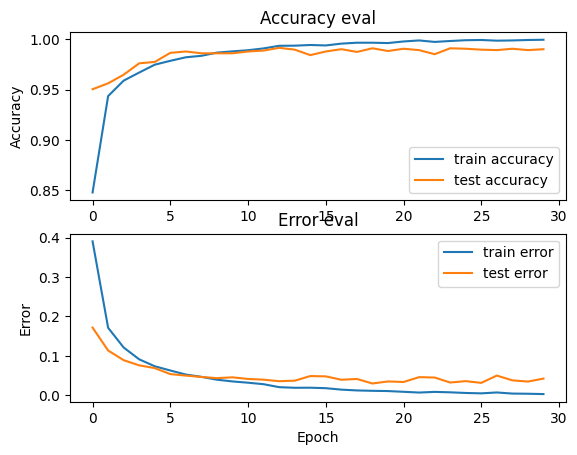

116/116 - 1s - loss: 0.0303 - accuracy: 0.9910 - 937ms/epoch - 8ms/step

Test accuracy: 0.9910496473312378
1/1 [==============================] - 0s 184ms/step
Target: 1, Predicted label: [1]


In [16]:
if __name__ == "__main__":

    
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    
    
    input_shape = (130, 13, 1)
    model = build_model(input_shape)

    
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    
    plot_history(history)

    
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    
    predict(model, X_to_predict, y_to_predict)

In [17]:
# Modeli kaydet
model.save("/kaggle/working/cnn_audio.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                        

In [19]:
from tensorflow.keras.models import load_model
import tensorflow as tf

In [20]:
def predict_voice(model, audio_file_path, genre_mapping):

    
    signal, sample_rate = librosa.load(audio_file_path, sr=22050)

    
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T

    mfcc = np.resize(mfcc, (130, 13, 1))

    mfcc = mfcc[np.newaxis, ...]

   
    prediction = model.predict(mfcc)
    predicted_index = np.argmax(prediction, axis=1)

    
    genre_label = genre_mapping[predicted_index[0]]
    print("Raw prediction:", prediction)

    return genre_label


model_path = "/kaggle/input/audio-for-lstm/cnn_audio.h5"
model = load_model(model_path)


audio_file_path = "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_train/flac/LA_T_1272637.flac"

genre_mapping = {0: "fake", 1: "real"}


predicted_voice = predict_voice(model, audio_file_path, genre_mapping)

print("Predicted label:", predicted_voice)


1/1 [==============================] - 0s 140ms/step
Raw prediction: [[0.00517773 0.99482226]]
Predicted label: real
